cf. 스케일링 사전 진행

In [3]:
import pandas as pd
df = pd.read_csv('이상치처리_표준화.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42916 entries, 0 to 42915
Data columns (total 65 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   측정일시                      42916 non-null  object 
 1   기온(°C)                    42916 non-null  float64
 2   강수량_조정                    42916 non-null  float64
 3   강수량(mm)                   42916 non-null  float64
 4   풍속(m/s)                   42916 non-null  float64
 5   풍향(16방위)                  42916 non-null  float64
 6   습도(%)                     42916 non-null  float64
 7   증기압(hPa)                  42916 non-null  float64
 8   이슬점온도(°C)                 42916 non-null  float64
 9   현지기압(hPa)                 42916 non-null  float64
 10  해면기압(hPa)                 42916 non-null  float64
 11  일조(hr)                    42916 non-null  float64
 12  일사(MJ/m2)                 42916 non-null  float64
 13  전운량(10분위)                 42916 non-null  float64
 14  중하층운량(

In [52]:
df.columns
# 'CAI' 대기오염지표점수
# 'Air_Quality_Status' 대기오염지표로 선택된 오염성분지표,--라벨인코딩(level6)--> 'Air_Quality_Status_label'
# 'Main_Pollutant' 대기오염지표점수 판단 결과 --라벨인코딩(level4)--> 'Main_Pollutant_label'

Index(['측정일시', '기온(°C)', '강수량_조정', '강수량(mm)', '풍속(m/s)', '풍향(16방위)', '습도(%)',
       '증기압(hPa)', '이슬점온도(°C)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)',
       '일사(MJ/m2)', '전운량(10분위)', '중하층운량(10분위)', '시정(10m)', '지면온도(°C)',
       '5cm 지중온도(°C)', '10cm 지중온도(°C)', '20cm 지중온도(°C)', '30cm 지중온도(°C)',
       '총합계(개소)', '시설녹지(개소)', '일반녹지(개소)', '분리대(개소)', '수벽(개소)', '수림대(개소)',
       '하천변조경(개소)', '간이휴게소(개소)', '지하철환기구주변(개소)', '건물주변(개소)', '아파트 및 학교(개소)',
       '침수공간조성(개소)', '기타(개소)', '총합계(면적)', '시설녹지(면적)', '일반녹지(면적)', '분리대(면적)',
       '수벽(면적)', '수림대(면적)', '하천변조경(면적)', '간이휴게소(면적)', '지하철환기구주변(면적)',
       '건물주변(면적)', '아파트 및 학교(면적)', '침수공간조성(면적)', '기타(면적)', '휘발유', '경유', 'LPG',
       '전기', 'CNG', '하이브리드(휘발유+전기)', '하이브리드(경유+전기)', '하이브리드(LPG+전기)',
       '하이브리드(CNG+전기)', '수소', '기타연료', '인구', '강수량_범주', 'CAI', 'Main_Pollutant',
       'Air_Quality_Status', 'Main_Pollutant_label',
       'Air_Quality_Status_label'],
      dtype='object')

## 다중 선형 회귀 <br>
R-squred값이 낮고 예측이 틀릴때 MSE와 MAE의 차이가 극명해지기 때문에<br>
오차가 존재한다고 할 수 있다.

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_squared_error

# 종속 변수 설정
y = df['CAI']

# 독립 변수 설정
x = df.drop(['측정일시','CAI','강수량_조정','Main_Pollutant','Air_Quality_Status','Air_Quality_Status_label'], axis=1)

# 데이터셋을 7:3 비율로 나누기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 다중선형회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(x_train, y_train)

# 예측값 생성
y_pred = model.predict(x_test)

# 평가지표 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# 결과 출력 (소수점 셋째 자리까지 반올림)
print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')
print(f'R-squared (R²): {r2:.3f}')

Mean Absolute Error (MAE): 24.419
Mean Squared Error (MSE): 1412.235
Root Mean Squared Error (RMSE): 37.580
R-squared (R²): 0.469


C:\Users\WestG\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


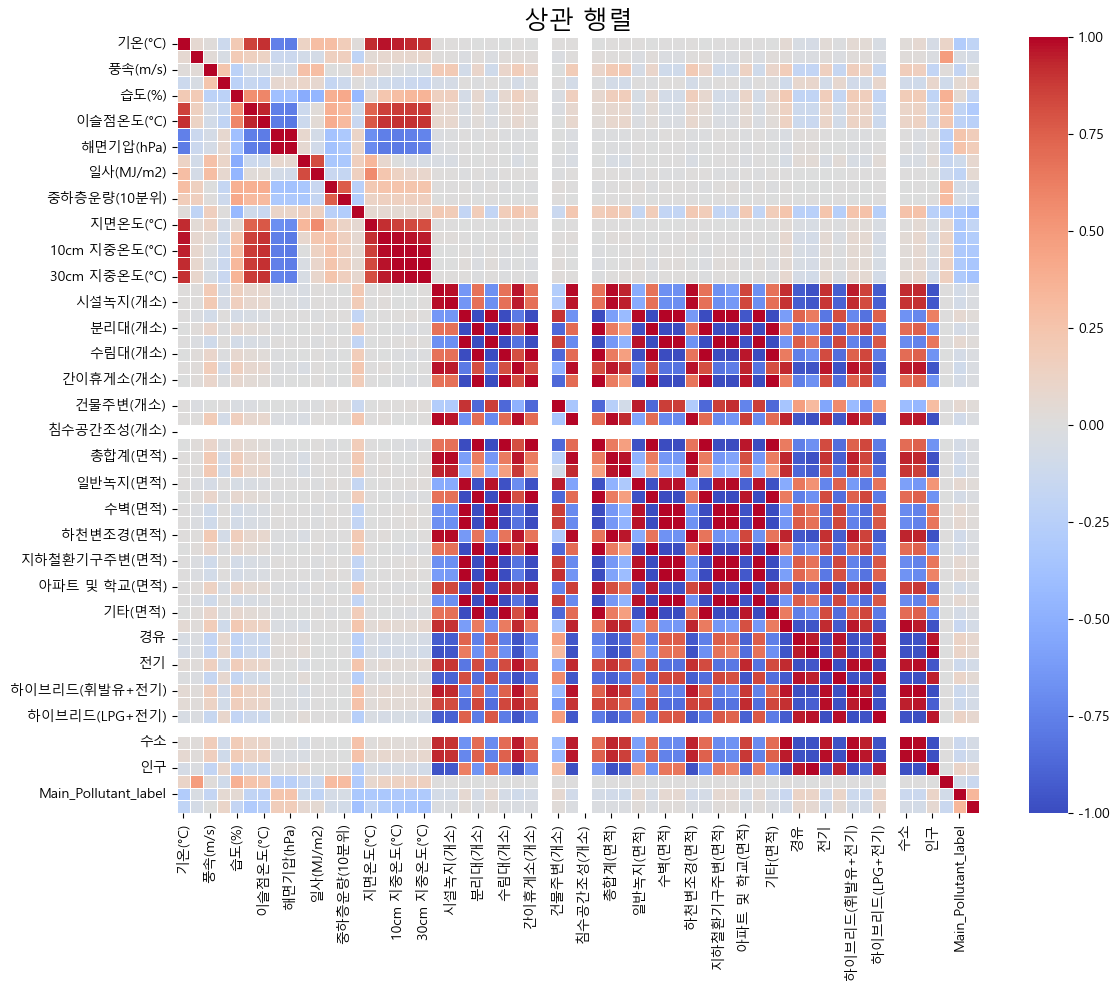

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 상관 행렬 계산
corr_matrix = x.corr()

# 상관 행렬 시각화
plt.figure(figsize=(12, 10))  # 그림 크기 조정
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('상관 행렬', fontsize=18)  # 제목 설정 및 폰트 크기 조정
plt.tight_layout()  # 레이아웃 최적화
plt.show()


### Random Forest 통해 주요 변수 추출하기

C:\Users\WestG\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Mean Absolute Error (MAE): 12.273
Mean Squared Error (MSE): 487.186
Root Mean Squared Error (RMSE): 22.072
R-squared (R²): 0.817


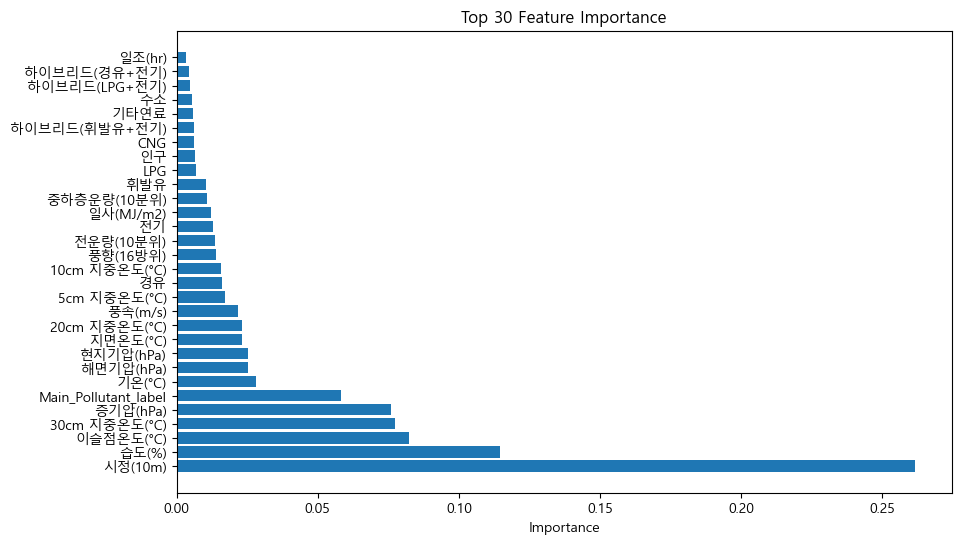

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


# 종속 변수 설정
y = df['CAI']

# 독립 변수 설정
x = df.drop(['측정일시', 'CAI', '강수량_조정', 'Main_Pollutant', 'Air_Quality_Status', 'Air_Quality_Status_label'], axis=1)

# 데이터셋을 7:3 비율로 나누기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

# 예측값 생성
y_pred = rf_model.predict(x_test)

# 평가지표 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# 결과 출력 (소수점 셋째 자리까지 반올림)
print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')
print(f'R-squared (R²): {r2:.3f}')


# 특성 중요도 평가
importance = rf_model.feature_importances_
features = x.columns
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# 특성 중요도 시각화 (상위 30개 특성)
top_features = feature_importance.head(30)
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], align='center')
plt.xlabel('Importance')
plt.title('Top 30 Feature Importance')
plt.show()



### selected feature로 다시 다중선형회귀 후 결과 비교
MAE (Mean Absolute Error): 주요 변수를 선택한 두 번째 모델에서 MAE가 20.458로 감소했습니다. MAE는 예측값과 실제 값의 절대적인 차이를 평균화한 값으로, 낮을수록 모델의 예측 성능이 좋다고 해석할 수 있습니다.

MSE (Mean Squared Error): MSE는 오차의 제곱을 평균화한 값으로, 첫 번째 모델에서 1412.235에서 746.460으로 감소했습니다. 이 역시 모델의 예측 정확도가 개선되었음을 나타냅니다.

RMSE (Root Mean Squared Error): RMSE는 MSE의 제곱근으로, 실제 값과 예측 값의 평균적인 차이를 나타내며, 37.580에서 27.321로 감소했습니다. 이는 모델의 예측 정확도가 향상되었다는 것을 의미합니다.

R² (R-squared): R²는 모델이 설명하는 데이터의 분산 비율을 나타내며, 0에서 1 사이의 값을 가집니다. 주요 변수를 선택한 두 번째 모델에서 R² 값이 0.469에서 0.719로 증가했습니다. 이는 모델이 데이터의 변동성을 더 잘 설명하고 있다는 것을 의미합니다.<br>
따라서, 주요 변수를 선택하여 모델을 재구성하니 예측 성능이 개선되었음을 확인할 수 있습니다. 선택한 변수가 모델의 예측 정
확도를 높이는데 기여한 것으로 보입니다.

In [47]:
# 중요도가 높은 상위 30개 컬럼명을 리스트로 저장
sel_feature = feature_importance.head(30)['Feature'].tolist()

# 종속 변수 설정
y = df['CAI']

# 독립 변수 설정
x = df[sel_feature]

# 데이터셋을 7:3 비율로 나누기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 다중선형회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(x_train, y_train)

# 예측값 생성
y_pred = model.predict(x_test)

# 평가지표 계산
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# 결과 출력 (소수점 셋째 자리까지 반올림)
print(f'Mean Absolute Error (MAE): {mae:.3f}')
print(f'Mean Squared Error (MSE): {mse:.3f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.3f}')
print(f'R-squared (R²): {r2:.3f}')

Mean Absolute Error (MAE): 20.458
Mean Squared Error (MSE): 746.460
Root Mean Squared Error (RMSE): 27.321
R-squared (R²): 0.719


C:\Users\WestG\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### selected feature 상관관계

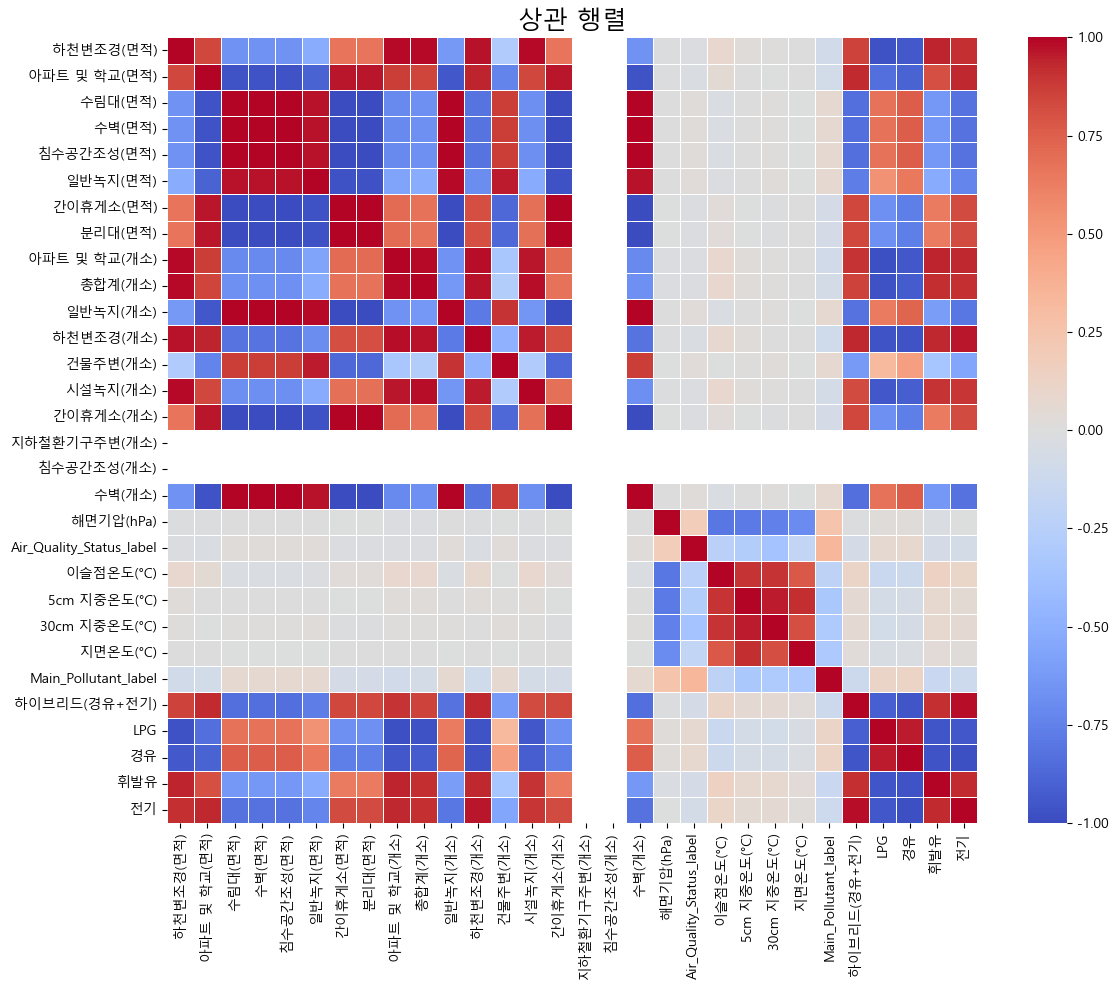

In [95]:
# 상관 행렬 계산
x = df[sel_feature]

corr_matrix = x.corr()

# 상관 행렬 시각화
plt.figure(figsize=(12, 10))  # 그림 크기 조정
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('상관 행렬', fontsize=18)  # 제목 설정 및 폰트 크기 조정
plt.tight_layout()  # 레이아웃 최적화
plt.show()


In [105]:
df_nu = pd.concat([df[sel_feature], df['CAI']], axis=1)
df_nu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42916 entries, 0 to 42915
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   하천변조경(면적)                 42916 non-null  float64
 1   아파트 및 학교(면적)              42916 non-null  float64
 2   수림대(면적)                   42916 non-null  float64
 3   수벽(면적)                    42916 non-null  float64
 4   침수공간조성(면적)                42916 non-null  float64
 5   일반녹지(면적)                  42916 non-null  float64
 6   간이휴게소(면적)                 42916 non-null  float64
 7   분리대(면적)                   42916 non-null  float64
 8   아파트 및 학교(개소)              42916 non-null  float64
 9   총합계(개소)                   42916 non-null  float64
 10  일반녹지(개소)                  42916 non-null  float64
 11  하천변조경(개소)                 42916 non-null  float64
 12  건물주변(개소)                  42916 non-null  float64
 13  시설녹지(개소)                  42916 non-null  float64
 14  간이휴게소(

### 다중공선성 확인 
확인 결과 주요 변수간 다중공선성 발견되어 하이퍼파라미터로 규제 강도 조절하는 릿지, 라쏘 회귀 시행

In [110]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42916 entries, 0 to 42915
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   하천변조경(면적)                 42916 non-null  float64
 1   아파트 및 학교(면적)              42916 non-null  float64
 2   수림대(면적)                   42916 non-null  float64
 3   수벽(면적)                    42916 non-null  float64
 4   침수공간조성(면적)                42916 non-null  float64
 5   일반녹지(면적)                  42916 non-null  float64
 6   간이휴게소(면적)                 42916 non-null  float64
 7   분리대(면적)                   42916 non-null  float64
 8   아파트 및 학교(개소)              42916 non-null  float64
 9   총합계(개소)                   42916 non-null  float64
 10  일반녹지(개소)                  42916 non-null  float64
 11  하천변조경(개소)                 42916 non-null  float64
 12  건물주변(개소)                  42916 non-null  float64
 13  시설녹지(개소)                  42916 non-null  float64
 14  간이휴게소(

In [111]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
#df_nu = df.select_dtypes(include=[np.number])

# 다중 선형회귀 모델 적합

# 독립 변수 모음
x = df_nu.drop(['CAI'], axis=1)
model = sm.OLS(y, sm.add_constant(x)).fit()

# 다중공선성 계산 함수 정의
def calculate_vif(x):
    vif = pd.DataFrame()
    vif["Features"] = x.columns
    vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    return vif

# 전체 독립 변수 간 피처에 대해 VIF 계산
vif_all = calculate_vif(x)

# VIF 값이 10 이상인 피처와 이하인 피처 구분
high_vif_features = vif_all[vif_all['VIF'] > 10]['Features'].tolist()
low_vif_features = vif_all[vif_all['VIF'] <= 10]['Features'].tolist()

# VIF 값으로 내림차순 정렬
vif_sorted = vif_all.sort_values(by='VIF', ascending=False)

print(vif_sorted)

# 결과 출력
print("\nFeatures with VIF > 10:")
print(high_vif_features)

print("\nFeatures with VIF <= 10:")
print(low_vif_features)


D:\anaconda\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
D:\anaconda\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                    Features         VIF
0                  하천변조경(면적)         inf
17                    수벽(개소)         inf
2                    수림대(면적)         inf
3                     수벽(면적)         inf
4                 침수공간조성(면적)         inf
5                   일반녹지(면적)         inf
6                  간이휴게소(면적)         inf
7                    분리대(면적)         inf
8               아파트 및 학교(개소)         inf
9                    총합계(개소)         inf
10                  일반녹지(개소)         inf
11                 하천변조경(개소)         inf
12                  건물주변(개소)         inf
13                  시설녹지(개소)         inf
14                 간이휴게소(개소)         inf
1               아파트 및 학교(면적)         inf
29                        전기  436.447256
25              하이브리드(경유+전기)  290.876224
26                       LPG  143.953704
28                       휘발유   59.136052
27                        경유   57.788288
21              5cm 지중온도(°C)   43.623185
22             30cm 지중온도(°C)   25.910927
23              

### 릿지, 라쏘 모델 학습 및 평가
규제 강도를 조절하는 하이퍼 파라미터 알파는 GridSearchCV를 사용해 Cross Validation 값을 기반으로 최적의 값을 찾음.<br>
릿지: 최적의 알파일 때 기존 selected feature로 진행한 다중선형회귀 결과와 별 차이 없는 평가지표 점수가 나옴. <br>
라쏘: 최적의 알파일 때 오차가 더 커지고 R-squred값 작아짐

In [119]:
from sklearn.linear_model import Ridge, Lasso
# 종속 변수 설정
y = df_nu['CAI']
# 독립 변수 설정
x = df_nu.drop(['CAI'], axis=1)

# 데이터셋을 7:3 비율로 나누기
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# 릿지 회귀 모델 학습
ridge = Ridge(alpha=4.0)  # alpha는 규제 강도를 조절하는 하이퍼파라미터
ridge.fit(x_train, y_train)

# 라쏘 회귀 모델 학습
lasso = Lasso(alpha=3.0)  # alpha는 규제 강도를 조절하는 하이퍼파라미터
lasso.fit(x_train, y_train)

# 모델 평가 함수
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

# Ridge 회귀 모델 평가
ridge_mae, ridge_mse, ridge_rmse, ridge_r2 = evaluate_model(ridge, x_test, y_test)

# Lasso 회귀 모델 평가
lasso_mae, lasso_mse, lasso_rmse, lasso_r2 = evaluate_model(lasso, x_test, y_test)

# 결과 출력
print("Ridge Regression:")
print(f"MAE: {ridge_mae:.3f}")
print(f"MSE: {ridge_mse:.3f}")
print(f"RMSE: {ridge_rmse:.3f}")
print(f"R-squared: {ridge_r2:.3f}")

print("\nLasso Regression:")
print(f"MAE: {lasso_mae:.3f}")
print(f"MSE: {lasso_mse:.3f}")
print(f"RMSE: {lasso_rmse:.3f}")
print(f"R-squared: {lasso_r2:.3f}")

Ridge Regression:
MAE: 20.454
MSE: 746.299
RMSE: 27.318
R-squared: 0.719

Lasso Regression:
MAE: 19.864
MSE: 783.924
RMSE: 27.999
R-squared: 0.705


C:\Users\WestG\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.656e+07, tolerance: 8.065e+03
  model = cd_fast.enet_coordinate_descent(


### 다중공선성 문제를 고려하여 릿지(Ridge)와 라쏘(Lasso) 모델을 학습하고 평가한 결과가 기존의 다중선형회귀 결과와 비슷하거나 더 나빠졌다 -> 여전한 다중공선성 
### 데이터 해석에 범주형 변수 처리와 성능 최적화에 강점을 가진 그래디언트 부스팅모델 CatBoost를 적용해보았다.

In [139]:
#!pip install catboost

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/35/7e/35fa1a7cf6925ff438e849cca50c88b8d28e02d9c3486442f2f85b86184a/catboost-1.2.5-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.5/101.1 MB 11.6 MB/s eta 0:00:09
    --------------------------------------- 1.4/101.1 MB 14.4 MB/s eta 0:00:07
    --------------------------------------- 2.3/101.1 MB 16.5 MB/s eta 0:00:07
   - -------------------------------------- 3.6/101.1 MB 19.3 MB/s eta 0:00:06
   - -------------------------------------- 4.8/101.1 MB 20.3 MB/s eta 0:00:05
   -- ------------------------------------- 5.7/101.1 MB 20.2 MB/s eta 0:00:05
   -- ------------------------------------- 7.2/101.1 MB 22.0 MB/s eta 0:00:05
   --- ------------------------------------ 8.9/101.1 MB 24.9 MB/s eta 0:00:04
   ---- -

In [140]:
from catboost import CatBoostRegressor, Pool
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np

# CatBoost 모델 초기화
model = CatBoostRegressor()

# GridSearchCV를 사용하여 최적의 하이퍼파라미터 찾기
params = {'iterations': [100, 200, 300],
          'learning_rate': [0.01, 0.05, 0.1],
          'depth': [4, 6, 8],
          'l2_leaf_reg': [1, 3, 5]}

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_

# 최적의 하이퍼파라미터로 모델 재설정
best_model = CatBoostRegressor(**best_params)
best_model.fit(x_train, y_train, verbose=False)

# 모델 평가
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("CatBoost Regression Evaluation:")
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R-squared: {r2:.3f}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
0:	learn: 51.5416181	total: 143ms	remaining: 14.1s
1:	learn: 51.0986826	total: 155ms	remaining: 7.61s
2:	learn: 50.6589315	total: 168ms	remaining: 5.43s
3:	learn: 50.2260365	total: 178ms	remaining: 4.27s
4:	learn: 49.7980607	total: 191ms	remaining: 3.63s
5:	learn: 49.3750700	total: 202ms	remaining: 3.17s
6:	learn: 48.9568683	total: 217ms	remaining: 2.88s
7:	learn: 48.5432434	total: 229ms	remaining: 2.64s
8:	learn: 48.1344772	total: 240ms	remaining: 2.43s
9:	learn: 47.7283798	total: 254ms	remaining: 2.28s
10:	learn: 47.3278953	total: 264ms	remaining: 2.14s
11:	learn: 46.9331655	total: 276ms	remaining: 2.02s
12:	learn: 46.5431067	total: 284ms	remaining: 1.9s
13:	learn: 46.1574406	total: 290ms	remaining: 1.78s
14:	learn: 45.7763749	total: 297ms	remaining: 1.68s
15:	learn: 45.3995812	total: 306ms	remaining: 1.61s
16:	learn: 45.0274290	total: 314ms	remaining: 1.53s
17:	learn: 44.6589011	total: 321ms	remaining: 1.46s
18:	learn: 44

78:	learn: 28.8957174	total: 615ms	remaining: 163ms
79:	learn: 28.7314908	total: 620ms	remaining: 155ms
80:	learn: 28.5705406	total: 629ms	remaining: 148ms
81:	learn: 28.4094864	total: 638ms	remaining: 140ms
82:	learn: 28.2531677	total: 645ms	remaining: 132ms
83:	learn: 28.0999659	total: 657ms	remaining: 125ms
84:	learn: 27.9440221	total: 666ms	remaining: 117ms
85:	learn: 27.7928665	total: 676ms	remaining: 110ms
86:	learn: 27.6423926	total: 683ms	remaining: 102ms
87:	learn: 27.4986514	total: 691ms	remaining: 94.3ms
88:	learn: 27.3542497	total: 697ms	remaining: 86.2ms
89:	learn: 27.2113870	total: 706ms	remaining: 78.4ms
90:	learn: 27.0720971	total: 711ms	remaining: 70.3ms
91:	learn: 26.9348329	total: 721ms	remaining: 62.7ms
92:	learn: 26.8007012	total: 727ms	remaining: 54.7ms
93:	learn: 26.6674294	total: 734ms	remaining: 46.9ms
94:	learn: 26.5330317	total: 741ms	remaining: 39ms
95:	learn: 26.4010629	total: 747ms	remaining: 31.1ms
96:	learn: 26.2731050	total: 754ms	remaining: 23.3ms
97:	

54:	learn: 33.6026702	total: 266ms	remaining: 218ms
55:	learn: 33.3704739	total: 271ms	remaining: 213ms
56:	learn: 33.1437252	total: 276ms	remaining: 208ms
57:	learn: 32.9198743	total: 281ms	remaining: 204ms
58:	learn: 32.6959846	total: 289ms	remaining: 201ms
59:	learn: 32.4779947	total: 297ms	remaining: 198ms
60:	learn: 32.2629560	total: 303ms	remaining: 194ms
61:	learn: 32.0484417	total: 309ms	remaining: 190ms
62:	learn: 31.8458292	total: 316ms	remaining: 185ms
63:	learn: 31.6379651	total: 320ms	remaining: 180ms
64:	learn: 31.4342385	total: 326ms	remaining: 175ms
65:	learn: 31.2332686	total: 331ms	remaining: 171ms
66:	learn: 31.0347561	total: 336ms	remaining: 166ms
67:	learn: 30.8393110	total: 343ms	remaining: 162ms
68:	learn: 30.6451097	total: 348ms	remaining: 156ms
69:	learn: 30.4546917	total: 353ms	remaining: 151ms
70:	learn: 30.2653579	total: 358ms	remaining: 146ms
71:	learn: 30.0783491	total: 363ms	remaining: 141ms
72:	learn: 29.8935721	total: 369ms	remaining: 136ms
73:	learn: 2

40:	learn: 19.4635663	total: 217ms	remaining: 313ms
41:	learn: 19.3684776	total: 225ms	remaining: 311ms
42:	learn: 19.2701305	total: 234ms	remaining: 310ms
43:	learn: 19.1761487	total: 241ms	remaining: 306ms
44:	learn: 19.0880917	total: 249ms	remaining: 304ms
45:	learn: 18.9991090	total: 263ms	remaining: 309ms
46:	learn: 18.9243532	total: 274ms	remaining: 309ms
47:	learn: 18.8465676	total: 286ms	remaining: 310ms
48:	learn: 18.7839962	total: 295ms	remaining: 308ms
49:	learn: 18.7146249	total: 308ms	remaining: 308ms
50:	learn: 18.6557594	total: 321ms	remaining: 309ms
51:	learn: 18.6041252	total: 332ms	remaining: 306ms
52:	learn: 18.5581541	total: 342ms	remaining: 303ms
53:	learn: 18.4997808	total: 353ms	remaining: 301ms
54:	learn: 18.4517924	total: 363ms	remaining: 297ms
55:	learn: 18.4134990	total: 374ms	remaining: 294ms
56:	learn: 18.3733595	total: 386ms	remaining: 291ms
57:	learn: 18.3273170	total: 395ms	remaining: 286ms
58:	learn: 18.2882069	total: 404ms	remaining: 280ms
59:	learn: 1

0:	learn: 49.7229723	total: 6.91ms	remaining: 684ms
1:	learn: 47.6205133	total: 14.1ms	remaining: 690ms
2:	learn: 45.6302032	total: 20.8ms	remaining: 672ms
3:	learn: 43.7647970	total: 26.9ms	remaining: 645ms
4:	learn: 42.0096514	total: 33.4ms	remaining: 634ms
5:	learn: 40.3604527	total: 39.7ms	remaining: 621ms
6:	learn: 38.8106727	total: 46ms	remaining: 611ms
7:	learn: 37.3566073	total: 51.7ms	remaining: 595ms
8:	learn: 35.9929765	total: 57.3ms	remaining: 579ms
9:	learn: 34.7031458	total: 63.1ms	remaining: 568ms
10:	learn: 33.4870836	total: 68ms	remaining: 550ms
11:	learn: 32.3553067	total: 73ms	remaining: 535ms
12:	learn: 31.2983984	total: 78.4ms	remaining: 525ms
13:	learn: 30.3250414	total: 81.7ms	remaining: 502ms
14:	learn: 29.3942546	total: 86ms	remaining: 487ms
15:	learn: 28.5374373	total: 90.4ms	remaining: 475ms
16:	learn: 27.7477416	total: 95.3ms	remaining: 465ms
17:	learn: 27.0174509	total: 101ms	remaining: 460ms
18:	learn: 26.3301254	total: 106ms	remaining: 454ms
19:	learn: 25

70:	learn: 17.8739095	total: 404ms	remaining: 165ms
71:	learn: 17.8567845	total: 412ms	remaining: 160ms
72:	learn: 17.8412722	total: 419ms	remaining: 155ms
73:	learn: 17.8244319	total: 425ms	remaining: 149ms
74:	learn: 17.8041909	total: 429ms	remaining: 143ms
75:	learn: 17.7859053	total: 435ms	remaining: 137ms
76:	learn: 17.7675915	total: 439ms	remaining: 131ms
77:	learn: 17.7507066	total: 445ms	remaining: 125ms
78:	learn: 17.7383006	total: 449ms	remaining: 119ms
79:	learn: 17.7203917	total: 455ms	remaining: 114ms
80:	learn: 17.7038882	total: 459ms	remaining: 108ms
81:	learn: 17.6883808	total: 464ms	remaining: 102ms
82:	learn: 17.6700529	total: 469ms	remaining: 96ms
83:	learn: 17.6552516	total: 473ms	remaining: 90.2ms
84:	learn: 17.6409999	total: 477ms	remaining: 84.2ms
85:	learn: 17.6313004	total: 482ms	remaining: 78.5ms
86:	learn: 17.6178664	total: 488ms	remaining: 72.9ms
87:	learn: 17.6058443	total: 492ms	remaining: 67.1ms
88:	learn: 17.5985698	total: 497ms	remaining: 61.4ms
89:	lea

42:	learn: 17.6920577	total: 210ms	remaining: 278ms
43:	learn: 17.6694215	total: 216ms	remaining: 275ms
44:	learn: 17.6508888	total: 223ms	remaining: 272ms
45:	learn: 17.6326833	total: 230ms	remaining: 270ms
46:	learn: 17.6116471	total: 240ms	remaining: 271ms
47:	learn: 17.5944936	total: 247ms	remaining: 268ms
48:	learn: 17.5802312	total: 252ms	remaining: 263ms
49:	learn: 17.5654583	total: 260ms	remaining: 260ms
50:	learn: 17.5363437	total: 267ms	remaining: 257ms
51:	learn: 17.5262113	total: 274ms	remaining: 253ms
52:	learn: 17.5111179	total: 279ms	remaining: 247ms
53:	learn: 17.4990163	total: 285ms	remaining: 243ms
54:	learn: 17.4877683	total: 293ms	remaining: 240ms
55:	learn: 17.4747314	total: 299ms	remaining: 235ms
56:	learn: 17.4661036	total: 304ms	remaining: 229ms
57:	learn: 17.4405989	total: 308ms	remaining: 223ms
58:	learn: 17.4270579	total: 312ms	remaining: 217ms
59:	learn: 17.4138733	total: 316ms	remaining: 211ms
60:	learn: 17.4053566	total: 321ms	remaining: 206ms
61:	learn: 1

0:	learn: 47.5106562	total: 7.62ms	remaining: 754ms
1:	learn: 43.5796458	total: 13.8ms	remaining: 678ms
2:	learn: 40.0919262	total: 21.6ms	remaining: 698ms
3:	learn: 37.0109515	total: 28ms	remaining: 671ms
4:	learn: 34.3395748	total: 36.1ms	remaining: 687ms
5:	learn: 31.9670420	total: 43.2ms	remaining: 677ms
6:	learn: 29.9168049	total: 52ms	remaining: 691ms
7:	learn: 28.1699954	total: 59ms	remaining: 678ms
8:	learn: 26.6691647	total: 66.9ms	remaining: 677ms
9:	learn: 25.3624568	total: 74ms	remaining: 666ms
10:	learn: 24.2692771	total: 81.1ms	remaining: 656ms
11:	learn: 23.3122761	total: 87.8ms	remaining: 644ms
12:	learn: 22.4938366	total: 95.4ms	remaining: 638ms
13:	learn: 21.8224887	total: 103ms	remaining: 631ms
14:	learn: 21.2494982	total: 110ms	remaining: 622ms
15:	learn: 20.7577608	total: 116ms	remaining: 607ms
16:	learn: 20.3176238	total: 120ms	remaining: 585ms
17:	learn: 19.9680699	total: 125ms	remaining: 571ms
18:	learn: 19.6792228	total: 130ms	remaining: 555ms
19:	learn: 19.450

86:	learn: 16.9879792	total: 490ms	remaining: 73.2ms
87:	learn: 16.9823946	total: 499ms	remaining: 68.1ms
88:	learn: 16.9788543	total: 508ms	remaining: 62.8ms
89:	learn: 16.9755523	total: 514ms	remaining: 57.1ms
90:	learn: 16.9691809	total: 520ms	remaining: 51.4ms
91:	learn: 16.9555568	total: 527ms	remaining: 45.8ms
92:	learn: 16.9501749	total: 533ms	remaining: 40.1ms
93:	learn: 16.9419760	total: 538ms	remaining: 34.3ms
94:	learn: 16.9352021	total: 544ms	remaining: 28.6ms
95:	learn: 16.9304216	total: 550ms	remaining: 22.9ms
96:	learn: 16.9170337	total: 555ms	remaining: 17.2ms
97:	learn: 16.9114827	total: 561ms	remaining: 11.5ms
98:	learn: 16.9070435	total: 567ms	remaining: 5.72ms
99:	learn: 16.8859563	total: 575ms	remaining: 0us
0:	learn: 47.1717689	total: 6.01ms	remaining: 595ms
1:	learn: 43.2587518	total: 11.8ms	remaining: 578ms
2:	learn: 39.7858336	total: 18.1ms	remaining: 584ms
3:	learn: 36.7496805	total: 24.4ms	remaining: 585ms
4:	learn: 34.0914034	total: 29.9ms	remaining: 568ms
5

71:	learn: 30.2950403	total: 407ms	remaining: 158ms
72:	learn: 30.1109567	total: 414ms	remaining: 153ms
73:	learn: 29.9315386	total: 422ms	remaining: 148ms
74:	learn: 29.7507530	total: 429ms	remaining: 143ms
75:	learn: 29.5762420	total: 434ms	remaining: 137ms
76:	learn: 29.4041901	total: 441ms	remaining: 132ms
77:	learn: 29.2347149	total: 446ms	remaining: 126ms
78:	learn: 29.0674611	total: 451ms	remaining: 120ms
79:	learn: 28.9007881	total: 456ms	remaining: 114ms
80:	learn: 28.7384916	total: 460ms	remaining: 108ms
81:	learn: 28.5759742	total: 464ms	remaining: 102ms
82:	learn: 28.4178630	total: 470ms	remaining: 96.3ms
83:	learn: 28.2629842	total: 475ms	remaining: 90.5ms
84:	learn: 28.1062535	total: 482ms	remaining: 85.1ms
85:	learn: 27.9530583	total: 487ms	remaining: 79.3ms
86:	learn: 27.8007197	total: 493ms	remaining: 73.7ms
87:	learn: 27.6570368	total: 501ms	remaining: 68.3ms
88:	learn: 27.5108243	total: 507ms	remaining: 62.6ms
89:	learn: 27.3660242	total: 513ms	remaining: 57ms
90:	le

38:	learn: 37.8955265	total: 477ms	remaining: 746ms
39:	learn: 37.6155224	total: 490ms	remaining: 735ms
40:	learn: 37.3360830	total: 503ms	remaining: 724ms
41:	learn: 37.0611399	total: 515ms	remaining: 711ms
42:	learn: 36.7913588	total: 527ms	remaining: 698ms
43:	learn: 36.5366754	total: 541ms	remaining: 689ms
44:	learn: 36.2734669	total: 556ms	remaining: 679ms
45:	learn: 36.0136005	total: 568ms	remaining: 667ms
46:	learn: 35.7571103	total: 579ms	remaining: 653ms
47:	learn: 35.5023847	total: 588ms	remaining: 637ms
48:	learn: 35.2519239	total: 597ms	remaining: 622ms
49:	learn: 35.0040546	total: 607ms	remaining: 607ms
50:	learn: 34.7579322	total: 615ms	remaining: 591ms
51:	learn: 34.5169786	total: 624ms	remaining: 576ms
52:	learn: 34.2779097	total: 631ms	remaining: 560ms
53:	learn: 34.0431521	total: 640ms	remaining: 545ms
54:	learn: 33.8118554	total: 649ms	remaining: 531ms
55:	learn: 33.5807091	total: 658ms	remaining: 517ms
56:	learn: 33.3551677	total: 666ms	remaining: 502ms
57:	learn: 3

0:	learn: 51.1496015	total: 8ms	remaining: 792ms
1:	learn: 50.7113038	total: 14.8ms	remaining: 724ms
2:	learn: 50.2757428	total: 22.2ms	remaining: 718ms
3:	learn: 49.8473276	total: 27.7ms	remaining: 665ms
4:	learn: 49.4237681	total: 31.9ms	remaining: 605ms
5:	learn: 49.0049790	total: 37.5ms	remaining: 588ms
6:	learn: 48.5909132	total: 43ms	remaining: 571ms
7:	learn: 48.1813756	total: 47ms	remaining: 541ms
8:	learn: 47.7766861	total: 52.1ms	remaining: 527ms
9:	learn: 47.3742449	total: 57.4ms	remaining: 517ms
10:	learn: 46.9777332	total: 62.1ms	remaining: 502ms
11:	learn: 46.5860441	total: 67.2ms	remaining: 493ms
12:	learn: 46.1998506	total: 72.4ms	remaining: 484ms
13:	learn: 45.8179614	total: 77.5ms	remaining: 476ms
14:	learn: 45.4405637	total: 84ms	remaining: 476ms
15:	learn: 45.0673131	total: 88.8ms	remaining: 466ms
16:	learn: 44.6987449	total: 94ms	remaining: 459ms
17:	learn: 44.3336376	total: 99.2ms	remaining: 452ms
18:	learn: 43.9736646	total: 103ms	remaining: 440ms
19:	learn: 43.6

64:	learn: 18.1311218	total: 415ms	remaining: 223ms
65:	learn: 18.1028800	total: 421ms	remaining: 217ms
66:	learn: 18.0773246	total: 425ms	remaining: 209ms
67:	learn: 18.0458144	total: 432ms	remaining: 203ms
68:	learn: 18.0151029	total: 441ms	remaining: 198ms
69:	learn: 17.9904522	total: 457ms	remaining: 196ms
70:	learn: 17.9716147	total: 462ms	remaining: 189ms
71:	learn: 17.9458280	total: 468ms	remaining: 182ms
72:	learn: 17.9304804	total: 474ms	remaining: 175ms
73:	learn: 17.9103807	total: 480ms	remaining: 168ms
74:	learn: 17.8953993	total: 484ms	remaining: 161ms
75:	learn: 17.8781981	total: 490ms	remaining: 155ms
76:	learn: 17.8604982	total: 497ms	remaining: 148ms
77:	learn: 17.8483070	total: 502ms	remaining: 142ms
78:	learn: 17.8323508	total: 508ms	remaining: 135ms
79:	learn: 17.8185995	total: 513ms	remaining: 128ms
80:	learn: 17.8023813	total: 519ms	remaining: 122ms
81:	learn: 17.7923574	total: 524ms	remaining: 115ms
82:	learn: 17.7750247	total: 529ms	remaining: 108ms
83:	learn: 1

26:	learn: 22.4429020	total: 204ms	remaining: 551ms
27:	learn: 22.1027845	total: 211ms	remaining: 542ms
28:	learn: 21.7925715	total: 217ms	remaining: 532ms
29:	learn: 21.4990853	total: 224ms	remaining: 522ms
30:	learn: 21.2429648	total: 233ms	remaining: 519ms
31:	learn: 20.9951350	total: 240ms	remaining: 511ms
32:	learn: 20.7754916	total: 249ms	remaining: 505ms
33:	learn: 20.5733473	total: 257ms	remaining: 498ms
34:	learn: 20.3793919	total: 265ms	remaining: 491ms
35:	learn: 20.2041366	total: 274ms	remaining: 487ms
36:	learn: 20.0398870	total: 281ms	remaining: 478ms
37:	learn: 19.8877662	total: 288ms	remaining: 470ms
38:	learn: 19.7443366	total: 296ms	remaining: 463ms
39:	learn: 19.6154433	total: 305ms	remaining: 457ms
40:	learn: 19.4961165	total: 312ms	remaining: 449ms
41:	learn: 19.3921895	total: 320ms	remaining: 442ms
42:	learn: 19.2917365	total: 329ms	remaining: 436ms
43:	learn: 19.1952376	total: 337ms	remaining: 428ms
44:	learn: 19.1164704	total: 343ms	remaining: 419ms
45:	learn: 1

0:	learn: 49.3822142	total: 5.82ms	remaining: 576ms
1:	learn: 47.2974759	total: 15ms	remaining: 735ms
2:	learn: 45.3208964	total: 20.9ms	remaining: 677ms
3:	learn: 43.4699114	total: 27ms	remaining: 649ms
4:	learn: 41.7277804	total: 34.9ms	remaining: 664ms
5:	learn: 40.0893919	total: 41.3ms	remaining: 646ms
6:	learn: 38.5495598	total: 48.4ms	remaining: 644ms
7:	learn: 37.1045963	total: 55.4ms	remaining: 637ms
8:	learn: 35.7485531	total: 62.6ms	remaining: 633ms
9:	learn: 34.4640896	total: 69.2ms	remaining: 623ms
10:	learn: 33.2667358	total: 78.8ms	remaining: 637ms
11:	learn: 32.1419332	total: 89.1ms	remaining: 654ms
12:	learn: 31.0913776	total: 124ms	remaining: 828ms
13:	learn: 30.1218611	total: 133ms	remaining: 819ms
14:	learn: 29.2188310	total: 141ms	remaining: 801ms
15:	learn: 28.3643709	total: 149ms	remaining: 782ms
16:	learn: 27.5837975	total: 156ms	remaining: 762ms
17:	learn: 26.8542151	total: 164ms	remaining: 749ms
18:	learn: 26.1664326	total: 173ms	remaining: 737ms
19:	learn: 25.

66:	learn: 17.3880216	total: 625ms	remaining: 308ms
67:	learn: 17.3733498	total: 632ms	remaining: 298ms
68:	learn: 17.3631308	total: 641ms	remaining: 288ms
69:	learn: 17.3360202	total: 651ms	remaining: 279ms
70:	learn: 17.3091922	total: 661ms	remaining: 270ms
71:	learn: 17.3058342	total: 670ms	remaining: 260ms
72:	learn: 17.2838250	total: 677ms	remaining: 250ms
73:	learn: 17.2791277	total: 684ms	remaining: 240ms
74:	learn: 17.2690162	total: 693ms	remaining: 231ms
75:	learn: 17.2629324	total: 702ms	remaining: 222ms
76:	learn: 17.2546687	total: 711ms	remaining: 212ms
77:	learn: 17.2491479	total: 717ms	remaining: 202ms
78:	learn: 17.2443628	total: 725ms	remaining: 193ms
79:	learn: 17.2390550	total: 733ms	remaining: 183ms
80:	learn: 17.2328420	total: 740ms	remaining: 174ms
81:	learn: 17.2269051	total: 746ms	remaining: 164ms
82:	learn: 17.2055723	total: 754ms	remaining: 154ms
83:	learn: 17.1961066	total: 762ms	remaining: 145ms
84:	learn: 17.1870418	total: 770ms	remaining: 136ms
85:	learn: 1

42:	learn: 17.6666042	total: 409ms	remaining: 543ms
43:	learn: 17.6426405	total: 419ms	remaining: 533ms
44:	learn: 17.6220096	total: 427ms	remaining: 522ms
45:	learn: 17.5940260	total: 435ms	remaining: 511ms
46:	learn: 17.5786682	total: 443ms	remaining: 500ms
47:	learn: 17.5575262	total: 451ms	remaining: 489ms
48:	learn: 17.5385209	total: 459ms	remaining: 478ms
49:	learn: 17.5215897	total: 468ms	remaining: 468ms
50:	learn: 17.4945955	total: 481ms	remaining: 462ms
51:	learn: 17.4698520	total: 492ms	remaining: 454ms
52:	learn: 17.4573970	total: 505ms	remaining: 447ms
53:	learn: 17.4398115	total: 515ms	remaining: 439ms
54:	learn: 17.4251629	total: 527ms	remaining: 431ms
55:	learn: 17.4122800	total: 538ms	remaining: 423ms
56:	learn: 17.4030243	total: 550ms	remaining: 415ms
57:	learn: 17.3841569	total: 561ms	remaining: 406ms
58:	learn: 17.3731519	total: 572ms	remaining: 397ms
59:	learn: 17.3655798	total: 582ms	remaining: 388ms
60:	learn: 17.3513322	total: 593ms	remaining: 379ms
61:	learn: 1

3:	learn: 36.7932632	total: 30.6ms	remaining: 735ms
4:	learn: 34.1397715	total: 37.8ms	remaining: 718ms
5:	learn: 31.7998331	total: 45.3ms	remaining: 710ms
6:	learn: 29.7871059	total: 54.9ms	remaining: 730ms
7:	learn: 28.0510224	total: 85.6ms	remaining: 985ms
8:	learn: 26.5576499	total: 93.9ms	remaining: 949ms
9:	learn: 25.2493232	total: 102ms	remaining: 914ms
10:	learn: 24.1760668	total: 109ms	remaining: 880ms
11:	learn: 23.2192643	total: 116ms	remaining: 847ms
12:	learn: 22.3990741	total: 122ms	remaining: 814ms
13:	learn: 21.7374411	total: 127ms	remaining: 781ms
14:	learn: 21.1775204	total: 133ms	remaining: 753ms
15:	learn: 20.6920967	total: 139ms	remaining: 730ms
16:	learn: 20.2697085	total: 144ms	remaining: 705ms
17:	learn: 19.9207685	total: 150ms	remaining: 685ms
18:	learn: 19.6248774	total: 156ms	remaining: 664ms
19:	learn: 19.4042968	total: 162ms	remaining: 650ms
20:	learn: 19.2063166	total: 169ms	remaining: 636ms
21:	learn: 19.0237661	total: 175ms	remaining: 620ms
22:	learn: 18

67:	learn: 31.1059722	total: 409ms	remaining: 192ms
68:	learn: 30.9125132	total: 418ms	remaining: 188ms
69:	learn: 30.7227041	total: 424ms	remaining: 182ms
70:	learn: 30.5324328	total: 431ms	remaining: 176ms
71:	learn: 30.3460754	total: 437ms	remaining: 170ms
72:	learn: 30.1620774	total: 443ms	remaining: 164ms
73:	learn: 29.9826790	total: 448ms	remaining: 157ms
74:	learn: 29.8024217	total: 454ms	remaining: 151ms
75:	learn: 29.6279075	total: 459ms	remaining: 145ms
76:	learn: 29.4557969	total: 466ms	remaining: 139ms
77:	learn: 29.2862852	total: 471ms	remaining: 133ms
78:	learn: 29.1189941	total: 476ms	remaining: 126ms
79:	learn: 28.9521989	total: 481ms	remaining: 120ms
80:	learn: 28.7903549	total: 487ms	remaining: 114ms
81:	learn: 28.6278297	total: 494ms	remaining: 108ms
82:	learn: 28.4695947	total: 499ms	remaining: 102ms
83:	learn: 28.3148202	total: 506ms	remaining: 96.3ms
84:	learn: 28.1581360	total: 511ms	remaining: 90.3ms
85:	learn: 28.0048396	total: 517ms	remaining: 84.2ms
86:	learn

50:	learn: 34.8078257	total: 406ms	remaining: 390ms
51:	learn: 34.5672060	total: 413ms	remaining: 381ms
52:	learn: 34.3283008	total: 421ms	remaining: 373ms
53:	learn: 34.0938430	total: 430ms	remaining: 366ms
54:	learn: 33.8627867	total: 439ms	remaining: 359ms
55:	learn: 33.6315478	total: 445ms	remaining: 349ms
56:	learn: 33.4060233	total: 450ms	remaining: 340ms
57:	learn: 33.1836493	total: 457ms	remaining: 331ms
58:	learn: 32.9609719	total: 464ms	remaining: 322ms
59:	learn: 32.7443835	total: 470ms	remaining: 313ms
60:	learn: 32.5305381	total: 475ms	remaining: 304ms
61:	learn: 32.3168385	total: 482ms	remaining: 296ms
62:	learn: 32.1155560	total: 488ms	remaining: 287ms
63:	learn: 31.9078996	total: 494ms	remaining: 278ms
64:	learn: 31.7054583	total: 500ms	remaining: 269ms
65:	learn: 31.5057427	total: 507ms	remaining: 261ms
66:	learn: 31.3083519	total: 513ms	remaining: 253ms
67:	learn: 31.1139979	total: 519ms	remaining: 244ms
68:	learn: 30.9206850	total: 525ms	remaining: 236ms
69:	learn: 3

37:	learn: 37.9223161	total: 235ms	remaining: 383ms
38:	learn: 37.6405175	total: 243ms	remaining: 380ms
39:	learn: 37.3620672	total: 249ms	remaining: 374ms
40:	learn: 37.0839534	total: 256ms	remaining: 368ms
41:	learn: 36.8102378	total: 263ms	remaining: 364ms
42:	learn: 36.5419760	total: 269ms	remaining: 356ms
43:	learn: 36.2860326	total: 276ms	remaining: 351ms
44:	learn: 36.0242455	total: 280ms	remaining: 342ms
45:	learn: 35.7657605	total: 286ms	remaining: 336ms
46:	learn: 35.5107141	total: 292ms	remaining: 329ms
47:	learn: 35.2567750	total: 296ms	remaining: 321ms
48:	learn: 35.0077232	total: 302ms	remaining: 314ms
49:	learn: 34.7615193	total: 307ms	remaining: 307ms
50:	learn: 34.5161938	total: 312ms	remaining: 300ms
51:	learn: 34.2765391	total: 317ms	remaining: 293ms
52:	learn: 34.0381447	total: 323ms	remaining: 286ms
53:	learn: 33.8048747	total: 327ms	remaining: 279ms
54:	learn: 33.5746312	total: 334ms	remaining: 273ms
55:	learn: 33.3442883	total: 339ms	remaining: 266ms
56:	learn: 3

0:	learn: 49.4839448	total: 7.51ms	remaining: 744ms
1:	learn: 47.4097152	total: 14.6ms	remaining: 715ms
2:	learn: 45.4398085	total: 21.1ms	remaining: 682ms
3:	learn: 43.5979224	total: 27.9ms	remaining: 670ms
4:	learn: 41.8641377	total: 37.2ms	remaining: 707ms
5:	learn: 40.2319514	total: 44.7ms	remaining: 701ms
6:	learn: 38.6989779	total: 51.6ms	remaining: 685ms
7:	learn: 37.2605283	total: 58.7ms	remaining: 676ms
8:	learn: 35.9108276	total: 66.4ms	remaining: 671ms
9:	learn: 34.6305561	total: 74ms	remaining: 666ms
10:	learn: 33.4392750	total: 80.1ms	remaining: 648ms
11:	learn: 32.3273919	total: 87.4ms	remaining: 641ms
12:	learn: 31.2808048	total: 95.1ms	remaining: 636ms
13:	learn: 30.3154512	total: 102ms	remaining: 630ms
14:	learn: 29.3983604	total: 110ms	remaining: 621ms
15:	learn: 28.5455979	total: 116ms	remaining: 607ms
16:	learn: 27.7623766	total: 124ms	remaining: 605ms
17:	learn: 27.0208040	total: 131ms	remaining: 598ms
18:	learn: 26.3350119	total: 139ms	remaining: 591ms
19:	learn: 

65:	learn: 18.1179683	total: 414ms	remaining: 213ms
66:	learn: 18.0906664	total: 422ms	remaining: 208ms
67:	learn: 18.0702529	total: 430ms	remaining: 202ms
68:	learn: 18.0379131	total: 441ms	remaining: 198ms
69:	learn: 18.0123185	total: 449ms	remaining: 193ms
70:	learn: 17.9938619	total: 456ms	remaining: 186ms
71:	learn: 17.9630102	total: 465ms	remaining: 181ms
72:	learn: 17.9459098	total: 473ms	remaining: 175ms
73:	learn: 17.9238984	total: 479ms	remaining: 168ms
74:	learn: 17.9060137	total: 484ms	remaining: 161ms
75:	learn: 17.8895987	total: 491ms	remaining: 155ms
76:	learn: 17.8700214	total: 497ms	remaining: 148ms
77:	learn: 17.8507819	total: 504ms	remaining: 142ms
78:	learn: 17.8332868	total: 510ms	remaining: 136ms
79:	learn: 17.8155076	total: 517ms	remaining: 129ms
80:	learn: 17.7992547	total: 524ms	remaining: 123ms
81:	learn: 17.7877548	total: 528ms	remaining: 116ms
82:	learn: 17.7678178	total: 535ms	remaining: 110ms
83:	learn: 17.7524007	total: 540ms	remaining: 103ms
84:	learn: 1

29:	learn: 21.3595333	total: 208ms	remaining: 486ms
30:	learn: 21.1034015	total: 218ms	remaining: 484ms
31:	learn: 20.8588110	total: 226ms	remaining: 480ms
32:	learn: 20.6406288	total: 235ms	remaining: 478ms
33:	learn: 20.4343649	total: 241ms	remaining: 468ms
34:	learn: 20.2427663	total: 248ms	remaining: 460ms
35:	learn: 20.0783933	total: 255ms	remaining: 453ms
36:	learn: 19.9142169	total: 259ms	remaining: 441ms
37:	learn: 19.7707438	total: 264ms	remaining: 430ms
38:	learn: 19.6374312	total: 270ms	remaining: 422ms
39:	learn: 19.5100786	total: 274ms	remaining: 411ms
40:	learn: 19.3922624	total: 281ms	remaining: 404ms
41:	learn: 19.2948505	total: 287ms	remaining: 396ms
42:	learn: 19.1946065	total: 293ms	remaining: 388ms
43:	learn: 19.0994993	total: 300ms	remaining: 381ms
44:	learn: 19.0151452	total: 306ms	remaining: 373ms
45:	learn: 18.9430282	total: 312ms	remaining: 367ms
46:	learn: 18.8716937	total: 320ms	remaining: 361ms
47:	learn: 18.8077548	total: 328ms	remaining: 355ms
48:	learn: 1

0:	learn: 47.3014824	total: 8.13ms	remaining: 805ms
1:	learn: 43.4213108	total: 16.8ms	remaining: 823ms
2:	learn: 39.9653904	total: 26.1ms	remaining: 844ms
3:	learn: 36.9508458	total: 36.7ms	remaining: 881ms
4:	learn: 34.3091964	total: 44.6ms	remaining: 847ms
5:	learn: 31.9699101	total: 54.9ms	remaining: 860ms
6:	learn: 29.9372875	total: 63.5ms	remaining: 843ms
7:	learn: 28.2037331	total: 72.5ms	remaining: 834ms
8:	learn: 26.7123889	total: 80.3ms	remaining: 811ms
9:	learn: 25.4507287	total: 89.7ms	remaining: 807ms
10:	learn: 24.3820182	total: 98.1ms	remaining: 794ms
11:	learn: 23.4175401	total: 107ms	remaining: 781ms
12:	learn: 22.5978037	total: 117ms	remaining: 780ms
13:	learn: 21.9290401	total: 124ms	remaining: 765ms
14:	learn: 21.3387662	total: 135ms	remaining: 765ms
15:	learn: 20.8440557	total: 143ms	remaining: 749ms
16:	learn: 20.4147328	total: 152ms	remaining: 740ms
17:	learn: 20.0690314	total: 159ms	remaining: 726ms
18:	learn: 19.7737369	total: 168ms	remaining: 718ms
19:	learn: 

61:	learn: 17.3961076	total: 407ms	remaining: 250ms
62:	learn: 17.3886683	total: 416ms	remaining: 244ms
63:	learn: 17.3816231	total: 425ms	remaining: 239ms
64:	learn: 17.3735930	total: 432ms	remaining: 232ms
65:	learn: 17.3596193	total: 439ms	remaining: 226ms
66:	learn: 17.3440139	total: 447ms	remaining: 220ms
67:	learn: 17.3348210	total: 452ms	remaining: 213ms
68:	learn: 17.3207149	total: 458ms	remaining: 206ms
69:	learn: 17.2900814	total: 462ms	remaining: 198ms
70:	learn: 17.2777580	total: 468ms	remaining: 191ms
71:	learn: 17.2697933	total: 473ms	remaining: 184ms
72:	learn: 17.2422182	total: 478ms	remaining: 177ms
73:	learn: 17.2367560	total: 483ms	remaining: 170ms
74:	learn: 17.2252720	total: 490ms	remaining: 163ms
75:	learn: 17.2155251	total: 497ms	remaining: 157ms
76:	learn: 17.2042816	total: 502ms	remaining: 150ms
77:	learn: 17.1978817	total: 507ms	remaining: 143ms
78:	learn: 17.1944439	total: 513ms	remaining: 136ms
79:	learn: 17.1880048	total: 518ms	remaining: 129ms
80:	learn: 1

33:	learn: 18.0064228	total: 208ms	remaining: 404ms
34:	learn: 17.9550166	total: 215ms	remaining: 400ms
35:	learn: 17.9164713	total: 223ms	remaining: 396ms
36:	learn: 17.8879348	total: 230ms	remaining: 392ms
37:	learn: 17.8448067	total: 236ms	remaining: 385ms
38:	learn: 17.8091162	total: 241ms	remaining: 376ms
39:	learn: 17.7798004	total: 248ms	remaining: 372ms
40:	learn: 17.7471787	total: 252ms	remaining: 363ms
41:	learn: 17.7270360	total: 257ms	remaining: 355ms
42:	learn: 17.7058777	total: 262ms	remaining: 347ms
43:	learn: 17.6676422	total: 266ms	remaining: 338ms
44:	learn: 17.6515612	total: 270ms	remaining: 330ms
45:	learn: 17.6277003	total: 274ms	remaining: 322ms
46:	learn: 17.6020675	total: 278ms	remaining: 314ms
47:	learn: 17.5833415	total: 283ms	remaining: 307ms
48:	learn: 17.5699564	total: 288ms	remaining: 299ms
49:	learn: 17.5545983	total: 293ms	remaining: 293ms
50:	learn: 17.5387335	total: 298ms	remaining: 286ms
51:	learn: 17.5187458	total: 302ms	remaining: 279ms
52:	learn: 1

106:	learn: 25.1505776	total: 604ms	remaining: 525ms
107:	learn: 25.0426643	total: 611ms	remaining: 520ms
108:	learn: 24.9319361	total: 619ms	remaining: 517ms
109:	learn: 24.8219243	total: 627ms	remaining: 513ms
110:	learn: 24.7163308	total: 636ms	remaining: 510ms
111:	learn: 24.6105983	total: 644ms	remaining: 506ms
112:	learn: 24.5065812	total: 652ms	remaining: 502ms
113:	learn: 24.4041453	total: 658ms	remaining: 496ms
114:	learn: 24.3056426	total: 662ms	remaining: 489ms
115:	learn: 24.2079827	total: 668ms	remaining: 484ms
116:	learn: 24.1137951	total: 675ms	remaining: 478ms
117:	learn: 24.0209921	total: 680ms	remaining: 473ms
118:	learn: 23.9260337	total: 686ms	remaining: 467ms
119:	learn: 23.8334299	total: 692ms	remaining: 462ms
120:	learn: 23.7404883	total: 697ms	remaining: 455ms
121:	learn: 23.6500130	total: 702ms	remaining: 449ms
122:	learn: 23.5599866	total: 707ms	remaining: 443ms
123:	learn: 23.4725457	total: 712ms	remaining: 436ms
124:	learn: 23.3877768	total: 717ms	remaining:

87:	learn: 27.4986514	total: 614ms	remaining: 781ms
88:	learn: 27.3542497	total: 623ms	remaining: 778ms
89:	learn: 27.2113870	total: 631ms	remaining: 772ms
90:	learn: 27.0720971	total: 640ms	remaining: 767ms
91:	learn: 26.9348329	total: 647ms	remaining: 759ms
92:	learn: 26.8007012	total: 655ms	remaining: 753ms
93:	learn: 26.6674294	total: 660ms	remaining: 744ms
94:	learn: 26.5330317	total: 665ms	remaining: 735ms
95:	learn: 26.4010629	total: 670ms	remaining: 726ms
96:	learn: 26.2731050	total: 674ms	remaining: 716ms
97:	learn: 26.1451462	total: 679ms	remaining: 707ms
98:	learn: 26.0239044	total: 688ms	remaining: 702ms
99:	learn: 25.8989728	total: 693ms	remaining: 693ms
100:	learn: 25.7813774	total: 700ms	remaining: 686ms
101:	learn: 25.6588039	total: 704ms	remaining: 676ms
102:	learn: 25.5392270	total: 709ms	remaining: 667ms
103:	learn: 25.4197333	total: 714ms	remaining: 659ms
104:	learn: 25.3037097	total: 720ms	remaining: 651ms
105:	learn: 25.1898535	total: 724ms	remaining: 642ms
106:	l

69:	learn: 30.6234290	total: 406ms	remaining: 753ms
70:	learn: 30.4319197	total: 414ms	remaining: 752ms
71:	learn: 30.2455798	total: 423ms	remaining: 751ms
72:	learn: 30.0620595	total: 430ms	remaining: 748ms
73:	learn: 29.8830399	total: 435ms	remaining: 741ms
74:	learn: 29.7019794	total: 440ms	remaining: 733ms
75:	learn: 29.5278760	total: 446ms	remaining: 727ms
76:	learn: 29.3528677	total: 453ms	remaining: 723ms
77:	learn: 29.1838337	total: 457ms	remaining: 715ms
78:	learn: 29.0169928	total: 463ms	remaining: 709ms
79:	learn: 28.8508190	total: 467ms	remaining: 701ms
80:	learn: 28.6889672	total: 473ms	remaining: 695ms
81:	learn: 28.5251689	total: 478ms	remaining: 687ms
82:	learn: 28.3674645	total: 483ms	remaining: 681ms
83:	learn: 28.2127383	total: 488ms	remaining: 674ms
84:	learn: 28.0556632	total: 493ms	remaining: 668ms
85:	learn: 27.9029820	total: 499ms	remaining: 661ms
86:	learn: 27.7507644	total: 505ms	remaining: 656ms
87:	learn: 27.6065367	total: 510ms	remaining: 649ms
88:	learn: 2

34:	learn: 38.8751126	total: 210ms	remaining: 990ms
35:	learn: 38.5780870	total: 217ms	remaining: 988ms
36:	learn: 38.2840163	total: 224ms	remaining: 987ms
37:	learn: 37.9951346	total: 233ms	remaining: 995ms
38:	learn: 37.7098538	total: 241ms	remaining: 993ms
39:	learn: 37.4280172	total: 247ms	remaining: 987ms
40:	learn: 37.1472962	total: 251ms	remaining: 973ms
41:	learn: 36.8704120	total: 257ms	remaining: 967ms
42:	learn: 36.5990969	total: 262ms	remaining: 955ms
43:	learn: 36.3428609	total: 267ms	remaining: 947ms
44:	learn: 36.0781530	total: 271ms	remaining: 935ms
45:	learn: 35.8168046	total: 277ms	remaining: 927ms
46:	learn: 35.5587842	total: 283ms	remaining: 921ms
47:	learn: 35.3023604	total: 288ms	remaining: 912ms
48:	learn: 35.0505068	total: 293ms	remaining: 904ms
49:	learn: 34.8015325	total: 300ms	remaining: 900ms
50:	learn: 34.5537194	total: 306ms	remaining: 895ms
51:	learn: 34.3114326	total: 313ms	remaining: 890ms
52:	learn: 34.0709582	total: 318ms	remaining: 883ms
53:	learn: 3

0:	learn: 51.1479124	total: 6.79ms	remaining: 1.35s
1:	learn: 50.7078870	total: 13.9ms	remaining: 1.38s
2:	learn: 50.2711160	total: 19.8ms	remaining: 1.3s
3:	learn: 49.8410462	total: 26.2ms	remaining: 1.28s
4:	learn: 49.4158710	total: 32.3ms	remaining: 1.26s
5:	learn: 48.9956184	total: 39.5ms	remaining: 1.28s
6:	learn: 48.5800840	total: 45.9ms	remaining: 1.26s
7:	learn: 48.1690774	total: 52.2ms	remaining: 1.25s
8:	learn: 47.7629177	total: 58.7ms	remaining: 1.25s
9:	learn: 47.3594670	total: 65ms	remaining: 1.23s
10:	learn: 46.9614590	total: 71.4ms	remaining: 1.23s
11:	learn: 46.5679909	total: 78.1ms	remaining: 1.22s
12:	learn: 46.1804581	total: 84.4ms	remaining: 1.21s
13:	learn: 45.7972677	total: 90.5ms	remaining: 1.2s
14:	learn: 45.4186024	total: 96ms	remaining: 1.18s
15:	learn: 45.0441862	total: 101ms	remaining: 1.16s
16:	learn: 44.6744157	total: 107ms	remaining: 1.15s
17:	learn: 44.3082111	total: 112ms	remaining: 1.13s
18:	learn: 43.9470980	total: 118ms	remaining: 1.12s
19:	learn: 43

177:	learn: 20.1962926	total: 1.01s	remaining: 125ms
178:	learn: 20.1625785	total: 1.02s	remaining: 120ms
179:	learn: 20.1271810	total: 1.03s	remaining: 115ms
180:	learn: 20.0928676	total: 1.04s	remaining: 109ms
181:	learn: 20.0614941	total: 1.05s	remaining: 104ms
182:	learn: 20.0269673	total: 1.05s	remaining: 98ms
183:	learn: 19.9939959	total: 1.06s	remaining: 92.2ms
184:	learn: 19.9621563	total: 1.06s	remaining: 86.4ms
185:	learn: 19.9315497	total: 1.07s	remaining: 80.6ms
186:	learn: 19.9002293	total: 1.07s	remaining: 74.8ms
187:	learn: 19.8704107	total: 1.08s	remaining: 69ms
188:	learn: 19.8419447	total: 1.08s	remaining: 63.2ms
189:	learn: 19.8110577	total: 1.09s	remaining: 57.5ms
190:	learn: 19.7839008	total: 1.1s	remaining: 51.7ms
191:	learn: 19.7551210	total: 1.1s	remaining: 45.9ms
192:	learn: 19.7280965	total: 1.11s	remaining: 40.3ms
193:	learn: 19.6995596	total: 1.11s	remaining: 34.5ms
194:	learn: 19.6716875	total: 1.12s	remaining: 28.8ms
195:	learn: 19.6444883	total: 1.13s	rem

146:	learn: 17.2810089	total: 808ms	remaining: 291ms
147:	learn: 17.2745373	total: 813ms	remaining: 286ms
148:	learn: 17.2718041	total: 820ms	remaining: 281ms
149:	learn: 17.2656508	total: 828ms	remaining: 276ms
150:	learn: 17.2594111	total: 837ms	remaining: 272ms
151:	learn: 17.2561847	total: 843ms	remaining: 266ms
152:	learn: 17.2500614	total: 850ms	remaining: 261ms
153:	learn: 17.2475985	total: 855ms	remaining: 255ms
154:	learn: 17.2437485	total: 861ms	remaining: 250ms
155:	learn: 17.2393903	total: 867ms	remaining: 245ms
156:	learn: 17.2346948	total: 874ms	remaining: 239ms
157:	learn: 17.2290266	total: 880ms	remaining: 234ms
158:	learn: 17.2259234	total: 888ms	remaining: 229ms
159:	learn: 17.2218794	total: 895ms	remaining: 224ms
160:	learn: 17.2194114	total: 901ms	remaining: 218ms
161:	learn: 17.2138555	total: 908ms	remaining: 213ms
162:	learn: 17.2106067	total: 915ms	remaining: 208ms
163:	learn: 17.2082076	total: 920ms	remaining: 202ms
164:	learn: 17.2051396	total: 927ms	remaining:

110:	learn: 17.5186759	total: 820ms	remaining: 658ms
111:	learn: 17.5137232	total: 827ms	remaining: 650ms
112:	learn: 17.5083990	total: 848ms	remaining: 653ms
113:	learn: 17.5019434	total: 857ms	remaining: 647ms
114:	learn: 17.4938573	total: 865ms	remaining: 640ms
115:	learn: 17.4877055	total: 873ms	remaining: 633ms
116:	learn: 17.4809641	total: 883ms	remaining: 626ms
117:	learn: 17.4765442	total: 890ms	remaining: 619ms
118:	learn: 17.4700460	total: 898ms	remaining: 611ms
119:	learn: 17.4605996	total: 905ms	remaining: 603ms
120:	learn: 17.4525149	total: 912ms	remaining: 596ms
121:	learn: 17.4494179	total: 919ms	remaining: 588ms
122:	learn: 17.4436973	total: 929ms	remaining: 582ms
123:	learn: 17.4391010	total: 938ms	remaining: 575ms
124:	learn: 17.4345043	total: 946ms	remaining: 568ms
125:	learn: 17.4304983	total: 954ms	remaining: 560ms
126:	learn: 17.4220652	total: 962ms	remaining: 553ms
127:	learn: 17.4176863	total: 968ms	remaining: 545ms
128:	learn: 17.4136421	total: 976ms	remaining:

71:	learn: 17.9210814	total: 412ms	remaining: 732ms
72:	learn: 17.9059564	total: 420ms	remaining: 731ms
73:	learn: 17.8787081	total: 429ms	remaining: 731ms
74:	learn: 17.8573221	total: 438ms	remaining: 729ms
75:	learn: 17.8330240	total: 444ms	remaining: 724ms
76:	learn: 17.8127277	total: 449ms	remaining: 717ms
77:	learn: 17.8013678	total: 453ms	remaining: 709ms
78:	learn: 17.7833013	total: 461ms	remaining: 706ms
79:	learn: 17.7702813	total: 468ms	remaining: 701ms
80:	learn: 17.7543609	total: 473ms	remaining: 695ms
81:	learn: 17.7387509	total: 479ms	remaining: 689ms
82:	learn: 17.7192422	total: 486ms	remaining: 684ms
83:	learn: 17.7039759	total: 491ms	remaining: 679ms
84:	learn: 17.6846088	total: 497ms	remaining: 673ms
85:	learn: 17.6755484	total: 501ms	remaining: 665ms
86:	learn: 17.6638667	total: 507ms	remaining: 659ms
87:	learn: 17.6516459	total: 514ms	remaining: 654ms
88:	learn: 17.6436668	total: 519ms	remaining: 647ms
89:	learn: 17.6322167	total: 525ms	remaining: 642ms
90:	learn: 1

36:	learn: 19.8488182	total: 229ms	remaining: 1.01s
37:	learn: 19.7060109	total: 237ms	remaining: 1.01s
38:	learn: 19.5667333	total: 245ms	remaining: 1.01s
39:	learn: 19.4423733	total: 252ms	remaining: 1.01s
40:	learn: 19.3280186	total: 258ms	remaining: 1s
41:	learn: 19.2204250	total: 264ms	remaining: 994ms
42:	learn: 19.1245373	total: 270ms	remaining: 987ms
43:	learn: 19.0318608	total: 275ms	remaining: 975ms
44:	learn: 18.9458154	total: 280ms	remaining: 964ms
45:	learn: 18.8656100	total: 287ms	remaining: 960ms
46:	learn: 18.7924119	total: 292ms	remaining: 952ms
47:	learn: 18.7192828	total: 298ms	remaining: 942ms
48:	learn: 18.6585576	total: 303ms	remaining: 935ms
49:	learn: 18.5986351	total: 308ms	remaining: 925ms
50:	learn: 18.5392309	total: 316ms	remaining: 922ms
51:	learn: 18.4914486	total: 324ms	remaining: 921ms
52:	learn: 18.4428415	total: 329ms	remaining: 912ms
53:	learn: 18.3904183	total: 334ms	remaining: 903ms
54:	learn: 18.3444844	total: 338ms	remaining: 892ms
55:	learn: 18.2

0:	learn: 49.3738158	total: 7.77ms	remaining: 1.55s
1:	learn: 47.2812864	total: 16.4ms	remaining: 1.62s
2:	learn: 45.3000251	total: 23.9ms	remaining: 1.57s
3:	learn: 43.4429426	total: 30.8ms	remaining: 1.51s
4:	learn: 41.6955297	total: 37.9ms	remaining: 1.48s
5:	learn: 40.0529822	total: 46.3ms	remaining: 1.5s
6:	learn: 38.5095640	total: 52.2ms	remaining: 1.44s
7:	learn: 37.0613813	total: 59.5ms	remaining: 1.43s
8:	learn: 35.7027185	total: 66.9ms	remaining: 1.42s
9:	learn: 34.4174941	total: 73.8ms	remaining: 1.4s
10:	learn: 33.2180315	total: 81.6ms	remaining: 1.4s
11:	learn: 32.0916832	total: 89.6ms	remaining: 1.4s
12:	learn: 31.0400499	total: 95.5ms	remaining: 1.37s
13:	learn: 30.0701843	total: 103ms	remaining: 1.36s
14:	learn: 29.1671557	total: 110ms	remaining: 1.35s
15:	learn: 28.3138409	total: 118ms	remaining: 1.35s
16:	learn: 27.5337976	total: 125ms	remaining: 1.34s
17:	learn: 26.8051457	total: 132ms	remaining: 1.34s
18:	learn: 26.1186366	total: 139ms	remaining: 1.32s
19:	learn: 25

169:	learn: 17.1268804	total: 1.22s	remaining: 215ms
170:	learn: 17.1182384	total: 1.22s	remaining: 208ms
171:	learn: 17.1096518	total: 1.23s	remaining: 200ms
172:	learn: 17.1055131	total: 1.24s	remaining: 193ms
173:	learn: 17.0988923	total: 1.25s	remaining: 186ms
174:	learn: 17.0952460	total: 1.25s	remaining: 179ms
175:	learn: 17.0925701	total: 1.26s	remaining: 172ms
176:	learn: 17.0885300	total: 1.26s	remaining: 164ms
177:	learn: 17.0771629	total: 1.27s	remaining: 157ms
178:	learn: 17.0727965	total: 1.27s	remaining: 150ms
179:	learn: 17.0684445	total: 1.28s	remaining: 142ms
180:	learn: 17.0630038	total: 1.28s	remaining: 135ms
181:	learn: 17.0606918	total: 1.29s	remaining: 128ms
182:	learn: 17.0577785	total: 1.3s	remaining: 120ms
183:	learn: 17.0513873	total: 1.3s	remaining: 113ms
184:	learn: 17.0476499	total: 1.31s	remaining: 106ms
185:	learn: 17.0453575	total: 1.32s	remaining: 99.1ms
186:	learn: 17.0387082	total: 1.32s	remaining: 92ms
187:	learn: 17.0343634	total: 1.33s	remaining: 8

136:	learn: 16.6882260	total: 787ms	remaining: 362ms
137:	learn: 16.6833927	total: 796ms	remaining: 358ms
138:	learn: 16.6775704	total: 806ms	remaining: 354ms
139:	learn: 16.6704017	total: 812ms	remaining: 348ms
140:	learn: 16.6634789	total: 820ms	remaining: 343ms
141:	learn: 16.6601910	total: 826ms	remaining: 337ms
142:	learn: 16.6569923	total: 832ms	remaining: 331ms
143:	learn: 16.6429393	total: 839ms	remaining: 326ms
144:	learn: 16.6358304	total: 845ms	remaining: 321ms
145:	learn: 16.6241177	total: 851ms	remaining: 315ms
146:	learn: 16.6155925	total: 858ms	remaining: 309ms
147:	learn: 16.6017575	total: 865ms	remaining: 304ms
148:	learn: 16.5921193	total: 870ms	remaining: 298ms
149:	learn: 16.5867975	total: 876ms	remaining: 292ms
150:	learn: 16.5828922	total: 883ms	remaining: 286ms
151:	learn: 16.5768942	total: 888ms	remaining: 280ms
152:	learn: 16.5738850	total: 894ms	remaining: 275ms
153:	learn: 16.5657495	total: 899ms	remaining: 269ms
154:	learn: 16.5608189	total: 904ms	remaining:

109:	learn: 16.9797119	total: 605ms	remaining: 495ms
110:	learn: 16.9743592	total: 613ms	remaining: 492ms
111:	learn: 16.9580016	total: 622ms	remaining: 488ms
112:	learn: 16.9507267	total: 631ms	remaining: 485ms
113:	learn: 16.9457055	total: 636ms	remaining: 480ms
114:	learn: 16.9385851	total: 640ms	remaining: 473ms
115:	learn: 16.9322039	total: 644ms	remaining: 466ms
116:	learn: 16.9253420	total: 650ms	remaining: 461ms
117:	learn: 16.9192696	total: 655ms	remaining: 455ms
118:	learn: 16.9146038	total: 659ms	remaining: 449ms
119:	learn: 16.9071472	total: 663ms	remaining: 442ms
120:	learn: 16.8975209	total: 669ms	remaining: 437ms
121:	learn: 16.8898798	total: 675ms	remaining: 431ms
122:	learn: 16.8840900	total: 679ms	remaining: 425ms
123:	learn: 16.8766995	total: 684ms	remaining: 419ms
124:	learn: 16.8735490	total: 689ms	remaining: 413ms
125:	learn: 16.8671020	total: 695ms	remaining: 408ms
126:	learn: 16.8518875	total: 700ms	remaining: 402ms
127:	learn: 16.8403989	total: 707ms	remaining:

77:	learn: 17.1095122	total: 613ms	remaining: 958ms
78:	learn: 17.1060492	total: 619ms	remaining: 949ms
79:	learn: 17.0987093	total: 627ms	remaining: 940ms
80:	learn: 17.0893035	total: 636ms	remaining: 935ms
81:	learn: 17.0844298	total: 642ms	remaining: 924ms
82:	learn: 17.0774306	total: 651ms	remaining: 917ms
83:	learn: 17.0698211	total: 658ms	remaining: 908ms
84:	learn: 17.0518116	total: 665ms	remaining: 900ms
85:	learn: 17.0355751	total: 674ms	remaining: 894ms
86:	learn: 17.0240035	total: 681ms	remaining: 885ms
87:	learn: 17.0118030	total: 690ms	remaining: 878ms
88:	learn: 17.0079452	total: 698ms	remaining: 870ms
89:	learn: 17.0043139	total: 703ms	remaining: 859ms
90:	learn: 16.9980363	total: 708ms	remaining: 848ms
91:	learn: 16.9809413	total: 714ms	remaining: 838ms
92:	learn: 16.9671435	total: 720ms	remaining: 829ms
93:	learn: 16.9571160	total: 725ms	remaining: 817ms
94:	learn: 16.9489705	total: 730ms	remaining: 807ms
95:	learn: 16.9397683	total: 734ms	remaining: 795ms
96:	learn: 1

36:	learn: 17.7934186	total: 208ms	remaining: 915ms
37:	learn: 17.7520220	total: 215ms	remaining: 917ms
38:	learn: 17.7243262	total: 221ms	remaining: 913ms
39:	learn: 17.7007693	total: 228ms	remaining: 910ms
40:	learn: 17.6715572	total: 235ms	remaining: 911ms
41:	learn: 17.6478801	total: 241ms	remaining: 906ms
42:	learn: 17.6264757	total: 244ms	remaining: 893ms
43:	learn: 17.6025339	total: 250ms	remaining: 885ms
44:	learn: 17.5827483	total: 254ms	remaining: 876ms
45:	learn: 17.5598312	total: 259ms	remaining: 869ms
46:	learn: 17.5365083	total: 265ms	remaining: 861ms
47:	learn: 17.5095588	total: 269ms	remaining: 853ms
48:	learn: 17.4938882	total: 274ms	remaining: 844ms
49:	learn: 17.4798409	total: 280ms	remaining: 839ms
50:	learn: 17.4582659	total: 285ms	remaining: 834ms
51:	learn: 17.4388818	total: 290ms	remaining: 825ms
52:	learn: 17.4223062	total: 294ms	remaining: 816ms
53:	learn: 17.4117103	total: 299ms	remaining: 810ms
54:	learn: 17.3969864	total: 304ms	remaining: 801ms
55:	learn: 1

0:	learn: 47.1717689	total: 7.92ms	remaining: 1.57s
1:	learn: 43.2587518	total: 15.7ms	remaining: 1.55s
2:	learn: 39.7858336	total: 23ms	remaining: 1.51s
3:	learn: 36.7496805	total: 29.6ms	remaining: 1.45s
4:	learn: 34.0914034	total: 36.1ms	remaining: 1.41s
5:	learn: 31.7508864	total: 43.5ms	remaining: 1.41s
6:	learn: 29.7370636	total: 50.3ms	remaining: 1.39s
7:	learn: 28.0013720	total: 56.9ms	remaining: 1.37s
8:	learn: 26.5095507	total: 62.1ms	remaining: 1.32s
9:	learn: 25.2047766	total: 68.1ms	remaining: 1.29s
10:	learn: 24.1158706	total: 74.9ms	remaining: 1.29s
11:	learn: 23.1619436	total: 81.8ms	remaining: 1.28s
12:	learn: 22.3429299	total: 89ms	remaining: 1.28s
13:	learn: 21.6851580	total: 95.3ms	remaining: 1.27s
14:	learn: 21.1258839	total: 101ms	remaining: 1.25s
15:	learn: 20.6435179	total: 106ms	remaining: 1.22s
16:	learn: 20.2158993	total: 111ms	remaining: 1.2s
17:	learn: 19.8688784	total: 116ms	remaining: 1.18s
18:	learn: 19.5785451	total: 121ms	remaining: 1.15s
19:	learn: 19

171:	learn: 16.4225700	total: 1s	remaining: 163ms
172:	learn: 16.4110807	total: 1.01s	remaining: 158ms
173:	learn: 16.4077834	total: 1.02s	remaining: 152ms
174:	learn: 16.3988646	total: 1.03s	remaining: 147ms
175:	learn: 16.3938192	total: 1.03s	remaining: 141ms
176:	learn: 16.3914790	total: 1.04s	remaining: 135ms
177:	learn: 16.3824895	total: 1.05s	remaining: 129ms
178:	learn: 16.3775895	total: 1.05s	remaining: 124ms
179:	learn: 16.3719125	total: 1.06s	remaining: 118ms
180:	learn: 16.3666464	total: 1.07s	remaining: 112ms
181:	learn: 16.3633913	total: 1.07s	remaining: 106ms
182:	learn: 16.3581129	total: 1.08s	remaining: 101ms
183:	learn: 16.3530206	total: 1.09s	remaining: 94.8ms
184:	learn: 16.3456401	total: 1.1s	remaining: 89.1ms
185:	learn: 16.3363586	total: 1.1s	remaining: 83.2ms
186:	learn: 16.3302306	total: 1.11s	remaining: 77.4ms
187:	learn: 16.3280811	total: 1.12s	remaining: 71.5ms
188:	learn: 16.3218914	total: 1.13s	remaining: 65.7ms
189:	learn: 16.3137817	total: 1.14s	remaining

150:	learn: 21.6195096	total: 1.07s	remaining: 349ms
151:	learn: 21.5652342	total: 1.08s	remaining: 342ms
152:	learn: 21.5095967	total: 1.09s	remaining: 335ms
153:	learn: 21.4565260	total: 1.1s	remaining: 329ms
154:	learn: 21.4035934	total: 1.1s	remaining: 321ms
155:	learn: 21.3505702	total: 1.11s	remaining: 313ms
156:	learn: 21.2981114	total: 1.11s	remaining: 306ms
157:	learn: 21.2487588	total: 1.12s	remaining: 298ms
158:	learn: 21.1981818	total: 1.13s	remaining: 291ms
159:	learn: 21.1480559	total: 1.14s	remaining: 284ms
160:	learn: 21.0985223	total: 1.14s	remaining: 276ms
161:	learn: 21.0495813	total: 1.15s	remaining: 269ms
162:	learn: 21.0030423	total: 1.15s	remaining: 261ms
163:	learn: 20.9556031	total: 1.16s	remaining: 254ms
164:	learn: 20.9117937	total: 1.16s	remaining: 246ms
165:	learn: 20.8671385	total: 1.17s	remaining: 239ms
166:	learn: 20.8221378	total: 1.17s	remaining: 232ms
167:	learn: 20.7794093	total: 1.18s	remaining: 225ms
168:	learn: 20.7357351	total: 1.18s	remaining: 2

107:	learn: 25.0298517	total: 606ms	remaining: 516ms
108:	learn: 24.9199995	total: 616ms	remaining: 514ms
109:	learn: 24.8111523	total: 623ms	remaining: 510ms
110:	learn: 24.7063321	total: 632ms	remaining: 506ms
111:	learn: 24.6014168	total: 636ms	remaining: 500ms
112:	learn: 24.4983344	total: 641ms	remaining: 493ms
113:	learn: 24.3964946	total: 646ms	remaining: 488ms
114:	learn: 24.3004088	total: 653ms	remaining: 483ms
115:	learn: 24.2025594	total: 659ms	remaining: 477ms
116:	learn: 24.1061379	total: 664ms	remaining: 471ms
117:	learn: 24.0146517	total: 670ms	remaining: 466ms
118:	learn: 23.9202316	total: 676ms	remaining: 460ms
119:	learn: 23.8281210	total: 680ms	remaining: 454ms
120:	learn: 23.7359965	total: 687ms	remaining: 448ms
121:	learn: 23.6463187	total: 694ms	remaining: 444ms
122:	learn: 23.5605191	total: 699ms	remaining: 437ms
123:	learn: 23.4737356	total: 705ms	remaining: 432ms
124:	learn: 23.3906279	total: 709ms	remaining: 426ms
125:	learn: 23.3062454	total: 714ms	remaining:

71:	learn: 30.2995860	total: 411ms	remaining: 731ms
72:	learn: 30.1152905	total: 417ms	remaining: 726ms
73:	learn: 29.9362697	total: 425ms	remaining: 724ms
74:	learn: 29.7558377	total: 434ms	remaining: 723ms
75:	learn: 29.5817063	total: 440ms	remaining: 718ms
76:	learn: 29.4068640	total: 444ms	remaining: 709ms
77:	learn: 29.2377727	total: 450ms	remaining: 704ms
78:	learn: 29.0708684	total: 454ms	remaining: 696ms
79:	learn: 28.9045468	total: 459ms	remaining: 689ms
80:	learn: 28.7436187	total: 464ms	remaining: 682ms
81:	learn: 28.5799328	total: 469ms	remaining: 675ms
82:	learn: 28.4220818	total: 474ms	remaining: 668ms
83:	learn: 28.2675863	total: 480ms	remaining: 662ms
84:	learn: 28.1106053	total: 484ms	remaining: 655ms
85:	learn: 27.9577946	total: 490ms	remaining: 650ms
86:	learn: 27.8055992	total: 495ms	remaining: 642ms
87:	learn: 27.6619237	total: 499ms	remaining: 635ms
88:	learn: 27.5160096	total: 503ms	remaining: 627ms
89:	learn: 27.3714853	total: 509ms	remaining: 622ms
90:	learn: 2

62:	learn: 31.8980388	total: 404ms	remaining: 878ms
63:	learn: 31.6901347	total: 412ms	remaining: 876ms
64:	learn: 31.4865438	total: 421ms	remaining: 875ms
65:	learn: 31.2856948	total: 430ms	remaining: 874ms
66:	learn: 31.0872334	total: 435ms	remaining: 864ms
67:	learn: 30.8918580	total: 441ms	remaining: 856ms
68:	learn: 30.6977855	total: 446ms	remaining: 846ms
69:	learn: 30.5074148	total: 451ms	remaining: 837ms
70:	learn: 30.3178746	total: 456ms	remaining: 829ms
71:	learn: 30.1309559	total: 461ms	remaining: 820ms
72:	learn: 29.9462759	total: 467ms	remaining: 812ms
73:	learn: 29.7663186	total: 472ms	remaining: 804ms
74:	learn: 29.5857790	total: 477ms	remaining: 795ms
75:	learn: 29.4107658	total: 482ms	remaining: 787ms
76:	learn: 29.2381689	total: 487ms	remaining: 778ms
77:	learn: 29.0680948	total: 492ms	remaining: 769ms
78:	learn: 28.9003376	total: 496ms	remaining: 760ms
79:	learn: 28.7336007	total: 502ms	remaining: 753ms
80:	learn: 28.5679792	total: 507ms	remaining: 744ms
81:	learn: 2

35:	learn: 38.4572165	total: 208ms	remaining: 948ms
36:	learn: 38.1661355	total: 216ms	remaining: 951ms
37:	learn: 37.8800460	total: 223ms	remaining: 950ms
38:	learn: 37.5976246	total: 231ms	remaining: 953ms
39:	learn: 37.3187478	total: 235ms	remaining: 942ms
40:	learn: 37.0404371	total: 240ms	remaining: 929ms
41:	learn: 36.7660888	total: 245ms	remaining: 920ms
42:	learn: 36.4973553	total: 249ms	remaining: 909ms
43:	learn: 36.2406628	total: 254ms	remaining: 899ms
44:	learn: 35.9784459	total: 258ms	remaining: 888ms
45:	learn: 35.7195498	total: 262ms	remaining: 878ms
46:	learn: 35.4640492	total: 266ms	remaining: 866ms
47:	learn: 35.2098971	total: 270ms	remaining: 854ms
48:	learn: 34.9604560	total: 275ms	remaining: 846ms
49:	learn: 34.7138304	total: 279ms	remaining: 837ms
50:	learn: 34.4682862	total: 284ms	remaining: 829ms
51:	learn: 34.2282973	total: 287ms	remaining: 818ms
52:	learn: 33.9897081	total: 292ms	remaining: 811ms
53:	learn: 33.7561713	total: 296ms	remaining: 801ms
54:	learn: 3

0:	learn: 49.7644835	total: 7.96ms	remaining: 1.58s
1:	learn: 47.6660324	total: 15.5ms	remaining: 1.53s
2:	learn: 45.6759118	total: 23.7ms	remaining: 1.55s
3:	learn: 43.8129993	total: 30.7ms	remaining: 1.51s
4:	learn: 42.0596943	total: 37.6ms	remaining: 1.47s
5:	learn: 40.4090885	total: 43.5ms	remaining: 1.41s
6:	learn: 38.8597478	total: 50.4ms	remaining: 1.39s
7:	learn: 37.4057931	total: 56.9ms	remaining: 1.37s
8:	learn: 36.0417824	total: 64.6ms	remaining: 1.37s
9:	learn: 34.7492535	total: 69.9ms	remaining: 1.33s
10:	learn: 33.5454680	total: 76.8ms	remaining: 1.32s
11:	learn: 32.4143755	total: 81.8ms	remaining: 1.28s
12:	learn: 31.3581042	total: 88.5ms	remaining: 1.27s
13:	learn: 30.3830695	total: 93.9ms	remaining: 1.25s
14:	learn: 29.4558078	total: 99.7ms	remaining: 1.23s
15:	learn: 28.5957377	total: 106ms	remaining: 1.22s
16:	learn: 27.8053349	total: 111ms	remaining: 1.2s
17:	learn: 27.0576414	total: 116ms	remaining: 1.18s
18:	learn: 26.3658085	total: 121ms	remaining: 1.16s
19:	lear

172:	learn: 17.1945092	total: 1.21s	remaining: 190ms
173:	learn: 17.1906033	total: 1.22s	remaining: 183ms
174:	learn: 17.1863720	total: 1.23s	remaining: 176ms
175:	learn: 17.1830522	total: 1.24s	remaining: 169ms
176:	learn: 17.1789315	total: 1.25s	remaining: 162ms
177:	learn: 17.1728010	total: 1.25s	remaining: 155ms
178:	learn: 17.1698469	total: 1.26s	remaining: 148ms
179:	learn: 17.1656434	total: 1.27s	remaining: 141ms
180:	learn: 17.1619092	total: 1.28s	remaining: 134ms
181:	learn: 17.1602058	total: 1.29s	remaining: 127ms
182:	learn: 17.1540914	total: 1.3s	remaining: 121ms
183:	learn: 17.1512050	total: 1.3s	remaining: 114ms
184:	learn: 17.1417285	total: 1.31s	remaining: 106ms
185:	learn: 17.1390953	total: 1.32s	remaining: 99.4ms
186:	learn: 17.1309010	total: 1.33s	remaining: 92.4ms
187:	learn: 17.1254500	total: 1.34s	remaining: 85.3ms
188:	learn: 17.1230287	total: 1.34s	remaining: 78.2ms
189:	learn: 17.1132696	total: 1.35s	remaining: 71.1ms
190:	learn: 17.1079042	total: 1.36s	remaini

157:	learn: 17.2668902	total: 853ms	remaining: 227ms
158:	learn: 17.2632422	total: 862ms	remaining: 222ms
159:	learn: 17.2577820	total: 871ms	remaining: 218ms
160:	learn: 17.2548372	total: 878ms	remaining: 213ms
161:	learn: 17.2510394	total: 883ms	remaining: 207ms
162:	learn: 17.2463977	total: 887ms	remaining: 201ms
163:	learn: 17.2447311	total: 892ms	remaining: 196ms
164:	learn: 17.2363930	total: 896ms	remaining: 190ms
165:	learn: 17.2280910	total: 901ms	remaining: 185ms
166:	learn: 17.2210732	total: 906ms	remaining: 179ms
167:	learn: 17.2175446	total: 911ms	remaining: 173ms
168:	learn: 17.2102474	total: 914ms	remaining: 168ms
169:	learn: 17.2084287	total: 920ms	remaining: 162ms
170:	learn: 17.2057669	total: 925ms	remaining: 157ms
171:	learn: 17.2012803	total: 930ms	remaining: 151ms
172:	learn: 17.1980021	total: 935ms	remaining: 146ms
173:	learn: 17.1937516	total: 940ms	remaining: 141ms
174:	learn: 17.1911371	total: 944ms	remaining: 135ms
175:	learn: 17.1884604	total: 950ms	remaining:

148:	learn: 17.2500424	total: 831ms	remaining: 284ms
149:	learn: 17.2468968	total: 840ms	remaining: 280ms
150:	learn: 17.2385629	total: 848ms	remaining: 275ms
151:	learn: 17.2342435	total: 857ms	remaining: 271ms
152:	learn: 17.2286782	total: 864ms	remaining: 265ms
153:	learn: 17.2222045	total: 871ms	remaining: 260ms
154:	learn: 17.2184191	total: 877ms	remaining: 254ms
155:	learn: 17.2153450	total: 884ms	remaining: 249ms
156:	learn: 17.2109768	total: 892ms	remaining: 244ms
157:	learn: 17.2062181	total: 899ms	remaining: 239ms
158:	learn: 17.2035675	total: 906ms	remaining: 234ms
159:	learn: 17.1918902	total: 914ms	remaining: 228ms
160:	learn: 17.1891995	total: 920ms	remaining: 223ms
161:	learn: 17.1838349	total: 926ms	remaining: 217ms
162:	learn: 17.1809662	total: 930ms	remaining: 211ms
163:	learn: 17.1774117	total: 936ms	remaining: 205ms
164:	learn: 17.1730750	total: 940ms	remaining: 199ms
165:	learn: 17.1691227	total: 945ms	remaining: 194ms
166:	learn: 17.1593352	total: 950ms	remaining:

112:	learn: 17.4305527	total: 813ms	remaining: 626ms
113:	learn: 17.4211535	total: 822ms	remaining: 620ms
114:	learn: 17.4151767	total: 829ms	remaining: 613ms
115:	learn: 17.4085938	total: 840ms	remaining: 608ms
116:	learn: 17.4035368	total: 846ms	remaining: 600ms
117:	learn: 17.3937975	total: 853ms	remaining: 593ms
118:	learn: 17.3879739	total: 860ms	remaining: 585ms
119:	learn: 17.3778776	total: 866ms	remaining: 578ms
120:	learn: 17.3690441	total: 874ms	remaining: 571ms
121:	learn: 17.3590377	total: 880ms	remaining: 563ms
122:	learn: 17.3454383	total: 888ms	remaining: 556ms
123:	learn: 17.3397323	total: 895ms	remaining: 548ms
124:	learn: 17.3350656	total: 903ms	remaining: 542ms
125:	learn: 17.3298550	total: 911ms	remaining: 535ms
126:	learn: 17.3258911	total: 917ms	remaining: 527ms
127:	learn: 17.3161493	total: 924ms	remaining: 520ms
128:	learn: 17.3096864	total: 933ms	remaining: 513ms
129:	learn: 17.3068038	total: 941ms	remaining: 506ms
130:	learn: 17.3037246	total: 948ms	remaining:

75:	learn: 17.8717223	total: 413ms	remaining: 673ms
76:	learn: 17.8515020	total: 420ms	remaining: 670ms
77:	learn: 17.8386509	total: 428ms	remaining: 670ms
78:	learn: 17.8210930	total: 437ms	remaining: 669ms
79:	learn: 17.8039244	total: 444ms	remaining: 665ms
80:	learn: 17.7871687	total: 448ms	remaining: 659ms
81:	learn: 17.7770141	total: 452ms	remaining: 651ms
82:	learn: 17.7645059	total: 458ms	remaining: 645ms
83:	learn: 17.7517045	total: 463ms	remaining: 639ms
84:	learn: 17.7390152	total: 469ms	remaining: 634ms
85:	learn: 17.7295413	total: 473ms	remaining: 627ms
86:	learn: 17.7177027	total: 479ms	remaining: 622ms
87:	learn: 17.7051598	total: 483ms	remaining: 615ms
88:	learn: 17.6970857	total: 487ms	remaining: 608ms
89:	learn: 17.6871661	total: 492ms	remaining: 601ms
90:	learn: 17.6749663	total: 497ms	remaining: 595ms
91:	learn: 17.6642276	total: 502ms	remaining: 590ms
92:	learn: 17.6531350	total: 509ms	remaining: 586ms
93:	learn: 17.6409076	total: 516ms	remaining: 581ms
94:	learn: 1

33:	learn: 18.0417036	total: 205ms	remaining: 999ms
34:	learn: 17.9980860	total: 212ms	remaining: 999ms
35:	learn: 17.9559658	total: 219ms	remaining: 999ms
36:	learn: 17.9268141	total: 226ms	remaining: 997ms
37:	learn: 17.8903010	total: 233ms	remaining: 994ms
38:	learn: 17.8536586	total: 238ms	remaining: 982ms
39:	learn: 17.8294147	total: 242ms	remaining: 968ms
40:	learn: 17.7962997	total: 246ms	remaining: 956ms
41:	learn: 17.7740142	total: 252ms	remaining: 948ms
42:	learn: 17.7528595	total: 257ms	remaining: 937ms
43:	learn: 17.7271671	total: 262ms	remaining: 929ms
44:	learn: 17.7048279	total: 268ms	remaining: 922ms
45:	learn: 17.6844015	total: 273ms	remaining: 912ms
46:	learn: 17.6498730	total: 278ms	remaining: 906ms
47:	learn: 17.6303667	total: 283ms	remaining: 895ms
48:	learn: 17.6160294	total: 288ms	remaining: 889ms
49:	learn: 17.5989486	total: 293ms	remaining: 880ms
50:	learn: 17.5798132	total: 298ms	remaining: 871ms
51:	learn: 17.5687791	total: 303ms	remaining: 862ms
52:	learn: 1

0:	learn: 47.2851040	total: 8.02ms	remaining: 1.6s
1:	learn: 43.3915425	total: 16.5ms	remaining: 1.63s
2:	learn: 39.9302545	total: 24ms	remaining: 1.57s
3:	learn: 36.9082234	total: 31.6ms	remaining: 1.55s
4:	learn: 34.2616648	total: 38.9ms	remaining: 1.52s
5:	learn: 31.9140991	total: 46.1ms	remaining: 1.49s
6:	learn: 29.8795517	total: 53.3ms	remaining: 1.47s
7:	learn: 28.1464365	total: 61.2ms	remaining: 1.47s
8:	learn: 26.6566700	total: 68.5ms	remaining: 1.45s
9:	learn: 25.3930729	total: 75.8ms	remaining: 1.44s
10:	learn: 24.3210690	total: 83.9ms	remaining: 1.44s
11:	learn: 23.3605077	total: 90.1ms	remaining: 1.41s
12:	learn: 22.5517090	total: 98.1ms	remaining: 1.41s
13:	learn: 21.8875169	total: 104ms	remaining: 1.39s
14:	learn: 21.2993073	total: 111ms	remaining: 1.36s
15:	learn: 20.8075025	total: 119ms	remaining: 1.36s
16:	learn: 20.3800505	total: 126ms	remaining: 1.35s
17:	learn: 20.0250273	total: 132ms	remaining: 1.33s
18:	learn: 19.7340841	total: 139ms	remaining: 1.32s
19:	learn: 1

159:	learn: 16.6173992	total: 1.22s	remaining: 304ms
160:	learn: 16.6127314	total: 1.23s	remaining: 297ms
161:	learn: 16.6053211	total: 1.23s	remaining: 290ms
162:	learn: 16.5980813	total: 1.24s	remaining: 282ms
163:	learn: 16.5950608	total: 1.25s	remaining: 274ms
164:	learn: 16.5901513	total: 1.25s	remaining: 266ms
165:	learn: 16.5826237	total: 1.26s	remaining: 257ms
166:	learn: 16.5764180	total: 1.26s	remaining: 250ms
167:	learn: 16.5720828	total: 1.27s	remaining: 242ms
168:	learn: 16.5642029	total: 1.27s	remaining: 234ms
169:	learn: 16.5575335	total: 1.28s	remaining: 226ms
170:	learn: 16.5546584	total: 1.28s	remaining: 218ms
171:	learn: 16.5516274	total: 1.29s	remaining: 210ms
172:	learn: 16.5474479	total: 1.3s	remaining: 203ms
173:	learn: 16.5441018	total: 1.3s	remaining: 195ms
174:	learn: 16.5407085	total: 1.31s	remaining: 187ms
175:	learn: 16.5365450	total: 1.31s	remaining: 179ms
176:	learn: 16.5293710	total: 1.32s	remaining: 171ms
177:	learn: 16.5250395	total: 1.32s	remaining: 1

145:	learn: 16.5482806	total: 823ms	remaining: 304ms
146:	learn: 16.5387587	total: 832ms	remaining: 300ms
147:	learn: 16.5346250	total: 841ms	remaining: 295ms
148:	learn: 16.5277150	total: 850ms	remaining: 291ms
149:	learn: 16.5190050	total: 857ms	remaining: 286ms
150:	learn: 16.5147368	total: 863ms	remaining: 280ms
151:	learn: 16.5091171	total: 871ms	remaining: 275ms
152:	learn: 16.5014947	total: 879ms	remaining: 270ms
153:	learn: 16.4961304	total: 885ms	remaining: 264ms
154:	learn: 16.4934702	total: 889ms	remaining: 258ms
155:	learn: 16.4798657	total: 894ms	remaining: 252ms
156:	learn: 16.4713325	total: 899ms	remaining: 246ms
157:	learn: 16.4633232	total: 904ms	remaining: 240ms
158:	learn: 16.4555759	total: 910ms	remaining: 235ms
159:	learn: 16.4527303	total: 915ms	remaining: 229ms
160:	learn: 16.4424561	total: 920ms	remaining: 223ms
161:	learn: 16.4322190	total: 927ms	remaining: 217ms
162:	learn: 16.4286288	total: 933ms	remaining: 212ms
163:	learn: 16.4254836	total: 938ms	remaining:

129:	learn: 16.6618406	total: 801ms	remaining: 431ms
130:	learn: 16.6456893	total: 809ms	remaining: 426ms
131:	learn: 16.6401531	total: 816ms	remaining: 421ms
132:	learn: 16.6277655	total: 826ms	remaining: 416ms
133:	learn: 16.6225943	total: 834ms	remaining: 411ms
134:	learn: 16.6117863	total: 838ms	remaining: 403ms
135:	learn: 16.6025716	total: 844ms	remaining: 397ms
136:	learn: 16.5985107	total: 848ms	remaining: 390ms
137:	learn: 16.5943880	total: 853ms	remaining: 383ms
138:	learn: 16.5862650	total: 859ms	remaining: 377ms
139:	learn: 16.5828034	total: 863ms	remaining: 370ms
140:	learn: 16.5761424	total: 868ms	remaining: 363ms
141:	learn: 16.5726576	total: 873ms	remaining: 357ms
142:	learn: 16.5626659	total: 878ms	remaining: 350ms
143:	learn: 16.5565163	total: 884ms	remaining: 344ms
144:	learn: 16.5520704	total: 890ms	remaining: 338ms
145:	learn: 16.5454844	total: 894ms	remaining: 331ms
146:	learn: 16.5398584	total: 900ms	remaining: 325ms
147:	learn: 16.5356786	total: 904ms	remaining:

111:	learn: 16.8841536	total: 819ms	remaining: 643ms
112:	learn: 16.8707121	total: 826ms	remaining: 636ms
113:	learn: 16.8658155	total: 831ms	remaining: 627ms
114:	learn: 16.8603754	total: 838ms	remaining: 619ms
115:	learn: 16.8554845	total: 848ms	remaining: 614ms
116:	learn: 16.8503936	total: 855ms	remaining: 607ms
117:	learn: 16.8436925	total: 864ms	remaining: 600ms
118:	learn: 16.8400908	total: 869ms	remaining: 592ms
119:	learn: 16.8238647	total: 876ms	remaining: 584ms
120:	learn: 16.8180850	total: 880ms	remaining: 575ms
121:	learn: 16.8070234	total: 885ms	remaining: 566ms
122:	learn: 16.7889531	total: 891ms	remaining: 558ms
123:	learn: 16.7802857	total: 896ms	remaining: 549ms
124:	learn: 16.7740823	total: 903ms	remaining: 542ms
125:	learn: 16.7615037	total: 909ms	remaining: 534ms
126:	learn: 16.7562246	total: 916ms	remaining: 527ms
127:	learn: 16.7408825	total: 923ms	remaining: 519ms
128:	learn: 16.7263944	total: 928ms	remaining: 511ms
129:	learn: 16.7225297	total: 934ms	remaining:

72:	learn: 30.1620774	total: 408ms	remaining: 709ms
73:	learn: 29.9826790	total: 415ms	remaining: 707ms
74:	learn: 29.8024217	total: 425ms	remaining: 708ms
75:	learn: 29.6279075	total: 433ms	remaining: 707ms
76:	learn: 29.4557969	total: 441ms	remaining: 705ms
77:	learn: 29.2862852	total: 446ms	remaining: 698ms
78:	learn: 29.1189941	total: 452ms	remaining: 692ms
79:	learn: 28.9521989	total: 456ms	remaining: 684ms
80:	learn: 28.7903549	total: 462ms	remaining: 679ms
81:	learn: 28.6278297	total: 468ms	remaining: 674ms
82:	learn: 28.4695947	total: 473ms	remaining: 666ms
83:	learn: 28.3148202	total: 479ms	remaining: 661ms
84:	learn: 28.1581360	total: 483ms	remaining: 654ms
85:	learn: 28.0048396	total: 489ms	remaining: 648ms
86:	learn: 27.8521554	total: 494ms	remaining: 642ms
87:	learn: 27.7090150	total: 500ms	remaining: 636ms
88:	learn: 27.5626856	total: 505ms	remaining: 630ms
89:	learn: 27.4177591	total: 510ms	remaining: 623ms
90:	learn: 27.2748282	total: 517ms	remaining: 619ms
91:	learn: 2

33:	learn: 39.2000573	total: 203ms	remaining: 993ms
34:	learn: 38.9045057	total: 210ms	remaining: 988ms
35:	learn: 38.6120223	total: 217ms	remaining: 989ms
36:	learn: 38.3222918	total: 225ms	remaining: 992ms
37:	learn: 38.0374956	total: 231ms	remaining: 986ms
38:	learn: 37.7563675	total: 237ms	remaining: 976ms
39:	learn: 37.4786869	total: 242ms	remaining: 967ms
40:	learn: 37.2013240	total: 247ms	remaining: 957ms
41:	learn: 36.9286359	total: 253ms	remaining: 951ms
42:	learn: 36.6611075	total: 257ms	remaining: 937ms
43:	learn: 36.3969452	total: 262ms	remaining: 928ms
44:	learn: 36.1361171	total: 266ms	remaining: 917ms
45:	learn: 35.8785911	total: 272ms	remaining: 910ms
46:	learn: 35.6244457	total: 276ms	remaining: 899ms
47:	learn: 35.3715743	total: 281ms	remaining: 889ms
48:	learn: 35.1235064	total: 286ms	remaining: 882ms
49:	learn: 34.8780575	total: 291ms	remaining: 872ms
50:	learn: 34.6337828	total: 296ms	remaining: 864ms
51:	learn: 34.3951127	total: 301ms	remaining: 856ms
52:	learn: 3

192:	learn: 19.9212242	total: 1.2s	remaining: 43.3ms
193:	learn: 19.8920760	total: 1.2s	remaining: 37.2ms
194:	learn: 19.8640059	total: 1.21s	remaining: 31ms
195:	learn: 19.8358993	total: 1.22s	remaining: 24.9ms
196:	learn: 19.8087945	total: 1.22s	remaining: 18.6ms
197:	learn: 19.7820429	total: 1.23s	remaining: 12.5ms
198:	learn: 19.7555906	total: 1.24s	remaining: 6.23ms
199:	learn: 19.7310084	total: 1.25s	remaining: 0us
0:	learn: 51.5088441	total: 9.01ms	remaining: 1.79s
1:	learn: 51.0701565	total: 16ms	remaining: 1.59s
2:	learn: 50.6364622	total: 25.1ms	remaining: 1.65s
3:	learn: 50.2076763	total: 34.6ms	remaining: 1.7s
4:	learn: 49.7837150	total: 42.5ms	remaining: 1.66s
5:	learn: 49.3642313	total: 50.2ms	remaining: 1.62s
6:	learn: 48.9496260	total: 57.1ms	remaining: 1.57s
7:	learn: 48.5395298	total: 65.2ms	remaining: 1.56s
8:	learn: 48.1344687	total: 72.9ms	remaining: 1.55s
9:	learn: 47.7308706	total: 81.4ms	remaining: 1.54s
10:	learn: 47.3339762	total: 88.4ms	remaining: 1.52s
11:	l

155:	learn: 21.3974939	total: 1.03s	remaining: 290ms
156:	learn: 21.3448792	total: 1.03s	remaining: 283ms
157:	learn: 21.2951595	total: 1.04s	remaining: 277ms
158:	learn: 21.2439947	total: 1.05s	remaining: 271ms
159:	learn: 21.1936642	total: 1.06s	remaining: 265ms
160:	learn: 21.1452656	total: 1.06s	remaining: 258ms
161:	learn: 21.0962665	total: 1.07s	remaining: 251ms
162:	learn: 21.0485292	total: 1.07s	remaining: 244ms
163:	learn: 21.0009936	total: 1.08s	remaining: 237ms
164:	learn: 20.9565313	total: 1.08s	remaining: 230ms
165:	learn: 20.9115777	total: 1.09s	remaining: 223ms
166:	learn: 20.8662164	total: 1.09s	remaining: 216ms
167:	learn: 20.8217260	total: 1.1s	remaining: 209ms
168:	learn: 20.7782198	total: 1.1s	remaining: 203ms
169:	learn: 20.7357518	total: 1.11s	remaining: 196ms
170:	learn: 20.6955513	total: 1.11s	remaining: 189ms
171:	learn: 20.6544953	total: 1.12s	remaining: 182ms
172:	learn: 20.6131371	total: 1.13s	remaining: 176ms
173:	learn: 20.5734237	total: 1.13s	remaining: 1

144:	learn: 21.8555641	total: 811ms	remaining: 308ms
145:	learn: 21.7925361	total: 821ms	remaining: 304ms
146:	learn: 21.7323641	total: 829ms	remaining: 299ms
147:	learn: 21.6708267	total: 839ms	remaining: 295ms
148:	learn: 21.6133083	total: 845ms	remaining: 289ms
149:	learn: 21.5542125	total: 851ms	remaining: 284ms
150:	learn: 21.4966108	total: 856ms	remaining: 278ms
151:	learn: 21.4391916	total: 862ms	remaining: 272ms
152:	learn: 21.3835090	total: 867ms	remaining: 266ms
153:	learn: 21.3332396	total: 873ms	remaining: 261ms
154:	learn: 21.2815877	total: 879ms	remaining: 255ms
155:	learn: 21.2302495	total: 887ms	remaining: 250ms
156:	learn: 21.1777102	total: 891ms	remaining: 244ms
157:	learn: 21.1265285	total: 897ms	remaining: 238ms
158:	learn: 21.0773427	total: 901ms	remaining: 232ms
159:	learn: 21.0269971	total: 907ms	remaining: 227ms
160:	learn: 20.9769689	total: 912ms	remaining: 221ms
161:	learn: 20.9284101	total: 917ms	remaining: 215ms
162:	learn: 20.8800837	total: 922ms	remaining:

107:	learn: 24.9231619	total: 610ms	remaining: 520ms
108:	learn: 24.8133480	total: 617ms	remaining: 515ms
109:	learn: 24.7047454	total: 626ms	remaining: 512ms
110:	learn: 24.5988866	total: 635ms	remaining: 509ms
111:	learn: 24.4939912	total: 643ms	remaining: 505ms
112:	learn: 24.3905093	total: 650ms	remaining: 501ms
113:	learn: 24.2882944	total: 659ms	remaining: 497ms
114:	learn: 24.1899501	total: 668ms	remaining: 494ms
115:	learn: 24.0916374	total: 674ms	remaining: 488ms
116:	learn: 23.9990279	total: 682ms	remaining: 484ms
117:	learn: 23.9090559	total: 690ms	remaining: 480ms
118:	learn: 23.8142752	total: 699ms	remaining: 476ms
119:	learn: 23.7216818	total: 707ms	remaining: 471ms
120:	learn: 23.6325754	total: 714ms	remaining: 466ms
121:	learn: 23.5424840	total: 720ms	remaining: 460ms
122:	learn: 23.4562610	total: 730ms	remaining: 457ms
123:	learn: 23.3702942	total: 738ms	remaining: 452ms
124:	learn: 23.2876877	total: 747ms	remaining: 448ms
125:	learn: 23.2029281	total: 754ms	remaining:

94:	learn: 17.6844897	total: 617ms	remaining: 682ms
95:	learn: 17.6711826	total: 626ms	remaining: 679ms
96:	learn: 17.6605064	total: 635ms	remaining: 674ms
97:	learn: 17.6529640	total: 643ms	remaining: 669ms
98:	learn: 17.6456070	total: 648ms	remaining: 661ms
99:	learn: 17.6362732	total: 653ms	remaining: 653ms
100:	learn: 17.6186727	total: 659ms	remaining: 646ms
101:	learn: 17.6116566	total: 665ms	remaining: 639ms
102:	learn: 17.6036898	total: 670ms	remaining: 631ms
103:	learn: 17.5981261	total: 676ms	remaining: 624ms
104:	learn: 17.5908893	total: 680ms	remaining: 615ms
105:	learn: 17.5826626	total: 685ms	remaining: 607ms
106:	learn: 17.5755572	total: 691ms	remaining: 600ms
107:	learn: 17.5651181	total: 696ms	remaining: 593ms
108:	learn: 17.5594444	total: 702ms	remaining: 586ms
109:	learn: 17.5504902	total: 707ms	remaining: 578ms
110:	learn: 17.5454458	total: 712ms	remaining: 571ms
111:	learn: 17.5397750	total: 717ms	remaining: 564ms
112:	learn: 17.5356430	total: 723ms	remaining: 556ms

71:	learn: 17.9989524	total: 409ms	remaining: 727ms
72:	learn: 17.9829508	total: 415ms	remaining: 721ms
73:	learn: 17.9628095	total: 423ms	remaining: 720ms
74:	learn: 17.9422362	total: 430ms	remaining: 717ms
75:	learn: 17.9225796	total: 440ms	remaining: 717ms
76:	learn: 17.9042936	total: 445ms	remaining: 711ms
77:	learn: 17.8923397	total: 450ms	remaining: 704ms
78:	learn: 17.8813177	total: 455ms	remaining: 697ms
79:	learn: 17.8621558	total: 459ms	remaining: 689ms
80:	learn: 17.8447680	total: 465ms	remaining: 684ms
81:	learn: 17.8342161	total: 471ms	remaining: 678ms
82:	learn: 17.8169189	total: 475ms	remaining: 670ms
83:	learn: 17.8040227	total: 480ms	remaining: 663ms
84:	learn: 17.7895793	total: 484ms	remaining: 655ms
85:	learn: 17.7799295	total: 489ms	remaining: 648ms
86:	learn: 17.7656764	total: 494ms	remaining: 642ms
87:	learn: 17.7518977	total: 499ms	remaining: 635ms
88:	learn: 17.7439487	total: 503ms	remaining: 627ms
89:	learn: 17.7339011	total: 507ms	remaining: 620ms
90:	learn: 1

34:	learn: 20.3937011	total: 210ms	remaining: 990ms
35:	learn: 20.2186890	total: 217ms	remaining: 989ms
36:	learn: 20.0568820	total: 226ms	remaining: 994ms
37:	learn: 19.9088814	total: 232ms	remaining: 990ms
38:	learn: 19.7641037	total: 238ms	remaining: 984ms
39:	learn: 19.6350576	total: 244ms	remaining: 975ms
40:	learn: 19.5152869	total: 248ms	remaining: 963ms
41:	learn: 19.4128085	total: 253ms	remaining: 952ms
42:	learn: 19.3119664	total: 258ms	remaining: 943ms
43:	learn: 19.2132932	total: 264ms	remaining: 934ms
44:	learn: 19.1343720	total: 268ms	remaining: 923ms
45:	learn: 19.0512431	total: 272ms	remaining: 912ms
46:	learn: 18.9697293	total: 276ms	remaining: 899ms
47:	learn: 18.8919138	total: 283ms	remaining: 897ms
48:	learn: 18.8290602	total: 288ms	remaining: 887ms
49:	learn: 18.7630883	total: 293ms	remaining: 880ms
50:	learn: 18.7054467	total: 298ms	remaining: 870ms
51:	learn: 18.6538028	total: 303ms	remaining: 863ms
52:	learn: 18.5967041	total: 309ms	remaining: 856ms
53:	learn: 1

197:	learn: 17.0001258	total: 1.42s	remaining: 14.3ms
198:	learn: 16.9958621	total: 1.42s	remaining: 7.16ms
199:	learn: 16.9933236	total: 1.43s	remaining: 0us
0:	learn: 49.6323857	total: 7.61ms	remaining: 1.51s
1:	learn: 47.5401071	total: 14.9ms	remaining: 1.48s
2:	learn: 45.5520922	total: 22.1ms	remaining: 1.45s
3:	learn: 43.6931573	total: 29.6ms	remaining: 1.45s
4:	learn: 41.9430360	total: 36ms	remaining: 1.41s
5:	learn: 40.2953535	total: 43.3ms	remaining: 1.4s
6:	learn: 38.7471974	total: 49.5ms	remaining: 1.37s
7:	learn: 37.2940204	total: 57ms	remaining: 1.37s
8:	learn: 35.9299701	total: 63.2ms	remaining: 1.34s
9:	learn: 34.6357624	total: 70ms	remaining: 1.33s
10:	learn: 33.4318753	total: 78.9ms	remaining: 1.35s
11:	learn: 32.3000229	total: 86.4ms	remaining: 1.35s
12:	learn: 31.2425783	total: 92.9ms	remaining: 1.34s
13:	learn: 30.2652652	total: 98.7ms	remaining: 1.31s
14:	learn: 29.3545746	total: 103ms	remaining: 1.27s
15:	learn: 28.4915408	total: 110ms	remaining: 1.26s
16:	learn: 2

156:	learn: 17.1719164	total: 862ms	remaining: 236ms
157:	learn: 17.1651983	total: 869ms	remaining: 231ms
158:	learn: 17.1608500	total: 877ms	remaining: 226ms
159:	learn: 17.1563895	total: 884ms	remaining: 221ms
160:	learn: 17.1539884	total: 893ms	remaining: 216ms
161:	learn: 17.1489199	total: 898ms	remaining: 211ms
162:	learn: 17.1439745	total: 904ms	remaining: 205ms
163:	learn: 17.1426170	total: 909ms	remaining: 200ms
164:	learn: 17.1349315	total: 916ms	remaining: 194ms
165:	learn: 17.1290180	total: 921ms	remaining: 189ms
166:	learn: 17.1247207	total: 925ms	remaining: 183ms
167:	learn: 17.1191476	total: 931ms	remaining: 177ms
168:	learn: 17.1115548	total: 935ms	remaining: 172ms
169:	learn: 17.1089759	total: 940ms	remaining: 166ms
170:	learn: 17.1067919	total: 945ms	remaining: 160ms
171:	learn: 17.1016006	total: 951ms	remaining: 155ms
172:	learn: 17.0974561	total: 958ms	remaining: 150ms
173:	learn: 17.0907218	total: 964ms	remaining: 144ms
174:	learn: 17.0831806	total: 969ms	remaining:

144:	learn: 17.2855990	total: 808ms	remaining: 307ms
145:	learn: 17.2768336	total: 816ms	remaining: 302ms
146:	learn: 17.2691291	total: 822ms	remaining: 296ms
147:	learn: 17.2628562	total: 830ms	remaining: 291ms
148:	learn: 17.2576843	total: 838ms	remaining: 287ms
149:	learn: 17.2526911	total: 847ms	remaining: 282ms
150:	learn: 17.2444421	total: 855ms	remaining: 278ms
151:	learn: 17.2403823	total: 861ms	remaining: 272ms
152:	learn: 17.2325354	total: 869ms	remaining: 267ms
153:	learn: 17.2301059	total: 876ms	remaining: 262ms
154:	learn: 17.2256421	total: 881ms	remaining: 256ms
155:	learn: 17.2163920	total: 887ms	remaining: 250ms
156:	learn: 17.2123628	total: 893ms	remaining: 245ms
157:	learn: 17.2076024	total: 899ms	remaining: 239ms
158:	learn: 17.2040407	total: 905ms	remaining: 233ms
159:	learn: 17.1992301	total: 910ms	remaining: 227ms
160:	learn: 17.1926490	total: 915ms	remaining: 222ms
161:	learn: 17.1878834	total: 920ms	remaining: 216ms
162:	learn: 17.1829312	total: 927ms	remaining:

110:	learn: 16.9478278	total: 806ms	remaining: 646ms
111:	learn: 16.9354621	total: 814ms	remaining: 640ms
112:	learn: 16.9286022	total: 822ms	remaining: 633ms
113:	learn: 16.9240486	total: 830ms	remaining: 626ms
114:	learn: 16.9029265	total: 837ms	remaining: 619ms
115:	learn: 16.8939941	total: 845ms	remaining: 612ms
116:	learn: 16.8895211	total: 853ms	remaining: 605ms
117:	learn: 16.8851896	total: 860ms	remaining: 597ms
118:	learn: 16.8803676	total: 867ms	remaining: 590ms
119:	learn: 16.8684589	total: 876ms	remaining: 584ms
120:	learn: 16.8610590	total: 883ms	remaining: 576ms
121:	learn: 16.8547899	total: 891ms	remaining: 570ms
122:	learn: 16.8380464	total: 899ms	remaining: 563ms
123:	learn: 16.8344139	total: 906ms	remaining: 555ms
124:	learn: 16.8261306	total: 914ms	remaining: 548ms
125:	learn: 16.8089613	total: 922ms	remaining: 542ms
126:	learn: 16.8052309	total: 930ms	remaining: 534ms
127:	learn: 16.8008286	total: 937ms	remaining: 527ms
128:	learn: 16.7940988	total: 944ms	remaining:

73:	learn: 17.3374062	total: 450ms	remaining: 766ms
74:	learn: 17.3164067	total: 457ms	remaining: 762ms
75:	learn: 17.3079210	total: 465ms	remaining: 759ms
76:	learn: 17.2899664	total: 473ms	remaining: 756ms
77:	learn: 17.2779767	total: 510ms	remaining: 798ms
78:	learn: 17.2627495	total: 520ms	remaining: 797ms
79:	learn: 17.2575200	total: 529ms	remaining: 793ms
80:	learn: 17.2510275	total: 540ms	remaining: 793ms
81:	learn: 17.2437383	total: 549ms	remaining: 790ms
82:	learn: 17.2270708	total: 558ms	remaining: 786ms
83:	learn: 17.2211378	total: 565ms	remaining: 780ms
84:	learn: 17.2161238	total: 571ms	remaining: 773ms
85:	learn: 17.2074172	total: 577ms	remaining: 765ms
86:	learn: 17.1984173	total: 584ms	remaining: 758ms
87:	learn: 17.1926088	total: 590ms	remaining: 750ms
88:	learn: 17.1881868	total: 598ms	remaining: 746ms
89:	learn: 17.1797183	total: 604ms	remaining: 738ms
90:	learn: 17.1696538	total: 612ms	remaining: 733ms
91:	learn: 17.1620709	total: 616ms	remaining: 724ms
92:	learn: 1

31:	learn: 18.1526942	total: 211ms	remaining: 1.11s
32:	learn: 18.1037815	total: 218ms	remaining: 1.1s
33:	learn: 18.0464286	total: 228ms	remaining: 1.11s
34:	learn: 17.9877233	total: 239ms	remaining: 1.13s
35:	learn: 17.9480850	total: 250ms	remaining: 1.14s
36:	learn: 17.9063356	total: 256ms	remaining: 1.13s
37:	learn: 17.8771926	total: 264ms	remaining: 1.13s
38:	learn: 17.8387993	total: 271ms	remaining: 1.12s
39:	learn: 17.8013945	total: 279ms	remaining: 1.12s
40:	learn: 17.7722089	total: 286ms	remaining: 1.11s
41:	learn: 17.7523277	total: 291ms	remaining: 1.1s
42:	learn: 17.7281102	total: 298ms	remaining: 1.09s
43:	learn: 17.7025206	total: 304ms	remaining: 1.08s
44:	learn: 17.6841121	total: 311ms	remaining: 1.07s
45:	learn: 17.6644968	total: 317ms	remaining: 1.06s
46:	learn: 17.6365013	total: 322ms	remaining: 1.05s
47:	learn: 17.6125380	total: 327ms	remaining: 1.03s
48:	learn: 17.5948382	total: 332ms	remaining: 1.02s
49:	learn: 17.5776822	total: 339ms	remaining: 1.02s
50:	learn: 17.

0:	learn: 47.4307430	total: 8.06ms	remaining: 1.6s
1:	learn: 43.5153965	total: 14.6ms	remaining: 1.45s
2:	learn: 40.0252810	total: 21.2ms	remaining: 1.39s
3:	learn: 36.9796915	total: 28.6ms	remaining: 1.4s
4:	learn: 34.3093507	total: 34.8ms	remaining: 1.35s
5:	learn: 31.9745018	total: 42.6ms	remaining: 1.38s
6:	learn: 29.9155007	total: 51.5ms	remaining: 1.42s
7:	learn: 28.1633054	total: 59.5ms	remaining: 1.43s
8:	learn: 26.6549441	total: 67.6ms	remaining: 1.43s
9:	learn: 25.3824674	total: 75.3ms	remaining: 1.43s
10:	learn: 24.3062596	total: 82.8ms	remaining: 1.42s
11:	learn: 23.3259803	total: 89.4ms	remaining: 1.4s
12:	learn: 22.4994040	total: 96.9ms	remaining: 1.39s
13:	learn: 21.8224806	total: 106ms	remaining: 1.4s
14:	learn: 21.2559126	total: 114ms	remaining: 1.41s
15:	learn: 20.7534032	total: 123ms	remaining: 1.41s
16:	learn: 20.3223936	total: 131ms	remaining: 1.41s
17:	learn: 19.9557334	total: 139ms	remaining: 1.41s
18:	learn: 19.6527724	total: 147ms	remaining: 1.4s
19:	learn: 19.

167:	learn: 16.4278768	total: 1.21s	remaining: 230ms
168:	learn: 16.4201907	total: 1.22s	remaining: 223ms
169:	learn: 16.4115275	total: 1.23s	remaining: 216ms
170:	learn: 16.4040829	total: 1.23s	remaining: 209ms
171:	learn: 16.4011214	total: 1.24s	remaining: 202ms
172:	learn: 16.3905842	total: 1.25s	remaining: 195ms
173:	learn: 16.3865807	total: 1.25s	remaining: 187ms
174:	learn: 16.3808028	total: 1.26s	remaining: 180ms
175:	learn: 16.3753637	total: 1.27s	remaining: 173ms
176:	learn: 16.3693978	total: 1.27s	remaining: 165ms
177:	learn: 16.3654226	total: 1.28s	remaining: 158ms
178:	learn: 16.3579493	total: 1.28s	remaining: 151ms
179:	learn: 16.3505838	total: 1.29s	remaining: 143ms
180:	learn: 16.3473164	total: 1.29s	remaining: 136ms
181:	learn: 16.3430931	total: 1.3s	remaining: 129ms
182:	learn: 16.3384894	total: 1.31s	remaining: 122ms
183:	learn: 16.3330528	total: 1.31s	remaining: 114ms
184:	learn: 16.3240759	total: 1.32s	remaining: 107ms
185:	learn: 16.3198401	total: 1.33s	remaining: 

147:	learn: 16.6706489	total: 1.09s	remaining: 383ms
148:	learn: 16.6607162	total: 1.09s	remaining: 375ms
149:	learn: 16.6472739	total: 1.1s	remaining: 367ms
150:	learn: 16.6433128	total: 1.11s	remaining: 360ms
151:	learn: 16.6344339	total: 1.12s	remaining: 353ms
152:	learn: 16.6290794	total: 1.13s	remaining: 346ms
153:	learn: 16.6222201	total: 1.13s	remaining: 339ms
154:	learn: 16.6103629	total: 1.14s	remaining: 331ms
155:	learn: 16.6047903	total: 1.15s	remaining: 323ms
156:	learn: 16.5986001	total: 1.15s	remaining: 316ms
157:	learn: 16.5908656	total: 1.16s	remaining: 309ms
158:	learn: 16.5833501	total: 1.17s	remaining: 301ms
159:	learn: 16.5768582	total: 1.18s	remaining: 294ms
160:	learn: 16.5685924	total: 1.18s	remaining: 287ms
161:	learn: 16.5637729	total: 1.19s	remaining: 279ms
162:	learn: 16.5616646	total: 1.2s	remaining: 271ms
163:	learn: 16.5561471	total: 1.2s	remaining: 264ms
164:	learn: 16.5524168	total: 1.21s	remaining: 256ms
165:	learn: 16.5484248	total: 1.21s	remaining: 24

115:	learn: 24.2079827	total: 821ms	remaining: 1.3s
116:	learn: 24.1137951	total: 832ms	remaining: 1.3s
117:	learn: 24.0209921	total: 844ms	remaining: 1.3s
118:	learn: 23.9260337	total: 852ms	remaining: 1.3s
119:	learn: 23.8334299	total: 861ms	remaining: 1.29s
120:	learn: 23.7404883	total: 868ms	remaining: 1.28s
121:	learn: 23.6500130	total: 877ms	remaining: 1.28s
122:	learn: 23.5599866	total: 886ms	remaining: 1.27s
123:	learn: 23.4725457	total: 894ms	remaining: 1.27s
124:	learn: 23.3877768	total: 902ms	remaining: 1.26s
125:	learn: 23.3028285	total: 910ms	remaining: 1.26s
126:	learn: 23.2201050	total: 918ms	remaining: 1.25s
127:	learn: 23.1373329	total: 927ms	remaining: 1.25s
128:	learn: 23.0600700	total: 935ms	remaining: 1.24s
129:	learn: 22.9798986	total: 943ms	remaining: 1.23s
130:	learn: 22.9026536	total: 951ms	remaining: 1.23s
131:	learn: 22.8276249	total: 958ms	remaining: 1.22s
132:	learn: 22.7511578	total: 966ms	remaining: 1.21s
133:	learn: 22.6770073	total: 973ms	remaining: 1.2

287:	learn: 18.3806396	total: 2.46s	remaining: 102ms
288:	learn: 18.3729174	total: 2.46s	remaining: 93.9ms
289:	learn: 18.3645059	total: 2.48s	remaining: 85.4ms
290:	learn: 18.3578789	total: 2.49s	remaining: 76.9ms
291:	learn: 18.3492843	total: 2.49s	remaining: 68.3ms
292:	learn: 18.3422580	total: 2.5s	remaining: 59.7ms
293:	learn: 18.3340056	total: 2.51s	remaining: 51.2ms
294:	learn: 18.3273886	total: 2.51s	remaining: 42.6ms
295:	learn: 18.3213812	total: 2.52s	remaining: 34ms
296:	learn: 18.3146657	total: 2.52s	remaining: 25.5ms
297:	learn: 18.3062045	total: 2.53s	remaining: 17ms
298:	learn: 18.2979875	total: 2.54s	remaining: 8.49ms
299:	learn: 18.2914176	total: 2.54s	remaining: 0us
0:	learn: 51.2390440	total: 8.53ms	remaining: 2.55s
1:	learn: 50.7995192	total: 16.6ms	remaining: 2.47s
2:	learn: 50.3631711	total: 25ms	remaining: 2.47s
3:	learn: 49.9336202	total: 32.6ms	remaining: 2.41s
4:	learn: 49.5089597	total: 39.9ms	remaining: 2.35s
5:	learn: 49.0892548	total: 46.5ms	remaining: 2.2

162:	learn: 20.9453900	total: 1.22s	remaining: 1.03s
163:	learn: 20.8996703	total: 1.23s	remaining: 1.02s
164:	learn: 20.8555103	total: 1.25s	remaining: 1.02s
165:	learn: 20.8115221	total: 1.25s	remaining: 1.01s
166:	learn: 20.7671134	total: 1.26s	remaining: 1.01s
167:	learn: 20.7234913	total: 1.27s	remaining: 997ms
168:	learn: 20.6805482	total: 1.28s	remaining: 989ms
169:	learn: 20.6395760	total: 1.28s	remaining: 980ms
170:	learn: 20.6008169	total: 1.29s	remaining: 972ms
171:	learn: 20.5608910	total: 1.29s	remaining: 964ms
172:	learn: 20.5217974	total: 1.3s	remaining: 955ms
173:	learn: 20.4832633	total: 1.31s	remaining: 947ms
174:	learn: 20.4454233	total: 1.31s	remaining: 938ms
175:	learn: 20.4073651	total: 1.32s	remaining: 928ms
176:	learn: 20.3703387	total: 1.32s	remaining: 921ms
177:	learn: 20.3339216	total: 1.33s	remaining: 912ms
178:	learn: 20.2974924	total: 1.34s	remaining: 905ms
179:	learn: 20.2622934	total: 1.34s	remaining: 897ms
180:	learn: 20.2277348	total: 1.35s	remaining: 

23:	learn: 42.5171056	total: 224ms	remaining: 2.57s
24:	learn: 42.1793477	total: 232ms	remaining: 2.55s
25:	learn: 41.8458051	total: 239ms	remaining: 2.52s
26:	learn: 41.5127799	total: 248ms	remaining: 2.51s
27:	learn: 41.1872160	total: 257ms	remaining: 2.5s
28:	learn: 40.8647056	total: 265ms	remaining: 2.48s
29:	learn: 40.5469407	total: 275ms	remaining: 2.47s
30:	learn: 40.2326577	total: 284ms	remaining: 2.46s
31:	learn: 39.9222159	total: 293ms	remaining: 2.45s
32:	learn: 39.6159608	total: 302ms	remaining: 2.44s
33:	learn: 39.3126480	total: 310ms	remaining: 2.43s
34:	learn: 39.0138809	total: 318ms	remaining: 2.41s
35:	learn: 38.7177547	total: 326ms	remaining: 2.39s
36:	learn: 38.4242560	total: 334ms	remaining: 2.37s
37:	learn: 38.1364370	total: 343ms	remaining: 2.36s
38:	learn: 37.8522350	total: 351ms	remaining: 2.35s
39:	learn: 37.5717110	total: 359ms	remaining: 2.33s
40:	learn: 37.2920624	total: 367ms	remaining: 2.32s
41:	learn: 37.0164536	total: 376ms	remaining: 2.31s
42:	learn: 36

182:	learn: 20.1726744	total: 1.43s	remaining: 916ms
183:	learn: 20.1394642	total: 1.44s	remaining: 909ms
184:	learn: 20.1066090	total: 1.45s	remaining: 901ms
185:	learn: 20.0747325	total: 1.46s	remaining: 894ms
186:	learn: 20.0428634	total: 1.46s	remaining: 885ms
187:	learn: 20.0114425	total: 1.47s	remaining: 875ms
188:	learn: 19.9800419	total: 1.48s	remaining: 867ms
189:	learn: 19.9486173	total: 1.48s	remaining: 857ms
190:	learn: 19.9209785	total: 1.49s	remaining: 848ms
191:	learn: 19.8918143	total: 1.49s	remaining: 839ms
192:	learn: 19.8644820	total: 1.5s	remaining: 830ms
193:	learn: 19.8357661	total: 1.5s	remaining: 822ms
194:	learn: 19.8078538	total: 1.51s	remaining: 815ms
195:	learn: 19.7805349	total: 1.52s	remaining: 807ms
196:	learn: 19.7537109	total: 1.52s	remaining: 798ms
197:	learn: 19.7262616	total: 1.53s	remaining: 789ms
198:	learn: 19.6990248	total: 1.54s	remaining: 781ms
199:	learn: 19.6744028	total: 1.54s	remaining: 771ms
200:	learn: 19.6490701	total: 1.55s	remaining: 7

57:	learn: 32.9198743	total: 415ms	remaining: 1.73s
58:	learn: 32.6959846	total: 424ms	remaining: 1.73s
59:	learn: 32.4779947	total: 432ms	remaining: 1.73s
60:	learn: 32.2629560	total: 444ms	remaining: 1.74s
61:	learn: 32.0484417	total: 451ms	remaining: 1.73s
62:	learn: 31.8458292	total: 463ms	remaining: 1.74s
63:	learn: 31.6379651	total: 471ms	remaining: 1.74s
64:	learn: 31.4342385	total: 483ms	remaining: 1.75s
65:	learn: 31.2332686	total: 490ms	remaining: 1.74s
66:	learn: 31.0347561	total: 498ms	remaining: 1.73s
67:	learn: 30.8393110	total: 507ms	remaining: 1.73s
68:	learn: 30.6451097	total: 516ms	remaining: 1.73s
69:	learn: 30.4546917	total: 525ms	remaining: 1.73s
70:	learn: 30.2653579	total: 536ms	remaining: 1.73s
71:	learn: 30.0783491	total: 545ms	remaining: 1.73s
72:	learn: 29.8935721	total: 556ms	remaining: 1.73s
73:	learn: 29.7135976	total: 565ms	remaining: 1.73s
74:	learn: 29.5325776	total: 576ms	remaining: 1.73s
75:	learn: 29.3575726	total: 586ms	remaining: 1.73s
76:	learn: 2

240:	learn: 18.7732908	total: 1.82s	remaining: 447ms
241:	learn: 18.7577751	total: 1.83s	remaining: 439ms
242:	learn: 18.7439327	total: 1.84s	remaining: 432ms
243:	learn: 18.7299536	total: 1.85s	remaining: 424ms
244:	learn: 18.7182541	total: 1.86s	remaining: 417ms
245:	learn: 18.7064820	total: 1.86s	remaining: 409ms
246:	learn: 18.6928521	total: 1.87s	remaining: 402ms
247:	learn: 18.6801830	total: 1.88s	remaining: 394ms
248:	learn: 18.6678785	total: 1.89s	remaining: 386ms
249:	learn: 18.6545083	total: 1.89s	remaining: 379ms
250:	learn: 18.6421481	total: 1.9s	remaining: 371ms
251:	learn: 18.6311240	total: 1.91s	remaining: 363ms
252:	learn: 18.6163364	total: 1.92s	remaining: 356ms
253:	learn: 18.6025616	total: 1.92s	remaining: 349ms
254:	learn: 18.5909550	total: 1.93s	remaining: 341ms
255:	learn: 18.5811160	total: 1.94s	remaining: 333ms
256:	learn: 18.5704143	total: 1.95s	remaining: 326ms
257:	learn: 18.5581966	total: 1.96s	remaining: 319ms
258:	learn: 18.5472585	total: 1.97s	remaining: 

106:	learn: 24.9248450	total: 812ms	remaining: 1.46s
107:	learn: 24.8189805	total: 821ms	remaining: 1.46s
108:	learn: 24.7096067	total: 829ms	remaining: 1.45s
109:	learn: 24.6008917	total: 837ms	remaining: 1.45s
110:	learn: 24.4960604	total: 843ms	remaining: 1.44s
111:	learn: 24.3916399	total: 849ms	remaining: 1.43s
112:	learn: 24.2886337	total: 855ms	remaining: 1.41s
113:	learn: 24.1872878	total: 860ms	remaining: 1.4s
114:	learn: 24.0895478	total: 867ms	remaining: 1.39s
115:	learn: 23.9917916	total: 873ms	remaining: 1.38s
116:	learn: 23.8993561	total: 878ms	remaining: 1.37s
117:	learn: 23.8096802	total: 885ms	remaining: 1.36s
118:	learn: 23.7157837	total: 892ms	remaining: 1.36s
119:	learn: 23.6238133	total: 901ms	remaining: 1.35s
120:	learn: 23.5353096	total: 906ms	remaining: 1.34s
121:	learn: 23.4457703	total: 912ms	remaining: 1.33s
122:	learn: 23.3602068	total: 918ms	remaining: 1.32s
123:	learn: 23.2742505	total: 924ms	remaining: 1.31s
124:	learn: 23.1912580	total: 930ms	remaining: 

291:	learn: 18.2758570	total: 2.02s	remaining: 55.3ms
292:	learn: 18.2692686	total: 2.02s	remaining: 48.3ms
293:	learn: 18.2611190	total: 2.03s	remaining: 41.4ms
294:	learn: 18.2533949	total: 2.04s	remaining: 34.5ms
295:	learn: 18.2482142	total: 2.04s	remaining: 27.6ms
296:	learn: 18.2407847	total: 2.05s	remaining: 20.7ms
297:	learn: 18.2330029	total: 2.08s	remaining: 13.9ms
298:	learn: 18.2252413	total: 2.08s	remaining: 6.97ms
299:	learn: 18.2189611	total: 2.09s	remaining: 0us
0:	learn: 49.7560661	total: 9.37ms	remaining: 2.8s
1:	learn: 47.6498240	total: 16.2ms	remaining: 2.41s
2:	learn: 45.6551646	total: 21.8ms	remaining: 2.16s
3:	learn: 43.7861539	total: 28ms	remaining: 2.08s
4:	learn: 42.0275667	total: 34.1ms	remaining: 2.01s
5:	learn: 40.3747071	total: 40.3ms	remaining: 1.98s
6:	learn: 38.8219309	total: 46.3ms	remaining: 1.94s
7:	learn: 37.3647706	total: 54.2ms	remaining: 1.98s
8:	learn: 35.9981047	total: 62.1ms	remaining: 2.01s
9:	learn: 34.7050514	total: 69ms	remaining: 2s
10:	l

170:	learn: 17.1705133	total: 1s	remaining: 757ms
171:	learn: 17.1605851	total: 1.01s	remaining: 754ms
172:	learn: 17.1549351	total: 1.02s	remaining: 750ms
173:	learn: 17.1522054	total: 1.03s	remaining: 747ms
174:	learn: 17.1487034	total: 1.04s	remaining: 740ms
175:	learn: 17.1453363	total: 1.04s	remaining: 733ms
176:	learn: 17.1409173	total: 1.04s	remaining: 727ms
177:	learn: 17.1350292	total: 1.05s	remaining: 720ms
178:	learn: 17.1319708	total: 1.06s	remaining: 714ms
179:	learn: 17.1258524	total: 1.06s	remaining: 708ms
180:	learn: 17.1218803	total: 1.07s	remaining: 701ms
181:	learn: 17.1195087	total: 1.07s	remaining: 695ms
182:	learn: 17.1134047	total: 1.08s	remaining: 689ms
183:	learn: 17.1084326	total: 1.08s	remaining: 683ms
184:	learn: 17.1054688	total: 1.09s	remaining: 678ms
185:	learn: 17.1014325	total: 1.1s	remaining: 672ms
186:	learn: 17.0942650	total: 1.1s	remaining: 667ms
187:	learn: 17.0823034	total: 1.11s	remaining: 662ms
188:	learn: 17.0795854	total: 1.12s	remaining: 658m

32:	learn: 20.6887671	total: 240ms	remaining: 1.94s
33:	learn: 20.4921486	total: 250ms	remaining: 1.96s
34:	learn: 20.3037744	total: 259ms	remaining: 1.96s
35:	learn: 20.1227392	total: 268ms	remaining: 1.96s
36:	learn: 19.9640061	total: 274ms	remaining: 1.95s
37:	learn: 19.8229510	total: 278ms	remaining: 1.92s
38:	learn: 19.6822379	total: 285ms	remaining: 1.91s
39:	learn: 19.5588065	total: 291ms	remaining: 1.89s
40:	learn: 19.4421583	total: 298ms	remaining: 1.88s
41:	learn: 19.3497283	total: 304ms	remaining: 1.86s
42:	learn: 19.2525559	total: 309ms	remaining: 1.85s
43:	learn: 19.1615490	total: 316ms	remaining: 1.84s
44:	learn: 19.0885479	total: 323ms	remaining: 1.83s
45:	learn: 19.0061384	total: 331ms	remaining: 1.83s
46:	learn: 18.9309541	total: 338ms	remaining: 1.82s
47:	learn: 18.8541664	total: 344ms	remaining: 1.81s
48:	learn: 18.7925149	total: 349ms	remaining: 1.79s
49:	learn: 18.7230365	total: 355ms	remaining: 1.77s
50:	learn: 18.6674741	total: 361ms	remaining: 1.76s
51:	learn: 1

214:	learn: 16.9758617	total: 1.44s	remaining: 570ms
215:	learn: 16.9712423	total: 1.45s	remaining: 564ms
216:	learn: 16.9674662	total: 1.46s	remaining: 558ms
217:	learn: 16.9637611	total: 1.48s	remaining: 557ms
218:	learn: 16.9599667	total: 1.49s	remaining: 551ms
219:	learn: 16.9565230	total: 1.49s	remaining: 543ms
220:	learn: 16.9490102	total: 1.5s	remaining: 536ms
221:	learn: 16.9464150	total: 1.51s	remaining: 529ms
222:	learn: 16.9427927	total: 1.51s	remaining: 522ms
223:	learn: 16.9398923	total: 1.52s	remaining: 515ms
224:	learn: 16.9352207	total: 1.52s	remaining: 508ms
225:	learn: 16.9328491	total: 1.53s	remaining: 501ms
226:	learn: 16.9302844	total: 1.54s	remaining: 494ms
227:	learn: 16.9281065	total: 1.54s	remaining: 487ms
228:	learn: 16.9260955	total: 1.55s	remaining: 480ms
229:	learn: 16.9237687	total: 1.55s	remaining: 473ms
230:	learn: 16.9193107	total: 1.56s	remaining: 465ms
231:	learn: 16.9128696	total: 1.56s	remaining: 458ms
232:	learn: 16.9095179	total: 1.57s	remaining: 

71:	learn: 17.9210814	total: 407ms	remaining: 1.29s
72:	learn: 17.9059564	total: 412ms	remaining: 1.28s
73:	learn: 17.8787081	total: 420ms	remaining: 1.28s
74:	learn: 17.8573221	total: 427ms	remaining: 1.28s
75:	learn: 17.8330240	total: 435ms	remaining: 1.28s
76:	learn: 17.8127277	total: 441ms	remaining: 1.28s
77:	learn: 17.8013678	total: 446ms	remaining: 1.27s
78:	learn: 17.7833013	total: 452ms	remaining: 1.26s
79:	learn: 17.7702813	total: 457ms	remaining: 1.26s
80:	learn: 17.7543609	total: 461ms	remaining: 1.25s
81:	learn: 17.7387509	total: 467ms	remaining: 1.24s
82:	learn: 17.7192422	total: 471ms	remaining: 1.23s
83:	learn: 17.7039759	total: 476ms	remaining: 1.22s
84:	learn: 17.6846088	total: 481ms	remaining: 1.22s
85:	learn: 17.6755484	total: 486ms	remaining: 1.21s
86:	learn: 17.6638667	total: 491ms	remaining: 1.2s
87:	learn: 17.6516459	total: 496ms	remaining: 1.19s
88:	learn: 17.6436668	total: 501ms	remaining: 1.19s
89:	learn: 17.6322167	total: 507ms	remaining: 1.18s
90:	learn: 17

245:	learn: 16.7503452	total: 1.61s	remaining: 355ms
246:	learn: 16.7477263	total: 1.62s	remaining: 348ms
247:	learn: 16.7397340	total: 1.63s	remaining: 342ms
248:	learn: 16.7331627	total: 1.64s	remaining: 336ms
249:	learn: 16.7297545	total: 1.65s	remaining: 330ms
250:	learn: 16.7207692	total: 1.66s	remaining: 324ms
251:	learn: 16.7155951	total: 1.67s	remaining: 317ms
252:	learn: 16.7046034	total: 1.68s	remaining: 311ms
253:	learn: 16.6995837	total: 1.68s	remaining: 305ms
254:	learn: 16.6973975	total: 1.69s	remaining: 299ms
255:	learn: 16.6913516	total: 1.7s	remaining: 292ms
256:	learn: 16.6865912	total: 1.71s	remaining: 286ms
257:	learn: 16.6795923	total: 1.72s	remaining: 280ms
258:	learn: 16.6763557	total: 1.73s	remaining: 273ms
259:	learn: 16.6729794	total: 1.73s	remaining: 267ms
260:	learn: 16.6676128	total: 1.74s	remaining: 260ms
261:	learn: 16.6647909	total: 1.75s	remaining: 254ms
262:	learn: 16.6630156	total: 1.76s	remaining: 247ms
263:	learn: 16.6595732	total: 1.77s	remaining: 

117:	learn: 17.3767931	total: 658ms	remaining: 1.01s
118:	learn: 17.3703676	total: 667ms	remaining: 1.01s
119:	learn: 17.3608759	total: 675ms	remaining: 1.01s
120:	learn: 17.3509904	total: 683ms	remaining: 1.01s
121:	learn: 17.3399294	total: 689ms	remaining: 1s
122:	learn: 17.3306920	total: 693ms	remaining: 997ms
123:	learn: 17.3252922	total: 699ms	remaining: 992ms
124:	learn: 17.3199862	total: 704ms	remaining: 986ms
125:	learn: 17.3148405	total: 710ms	remaining: 980ms
126:	learn: 17.3100371	total: 715ms	remaining: 974ms
127:	learn: 17.3007288	total: 720ms	remaining: 967ms
128:	learn: 17.2966410	total: 725ms	remaining: 961ms
129:	learn: 17.2937450	total: 730ms	remaining: 955ms
130:	learn: 17.2906004	total: 737ms	remaining: 950ms
131:	learn: 17.2832042	total: 742ms	remaining: 944ms
132:	learn: 17.2744723	total: 747ms	remaining: 938ms
133:	learn: 17.2688813	total: 753ms	remaining: 932ms
134:	learn: 17.2594784	total: 759ms	remaining: 927ms
135:	learn: 17.2529929	total: 764ms	remaining: 92

292:	learn: 16.4990731	total: 1.66s	remaining: 39.6ms
293:	learn: 16.4949783	total: 1.67s	remaining: 34ms
294:	learn: 16.4891806	total: 1.67s	remaining: 28.4ms
295:	learn: 16.4840684	total: 1.68s	remaining: 22.8ms
296:	learn: 16.4795682	total: 1.69s	remaining: 17.1ms
297:	learn: 16.4779880	total: 1.69s	remaining: 11.4ms
298:	learn: 16.4741477	total: 1.7s	remaining: 5.67ms
299:	learn: 16.4706479	total: 1.7s	remaining: 0us
0:	learn: 49.3738158	total: 9.7ms	remaining: 2.9s
1:	learn: 47.2812864	total: 16.9ms	remaining: 2.52s
2:	learn: 45.3000251	total: 24.6ms	remaining: 2.44s
3:	learn: 43.4429426	total: 33.5ms	remaining: 2.48s
4:	learn: 41.6955297	total: 40.2ms	remaining: 2.37s
5:	learn: 40.0529822	total: 48.5ms	remaining: 2.38s
6:	learn: 38.5095640	total: 54.6ms	remaining: 2.28s
7:	learn: 37.0613813	total: 60.3ms	remaining: 2.2s
8:	learn: 35.7027185	total: 65.1ms	remaining: 2.1s
9:	learn: 34.4174941	total: 71.3ms	remaining: 2.07s
10:	learn: 33.2180315	total: 77.8ms	remaining: 2.04s
11:	le

154:	learn: 17.1888918	total: 1.04s	remaining: 972ms
155:	learn: 17.1849425	total: 1.05s	remaining: 968ms
156:	learn: 17.1806378	total: 1.06s	remaining: 963ms
157:	learn: 17.1770131	total: 1.06s	remaining: 957ms
158:	learn: 17.1733891	total: 1.07s	remaining: 952ms
159:	learn: 17.1701608	total: 1.08s	remaining: 948ms
160:	learn: 17.1675936	total: 1.09s	remaining: 943ms
161:	learn: 17.1651088	total: 1.1s	remaining: 938ms
162:	learn: 17.1619736	total: 1.11s	remaining: 933ms
163:	learn: 17.1581690	total: 1.12s	remaining: 927ms
164:	learn: 17.1522174	total: 1.13s	remaining: 921ms
165:	learn: 17.1487390	total: 1.13s	remaining: 915ms
166:	learn: 17.1440482	total: 1.14s	remaining: 909ms
167:	learn: 17.1383998	total: 1.15s	remaining: 904ms
168:	learn: 17.1293109	total: 1.16s	remaining: 898ms
169:	learn: 17.1268804	total: 1.17s	remaining: 892ms
170:	learn: 17.1182384	total: 1.18s	remaining: 887ms
171:	learn: 17.1096518	total: 1.18s	remaining: 882ms
172:	learn: 17.1055131	total: 1.19s	remaining: 

33:	learn: 17.9855183	total: 216ms	remaining: 1.69s
34:	learn: 17.9395999	total: 225ms	remaining: 1.7s
35:	learn: 17.9031728	total: 233ms	remaining: 1.71s
36:	learn: 17.8597334	total: 242ms	remaining: 1.72s
37:	learn: 17.8264900	total: 247ms	remaining: 1.7s
38:	learn: 17.7886053	total: 254ms	remaining: 1.7s
39:	learn: 17.7653220	total: 260ms	remaining: 1.69s
40:	learn: 17.7339679	total: 265ms	remaining: 1.68s
41:	learn: 17.7123724	total: 272ms	remaining: 1.67s
42:	learn: 17.6920577	total: 278ms	remaining: 1.66s
43:	learn: 17.6694215	total: 284ms	remaining: 1.66s
44:	learn: 17.6508888	total: 290ms	remaining: 1.64s
45:	learn: 17.6326833	total: 295ms	remaining: 1.63s
46:	learn: 17.6116471	total: 302ms	remaining: 1.63s
47:	learn: 17.5944936	total: 310ms	remaining: 1.63s
48:	learn: 17.5802312	total: 318ms	remaining: 1.63s
49:	learn: 17.5654583	total: 324ms	remaining: 1.62s
50:	learn: 17.5363437	total: 329ms	remaining: 1.6s
51:	learn: 17.5262113	total: 334ms	remaining: 1.59s
52:	learn: 17.51

193:	learn: 16.3020438	total: 1.21s	remaining: 663ms
194:	learn: 16.2961415	total: 1.22s	remaining: 657ms
195:	learn: 16.2929104	total: 1.23s	remaining: 651ms
196:	learn: 16.2904914	total: 1.24s	remaining: 647ms
197:	learn: 16.2877536	total: 1.25s	remaining: 642ms
198:	learn: 16.2852427	total: 1.25s	remaining: 634ms
199:	learn: 16.2813265	total: 1.25s	remaining: 628ms
200:	learn: 16.2781820	total: 1.26s	remaining: 621ms
201:	learn: 16.2762699	total: 1.26s	remaining: 614ms
202:	learn: 16.2710650	total: 1.27s	remaining: 607ms
203:	learn: 16.2599642	total: 1.28s	remaining: 601ms
204:	learn: 16.2560499	total: 1.28s	remaining: 594ms
205:	learn: 16.2511300	total: 1.29s	remaining: 587ms
206:	learn: 16.2451236	total: 1.29s	remaining: 581ms
207:	learn: 16.2412516	total: 1.3s	remaining: 573ms
208:	learn: 16.2369900	total: 1.3s	remaining: 567ms
209:	learn: 16.2314352	total: 1.31s	remaining: 560ms
210:	learn: 16.2261090	total: 1.31s	remaining: 553ms
211:	learn: 16.2199099	total: 1.32s	remaining: 5

73:	learn: 17.3344699	total: 426ms	remaining: 1.3s
74:	learn: 17.3069649	total: 435ms	remaining: 1.3s
75:	learn: 17.2986494	total: 442ms	remaining: 1.3s
76:	learn: 17.2915654	total: 451ms	remaining: 1.31s
77:	learn: 17.2838772	total: 459ms	remaining: 1.31s
78:	learn: 17.2676150	total: 464ms	remaining: 1.3s
79:	learn: 17.2622016	total: 469ms	remaining: 1.29s
80:	learn: 17.2556984	total: 473ms	remaining: 1.28s
81:	learn: 17.2482190	total: 478ms	remaining: 1.27s
82:	learn: 17.2317122	total: 484ms	remaining: 1.26s
83:	learn: 17.2239045	total: 490ms	remaining: 1.26s
84:	learn: 17.2143721	total: 496ms	remaining: 1.25s
85:	learn: 17.1990855	total: 502ms	remaining: 1.25s
86:	learn: 17.1906959	total: 507ms	remaining: 1.24s
87:	learn: 17.1807824	total: 512ms	remaining: 1.23s
88:	learn: 17.1760575	total: 517ms	remaining: 1.23s
89:	learn: 17.1705488	total: 523ms	remaining: 1.22s
90:	learn: 17.1638773	total: 527ms	remaining: 1.21s
91:	learn: 17.1506301	total: 534ms	remaining: 1.21s
92:	learn: 17.13

256:	learn: 16.1062018	total: 1.84s	remaining: 308ms
257:	learn: 16.1021465	total: 1.84s	remaining: 300ms
258:	learn: 16.0997466	total: 1.85s	remaining: 293ms
259:	learn: 16.0957809	total: 1.86s	remaining: 286ms
260:	learn: 16.0932028	total: 1.86s	remaining: 278ms
261:	learn: 16.0898901	total: 1.87s	remaining: 271ms
262:	learn: 16.0859021	total: 1.88s	remaining: 264ms
263:	learn: 16.0803231	total: 1.89s	remaining: 257ms
264:	learn: 16.0713334	total: 1.89s	remaining: 250ms
265:	learn: 16.0600531	total: 1.9s	remaining: 243ms
266:	learn: 16.0564521	total: 1.91s	remaining: 236ms
267:	learn: 16.0527329	total: 1.92s	remaining: 229ms
268:	learn: 16.0509442	total: 1.92s	remaining: 221ms
269:	learn: 16.0462686	total: 1.93s	remaining: 214ms
270:	learn: 16.0397972	total: 1.93s	remaining: 207ms
271:	learn: 16.0365150	total: 1.94s	remaining: 200ms
272:	learn: 16.0335865	total: 1.95s	remaining: 193ms
273:	learn: 16.0320769	total: 1.96s	remaining: 186ms
274:	learn: 16.0289030	total: 1.96s	remaining: 

127:	learn: 16.6474889	total: 819ms	remaining: 1.1s
128:	learn: 16.6431310	total: 825ms	remaining: 1.09s
129:	learn: 16.6349119	total: 833ms	remaining: 1.09s
130:	learn: 16.6310949	total: 840ms	remaining: 1.08s
131:	learn: 16.6273590	total: 849ms	remaining: 1.08s
132:	learn: 16.6145649	total: 854ms	remaining: 1.07s
133:	learn: 16.6108232	total: 860ms	remaining: 1.06s
134:	learn: 16.6040316	total: 865ms	remaining: 1.06s
135:	learn: 16.5960299	total: 873ms	remaining: 1.05s
136:	learn: 16.5856683	total: 880ms	remaining: 1.05s
137:	learn: 16.5809087	total: 889ms	remaining: 1.04s
138:	learn: 16.5747225	total: 896ms	remaining: 1.04s
139:	learn: 16.5715917	total: 900ms	remaining: 1.03s
140:	learn: 16.5651633	total: 907ms	remaining: 1.02s
141:	learn: 16.5569867	total: 911ms	remaining: 1.01s
142:	learn: 16.5542012	total: 917ms	remaining: 1.01s
143:	learn: 16.5431571	total: 924ms	remaining: 1s
144:	learn: 16.5369248	total: 929ms	remaining: 993ms
145:	learn: 16.5266034	total: 935ms	remaining: 986

299:	learn: 15.7263534	total: 2.03s	remaining: 0us
0:	learn: 47.3980601	total: 7.76ms	remaining: 2.32s
1:	learn: 43.4563185	total: 15.3ms	remaining: 2.28s
2:	learn: 39.9552129	total: 22.5ms	remaining: 2.22s
3:	learn: 36.8949345	total: 30.2ms	remaining: 2.23s
4:	learn: 34.2149710	total: 37.9ms	remaining: 2.23s
5:	learn: 31.8573199	total: 46.2ms	remaining: 2.26s
6:	learn: 29.8009718	total: 53.9ms	remaining: 2.25s
7:	learn: 28.0478995	total: 61.5ms	remaining: 2.24s
8:	learn: 26.5409478	total: 69ms	remaining: 2.23s
9:	learn: 25.2638360	total: 78ms	remaining: 2.26s
10:	learn: 24.1739065	total: 87.6ms	remaining: 2.3s
11:	learn: 23.2015686	total: 99.5ms	remaining: 2.39s
12:	learn: 22.3832714	total: 109ms	remaining: 2.41s
13:	learn: 21.7133794	total: 116ms	remaining: 2.38s
14:	learn: 21.1213186	total: 123ms	remaining: 2.33s
15:	learn: 20.6452803	total: 129ms	remaining: 2.29s
16:	learn: 20.2165464	total: 136ms	remaining: 2.26s
17:	learn: 19.8561609	total: 142ms	remaining: 2.22s
18:	learn: 19.55

161:	learn: 16.3799301	total: 1.49s	remaining: 1.27s
162:	learn: 16.3769945	total: 1.5s	remaining: 1.26s
163:	learn: 16.3658774	total: 1.5s	remaining: 1.25s
164:	learn: 16.3615564	total: 1.51s	remaining: 1.24s
165:	learn: 16.3582601	total: 1.52s	remaining: 1.23s
166:	learn: 16.3551213	total: 1.53s	remaining: 1.22s
167:	learn: 16.3514997	total: 1.54s	remaining: 1.21s
168:	learn: 16.3446980	total: 1.55s	remaining: 1.2s
169:	learn: 16.3405322	total: 1.56s	remaining: 1.19s
170:	learn: 16.3333162	total: 1.57s	remaining: 1.18s
171:	learn: 16.3233305	total: 1.57s	remaining: 1.17s
172:	learn: 16.3187284	total: 1.58s	remaining: 1.16s
173:	learn: 16.3144787	total: 1.59s	remaining: 1.15s
174:	learn: 16.3110035	total: 1.59s	remaining: 1.14s
175:	learn: 16.3036045	total: 1.6s	remaining: 1.13s
176:	learn: 16.2958046	total: 1.61s	remaining: 1.12s
177:	learn: 16.2878330	total: 1.61s	remaining: 1.11s
178:	learn: 16.2851863	total: 1.62s	remaining: 1.1s
179:	learn: 16.2738754	total: 1.63s	remaining: 1.09

31:	learn: 18.0445495	total: 205ms	remaining: 1.72s
32:	learn: 18.0064948	total: 213ms	remaining: 1.72s
33:	learn: 17.9506875	total: 222ms	remaining: 1.73s
34:	learn: 17.9118505	total: 231ms	remaining: 1.75s
35:	learn: 17.8687991	total: 235ms	remaining: 1.73s
36:	learn: 17.8252292	total: 242ms	remaining: 1.72s
37:	learn: 17.7906426	total: 246ms	remaining: 1.7s
38:	learn: 17.7564639	total: 250ms	remaining: 1.68s
39:	learn: 17.7227534	total: 257ms	remaining: 1.67s
40:	learn: 17.6854489	total: 262ms	remaining: 1.65s
41:	learn: 17.6644435	total: 267ms	remaining: 1.64s
42:	learn: 17.6496277	total: 273ms	remaining: 1.63s
43:	learn: 17.6280803	total: 279ms	remaining: 1.62s
44:	learn: 17.6114532	total: 286ms	remaining: 1.62s
45:	learn: 17.5871668	total: 291ms	remaining: 1.61s
46:	learn: 17.5644289	total: 296ms	remaining: 1.59s
47:	learn: 17.5439319	total: 303ms	remaining: 1.59s
48:	learn: 17.5263752	total: 307ms	remaining: 1.57s
49:	learn: 17.5114828	total: 313ms	remaining: 1.57s
50:	learn: 17

218:	learn: 16.1631882	total: 1.41s	remaining: 522ms
219:	learn: 16.1604755	total: 1.42s	remaining: 517ms
220:	learn: 16.1550082	total: 1.43s	remaining: 511ms
221:	learn: 16.1519666	total: 1.44s	remaining: 506ms
222:	learn: 16.1486959	total: 1.45s	remaining: 500ms
223:	learn: 16.1435308	total: 1.45s	remaining: 493ms
224:	learn: 16.1398933	total: 1.46s	remaining: 486ms
225:	learn: 16.1341900	total: 1.47s	remaining: 480ms
226:	learn: 16.1315231	total: 1.47s	remaining: 474ms
227:	learn: 16.1161753	total: 1.48s	remaining: 467ms
228:	learn: 16.1138046	total: 1.48s	remaining: 460ms
229:	learn: 16.1113706	total: 1.49s	remaining: 453ms
230:	learn: 16.1078169	total: 1.49s	remaining: 446ms
231:	learn: 16.1017982	total: 1.5s	remaining: 440ms
232:	learn: 16.0981834	total: 1.5s	remaining: 433ms
233:	learn: 16.0951548	total: 1.51s	remaining: 427ms
234:	learn: 16.0894077	total: 1.52s	remaining: 420ms
235:	learn: 16.0833920	total: 1.52s	remaining: 413ms
236:	learn: 16.0815564	total: 1.53s	remaining: 4

101:	learn: 25.7884413	total: 814ms	remaining: 1.58s
102:	learn: 25.6686971	total: 824ms	remaining: 1.57s
103:	learn: 25.5482303	total: 831ms	remaining: 1.57s
104:	learn: 25.4304416	total: 840ms	remaining: 1.56s
105:	learn: 25.3148468	total: 847ms	remaining: 1.55s
106:	learn: 25.2040067	total: 854ms	remaining: 1.54s
107:	learn: 25.0965670	total: 860ms	remaining: 1.53s
108:	learn: 24.9856024	total: 866ms	remaining: 1.52s
109:	learn: 24.8757191	total: 873ms	remaining: 1.51s
110:	learn: 24.7696121	total: 879ms	remaining: 1.5s
111:	learn: 24.6636256	total: 884ms	remaining: 1.48s
112:	learn: 24.5593684	total: 892ms	remaining: 1.48s
113:	learn: 24.4564758	total: 899ms	remaining: 1.47s
114:	learn: 24.3576272	total: 905ms	remaining: 1.46s
115:	learn: 24.2573158	total: 911ms	remaining: 1.45s
116:	learn: 24.1632214	total: 917ms	remaining: 1.43s
117:	learn: 24.0707707	total: 922ms	remaining: 1.42s
118:	learn: 23.9753344	total: 929ms	remaining: 1.41s
119:	learn: 23.8824048	total: 934ms	remaining: 

262:	learn: 18.6436577	total: 1.82s	remaining: 256ms
263:	learn: 18.6330585	total: 1.83s	remaining: 250ms
264:	learn: 18.6217072	total: 1.84s	remaining: 243ms
265:	learn: 18.6085592	total: 1.85s	remaining: 236ms
266:	learn: 18.5996886	total: 1.85s	remaining: 229ms
267:	learn: 18.5886846	total: 1.86s	remaining: 222ms
268:	learn: 18.5791753	total: 1.86s	remaining: 215ms
269:	learn: 18.5684894	total: 1.87s	remaining: 208ms
270:	learn: 18.5569229	total: 1.87s	remaining: 201ms
271:	learn: 18.5498383	total: 1.88s	remaining: 194ms
272:	learn: 18.5417837	total: 1.89s	remaining: 187ms
273:	learn: 18.5336906	total: 1.89s	remaining: 180ms
274:	learn: 18.5227336	total: 1.9s	remaining: 173ms
275:	learn: 18.5131085	total: 1.9s	remaining: 166ms
276:	learn: 18.5025579	total: 1.91s	remaining: 159ms
277:	learn: 18.4926022	total: 1.92s	remaining: 152ms
278:	learn: 18.4816209	total: 1.92s	remaining: 145ms
279:	learn: 18.4715539	total: 1.93s	remaining: 138ms
280:	learn: 18.4619955	total: 1.93s	remaining: 1

131:	learn: 22.8339015	total: 822ms	remaining: 1.04s
132:	learn: 22.7579957	total: 830ms	remaining: 1.04s
133:	learn: 22.6845074	total: 838ms	remaining: 1.04s
134:	learn: 22.6111453	total: 847ms	remaining: 1.03s
135:	learn: 22.5377360	total: 853ms	remaining: 1.03s
136:	learn: 22.4696452	total: 859ms	remaining: 1.02s
137:	learn: 22.4004584	total: 864ms	remaining: 1.01s
138:	learn: 22.3318018	total: 869ms	remaining: 1.01s
139:	learn: 22.2641243	total: 875ms	remaining: 1s
140:	learn: 22.1965172	total: 881ms	remaining: 993ms
141:	learn: 22.1325022	total: 886ms	remaining: 985ms
142:	learn: 22.0717393	total: 891ms	remaining: 979ms
143:	learn: 22.0079519	total: 898ms	remaining: 973ms
144:	learn: 21.9466511	total: 906ms	remaining: 968ms
145:	learn: 21.8838951	total: 914ms	remaining: 964ms
146:	learn: 21.8234662	total: 920ms	remaining: 958ms
147:	learn: 21.7635546	total: 925ms	remaining: 950ms
148:	learn: 21.7072325	total: 932ms	remaining: 945ms
149:	learn: 21.6484726	total: 938ms	remaining: 93

296:	learn: 18.3615499	total: 2.03s	remaining: 20.5ms
297:	learn: 18.3531438	total: 2.04s	remaining: 13.7ms
298:	learn: 18.3449550	total: 2.04s	remaining: 6.84ms
299:	learn: 18.3385538	total: 2.05s	remaining: 0us
0:	learn: 51.5071962	total: 8.23ms	remaining: 2.46s
1:	learn: 51.0667823	total: 16ms	remaining: 2.39s
2:	learn: 50.6290467	total: 23.8ms	remaining: 2.35s
3:	learn: 50.1986018	total: 32.8ms	remaining: 2.43s
4:	learn: 49.7730207	total: 41.3ms	remaining: 2.44s
5:	learn: 49.3522171	total: 50.8ms	remaining: 2.49s
6:	learn: 48.9361919	total: 58.7ms	remaining: 2.46s
7:	learn: 48.5246427	total: 70.8ms	remaining: 2.58s
8:	learn: 48.1181078	total: 80.7ms	remaining: 2.61s
9:	learn: 47.7137298	total: 91.3ms	remaining: 2.65s
10:	learn: 47.3153107	total: 101ms	remaining: 2.65s
11:	learn: 46.9226798	total: 110ms	remaining: 2.64s
12:	learn: 46.5347014	total: 119ms	remaining: 2.63s
13:	learn: 46.1510810	total: 128ms	remaining: 2.61s
14:	learn: 45.7720035	total: 139ms	remaining: 2.63s
15:	learn

165:	learn: 20.8729552	total: 1.47s	remaining: 1.18s
166:	learn: 20.8278876	total: 1.47s	remaining: 1.17s
167:	learn: 20.7837227	total: 1.48s	remaining: 1.16s
168:	learn: 20.7405779	total: 1.49s	remaining: 1.16s
169:	learn: 20.6984909	total: 1.5s	remaining: 1.15s
170:	learn: 20.6587043	total: 1.51s	remaining: 1.14s
171:	learn: 20.6179879	total: 1.52s	remaining: 1.13s
172:	learn: 20.5779102	total: 1.53s	remaining: 1.12s
173:	learn: 20.5386046	total: 1.54s	remaining: 1.11s
174:	learn: 20.5000013	total: 1.54s	remaining: 1.1s
175:	learn: 20.4616689	total: 1.55s	remaining: 1.09s
176:	learn: 20.4236728	total: 1.56s	remaining: 1.08s
177:	learn: 20.3865870	total: 1.57s	remaining: 1.08s
178:	learn: 20.3516621	total: 1.58s	remaining: 1.07s
179:	learn: 20.3160696	total: 1.59s	remaining: 1.06s
180:	learn: 20.2806725	total: 1.6s	remaining: 1.05s
181:	learn: 20.2459154	total: 1.61s	remaining: 1.04s
182:	learn: 20.2104977	total: 1.62s	remaining: 1.03s
183:	learn: 20.1770362	total: 1.63s	remaining: 1.

21:	learn: 43.1112767	total: 221ms	remaining: 2.79s
22:	learn: 42.7653183	total: 232ms	remaining: 2.8s
23:	learn: 42.4212004	total: 246ms	remaining: 2.83s
24:	learn: 42.0830909	total: 255ms	remaining: 2.81s
25:	learn: 41.7493993	total: 263ms	remaining: 2.77s
26:	learn: 41.4177343	total: 272ms	remaining: 2.75s
27:	learn: 41.0919734	total: 279ms	remaining: 2.71s
28:	learn: 40.7684170	total: 287ms	remaining: 2.68s
29:	learn: 40.4503726	total: 300ms	remaining: 2.7s
30:	learn: 40.1358625	total: 308ms	remaining: 2.67s
31:	learn: 39.8251653	total: 316ms	remaining: 2.64s
32:	learn: 39.5185511	total: 322ms	remaining: 2.6s
33:	learn: 39.2148755	total: 328ms	remaining: 2.56s
34:	learn: 38.9156983	total: 335ms	remaining: 2.53s
35:	learn: 38.6196506	total: 356ms	remaining: 2.61s
36:	learn: 38.3263583	total: 365ms	remaining: 2.59s
37:	learn: 38.0380644	total: 372ms	remaining: 2.57s
38:	learn: 37.7533995	total: 381ms	remaining: 2.55s
39:	learn: 37.4722879	total: 390ms	remaining: 2.54s
40:	learn: 37.1

193:	learn: 19.7211272	total: 2.03s	remaining: 1.11s
194:	learn: 19.6930340	total: 2.04s	remaining: 1.1s
195:	learn: 19.6649418	total: 2.05s	remaining: 1.09s
196:	learn: 19.6378285	total: 2.06s	remaining: 1.08s
197:	learn: 19.6111909	total: 2.08s	remaining: 1.07s
198:	learn: 19.5862298	total: 2.09s	remaining: 1.06s
199:	learn: 19.5616891	total: 2.11s	remaining: 1.05s
200:	learn: 19.5369025	total: 2.12s	remaining: 1.04s
201:	learn: 19.5121051	total: 2.13s	remaining: 1.03s
202:	learn: 19.4867943	total: 2.15s	remaining: 1.03s
203:	learn: 19.4629173	total: 2.17s	remaining: 1.02s
204:	learn: 19.4384618	total: 2.18s	remaining: 1.01s
205:	learn: 19.4141799	total: 2.2s	remaining: 1s
206:	learn: 19.3911075	total: 2.21s	remaining: 992ms
207:	learn: 19.3696037	total: 2.21s	remaining: 980ms
208:	learn: 19.3466347	total: 2.22s	remaining: 969ms
209:	learn: 19.3254058	total: 2.23s	remaining: 957ms
210:	learn: 19.3039800	total: 2.24s	remaining: 946ms
211:	learn: 19.2825161	total: 2.25s	remaining: 936m

66:	learn: 30.9810234	total: 637ms	remaining: 2.21s
67:	learn: 30.7873519	total: 649ms	remaining: 2.21s
68:	learn: 30.5947035	total: 659ms	remaining: 2.21s
69:	learn: 30.4058433	total: 672ms	remaining: 2.21s
70:	learn: 30.2176673	total: 680ms	remaining: 2.19s
71:	learn: 30.0321198	total: 691ms	remaining: 2.19s
72:	learn: 29.8488177	total: 702ms	remaining: 2.18s
73:	learn: 29.6704278	total: 711ms	remaining: 2.17s
74:	learn: 29.4915536	total: 720ms	remaining: 2.16s
75:	learn: 29.3180270	total: 730ms	remaining: 2.15s
76:	learn: 29.1468804	total: 740ms	remaining: 2.14s
77:	learn: 28.9783125	total: 750ms	remaining: 2.13s
78:	learn: 28.8119931	total: 758ms	remaining: 2.12s
79:	learn: 28.6459126	total: 766ms	remaining: 2.11s
80:	learn: 28.4818159	total: 774ms	remaining: 2.09s
81:	learn: 28.3200139	total: 782ms	remaining: 2.08s
82:	learn: 28.1628518	total: 789ms	remaining: 2.06s
83:	learn: 28.0093078	total: 800ms	remaining: 2.06s
84:	learn: 27.8535566	total: 809ms	remaining: 2.05s
85:	learn: 2

223:	learn: 19.0699572	total: 2.25s	remaining: 765ms
224:	learn: 19.0539512	total: 2.26s	remaining: 754ms
225:	learn: 19.0370274	total: 2.27s	remaining: 744ms
226:	learn: 19.0212723	total: 2.28s	remaining: 734ms
227:	learn: 19.0040273	total: 2.29s	remaining: 725ms
228:	learn: 18.9893460	total: 2.3s	remaining: 714ms
229:	learn: 18.9736078	total: 2.31s	remaining: 704ms
230:	learn: 18.9579874	total: 2.32s	remaining: 694ms
231:	learn: 18.9415133	total: 2.33s	remaining: 683ms
232:	learn: 18.9264766	total: 2.34s	remaining: 673ms
233:	learn: 18.9122364	total: 2.35s	remaining: 663ms
234:	learn: 18.8986267	total: 2.36s	remaining: 652ms
235:	learn: 18.8843156	total: 2.37s	remaining: 642ms
236:	learn: 18.8688064	total: 2.38s	remaining: 632ms
237:	learn: 18.8538030	total: 2.39s	remaining: 622ms
238:	learn: 18.8392661	total: 2.4s	remaining: 611ms
239:	learn: 18.8263889	total: 2.4s	remaining: 601ms
240:	learn: 18.8127901	total: 2.41s	remaining: 591ms
241:	learn: 18.7985644	total: 2.42s	remaining: 58

109:	learn: 17.5321432	total: 811ms	remaining: 1.4s
110:	learn: 17.5268921	total: 819ms	remaining: 1.39s
111:	learn: 17.5211472	total: 827ms	remaining: 1.39s
112:	learn: 17.5168767	total: 837ms	remaining: 1.39s
113:	learn: 17.5104689	total: 847ms	remaining: 1.38s
114:	learn: 17.5052466	total: 852ms	remaining: 1.37s
115:	learn: 17.5006904	total: 860ms	remaining: 1.36s
116:	learn: 17.4949067	total: 867ms	remaining: 1.35s
117:	learn: 17.4902385	total: 873ms	remaining: 1.35s
118:	learn: 17.4840099	total: 878ms	remaining: 1.33s
119:	learn: 17.4782622	total: 886ms	remaining: 1.33s
120:	learn: 17.4696630	total: 892ms	remaining: 1.32s
121:	learn: 17.4606116	total: 899ms	remaining: 1.31s
122:	learn: 17.4520472	total: 904ms	remaining: 1.3s
123:	learn: 17.4459356	total: 911ms	remaining: 1.29s
124:	learn: 17.4401819	total: 917ms	remaining: 1.28s
125:	learn: 17.4351514	total: 924ms	remaining: 1.28s
126:	learn: 17.4309783	total: 930ms	remaining: 1.27s
127:	learn: 17.4260537	total: 935ms	remaining: 1

284:	learn: 16.6973034	total: 2.23s	remaining: 117ms
285:	learn: 16.6951244	total: 2.24s	remaining: 109ms
286:	learn: 16.6931593	total: 2.24s	remaining: 102ms
287:	learn: 16.6912145	total: 2.26s	remaining: 94.1ms
288:	learn: 16.6893215	total: 2.28s	remaining: 86.9ms
289:	learn: 16.6834093	total: 2.29s	remaining: 79ms
290:	learn: 16.6811015	total: 2.3s	remaining: 71.1ms
291:	learn: 16.6740955	total: 2.31s	remaining: 63.3ms
292:	learn: 16.6712090	total: 2.32s	remaining: 55.4ms
293:	learn: 16.6677735	total: 2.33s	remaining: 47.5ms
294:	learn: 16.6643488	total: 2.34s	remaining: 39.6ms
295:	learn: 16.6571172	total: 2.34s	remaining: 31.6ms
296:	learn: 16.6504242	total: 2.35s	remaining: 23.7ms
297:	learn: 16.6432083	total: 2.35s	remaining: 15.8ms
298:	learn: 16.6385021	total: 2.36s	remaining: 7.88ms
299:	learn: 16.6312029	total: 2.36s	remaining: 0us
0:	learn: 49.4756929	total: 7.91ms	remaining: 2.36s
1:	learn: 47.3937062	total: 15.5ms	remaining: 2.31s
2:	learn: 45.4195859	total: 22.8ms	remain

152:	learn: 17.2910308	total: 1.01s	remaining: 975ms
153:	learn: 17.2880740	total: 1.02s	remaining: 969ms
154:	learn: 17.2827165	total: 1.03s	remaining: 962ms
155:	learn: 17.2773368	total: 1.04s	remaining: 957ms
156:	learn: 17.2722808	total: 1.05s	remaining: 953ms
157:	learn: 17.2668902	total: 1.05s	remaining: 947ms
158:	learn: 17.2632422	total: 1.06s	remaining: 941ms
159:	learn: 17.2577820	total: 1.07s	remaining: 935ms
160:	learn: 17.2548372	total: 1.07s	remaining: 929ms
161:	learn: 17.2510394	total: 1.08s	remaining: 923ms
162:	learn: 17.2463977	total: 1.09s	remaining: 917ms
163:	learn: 17.2447311	total: 1.1s	remaining: 912ms
164:	learn: 17.2363930	total: 1.11s	remaining: 905ms
165:	learn: 17.2280910	total: 1.11s	remaining: 899ms
166:	learn: 17.2210732	total: 1.12s	remaining: 893ms
167:	learn: 17.2175446	total: 1.13s	remaining: 886ms
168:	learn: 17.2102474	total: 1.14s	remaining: 881ms
169:	learn: 17.2084287	total: 1.15s	remaining: 876ms
170:	learn: 17.2057669	total: 1.15s	remaining: 

39:	learn: 19.6154433	total: 222ms	remaining: 1.45s
40:	learn: 19.4961165	total: 229ms	remaining: 1.45s
41:	learn: 19.3921895	total: 237ms	remaining: 1.46s
42:	learn: 19.2917365	total: 245ms	remaining: 1.47s
43:	learn: 19.1952376	total: 253ms	remaining: 1.47s
44:	learn: 19.1164704	total: 259ms	remaining: 1.47s
45:	learn: 19.0255773	total: 264ms	remaining: 1.46s
46:	learn: 18.9508320	total: 269ms	remaining: 1.45s
47:	learn: 18.8743979	total: 273ms	remaining: 1.44s
48:	learn: 18.8125710	total: 280ms	remaining: 1.43s
49:	learn: 18.7420035	total: 286ms	remaining: 1.43s
50:	learn: 18.6842418	total: 290ms	remaining: 1.42s
51:	learn: 18.6329002	total: 295ms	remaining: 1.41s
52:	learn: 18.5767976	total: 300ms	remaining: 1.4s
53:	learn: 18.5379047	total: 305ms	remaining: 1.39s
54:	learn: 18.4867312	total: 310ms	remaining: 1.38s
55:	learn: 18.4416775	total: 316ms	remaining: 1.37s
56:	learn: 18.4002684	total: 319ms	remaining: 1.36s
57:	learn: 18.3676420	total: 325ms	remaining: 1.36s
58:	learn: 18

216:	learn: 16.8982413	total: 1.22s	remaining: 468ms
217:	learn: 16.8955324	total: 1.23s	remaining: 464ms
218:	learn: 16.8928982	total: 1.24s	remaining: 459ms
219:	learn: 16.8899297	total: 1.25s	remaining: 455ms
220:	learn: 16.8844741	total: 1.26s	remaining: 450ms
221:	learn: 16.8822755	total: 1.26s	remaining: 443ms
222:	learn: 16.8800872	total: 1.27s	remaining: 437ms
223:	learn: 16.8778290	total: 1.27s	remaining: 431ms
224:	learn: 16.8737171	total: 1.28s	remaining: 425ms
225:	learn: 16.8716678	total: 1.28s	remaining: 420ms
226:	learn: 16.8625831	total: 1.29s	remaining: 414ms
227:	learn: 16.8598690	total: 1.29s	remaining: 408ms
228:	learn: 16.8567088	total: 1.3s	remaining: 402ms
229:	learn: 16.8473301	total: 1.3s	remaining: 396ms
230:	learn: 16.8432041	total: 1.31s	remaining: 391ms
231:	learn: 16.8379849	total: 1.31s	remaining: 386ms
232:	learn: 16.8300549	total: 1.32s	remaining: 380ms
233:	learn: 16.8250267	total: 1.32s	remaining: 374ms
234:	learn: 16.8203346	total: 1.33s	remaining: 3

73:	learn: 17.8391566	total: 405ms	remaining: 1.24s
74:	learn: 17.8190440	total: 412ms	remaining: 1.24s
75:	learn: 17.8008372	total: 420ms	remaining: 1.24s
76:	learn: 17.7841831	total: 427ms	remaining: 1.24s
77:	learn: 17.7713525	total: 435ms	remaining: 1.24s
78:	learn: 17.7535355	total: 443ms	remaining: 1.24s
79:	learn: 17.7355418	total: 450ms	remaining: 1.24s
80:	learn: 17.7203467	total: 459ms	remaining: 1.24s
81:	learn: 17.7046858	total: 466ms	remaining: 1.24s
82:	learn: 17.6866367	total: 473ms	remaining: 1.24s
83:	learn: 17.6723066	total: 481ms	remaining: 1.24s
84:	learn: 17.6616200	total: 487ms	remaining: 1.23s
85:	learn: 17.6520454	total: 494ms	remaining: 1.23s
86:	learn: 17.6392463	total: 501ms	remaining: 1.23s
87:	learn: 17.6267761	total: 509ms	remaining: 1.23s
88:	learn: 17.6187882	total: 517ms	remaining: 1.23s
89:	learn: 17.6104177	total: 525ms	remaining: 1.23s
90:	learn: 17.6004825	total: 533ms	remaining: 1.23s
91:	learn: 17.5878065	total: 541ms	remaining: 1.22s
92:	learn: 1

233:	learn: 16.7884377	total: 1.63s	remaining: 459ms
234:	learn: 16.7781820	total: 1.64s	remaining: 453ms
235:	learn: 16.7689035	total: 1.64s	remaining: 446ms
236:	learn: 16.7652935	total: 1.65s	remaining: 439ms
237:	learn: 16.7587056	total: 1.66s	remaining: 431ms
238:	learn: 16.7530678	total: 1.66s	remaining: 424ms
239:	learn: 16.7487024	total: 1.67s	remaining: 416ms
240:	learn: 16.7451699	total: 1.67s	remaining: 410ms
241:	learn: 16.7415738	total: 1.68s	remaining: 402ms
242:	learn: 16.7327990	total: 1.68s	remaining: 395ms
243:	learn: 16.7306564	total: 1.69s	remaining: 388ms
244:	learn: 16.7288038	total: 1.7s	remaining: 381ms
245:	learn: 16.7269579	total: 1.7s	remaining: 374ms
246:	learn: 16.7230539	total: 1.71s	remaining: 367ms
247:	learn: 16.7205057	total: 1.72s	remaining: 360ms
248:	learn: 16.7126533	total: 1.72s	remaining: 353ms
249:	learn: 16.7099734	total: 1.73s	remaining: 346ms
250:	learn: 16.7028541	total: 1.73s	remaining: 339ms
251:	learn: 16.6973248	total: 1.74s	remaining: 3

113:	learn: 17.4797781	total: 614ms	remaining: 1s
114:	learn: 17.4734180	total: 624ms	remaining: 1s
115:	learn: 17.4669533	total: 631ms	remaining: 1s
116:	learn: 17.4601363	total: 638ms	remaining: 999ms
117:	learn: 17.4557755	total: 643ms	remaining: 992ms
118:	learn: 17.4498278	total: 648ms	remaining: 986ms
119:	learn: 17.4387561	total: 653ms	remaining: 979ms
120:	learn: 17.4285058	total: 657ms	remaining: 972ms
121:	learn: 17.4180050	total: 664ms	remaining: 968ms
122:	learn: 17.4073853	total: 669ms	remaining: 962ms
123:	learn: 17.4017876	total: 673ms	remaining: 956ms
124:	learn: 17.3966508	total: 677ms	remaining: 948ms
125:	learn: 17.3902575	total: 682ms	remaining: 942ms
126:	learn: 17.3865867	total: 686ms	remaining: 935ms
127:	learn: 17.3803017	total: 691ms	remaining: 928ms
128:	learn: 17.3765804	total: 696ms	remaining: 923ms
129:	learn: 17.3742771	total: 703ms	remaining: 919ms
130:	learn: 17.3653877	total: 706ms	remaining: 911ms
131:	learn: 17.3553070	total: 712ms	remaining: 907ms
13

290:	learn: 16.6420253	total: 1.61s	remaining: 49.9ms
291:	learn: 16.6395871	total: 1.62s	remaining: 44.3ms
292:	learn: 16.6357819	total: 1.63s	remaining: 38.9ms
293:	learn: 16.6343702	total: 1.64s	remaining: 33.4ms
294:	learn: 16.6293080	total: 1.64s	remaining: 27.9ms
295:	learn: 16.6258611	total: 1.65s	remaining: 22.3ms
296:	learn: 16.6202673	total: 1.66s	remaining: 16.7ms
297:	learn: 16.6180741	total: 1.66s	remaining: 11.1ms
298:	learn: 16.6141177	total: 1.67s	remaining: 5.57ms
299:	learn: 16.6098809	total: 1.67s	remaining: 0us
0:	learn: 47.5566192	total: 9.76ms	remaining: 2.92s
1:	learn: 43.6317188	total: 18.2ms	remaining: 2.71s
2:	learn: 40.1414807	total: 25ms	remaining: 2.47s
3:	learn: 37.0939006	total: 31.5ms	remaining: 2.33s
4:	learn: 34.4242540	total: 37.8ms	remaining: 2.23s
5:	learn: 32.0693649	total: 44.5ms	remaining: 2.18s
6:	learn: 30.0443425	total: 50.1ms	remaining: 2.1s
7:	learn: 28.2978624	total: 55.5ms	remaining: 2.02s
8:	learn: 26.7963307	total: 59.8ms	remaining: 1.93

152:	learn: 16.6022394	total: 1.01s	remaining: 972ms
153:	learn: 16.5948053	total: 1.02s	remaining: 966ms
154:	learn: 16.5880389	total: 1.03s	remaining: 963ms
155:	learn: 16.5758163	total: 1.04s	remaining: 957ms
156:	learn: 16.5682125	total: 1.05s	remaining: 955ms
157:	learn: 16.5590616	total: 1.05s	remaining: 948ms
158:	learn: 16.5421083	total: 1.06s	remaining: 941ms
159:	learn: 16.5339291	total: 1.07s	remaining: 934ms
160:	learn: 16.5297205	total: 1.08s	remaining: 930ms
161:	learn: 16.5149162	total: 1.09s	remaining: 925ms
162:	learn: 16.5124210	total: 1.09s	remaining: 919ms
163:	learn: 16.5019472	total: 1.1s	remaining: 914ms
164:	learn: 16.4965806	total: 1.11s	remaining: 908ms
165:	learn: 16.4927416	total: 1.12s	remaining: 903ms
166:	learn: 16.4882953	total: 1.13s	remaining: 898ms
167:	learn: 16.4822366	total: 1.13s	remaining: 891ms
168:	learn: 16.4769910	total: 1.14s	remaining: 886ms
169:	learn: 16.4737441	total: 1.15s	remaining: 880ms
170:	learn: 16.4715316	total: 1.16s	remaining: 

33:	learn: 18.0537434	total: 210ms	remaining: 1.64s
34:	learn: 18.0134523	total: 215ms	remaining: 1.63s
35:	learn: 17.9684723	total: 224ms	remaining: 1.64s
36:	learn: 17.9239511	total: 232ms	remaining: 1.65s
37:	learn: 17.8886946	total: 239ms	remaining: 1.65s
38:	learn: 17.8530934	total: 245ms	remaining: 1.64s
39:	learn: 17.8315475	total: 249ms	remaining: 1.62s
40:	learn: 17.8029773	total: 254ms	remaining: 1.6s
41:	learn: 17.7837369	total: 257ms	remaining: 1.58s
42:	learn: 17.7627459	total: 263ms	remaining: 1.57s
43:	learn: 17.7311715	total: 268ms	remaining: 1.56s
44:	learn: 17.7157906	total: 273ms	remaining: 1.54s
45:	learn: 17.6986510	total: 278ms	remaining: 1.54s
46:	learn: 17.6788858	total: 282ms	remaining: 1.52s
47:	learn: 17.6581376	total: 288ms	remaining: 1.51s
48:	learn: 17.6416887	total: 292ms	remaining: 1.5s
49:	learn: 17.6235149	total: 298ms	remaining: 1.49s
50:	learn: 17.5957131	total: 304ms	remaining: 1.48s
51:	learn: 17.5839887	total: 309ms	remaining: 1.47s
52:	learn: 17.

198:	learn: 16.4229644	total: 1.21s	remaining: 613ms
199:	learn: 16.4172779	total: 1.21s	remaining: 607ms
200:	learn: 16.4091262	total: 1.22s	remaining: 600ms
201:	learn: 16.4025082	total: 1.23s	remaining: 595ms
202:	learn: 16.3997828	total: 1.24s	remaining: 590ms
203:	learn: 16.3969594	total: 1.24s	remaining: 585ms
204:	learn: 16.3939150	total: 1.25s	remaining: 580ms
205:	learn: 16.3874103	total: 1.26s	remaining: 574ms
206:	learn: 16.3827280	total: 1.26s	remaining: 568ms
207:	learn: 16.3771564	total: 1.27s	remaining: 562ms
208:	learn: 16.3708028	total: 1.27s	remaining: 555ms
209:	learn: 16.3660739	total: 1.28s	remaining: 550ms
210:	learn: 16.3603908	total: 1.29s	remaining: 544ms
211:	learn: 16.3579447	total: 1.29s	remaining: 538ms
212:	learn: 16.3561382	total: 1.3s	remaining: 532ms
213:	learn: 16.3483046	total: 1.31s	remaining: 526ms
214:	learn: 16.3453398	total: 1.31s	remaining: 520ms
215:	learn: 16.3387329	total: 1.32s	remaining: 513ms
216:	learn: 16.3362670	total: 1.32s	remaining: 

67:	learn: 17.2792291	total: 404ms	remaining: 1.38s
68:	learn: 17.2707212	total: 410ms	remaining: 1.37s
69:	learn: 17.2422807	total: 416ms	remaining: 1.36s
70:	learn: 17.2373395	total: 422ms	remaining: 1.36s
71:	learn: 17.2268076	total: 429ms	remaining: 1.36s
72:	learn: 17.2020693	total: 435ms	remaining: 1.35s
73:	learn: 17.1934905	total: 444ms	remaining: 1.35s
74:	learn: 17.1717705	total: 450ms	remaining: 1.35s
75:	learn: 17.1623774	total: 458ms	remaining: 1.35s
76:	learn: 17.1509357	total: 465ms	remaining: 1.34s
77:	learn: 17.1363263	total: 471ms	remaining: 1.34s
78:	learn: 17.1335796	total: 480ms	remaining: 1.34s
79:	learn: 17.1262156	total: 487ms	remaining: 1.34s
80:	learn: 17.1199925	total: 494ms	remaining: 1.33s
81:	learn: 17.1158675	total: 500ms	remaining: 1.33s
82:	learn: 17.0977134	total: 506ms	remaining: 1.32s
83:	learn: 17.0922603	total: 513ms	remaining: 1.32s
84:	learn: 17.0749746	total: 520ms	remaining: 1.31s
85:	learn: 17.0575323	total: 526ms	remaining: 1.31s
86:	learn: 1

238:	learn: 16.0534098	total: 1.61s	remaining: 410ms
239:	learn: 16.0517552	total: 1.62s	remaining: 404ms
240:	learn: 16.0487467	total: 1.63s	remaining: 398ms
241:	learn: 16.0427496	total: 1.64s	remaining: 392ms
242:	learn: 16.0385624	total: 1.64s	remaining: 386ms
243:	learn: 16.0311630	total: 1.65s	remaining: 379ms
244:	learn: 16.0273505	total: 1.65s	remaining: 371ms
245:	learn: 16.0210612	total: 1.66s	remaining: 364ms
246:	learn: 16.0179725	total: 1.66s	remaining: 357ms
247:	learn: 16.0160700	total: 1.67s	remaining: 350ms
248:	learn: 16.0141546	total: 1.68s	remaining: 343ms
249:	learn: 16.0105973	total: 1.68s	remaining: 336ms
250:	learn: 16.0085830	total: 1.69s	remaining: 329ms
251:	learn: 16.0045745	total: 1.7s	remaining: 323ms
252:	learn: 16.0012098	total: 1.7s	remaining: 316ms
253:	learn: 15.9979140	total: 1.71s	remaining: 309ms
254:	learn: 15.9943604	total: 1.71s	remaining: 302ms
255:	learn: 15.9920852	total: 1.72s	remaining: 295ms
256:	learn: 15.9884971	total: 1.72s	remaining: 2

104:	learn: 16.9089810	total: 615ms	remaining: 1.14s
105:	learn: 16.9021657	total: 620ms	remaining: 1.14s
106:	learn: 16.8778224	total: 629ms	remaining: 1.13s
107:	learn: 16.8695844	total: 636ms	remaining: 1.13s
108:	learn: 16.8509996	total: 643ms	remaining: 1.13s
109:	learn: 16.8427935	total: 649ms	remaining: 1.12s
110:	learn: 16.8376552	total: 655ms	remaining: 1.11s
111:	learn: 16.8270749	total: 660ms	remaining: 1.11s
112:	learn: 16.8170799	total: 666ms	remaining: 1.1s
113:	learn: 16.8100794	total: 670ms	remaining: 1.09s
114:	learn: 16.7932331	total: 675ms	remaining: 1.08s
115:	learn: 16.7815634	total: 679ms	remaining: 1.08s
116:	learn: 16.7779936	total: 683ms	remaining: 1.07s
117:	learn: 16.7652420	total: 689ms	remaining: 1.06s
118:	learn: 16.7562199	total: 694ms	remaining: 1.05s
119:	learn: 16.7514551	total: 699ms	remaining: 1.05s
120:	learn: 16.7467423	total: 705ms	remaining: 1.04s
121:	learn: 16.7426757	total: 711ms	remaining: 1.04s
122:	learn: 16.7368497	total: 717ms	remaining: 

273:	learn: 15.9258165	total: 1.61s	remaining: 153ms
274:	learn: 15.9232280	total: 1.62s	remaining: 147ms
275:	learn: 15.9200899	total: 1.63s	remaining: 142ms
276:	learn: 15.9157272	total: 1.64s	remaining: 136ms
277:	learn: 15.9109014	total: 1.65s	remaining: 130ms
278:	learn: 15.9076079	total: 1.65s	remaining: 124ms
279:	learn: 15.9046019	total: 1.66s	remaining: 118ms
280:	learn: 15.9023356	total: 1.66s	remaining: 112ms
281:	learn: 15.9000243	total: 1.67s	remaining: 107ms
282:	learn: 15.8985327	total: 1.67s	remaining: 101ms
283:	learn: 15.8958696	total: 1.68s	remaining: 94.6ms
284:	learn: 15.8943645	total: 1.69s	remaining: 88.7ms
285:	learn: 15.8916025	total: 1.69s	remaining: 82.8ms
286:	learn: 15.8840869	total: 1.7s	remaining: 76.9ms
287:	learn: 15.8811116	total: 1.7s	remaining: 70.9ms
288:	learn: 15.8777183	total: 1.71s	remaining: 65ms
289:	learn: 15.8746608	total: 1.72s	remaining: 59.1ms
290:	learn: 15.8717212	total: 1.72s	remaining: 53.2ms
291:	learn: 15.8644497	total: 1.73s	remain

150:	learn: 16.5734870	total: 1.21s	remaining: 1.2s
151:	learn: 16.5674375	total: 1.23s	remaining: 1.19s
152:	learn: 16.5632936	total: 1.23s	remaining: 1.19s
153:	learn: 16.5570482	total: 1.24s	remaining: 1.18s
154:	learn: 16.5509508	total: 1.25s	remaining: 1.17s
155:	learn: 16.5441876	total: 1.26s	remaining: 1.16s
156:	learn: 16.5389969	total: 1.27s	remaining: 1.16s
157:	learn: 16.5319896	total: 1.28s	remaining: 1.15s
158:	learn: 16.5251858	total: 1.29s	remaining: 1.14s
159:	learn: 16.5205301	total: 1.3s	remaining: 1.13s
160:	learn: 16.5152388	total: 1.3s	remaining: 1.13s
161:	learn: 16.5075640	total: 1.31s	remaining: 1.12s
162:	learn: 16.5040710	total: 1.32s	remaining: 1.11s
163:	learn: 16.5013320	total: 1.33s	remaining: 1.1s
164:	learn: 16.4957098	total: 1.34s	remaining: 1.1s
165:	learn: 16.4926135	total: 1.35s	remaining: 1.09s
166:	learn: 16.4872214	total: 1.36s	remaining: 1.08s
167:	learn: 16.4778703	total: 1.36s	remaining: 1.07s
168:	learn: 16.4754960	total: 1.37s	remaining: 1.06

36:	learn: 38.5191860	total: 213ms	remaining: 1.51s
37:	learn: 38.2319970	total: 223ms	remaining: 1.54s
38:	learn: 37.9484628	total: 231ms	remaining: 1.55s
39:	learn: 37.6683967	total: 240ms	remaining: 1.56s
40:	learn: 37.3885280	total: 245ms	remaining: 1.55s
41:	learn: 37.1134300	total: 253ms	remaining: 1.55s
42:	learn: 36.8436227	total: 260ms	remaining: 1.55s
43:	learn: 36.5858015	total: 267ms	remaining: 1.55s
44:	learn: 36.3225185	total: 274ms	remaining: 1.55s
45:	learn: 36.0625613	total: 282ms	remaining: 1.56s
46:	learn: 35.8059788	total: 289ms	remaining: 1.55s
47:	learn: 35.5505147	total: 295ms	remaining: 1.55s
48:	learn: 35.3000729	total: 303ms	remaining: 1.55s
49:	learn: 35.0523415	total: 308ms	remaining: 1.54s
50:	learn: 34.8055715	total: 316ms	remaining: 1.54s
51:	learn: 34.5645954	total: 322ms	remaining: 1.53s
52:	learn: 34.3250124	total: 329ms	remaining: 1.53s
53:	learn: 34.0902054	total: 335ms	remaining: 1.53s
54:	learn: 33.8585167	total: 342ms	remaining: 1.52s
55:	learn: 3

220:	learn: 19.2705732	total: 1.63s	remaining: 581ms
221:	learn: 19.2521673	total: 1.64s	remaining: 575ms
222:	learn: 19.2339930	total: 1.64s	remaining: 567ms
223:	learn: 19.2154863	total: 1.65s	remaining: 560ms
224:	learn: 19.1976552	total: 1.66s	remaining: 553ms
225:	learn: 19.1803343	total: 1.67s	remaining: 546ms
226:	learn: 19.1634788	total: 1.68s	remaining: 539ms
227:	learn: 19.1470423	total: 1.68s	remaining: 531ms
228:	learn: 19.1318798	total: 1.69s	remaining: 523ms
229:	learn: 19.1150399	total: 1.69s	remaining: 515ms
230:	learn: 19.0988945	total: 1.7s	remaining: 507ms
231:	learn: 19.0834688	total: 1.7s	remaining: 499ms
232:	learn: 19.0678963	total: 1.71s	remaining: 491ms
233:	learn: 19.0526063	total: 1.71s	remaining: 483ms
234:	learn: 19.0389028	total: 1.72s	remaining: 476ms
235:	learn: 19.0240891	total: 1.73s	remaining: 468ms
236:	learn: 19.0075191	total: 1.73s	remaining: 460ms
237:	learn: 18.9920594	total: 1.74s	remaining: 452ms
238:	learn: 18.9783956	total: 1.74s	remaining: 4

97:	learn: 26.2523599	total: 820ms	remaining: 1.69s
98:	learn: 26.1313197	total: 829ms	remaining: 1.68s
99:	learn: 26.0057428	total: 838ms	remaining: 1.68s
100:	learn: 25.8888094	total: 849ms	remaining: 1.67s
101:	learn: 25.7664932	total: 856ms	remaining: 1.66s
102:	learn: 25.6484706	total: 863ms	remaining: 1.65s
103:	learn: 25.5293053	total: 869ms	remaining: 1.64s
104:	learn: 25.4124806	total: 877ms	remaining: 1.63s
105:	learn: 25.2978476	total: 885ms	remaining: 1.62s
106:	learn: 25.1883382	total: 892ms	remaining: 1.61s
107:	learn: 25.0824371	total: 901ms	remaining: 1.6s
108:	learn: 24.9724476	total: 908ms	remaining: 1.59s
109:	learn: 24.8636705	total: 914ms	remaining: 1.58s
110:	learn: 24.7583197	total: 921ms	remaining: 1.57s
111:	learn: 24.6532496	total: 928ms	remaining: 1.56s
112:	learn: 24.5498927	total: 935ms	remaining: 1.55s
113:	learn: 24.4475974	total: 943ms	remaining: 1.54s
114:	learn: 24.3495259	total: 948ms	remaining: 1.52s
115:	learn: 24.2514320	total: 952ms	remaining: 1.5

262:	learn: 18.6891536	total: 1.82s	remaining: 256ms
263:	learn: 18.6791052	total: 1.83s	remaining: 249ms
264:	learn: 18.6701164	total: 1.83s	remaining: 242ms
265:	learn: 18.6583101	total: 1.84s	remaining: 235ms
266:	learn: 18.6493043	total: 1.85s	remaining: 229ms
267:	learn: 18.6390409	total: 1.86s	remaining: 222ms
268:	learn: 18.6290785	total: 1.86s	remaining: 215ms
269:	learn: 18.6187320	total: 1.87s	remaining: 208ms
270:	learn: 18.6070588	total: 1.87s	remaining: 200ms
271:	learn: 18.5986344	total: 1.88s	remaining: 193ms
272:	learn: 18.5873765	total: 1.89s	remaining: 186ms
273:	learn: 18.5791954	total: 1.89s	remaining: 179ms
274:	learn: 18.5687102	total: 1.9s	remaining: 172ms
275:	learn: 18.5589060	total: 1.9s	remaining: 165ms
276:	learn: 18.5492689	total: 1.91s	remaining: 158ms
277:	learn: 18.5389033	total: 1.91s	remaining: 151ms
278:	learn: 18.5286763	total: 1.92s	remaining: 144ms
279:	learn: 18.5179981	total: 1.92s	remaining: 137ms
280:	learn: 18.5071122	total: 1.93s	remaining: 1

134:	learn: 22.7017576	total: 804ms	remaining: 983ms
135:	learn: 22.6303396	total: 812ms	remaining: 979ms
136:	learn: 22.5614691	total: 820ms	remaining: 976ms
137:	learn: 22.4915493	total: 829ms	remaining: 973ms
138:	learn: 22.4237413	total: 837ms	remaining: 970ms
139:	learn: 22.3545881	total: 844ms	remaining: 964ms
140:	learn: 22.2858485	total: 849ms	remaining: 958ms
141:	learn: 22.2189422	total: 855ms	remaining: 951ms
142:	learn: 22.1535256	total: 861ms	remaining: 946ms
143:	learn: 22.0887122	total: 866ms	remaining: 938ms
144:	learn: 22.0260079	total: 873ms	remaining: 934ms
145:	learn: 21.9626005	total: 878ms	remaining: 926ms
146:	learn: 21.9007811	total: 885ms	remaining: 921ms
147:	learn: 21.8397174	total: 892ms	remaining: 916ms
148:	learn: 21.7820765	total: 899ms	remaining: 911ms
149:	learn: 21.7226761	total: 905ms	remaining: 905ms
150:	learn: 21.6646161	total: 912ms	remaining: 900ms
151:	learn: 21.6095172	total: 920ms	remaining: 896ms
152:	learn: 21.5545443	total: 926ms	remaining:

290:	learn: 18.3902195	total: 1.81s	remaining: 56.1ms
291:	learn: 18.3804450	total: 1.82s	remaining: 49.9ms
292:	learn: 18.3727331	total: 1.83s	remaining: 43.7ms
293:	learn: 18.3638851	total: 1.84s	remaining: 37.6ms
294:	learn: 18.3552714	total: 1.85s	remaining: 31.4ms
295:	learn: 18.3490227	total: 1.86s	remaining: 25.1ms
296:	learn: 18.3422452	total: 1.87s	remaining: 18.9ms
297:	learn: 18.3339672	total: 1.88s	remaining: 12.6ms
298:	learn: 18.3254165	total: 1.88s	remaining: 6.29ms
299:	learn: 18.3184500	total: 1.89s	remaining: 0us
0:	learn: 51.4059072	total: 8.01ms	remaining: 2.4s
1:	learn: 50.9661531	total: 14.7ms	remaining: 2.2s
2:	learn: 50.5283471	total: 21.7ms	remaining: 2.15s
3:	learn: 50.0984372	total: 31.3ms	remaining: 2.32s
4:	learn: 49.6733983	total: 38.3ms	remaining: 2.26s
5:	learn: 49.2528125	total: 45.5ms	remaining: 2.23s
6:	learn: 48.8371934	total: 53.1ms	remaining: 2.22s
7:	learn: 48.4260878	total: 60.3ms	remaining: 2.2s
8:	learn: 48.0199337	total: 66.4ms	remaining: 2.15

149:	learn: 21.5542125	total: 1.21s	remaining: 1.21s
150:	learn: 21.4966108	total: 1.22s	remaining: 1.2s
151:	learn: 21.4391916	total: 1.22s	remaining: 1.19s
152:	learn: 21.3835090	total: 1.23s	remaining: 1.18s
153:	learn: 21.3332396	total: 1.24s	remaining: 1.17s
154:	learn: 21.2815877	total: 1.25s	remaining: 1.17s
155:	learn: 21.2302495	total: 1.26s	remaining: 1.16s
156:	learn: 21.1777102	total: 1.27s	remaining: 1.15s
157:	learn: 21.1265285	total: 1.27s	remaining: 1.15s
158:	learn: 21.0773427	total: 1.28s	remaining: 1.14s
159:	learn: 21.0269971	total: 1.29s	remaining: 1.13s
160:	learn: 20.9769689	total: 1.29s	remaining: 1.12s
161:	learn: 20.9284101	total: 1.3s	remaining: 1.11s
162:	learn: 20.8800837	total: 1.31s	remaining: 1.1s
163:	learn: 20.8331632	total: 1.32s	remaining: 1.09s
164:	learn: 20.7894627	total: 1.32s	remaining: 1.08s
165:	learn: 20.7455360	total: 1.33s	remaining: 1.07s
166:	learn: 20.7004994	total: 1.34s	remaining: 1.07s
167:	learn: 20.6564557	total: 1.34s	remaining: 1.

37:	learn: 37.9223161	total: 213ms	remaining: 1.47s
38:	learn: 37.6405175	total: 220ms	remaining: 1.47s
39:	learn: 37.3620672	total: 227ms	remaining: 1.48s
40:	learn: 37.0839534	total: 235ms	remaining: 1.48s
41:	learn: 36.8102378	total: 240ms	remaining: 1.48s
42:	learn: 36.5419760	total: 246ms	remaining: 1.47s
43:	learn: 36.2860326	total: 252ms	remaining: 1.46s
44:	learn: 36.0242455	total: 256ms	remaining: 1.45s
45:	learn: 35.7657605	total: 261ms	remaining: 1.44s
46:	learn: 35.5107141	total: 266ms	remaining: 1.43s
47:	learn: 35.2567750	total: 273ms	remaining: 1.43s
48:	learn: 35.0077232	total: 276ms	remaining: 1.41s
49:	learn: 34.7615193	total: 282ms	remaining: 1.41s
50:	learn: 34.5161938	total: 287ms	remaining: 1.4s
51:	learn: 34.2765391	total: 291ms	remaining: 1.39s
52:	learn: 34.0381447	total: 297ms	remaining: 1.38s
53:	learn: 33.8048747	total: 302ms	remaining: 1.38s
54:	learn: 33.5746312	total: 306ms	remaining: 1.36s
55:	learn: 33.3442883	total: 312ms	remaining: 1.36s
56:	learn: 33

211:	learn: 19.3257048	total: 1.21s	remaining: 503ms
212:	learn: 19.3045198	total: 1.22s	remaining: 497ms
213:	learn: 19.2843057	total: 1.23s	remaining: 492ms
214:	learn: 19.2636847	total: 1.23s	remaining: 488ms
215:	learn: 19.2428206	total: 1.24s	remaining: 483ms
216:	learn: 19.2237078	total: 1.25s	remaining: 478ms
217:	learn: 19.2047311	total: 1.25s	remaining: 472ms
218:	learn: 19.1862966	total: 1.26s	remaining: 466ms
219:	learn: 19.1673196	total: 1.26s	remaining: 460ms
220:	learn: 19.1510002	total: 1.28s	remaining: 458ms
221:	learn: 19.1324051	total: 1.29s	remaining: 452ms
222:	learn: 19.1149626	total: 1.29s	remaining: 446ms
223:	learn: 19.0971391	total: 1.3s	remaining: 440ms
224:	learn: 19.0808819	total: 1.3s	remaining: 434ms
225:	learn: 19.0637486	total: 1.31s	remaining: 428ms
226:	learn: 19.0475072	total: 1.31s	remaining: 423ms
227:	learn: 19.0312710	total: 1.32s	remaining: 416ms
228:	learn: 19.0163858	total: 1.32s	remaining: 410ms
229:	learn: 19.0010349	total: 1.33s	remaining: 4

90:	learn: 17.7198505	total: 637ms	remaining: 1.46s
91:	learn: 17.7091931	total: 647ms	remaining: 1.46s
92:	learn: 17.7036315	total: 655ms	remaining: 1.46s
93:	learn: 17.6933393	total: 665ms	remaining: 1.46s
94:	learn: 17.6844897	total: 670ms	remaining: 1.44s
95:	learn: 17.6711826	total: 675ms	remaining: 1.43s
96:	learn: 17.6605064	total: 680ms	remaining: 1.42s
97:	learn: 17.6529640	total: 685ms	remaining: 1.41s
98:	learn: 17.6456070	total: 691ms	remaining: 1.4s
99:	learn: 17.6362732	total: 696ms	remaining: 1.39s
100:	learn: 17.6186727	total: 701ms	remaining: 1.38s
101:	learn: 17.6116566	total: 705ms	remaining: 1.37s
102:	learn: 17.6036898	total: 710ms	remaining: 1.36s
103:	learn: 17.5981261	total: 714ms	remaining: 1.35s
104:	learn: 17.5908893	total: 720ms	remaining: 1.34s
105:	learn: 17.5826626	total: 726ms	remaining: 1.33s
106:	learn: 17.5755572	total: 733ms	remaining: 1.32s
107:	learn: 17.5651181	total: 739ms	remaining: 1.31s
108:	learn: 17.5594444	total: 744ms	remaining: 1.3s
109:	

251:	learn: 16.8336198	total: 1.64s	remaining: 312ms
252:	learn: 16.8311477	total: 1.65s	remaining: 306ms
253:	learn: 16.8285408	total: 1.66s	remaining: 300ms
254:	learn: 16.8229494	total: 1.66s	remaining: 294ms
255:	learn: 16.8204602	total: 1.67s	remaining: 287ms
256:	learn: 16.8141225	total: 1.68s	remaining: 281ms
257:	learn: 16.8076668	total: 1.68s	remaining: 274ms
258:	learn: 16.8055242	total: 1.69s	remaining: 268ms
259:	learn: 16.8022358	total: 1.7s	remaining: 261ms
260:	learn: 16.7985850	total: 1.7s	remaining: 255ms
261:	learn: 16.7920094	total: 1.71s	remaining: 248ms
262:	learn: 16.7898363	total: 1.72s	remaining: 241ms
263:	learn: 16.7860898	total: 1.72s	remaining: 235ms
264:	learn: 16.7844284	total: 1.73s	remaining: 228ms
265:	learn: 16.7769049	total: 1.73s	remaining: 222ms
266:	learn: 16.7746857	total: 1.74s	remaining: 215ms
267:	learn: 16.7663738	total: 1.75s	remaining: 209ms
268:	learn: 16.7643970	total: 1.75s	remaining: 202ms
269:	learn: 16.7619154	total: 1.76s	remaining: 1

123:	learn: 17.4591387	total: 819ms	remaining: 1.16s
124:	learn: 17.4553408	total: 829ms	remaining: 1.16s
125:	learn: 17.4504398	total: 838ms	remaining: 1.16s
126:	learn: 17.4430186	total: 848ms	remaining: 1.16s
127:	learn: 17.4349356	total: 856ms	remaining: 1.15s
128:	learn: 17.4251515	total: 862ms	remaining: 1.14s
129:	learn: 17.4219823	total: 868ms	remaining: 1.14s
130:	learn: 17.4163271	total: 874ms	remaining: 1.13s
131:	learn: 17.4093388	total: 880ms	remaining: 1.12s
132:	learn: 17.4001815	total: 885ms	remaining: 1.11s
133:	learn: 17.3931517	total: 892ms	remaining: 1.1s
134:	learn: 17.3876531	total: 898ms	remaining: 1.1s
135:	learn: 17.3835529	total: 903ms	remaining: 1.09s
136:	learn: 17.3803790	total: 909ms	remaining: 1.08s
137:	learn: 17.3726286	total: 916ms	remaining: 1.07s
138:	learn: 17.3689279	total: 923ms	remaining: 1.07s
139:	learn: 17.3625662	total: 929ms	remaining: 1.06s
140:	learn: 17.3578431	total: 935ms	remaining: 1.05s
141:	learn: 17.3548548	total: 943ms	remaining: 1

0:	learn: 49.7395359	total: 8ms	remaining: 2.39s
1:	learn: 47.6527398	total: 15.5ms	remaining: 2.3s
2:	learn: 45.6704610	total: 22.2ms	remaining: 2.2s
3:	learn: 43.8174128	total: 29.8ms	remaining: 2.21s
4:	learn: 42.0729811	total: 37.8ms	remaining: 2.23s
5:	learn: 40.4303622	total: 45.5ms	remaining: 2.23s
6:	learn: 38.8874113	total: 55.1ms	remaining: 2.31s
7:	learn: 37.4398742	total: 62.9ms	remaining: 2.3s
8:	learn: 36.0815996	total: 70.5ms	remaining: 2.28s
9:	learn: 34.7923375	total: 76.8ms	remaining: 2.23s
10:	learn: 33.5923132	total: 84.5ms	remaining: 2.22s
11:	learn: 32.4645680	total: 91.7ms	remaining: 2.2s
12:	learn: 31.4106843	total: 98.7ms	remaining: 2.18s
13:	learn: 30.4385093	total: 107ms	remaining: 2.18s
14:	learn: 29.5132181	total: 114ms	remaining: 2.16s
15:	learn: 28.6539014	total: 122ms	remaining: 2.16s
16:	learn: 27.8638035	total: 128ms	remaining: 2.13s
17:	learn: 27.1319703	total: 136ms	remaining: 2.13s
18:	learn: 26.4372540	total: 142ms	remaining: 2.1s
19:	learn: 25.821

183:	learn: 17.0689797	total: 1.21s	remaining: 766ms
184:	learn: 17.0605454	total: 1.22s	remaining: 760ms
185:	learn: 17.0569621	total: 1.23s	remaining: 754ms
186:	learn: 17.0473220	total: 1.24s	remaining: 748ms
187:	learn: 17.0417237	total: 1.25s	remaining: 743ms
188:	learn: 17.0387220	total: 1.25s	remaining: 737ms
189:	learn: 17.0303673	total: 1.27s	remaining: 733ms
190:	learn: 17.0264671	total: 1.27s	remaining: 727ms
191:	learn: 17.0231345	total: 1.28s	remaining: 721ms
192:	learn: 17.0194799	total: 1.29s	remaining: 714ms
193:	learn: 17.0175305	total: 1.3s	remaining: 708ms
194:	learn: 17.0144347	total: 1.3s	remaining: 701ms
195:	learn: 17.0114253	total: 1.31s	remaining: 695ms
196:	learn: 17.0086497	total: 1.32s	remaining: 689ms
197:	learn: 17.0001258	total: 1.32s	remaining: 681ms
198:	learn: 16.9958621	total: 1.33s	remaining: 675ms
199:	learn: 16.9933236	total: 1.33s	remaining: 668ms
200:	learn: 16.9893764	total: 1.34s	remaining: 661ms
201:	learn: 16.9872763	total: 1.35s	remaining: 6

74:	learn: 17.8393902	total: 405ms	remaining: 1.22s
75:	learn: 17.8130246	total: 415ms	remaining: 1.22s
76:	learn: 17.7923782	total: 422ms	remaining: 1.22s
77:	learn: 17.7795377	total: 429ms	remaining: 1.22s
78:	learn: 17.7683553	total: 436ms	remaining: 1.22s
79:	learn: 17.7507601	total: 440ms	remaining: 1.21s
80:	learn: 17.7339865	total: 446ms	remaining: 1.21s
81:	learn: 17.7198512	total: 452ms	remaining: 1.2s
82:	learn: 17.6979902	total: 458ms	remaining: 1.2s
83:	learn: 17.6839632	total: 462ms	remaining: 1.19s
84:	learn: 17.6714806	total: 467ms	remaining: 1.18s
85:	learn: 17.6618565	total: 471ms	remaining: 1.17s
86:	learn: 17.6483662	total: 477ms	remaining: 1.17s
87:	learn: 17.6358653	total: 483ms	remaining: 1.16s
88:	learn: 17.6284393	total: 488ms	remaining: 1.16s
89:	learn: 17.6180918	total: 494ms	remaining: 1.15s
90:	learn: 17.6070500	total: 499ms	remaining: 1.15s
91:	learn: 17.5949890	total: 506ms	remaining: 1.14s
92:	learn: 17.5868734	total: 511ms	remaining: 1.14s
93:	learn: 17.

247:	learn: 16.7438651	total: 1.62s	remaining: 340ms
248:	learn: 16.7404019	total: 1.63s	remaining: 334ms
249:	learn: 16.7375135	total: 1.64s	remaining: 328ms
250:	learn: 16.7311713	total: 1.65s	remaining: 322ms
251:	learn: 16.7270872	total: 1.66s	remaining: 316ms
252:	learn: 16.7224152	total: 1.67s	remaining: 310ms
253:	learn: 16.7200427	total: 1.68s	remaining: 303ms
254:	learn: 16.7174814	total: 1.68s	remaining: 297ms
255:	learn: 16.7076029	total: 1.69s	remaining: 291ms
256:	learn: 16.7022701	total: 1.7s	remaining: 285ms
257:	learn: 16.6994605	total: 1.71s	remaining: 278ms
258:	learn: 16.6959530	total: 1.72s	remaining: 272ms
259:	learn: 16.6903405	total: 1.73s	remaining: 266ms
260:	learn: 16.6860191	total: 1.74s	remaining: 260ms
261:	learn: 16.6828228	total: 1.74s	remaining: 253ms
262:	learn: 16.6812198	total: 1.75s	remaining: 247ms
263:	learn: 16.6773394	total: 1.76s	remaining: 240ms
264:	learn: 16.6752472	total: 1.77s	remaining: 234ms
265:	learn: 16.6708237	total: 1.78s	remaining: 

104:	learn: 17.5268712	total: 1.07s	remaining: 1.98s
105:	learn: 17.5201439	total: 1.08s	remaining: 1.98s
106:	learn: 17.5137313	total: 1.09s	remaining: 1.97s
107:	learn: 17.5046810	total: 1.11s	remaining: 1.97s
108:	learn: 17.5001642	total: 1.12s	remaining: 1.96s
109:	learn: 17.4930192	total: 1.13s	remaining: 1.96s
110:	learn: 17.4850876	total: 1.14s	remaining: 1.94s
111:	learn: 17.4795306	total: 1.16s	remaining: 1.94s
112:	learn: 17.4749286	total: 1.18s	remaining: 1.96s
113:	learn: 17.4666726	total: 1.2s	remaining: 1.95s
114:	learn: 17.4618638	total: 1.21s	remaining: 1.95s
115:	learn: 17.4563133	total: 1.22s	remaining: 1.94s
116:	learn: 17.4507229	total: 1.24s	remaining: 1.95s
117:	learn: 17.4453610	total: 1.28s	remaining: 1.97s
118:	learn: 17.4400366	total: 1.31s	remaining: 1.99s
119:	learn: 17.4300452	total: 1.32s	remaining: 1.98s
120:	learn: 17.4211971	total: 1.33s	remaining: 1.98s
121:	learn: 17.4129820	total: 1.34s	remaining: 1.96s
122:	learn: 17.4004060	total: 1.36s	remaining: 

269:	learn: 16.7464411	total: 4.08s	remaining: 454ms
270:	learn: 16.7423703	total: 4.1s	remaining: 439ms
271:	learn: 16.7405037	total: 4.12s	remaining: 424ms
272:	learn: 16.7357489	total: 4.14s	remaining: 409ms
273:	learn: 16.7334727	total: 4.15s	remaining: 394ms
274:	learn: 16.7317812	total: 4.16s	remaining: 378ms
275:	learn: 16.7264200	total: 4.18s	remaining: 363ms
276:	learn: 16.7235088	total: 4.19s	remaining: 348ms
277:	learn: 16.7162891	total: 4.21s	remaining: 333ms
278:	learn: 16.7137670	total: 4.22s	remaining: 318ms
279:	learn: 16.7120045	total: 4.24s	remaining: 303ms
280:	learn: 16.7101923	total: 4.25s	remaining: 287ms
281:	learn: 16.7030035	total: 4.27s	remaining: 272ms
282:	learn: 16.6997225	total: 4.28s	remaining: 257ms
283:	learn: 16.6952803	total: 4.3s	remaining: 242ms
284:	learn: 16.6936843	total: 4.31s	remaining: 227ms
285:	learn: 16.6904953	total: 4.32s	remaining: 212ms
286:	learn: 16.6854184	total: 4.34s	remaining: 196ms
287:	learn: 16.6836949	total: 4.35s	remaining: 1

138:	learn: 16.6996609	total: 1.71s	remaining: 1.98s
139:	learn: 16.6944717	total: 1.71s	remaining: 1.96s
140:	learn: 16.6926762	total: 1.72s	remaining: 1.94s
141:	learn: 16.6897003	total: 1.73s	remaining: 1.92s
142:	learn: 16.6865334	total: 1.74s	remaining: 1.91s
143:	learn: 16.6786771	total: 1.75s	remaining: 1.9s
144:	learn: 16.6725226	total: 1.76s	remaining: 1.88s
145:	learn: 16.6654578	total: 1.77s	remaining: 1.86s
146:	learn: 16.6607502	total: 1.78s	remaining: 1.85s
147:	learn: 16.6554946	total: 1.79s	remaining: 1.84s
148:	learn: 16.6510637	total: 1.8s	remaining: 1.83s
149:	learn: 16.6487742	total: 1.81s	remaining: 1.81s
150:	learn: 16.6395010	total: 1.82s	remaining: 1.8s
151:	learn: 16.6288153	total: 1.83s	remaining: 1.78s
152:	learn: 16.6175713	total: 1.83s	remaining: 1.76s
153:	learn: 16.6134674	total: 1.84s	remaining: 1.75s
154:	learn: 16.6104181	total: 1.85s	remaining: 1.73s
155:	learn: 16.6015928	total: 1.86s	remaining: 1.71s
156:	learn: 16.5917094	total: 1.86s	remaining: 1.

299:	learn: 15.9278191	total: 3.13s	remaining: 0us
0:	learn: 47.3014824	total: 9.11ms	remaining: 2.72s
1:	learn: 43.4213108	total: 17.9ms	remaining: 2.67s
2:	learn: 39.9653904	total: 27.3ms	remaining: 2.7s
3:	learn: 36.9508458	total: 36.4ms	remaining: 2.69s
4:	learn: 34.3091964	total: 46.2ms	remaining: 2.73s
5:	learn: 31.9699101	total: 55.3ms	remaining: 2.71s
6:	learn: 29.9372875	total: 64ms	remaining: 2.68s
7:	learn: 28.2037331	total: 71.8ms	remaining: 2.62s
8:	learn: 26.7123889	total: 78.9ms	remaining: 2.55s
9:	learn: 25.4507287	total: 85.7ms	remaining: 2.48s
10:	learn: 24.3820182	total: 93.2ms	remaining: 2.45s
11:	learn: 23.4175401	total: 99.7ms	remaining: 2.39s
12:	learn: 22.5978037	total: 107ms	remaining: 2.36s
13:	learn: 21.9290401	total: 111ms	remaining: 2.28s
14:	learn: 21.3387662	total: 118ms	remaining: 2.24s
15:	learn: 20.8440557	total: 125ms	remaining: 2.21s
16:	learn: 20.4147328	total: 130ms	remaining: 2.16s
17:	learn: 20.0690314	total: 136ms	remaining: 2.13s
18:	learn: 19.

174:	learn: 16.5317967	total: 1.43s	remaining: 1.02s
175:	learn: 16.5271806	total: 1.44s	remaining: 1.02s
176:	learn: 16.5218160	total: 1.45s	remaining: 1.01s
177:	learn: 16.5196468	total: 1.46s	remaining: 1s
178:	learn: 16.5169169	total: 1.47s	remaining: 997ms
179:	learn: 16.5138051	total: 1.49s	remaining: 993ms
180:	learn: 16.5102732	total: 1.5s	remaining: 987ms
181:	learn: 16.5041850	total: 1.51s	remaining: 980ms
182:	learn: 16.4964731	total: 1.52s	remaining: 972ms
183:	learn: 16.4931319	total: 1.53s	remaining: 964ms
184:	learn: 16.4906576	total: 1.54s	remaining: 956ms
185:	learn: 16.4833979	total: 1.55s	remaining: 949ms
186:	learn: 16.4759188	total: 1.56s	remaining: 943ms
187:	learn: 16.4727806	total: 1.57s	remaining: 935ms
188:	learn: 16.4703767	total: 1.58s	remaining: 927ms
189:	learn: 16.4669743	total: 1.58s	remaining: 918ms
190:	learn: 16.4642737	total: 1.59s	remaining: 910ms
191:	learn: 16.4620743	total: 1.6s	remaining: 902ms
192:	learn: 16.4567923	total: 1.61s	remaining: 893m

44:	learn: 17.6841121	total: 428ms	remaining: 2.42s
45:	learn: 17.6644968	total: 437ms	remaining: 2.41s
46:	learn: 17.6365013	total: 446ms	remaining: 2.4s
47:	learn: 17.6125380	total: 456ms	remaining: 2.39s
48:	learn: 17.5948382	total: 467ms	remaining: 2.39s
49:	learn: 17.5776822	total: 477ms	remaining: 2.38s
50:	learn: 17.5568975	total: 487ms	remaining: 2.38s
51:	learn: 17.5311174	total: 497ms	remaining: 2.37s
52:	learn: 17.5185539	total: 506ms	remaining: 2.36s
53:	learn: 17.4996696	total: 514ms	remaining: 2.34s
54:	learn: 17.4863617	total: 523ms	remaining: 2.33s
55:	learn: 17.4755664	total: 530ms	remaining: 2.31s
56:	learn: 17.4664561	total: 537ms	remaining: 2.29s
57:	learn: 17.4555451	total: 545ms	remaining: 2.27s
58:	learn: 17.4457453	total: 553ms	remaining: 2.26s
59:	learn: 17.4229184	total: 563ms	remaining: 2.25s
60:	learn: 17.4063138	total: 573ms	remaining: 2.25s
61:	learn: 17.3961076	total: 584ms	remaining: 2.24s
62:	learn: 17.3886683	total: 593ms	remaining: 2.23s
63:	learn: 17

218:	learn: 16.2021727	total: 2.26s	remaining: 837ms
219:	learn: 16.1992318	total: 2.27s	remaining: 826ms
220:	learn: 16.1969714	total: 2.28s	remaining: 815ms
221:	learn: 16.1936195	total: 2.29s	remaining: 807ms
222:	learn: 16.1897098	total: 2.31s	remaining: 796ms
223:	learn: 16.1826743	total: 2.32s	remaining: 786ms
224:	learn: 16.1769339	total: 2.33s	remaining: 776ms
225:	learn: 16.1736403	total: 2.34s	remaining: 766ms
226:	learn: 16.1707525	total: 2.35s	remaining: 755ms
227:	learn: 16.1684210	total: 2.36s	remaining: 745ms
228:	learn: 16.1610141	total: 2.37s	remaining: 734ms
229:	learn: 16.1583302	total: 2.38s	remaining: 724ms
230:	learn: 16.1562776	total: 2.39s	remaining: 713ms
231:	learn: 16.1526955	total: 2.4s	remaining: 703ms
232:	learn: 16.1454817	total: 2.41s	remaining: 692ms
233:	learn: 16.1419845	total: 2.42s	remaining: 682ms
234:	learn: 16.1352112	total: 2.42s	remaining: 671ms
235:	learn: 16.1323523	total: 2.44s	remaining: 660ms
236:	learn: 16.1277407	total: 2.44s	remaining: 

102:	learn: 16.9171756	total: 611ms	remaining: 1.17s
103:	learn: 16.9105868	total: 620ms	remaining: 1.17s
104:	learn: 16.9037702	total: 629ms	remaining: 1.17s
105:	learn: 16.8957886	total: 639ms	remaining: 1.17s
106:	learn: 16.8791989	total: 649ms	remaining: 1.17s
107:	learn: 16.8682591	total: 654ms	remaining: 1.16s
108:	learn: 16.8591216	total: 661ms	remaining: 1.16s
109:	learn: 16.8516164	total: 666ms	remaining: 1.15s
110:	learn: 16.8478654	total: 671ms	remaining: 1.14s
111:	learn: 16.8421351	total: 675ms	remaining: 1.13s
112:	learn: 16.8351283	total: 681ms	remaining: 1.13s
113:	learn: 16.8301138	total: 687ms	remaining: 1.12s
114:	learn: 16.8138739	total: 693ms	remaining: 1.11s
115:	learn: 16.8012455	total: 699ms	remaining: 1.11s
116:	learn: 16.7932167	total: 707ms	remaining: 1.11s
117:	learn: 16.7839933	total: 712ms	remaining: 1.1s
118:	learn: 16.7768999	total: 718ms	remaining: 1.09s
119:	learn: 16.7652249	total: 723ms	remaining: 1.08s
120:	learn: 16.7609519	total: 729ms	remaining: 

263:	learn: 16.0008010	total: 1.62s	remaining: 221ms
264:	learn: 15.9963921	total: 1.63s	remaining: 215ms
265:	learn: 15.9912378	total: 1.64s	remaining: 209ms
266:	learn: 15.9873362	total: 1.64s	remaining: 203ms
267:	learn: 15.9844111	total: 1.65s	remaining: 197ms
268:	learn: 15.9812076	total: 1.65s	remaining: 191ms
269:	learn: 15.9747635	total: 1.66s	remaining: 184ms
270:	learn: 15.9714820	total: 1.66s	remaining: 178ms
271:	learn: 15.9676150	total: 1.67s	remaining: 172ms
272:	learn: 15.9643406	total: 1.67s	remaining: 166ms
273:	learn: 15.9602496	total: 1.68s	remaining: 159ms
274:	learn: 15.9581376	total: 1.68s	remaining: 153ms
275:	learn: 15.9536267	total: 1.69s	remaining: 147ms
276:	learn: 15.9507175	total: 1.7s	remaining: 141ms
277:	learn: 15.9447292	total: 1.7s	remaining: 135ms
278:	learn: 15.9413211	total: 1.71s	remaining: 129ms
279:	learn: 15.9404458	total: 1.71s	remaining: 122ms
280:	learn: 15.9369961	total: 1.72s	remaining: 116ms
281:	learn: 15.9340946	total: 1.73s	remaining: 1

125:	learn: 16.8179121	total: 827ms	remaining: 1.14s
126:	learn: 16.8145086	total: 836ms	remaining: 1.14s
127:	learn: 16.8081778	total: 843ms	remaining: 1.13s
128:	learn: 16.8024086	total: 852ms	remaining: 1.13s
129:	learn: 16.7914341	total: 862ms	remaining: 1.13s
130:	learn: 16.7802513	total: 872ms	remaining: 1.12s
131:	learn: 16.7735738	total: 880ms	remaining: 1.12s
132:	learn: 16.7678368	total: 886ms	remaining: 1.11s
133:	learn: 16.7646408	total: 896ms	remaining: 1.11s
134:	learn: 16.7610697	total: 902ms	remaining: 1.1s
135:	learn: 16.7438890	total: 912ms	remaining: 1.1s
136:	learn: 16.7379923	total: 920ms	remaining: 1.09s
137:	learn: 16.7309529	total: 928ms	remaining: 1.09s
138:	learn: 16.7263080	total: 935ms	remaining: 1.08s
139:	learn: 16.7162230	total: 943ms	remaining: 1.08s
140:	learn: 16.7064778	total: 952ms	remaining: 1.07s
141:	learn: 16.7026558	total: 962ms	remaining: 1.07s
142:	learn: 16.6999321	total: 972ms	remaining: 1.07s
143:	learn: 16.6893281	total: 979ms	remaining: 1

281:	learn: 15.9763797	total: 2.04s	remaining: 130ms
282:	learn: 15.9740538	total: 2.04s	remaining: 123ms
283:	learn: 15.9692762	total: 2.05s	remaining: 116ms
284:	learn: 15.9653755	total: 2.06s	remaining: 108ms
285:	learn: 15.9619421	total: 2.07s	remaining: 101ms
286:	learn: 15.9602832	total: 2.08s	remaining: 94.1ms
287:	learn: 15.9562000	total: 2.09s	remaining: 87ms
288:	learn: 15.9546965	total: 2.09s	remaining: 79.7ms
289:	learn: 15.9458284	total: 2.1s	remaining: 72.3ms
290:	learn: 15.9391089	total: 2.1s	remaining: 65.1ms
291:	learn: 15.9365466	total: 2.11s	remaining: 57.8ms
292:	learn: 15.9343710	total: 2.11s	remaining: 50.5ms
293:	learn: 15.9322983	total: 2.12s	remaining: 43.3ms
294:	learn: 15.9283860	total: 2.13s	remaining: 36ms
295:	learn: 15.9254967	total: 2.13s	remaining: 28.8ms
296:	learn: 15.9232080	total: 2.14s	remaining: 21.6ms
297:	learn: 15.9193695	total: 2.14s	remaining: 14.4ms
298:	learn: 15.9104631	total: 2.15s	remaining: 7.18ms
299:	learn: 15.9078425	total: 2.15s	rem

53:	learn: 33.7297988	total: 448ms	remaining: 382ms
54:	learn: 33.4980925	total: 459ms	remaining: 375ms
55:	learn: 33.2658132	total: 471ms	remaining: 370ms
56:	learn: 33.0375118	total: 484ms	remaining: 365ms
57:	learn: 32.8152210	total: 533ms	remaining: 386ms
58:	learn: 32.5906892	total: 546ms	remaining: 380ms
59:	learn: 32.3743337	total: 562ms	remaining: 375ms
60:	learn: 32.1598688	total: 579ms	remaining: 370ms
61:	learn: 31.9469855	total: 590ms	remaining: 361ms
62:	learn: 31.7353365	total: 599ms	remaining: 352ms
63:	learn: 31.5262895	total: 607ms	remaining: 342ms
64:	learn: 31.3227849	total: 615ms	remaining: 331ms
65:	learn: 31.1183563	total: 623ms	remaining: 321ms
66:	learn: 30.9178872	total: 631ms	remaining: 311ms
67:	learn: 30.7207355	total: 637ms	remaining: 300ms
68:	learn: 30.5265586	total: 645ms	remaining: 290ms
69:	learn: 30.3317992	total: 659ms	remaining: 282ms
70:	learn: 30.1411077	total: 672ms	remaining: 274ms
71:	learn: 29.9548862	total: 683ms	remaining: 266ms
72:	learn: 2

16:	learn: 44.8738194	total: 222ms	remaining: 1.08s
17:	learn: 44.5056243	total: 237ms	remaining: 1.08s
18:	learn: 44.1412998	total: 244ms	remaining: 1.04s
19:	learn: 43.7804052	total: 259ms	remaining: 1.03s
20:	learn: 43.4249490	total: 267ms	remaining: 1s
21:	learn: 43.0690149	total: 275ms	remaining: 974ms
22:	learn: 42.7189694	total: 284ms	remaining: 949ms
23:	learn: 42.3757330	total: 292ms	remaining: 926ms
24:	learn: 42.0366527	total: 300ms	remaining: 901ms
25:	learn: 41.7016308	total: 309ms	remaining: 879ms
26:	learn: 41.3707918	total: 319ms	remaining: 861ms
27:	learn: 41.0410916	total: 328ms	remaining: 844ms
28:	learn: 40.7175569	total: 341ms	remaining: 834ms
29:	learn: 40.3982032	total: 349ms	remaining: 814ms
30:	learn: 40.0804974	total: 358ms	remaining: 796ms
31:	learn: 39.7667438	total: 365ms	remaining: 775ms
32:	learn: 39.4545682	total: 373ms	remaining: 756ms
33:	learn: 39.1489451	total: 381ms	remaining: 740ms
34:	learn: 38.8483649	total: 389ms	remaining: 722ms
35:	learn: 38.5

88:	learn: 27.0349030	total: 825ms	remaining: 102ms
89:	learn: 26.8886274	total: 838ms	remaining: 93.1ms
90:	learn: 26.7436365	total: 851ms	remaining: 84.2ms
91:	learn: 26.6045793	total: 859ms	remaining: 74.7ms
92:	learn: 26.4649359	total: 869ms	remaining: 65.4ms
93:	learn: 26.3264616	total: 881ms	remaining: 56.2ms
94:	learn: 26.1896595	total: 893ms	remaining: 47ms
95:	learn: 26.0565922	total: 905ms	remaining: 37.7ms
96:	learn: 25.9257784	total: 916ms	remaining: 28.3ms
97:	learn: 25.7969728	total: 930ms	remaining: 19ms
98:	learn: 25.6655101	total: 941ms	remaining: 9.51ms
99:	learn: 25.5395691	total: 949ms	remaining: 0us
0:	learn: 49.7560661	total: 7.87ms	remaining: 779ms
1:	learn: 47.6505104	total: 15.5ms	remaining: 759ms
2:	learn: 45.6654413	total: 26.1ms	remaining: 842ms
3:	learn: 43.7941591	total: 35.9ms	remaining: 863ms
4:	learn: 42.0331293	total: 44.9ms	remaining: 854ms
5:	learn: 40.3791293	total: 52.4ms	remaining: 822ms
6:	learn: 38.8115012	total: 64.2ms	remaining: 853ms
7:	learn

55:	learn: 17.8782645	total: 645ms	remaining: 507ms
56:	learn: 17.8358457	total: 657ms	remaining: 496ms
57:	learn: 17.7909421	total: 672ms	remaining: 486ms
58:	learn: 17.7551003	total: 683ms	remaining: 475ms
59:	learn: 17.7219647	total: 695ms	remaining: 463ms
60:	learn: 17.6867432	total: 706ms	remaining: 451ms
61:	learn: 17.6538029	total: 718ms	remaining: 440ms
62:	learn: 17.6291590	total: 730ms	remaining: 429ms
63:	learn: 17.5976852	total: 743ms	remaining: 418ms
64:	learn: 17.5605541	total: 755ms	remaining: 407ms
65:	learn: 17.5224301	total: 767ms	remaining: 395ms
66:	learn: 17.5009295	total: 780ms	remaining: 384ms
67:	learn: 17.4709449	total: 790ms	remaining: 372ms
68:	learn: 17.4405133	total: 804ms	remaining: 361ms
69:	learn: 17.4189601	total: 818ms	remaining: 351ms
70:	learn: 17.3966179	total: 831ms	remaining: 339ms
71:	learn: 17.3779287	total: 848ms	remaining: 330ms
72:	learn: 17.3506277	total: 865ms	remaining: 320ms
73:	learn: 17.3327291	total: 880ms	remaining: 309ms
74:	learn: 1

23:	learn: 23.1183975	total: 215ms	remaining: 682ms
24:	learn: 22.6705987	total: 228ms	remaining: 685ms
25:	learn: 22.2691833	total: 241ms	remaining: 685ms
26:	learn: 21.8885447	total: 253ms	remaining: 684ms
27:	learn: 21.5439396	total: 267ms	remaining: 686ms
28:	learn: 21.2350598	total: 282ms	remaining: 689ms
29:	learn: 20.9293946	total: 293ms	remaining: 684ms
30:	learn: 20.6557904	total: 311ms	remaining: 692ms
31:	learn: 20.3959489	total: 322ms	remaining: 683ms
32:	learn: 20.1679661	total: 333ms	remaining: 677ms
33:	learn: 19.9376328	total: 347ms	remaining: 673ms
34:	learn: 19.7460575	total: 358ms	remaining: 666ms
35:	learn: 19.5516388	total: 371ms	remaining: 659ms
36:	learn: 19.3969133	total: 382ms	remaining: 650ms
37:	learn: 19.2563845	total: 391ms	remaining: 638ms
38:	learn: 19.1159181	total: 402ms	remaining: 628ms
39:	learn: 18.9855197	total: 412ms	remaining: 619ms
40:	learn: 18.8717019	total: 424ms	remaining: 610ms
41:	learn: 18.7557591	total: 435ms	remaining: 600ms
42:	learn: 1

90:	learn: 17.0031716	total: 1.04s	remaining: 103ms
91:	learn: 16.9934497	total: 1.06s	remaining: 92ms
92:	learn: 16.9777409	total: 1.07s	remaining: 80.7ms
93:	learn: 16.9660384	total: 1.08s	remaining: 69.3ms
94:	learn: 16.9545547	total: 1.1s	remaining: 57.8ms
95:	learn: 16.9403342	total: 1.11s	remaining: 46.3ms
96:	learn: 16.9281232	total: 1.13s	remaining: 34.8ms
97:	learn: 16.9185815	total: 1.14s	remaining: 23.3ms
98:	learn: 16.9043337	total: 1.15s	remaining: 11.6ms
99:	learn: 16.8873245	total: 1.17s	remaining: 0us
0:	learn: 47.5399183	total: 9.54ms	remaining: 945ms
1:	learn: 43.6026231	total: 19.4ms	remaining: 950ms
2:	learn: 40.1265802	total: 31.7ms	remaining: 1.02s
3:	learn: 37.0339457	total: 44.4ms	remaining: 1.06s
4:	learn: 34.3455017	total: 55.6ms	remaining: 1.06s
5:	learn: 31.9825297	total: 68.8ms	remaining: 1.08s
6:	learn: 29.8959131	total: 80.4ms	remaining: 1.07s
7:	learn: 28.0661866	total: 92ms	remaining: 1.06s
8:	learn: 26.5266980	total: 104ms	remaining: 1.05s
9:	learn: 25

51:	learn: 16.9180408	total: 423ms	remaining: 390ms
52:	learn: 16.9108136	total: 437ms	remaining: 388ms
53:	learn: 16.8917257	total: 449ms	remaining: 382ms
54:	learn: 16.8824726	total: 457ms	remaining: 374ms
55:	learn: 16.8556768	total: 464ms	remaining: 365ms
56:	learn: 16.8459148	total: 472ms	remaining: 356ms
57:	learn: 16.8216190	total: 481ms	remaining: 348ms
58:	learn: 16.8030820	total: 489ms	remaining: 340ms
59:	learn: 16.7917374	total: 496ms	remaining: 331ms
60:	learn: 16.7627277	total: 503ms	remaining: 322ms
61:	learn: 16.7396225	total: 512ms	remaining: 314ms
62:	learn: 16.7286323	total: 520ms	remaining: 305ms
63:	learn: 16.7150517	total: 529ms	remaining: 297ms
64:	learn: 16.7030360	total: 538ms	remaining: 290ms
65:	learn: 16.6919872	total: 546ms	remaining: 281ms
66:	learn: 16.6582688	total: 553ms	remaining: 272ms
67:	learn: 16.6468209	total: 560ms	remaining: 263ms
68:	learn: 16.6178363	total: 568ms	remaining: 255ms
69:	learn: 16.5991458	total: 577ms	remaining: 247ms
70:	learn: 1

20:	learn: 18.5993639	total: 243ms	remaining: 915ms
21:	learn: 18.4147175	total: 256ms	remaining: 907ms
22:	learn: 18.2457176	total: 266ms	remaining: 890ms
23:	learn: 18.1192524	total: 278ms	remaining: 881ms
24:	learn: 17.9935483	total: 288ms	remaining: 865ms
25:	learn: 17.8857967	total: 299ms	remaining: 851ms
26:	learn: 17.8016688	total: 311ms	remaining: 842ms
27:	learn: 17.7187343	total: 323ms	remaining: 832ms
28:	learn: 17.6376376	total: 335ms	remaining: 820ms
29:	learn: 17.5776429	total: 347ms	remaining: 809ms
30:	learn: 17.5173362	total: 359ms	remaining: 798ms
31:	learn: 17.4496961	total: 369ms	remaining: 784ms
32:	learn: 17.3591479	total: 381ms	remaining: 775ms
33:	learn: 17.3077828	total: 392ms	remaining: 761ms
34:	learn: 17.2580155	total: 404ms	remaining: 750ms
35:	learn: 17.2171081	total: 415ms	remaining: 737ms
36:	learn: 17.1832225	total: 427ms	remaining: 728ms
37:	learn: 17.1407671	total: 438ms	remaining: 715ms
38:	learn: 17.1079846	total: 451ms	remaining: 705ms
39:	learn: 1

96:	learn: 16.1967451	total: 1.07s	remaining: 33.1ms
97:	learn: 16.1921415	total: 1.08s	remaining: 22.1ms
98:	learn: 16.1906594	total: 1.09s	remaining: 11ms
99:	learn: 16.1768048	total: 1.1s	remaining: 0us
0:	learn: 51.5433110	total: 8.85ms	remaining: 876ms
1:	learn: 51.1030935	total: 21.6ms	remaining: 1.06s
2:	learn: 50.6676167	total: 32.7ms	remaining: 1.06s
3:	learn: 50.2370211	total: 42.6ms	remaining: 1.02s
4:	learn: 49.8136122	total: 53.6ms	remaining: 1.02s
5:	learn: 49.3919688	total: 63.6ms	remaining: 996ms
6:	learn: 48.9753951	total: 72ms	remaining: 956ms
7:	learn: 48.5642117	total: 84.5ms	remaining: 971ms
8:	learn: 48.1585900	total: 96ms	remaining: 971ms
9:	learn: 47.7548343	total: 104ms	remaining: 934ms
10:	learn: 47.3549500	total: 113ms	remaining: 915ms
11:	learn: 46.9610697	total: 121ms	remaining: 886ms
12:	learn: 46.5719427	total: 131ms	remaining: 879ms
13:	learn: 46.1828519	total: 145ms	remaining: 889ms
14:	learn: 45.8040933	total: 156ms	remaining: 885ms
15:	learn: 45.42936

68:	learn: 30.6426696	total: 837ms	remaining: 376ms
69:	learn: 30.4484927	total: 851ms	remaining: 365ms
70:	learn: 30.2581308	total: 863ms	remaining: 353ms
71:	learn: 30.0726011	total: 876ms	remaining: 341ms
72:	learn: 29.8868832	total: 888ms	remaining: 328ms
73:	learn: 29.7064238	total: 901ms	remaining: 317ms
74:	learn: 29.5294261	total: 912ms	remaining: 304ms
75:	learn: 29.3499334	total: 923ms	remaining: 292ms
76:	learn: 29.1763968	total: 935ms	remaining: 279ms
77:	learn: 29.0049657	total: 948ms	remaining: 267ms
78:	learn: 28.8365908	total: 959ms	remaining: 255ms
79:	learn: 28.6685830	total: 971ms	remaining: 243ms
80:	learn: 28.5002305	total: 986ms	remaining: 231ms
81:	learn: 28.3381986	total: 1s	remaining: 220ms
82:	learn: 28.1760701	total: 1.02s	remaining: 209ms
83:	learn: 28.0188608	total: 1.05s	remaining: 201ms
84:	learn: 27.8602955	total: 1.08s	remaining: 190ms
85:	learn: 27.7025745	total: 1.1s	remaining: 179ms
86:	learn: 27.5498829	total: 1.12s	remaining: 168ms
87:	learn: 27.40

42:	learn: 36.6389366	total: 416ms	remaining: 551ms
43:	learn: 36.3687212	total: 425ms	remaining: 541ms
44:	learn: 36.1017909	total: 436ms	remaining: 532ms
45:	learn: 35.8402908	total: 449ms	remaining: 527ms
46:	learn: 35.5823693	total: 462ms	remaining: 521ms
47:	learn: 35.3275576	total: 470ms	remaining: 509ms
48:	learn: 35.0755085	total: 477ms	remaining: 496ms
49:	learn: 34.8251062	total: 485ms	remaining: 485ms
50:	learn: 34.5777097	total: 493ms	remaining: 474ms
51:	learn: 34.3342091	total: 505ms	remaining: 466ms
52:	learn: 34.0953392	total: 513ms	remaining: 455ms
53:	learn: 33.8573969	total: 519ms	remaining: 443ms
54:	learn: 33.6239290	total: 528ms	remaining: 432ms
55:	learn: 33.3913616	total: 535ms	remaining: 420ms
56:	learn: 33.1621060	total: 543ms	remaining: 409ms
57:	learn: 32.9375036	total: 550ms	remaining: 399ms
58:	learn: 32.7145016	total: 558ms	remaining: 388ms
59:	learn: 32.4959498	total: 567ms	remaining: 378ms
60:	learn: 32.2798685	total: 575ms	remaining: 368ms
61:	learn: 3

0:	learn: 49.7644835	total: 11.9ms	remaining: 1.18s
1:	learn: 47.6707898	total: 26.1ms	remaining: 1.28s
2:	learn: 45.6957729	total: 40.5ms	remaining: 1.31s
3:	learn: 43.8341152	total: 55.3ms	remaining: 1.33s
4:	learn: 42.0899349	total: 70.9ms	remaining: 1.35s
5:	learn: 40.4389145	total: 83.8ms	remaining: 1.31s
6:	learn: 38.8808933	total: 97.1ms	remaining: 1.29s
7:	learn: 37.4223891	total: 111ms	remaining: 1.27s
8:	learn: 36.0474928	total: 123ms	remaining: 1.25s
9:	learn: 34.7367557	total: 136ms	remaining: 1.23s
10:	learn: 33.5251817	total: 149ms	remaining: 1.2s
11:	learn: 32.3927703	total: 162ms	remaining: 1.19s
12:	learn: 31.3168693	total: 175ms	remaining: 1.17s
13:	learn: 30.3214422	total: 189ms	remaining: 1.16s
14:	learn: 29.3962875	total: 203ms	remaining: 1.15s
15:	learn: 28.5152166	total: 218ms	remaining: 1.14s
16:	learn: 27.7008548	total: 231ms	remaining: 1.13s
17:	learn: 26.9225437	total: 244ms	remaining: 1.11s
18:	learn: 26.2348863	total: 260ms	remaining: 1.11s
19:	learn: 25.56

65:	learn: 17.5709346	total: 619ms	remaining: 319ms
66:	learn: 17.5498825	total: 631ms	remaining: 311ms
67:	learn: 17.5274080	total: 641ms	remaining: 302ms
68:	learn: 17.4982179	total: 652ms	remaining: 293ms
69:	learn: 17.4756439	total: 665ms	remaining: 285ms
70:	learn: 17.4528097	total: 676ms	remaining: 276ms
71:	learn: 17.4254316	total: 686ms	remaining: 267ms
72:	learn: 17.4013673	total: 696ms	remaining: 257ms
73:	learn: 17.3843396	total: 705ms	remaining: 248ms
74:	learn: 17.3501686	total: 716ms	remaining: 239ms
75:	learn: 17.3327996	total: 726ms	remaining: 229ms
76:	learn: 17.3016809	total: 736ms	remaining: 220ms
77:	learn: 17.2823826	total: 750ms	remaining: 211ms
78:	learn: 17.2601833	total: 760ms	remaining: 202ms
79:	learn: 17.2478533	total: 773ms	remaining: 193ms
80:	learn: 17.2354268	total: 786ms	remaining: 184ms
81:	learn: 17.2145240	total: 796ms	remaining: 175ms
82:	learn: 17.1942660	total: 806ms	remaining: 165ms
83:	learn: 17.1810553	total: 818ms	remaining: 156ms
84:	learn: 1

36:	learn: 19.4451596	total: 421ms	remaining: 717ms
37:	learn: 19.3014916	total: 431ms	remaining: 703ms
38:	learn: 19.1629359	total: 442ms	remaining: 691ms
39:	learn: 19.0290213	total: 454ms	remaining: 680ms
40:	learn: 18.9138839	total: 465ms	remaining: 669ms
41:	learn: 18.7994415	total: 475ms	remaining: 656ms
42:	learn: 18.6914643	total: 489ms	remaining: 649ms
43:	learn: 18.5824813	total: 501ms	remaining: 638ms
44:	learn: 18.4866759	total: 515ms	remaining: 629ms
45:	learn: 18.4083935	total: 525ms	remaining: 617ms
46:	learn: 18.3349223	total: 537ms	remaining: 605ms
47:	learn: 18.2631978	total: 549ms	remaining: 594ms
48:	learn: 18.1955484	total: 559ms	remaining: 582ms
49:	learn: 18.1207963	total: 572ms	remaining: 572ms
50:	learn: 18.0626431	total: 584ms	remaining: 561ms
51:	learn: 17.9976978	total: 596ms	remaining: 550ms
52:	learn: 17.9440697	total: 607ms	remaining: 539ms
53:	learn: 17.9048879	total: 618ms	remaining: 526ms
54:	learn: 17.8617615	total: 632ms	remaining: 517ms
55:	learn: 1

0:	learn: 47.5566192	total: 9.22ms	remaining: 913ms
1:	learn: 43.6407188	total: 21.2ms	remaining: 1.04s
2:	learn: 40.1799615	total: 31.9ms	remaining: 1.03s
3:	learn: 37.1131923	total: 43.1ms	remaining: 1.03s
4:	learn: 34.4449489	total: 53.2ms	remaining: 1.01s
5:	learn: 32.0930792	total: 62ms	remaining: 972ms
6:	learn: 30.0165940	total: 72ms	remaining: 957ms
7:	learn: 28.1887414	total: 80.8ms	remaining: 930ms
8:	learn: 26.6518275	total: 91.6ms	remaining: 927ms
9:	learn: 25.3066371	total: 101ms	remaining: 908ms
10:	learn: 24.1115373	total: 111ms	remaining: 899ms
11:	learn: 23.0907682	total: 122ms	remaining: 896ms
12:	learn: 22.2379319	total: 132ms	remaining: 882ms
13:	learn: 21.5285861	total: 141ms	remaining: 868ms
14:	learn: 20.9109095	total: 154ms	remaining: 872ms
15:	learn: 20.3806517	total: 168ms	remaining: 884ms
16:	learn: 19.9033433	total: 181ms	remaining: 882ms
17:	learn: 19.5494147	total: 190ms	remaining: 865ms
18:	learn: 19.2198478	total: 203ms	remaining: 864ms
19:	learn: 18.956

64:	learn: 16.6701552	total: 622ms	remaining: 335ms
65:	learn: 16.6590981	total: 633ms	remaining: 326ms
66:	learn: 16.6297411	total: 646ms	remaining: 318ms
67:	learn: 16.6173336	total: 657ms	remaining: 309ms
68:	learn: 16.5940247	total: 673ms	remaining: 302ms
69:	learn: 16.5841280	total: 686ms	remaining: 294ms
70:	learn: 16.5587986	total: 696ms	remaining: 284ms
71:	learn: 16.5393868	total: 706ms	remaining: 275ms
72:	learn: 16.5166804	total: 718ms	remaining: 265ms
73:	learn: 16.4870854	total: 729ms	remaining: 256ms
74:	learn: 16.4671092	total: 740ms	remaining: 247ms
75:	learn: 16.4585296	total: 752ms	remaining: 237ms
76:	learn: 16.4495736	total: 763ms	remaining: 228ms
77:	learn: 16.4358643	total: 775ms	remaining: 219ms
78:	learn: 16.4300263	total: 787ms	remaining: 209ms
79:	learn: 16.4123907	total: 798ms	remaining: 200ms
80:	learn: 16.4048671	total: 809ms	remaining: 190ms
81:	learn: 16.3934771	total: 820ms	remaining: 180ms
82:	learn: 16.3777831	total: 832ms	remaining: 170ms
83:	learn: 1

41:	learn: 17.0623380	total: 486ms	remaining: 670ms
42:	learn: 17.0433515	total: 494ms	remaining: 655ms
43:	learn: 17.0252574	total: 504ms	remaining: 641ms
44:	learn: 17.0015947	total: 515ms	remaining: 630ms
45:	learn: 16.9741326	total: 529ms	remaining: 621ms
46:	learn: 16.9438688	total: 540ms	remaining: 609ms
47:	learn: 16.9269077	total: 549ms	remaining: 594ms
48:	learn: 16.9098461	total: 558ms	remaining: 581ms
49:	learn: 16.8926179	total: 568ms	remaining: 568ms
50:	learn: 16.8759630	total: 577ms	remaining: 555ms
51:	learn: 16.8484494	total: 588ms	remaining: 543ms
52:	learn: 16.8182248	total: 598ms	remaining: 530ms
53:	learn: 16.7793658	total: 610ms	remaining: 519ms
54:	learn: 16.7670156	total: 619ms	remaining: 507ms
55:	learn: 16.7536852	total: 628ms	remaining: 493ms
56:	learn: 16.7410666	total: 637ms	remaining: 480ms
57:	learn: 16.7258253	total: 645ms	remaining: 467ms
58:	learn: 16.6932159	total: 657ms	remaining: 457ms
59:	learn: 16.6850258	total: 666ms	remaining: 444ms
60:	learn: 1

0:	learn: 51.5449696	total: 8.32ms	remaining: 823ms
1:	learn: 51.1073400	total: 18.5ms	remaining: 906ms
2:	learn: 50.6742218	total: 29ms	remaining: 937ms
3:	learn: 50.2461233	total: 40ms	remaining: 960ms
4:	learn: 49.8268509	total: 50ms	remaining: 950ms
5:	learn: 49.4066249	total: 56.9ms	remaining: 892ms
6:	learn: 48.9934735	total: 66.2ms	remaining: 880ms
7:	learn: 48.5851738	total: 76.3ms	remaining: 878ms
8:	learn: 48.1813984	total: 87ms	remaining: 880ms
9:	learn: 47.7793093	total: 98.7ms	remaining: 888ms
10:	learn: 47.3807645	total: 106ms	remaining: 855ms
11:	learn: 46.9891907	total: 116ms	remaining: 852ms
12:	learn: 46.6011980	total: 125ms	remaining: 835ms
13:	learn: 46.2135363	total: 135ms	remaining: 831ms
14:	learn: 45.8370454	total: 146ms	remaining: 829ms
15:	learn: 45.4646158	total: 156ms	remaining: 817ms
16:	learn: 45.0956037	total: 165ms	remaining: 808ms
17:	learn: 44.7313619	total: 175ms	remaining: 798ms
18:	learn: 44.3678886	total: 181ms	remaining: 773ms
19:	learn: 44.012272

75:	learn: 29.4665182	total: 644ms	remaining: 203ms
76:	learn: 29.2928705	total: 658ms	remaining: 197ms
77:	learn: 29.1223149	total: 671ms	remaining: 189ms
78:	learn: 28.9538922	total: 679ms	remaining: 181ms
79:	learn: 28.7864944	total: 691ms	remaining: 173ms
80:	learn: 28.6180974	total: 702ms	remaining: 165ms
81:	learn: 28.4555354	total: 714ms	remaining: 157ms
82:	learn: 28.2928712	total: 723ms	remaining: 148ms
83:	learn: 28.1364114	total: 732ms	remaining: 139ms
84:	learn: 27.9773085	total: 741ms	remaining: 131ms
85:	learn: 27.8234588	total: 750ms	remaining: 122ms
86:	learn: 27.6704634	total: 760ms	remaining: 114ms
87:	learn: 27.5228394	total: 769ms	remaining: 105ms
88:	learn: 27.3728012	total: 778ms	remaining: 96.2ms
89:	learn: 27.2259465	total: 787ms	remaining: 87.5ms
90:	learn: 27.0849407	total: 795ms	remaining: 78.6ms
91:	learn: 26.9425402	total: 802ms	remaining: 69.8ms
92:	learn: 26.8026692	total: 809ms	remaining: 60.9ms
93:	learn: 26.6660600	total: 817ms	remaining: 52.1ms
94:	le

55:	learn: 33.4876693	total: 477ms	remaining: 375ms
56:	learn: 33.2593660	total: 485ms	remaining: 366ms
57:	learn: 33.0348364	total: 493ms	remaining: 357ms
58:	learn: 32.8128227	total: 504ms	remaining: 350ms
59:	learn: 32.5943595	total: 514ms	remaining: 343ms
60:	learn: 32.3784890	total: 527ms	remaining: 337ms
61:	learn: 32.1621003	total: 535ms	remaining: 328ms
62:	learn: 31.9474469	total: 544ms	remaining: 319ms
63:	learn: 31.7379395	total: 550ms	remaining: 310ms
64:	learn: 31.5333572	total: 560ms	remaining: 302ms
65:	learn: 31.3302672	total: 569ms	remaining: 293ms
66:	learn: 31.1301298	total: 579ms	remaining: 285ms
67:	learn: 30.9303473	total: 586ms	remaining: 276ms
68:	learn: 30.7362208	total: 595ms	remaining: 268ms
69:	learn: 30.5408203	total: 605ms	remaining: 259ms
70:	learn: 30.3492598	total: 612ms	remaining: 250ms
71:	learn: 30.1598920	total: 622ms	remaining: 242ms
72:	learn: 29.9738339	total: 630ms	remaining: 233ms
73:	learn: 29.7925788	total: 640ms	remaining: 225ms
74:	learn: 2

15:	learn: 28.6237754	total: 225ms	remaining: 1.18s
16:	learn: 27.8109633	total: 250ms	remaining: 1.22s
17:	learn: 27.0332079	total: 269ms	remaining: 1.23s
18:	learn: 26.3441359	total: 286ms	remaining: 1.22s
19:	learn: 25.6778191	total: 301ms	remaining: 1.2s
20:	learn: 25.0607821	total: 313ms	remaining: 1.18s
21:	learn: 24.4889693	total: 329ms	remaining: 1.17s
22:	learn: 23.9532659	total: 350ms	remaining: 1.17s
23:	learn: 23.4754526	total: 366ms	remaining: 1.16s
24:	learn: 23.0198050	total: 378ms	remaining: 1.13s
25:	learn: 22.6278095	total: 391ms	remaining: 1.11s
26:	learn: 22.2206069	total: 405ms	remaining: 1.09s
27:	learn: 21.8546650	total: 419ms	remaining: 1.08s
28:	learn: 21.5219451	total: 436ms	remaining: 1.07s
29:	learn: 21.2157385	total: 466ms	remaining: 1.09s
30:	learn: 20.9382173	total: 484ms	remaining: 1.08s
31:	learn: 20.6775917	total: 501ms	remaining: 1.06s
32:	learn: 20.4213858	total: 519ms	remaining: 1.05s
33:	learn: 20.1994902	total: 532ms	remaining: 1.03s
34:	learn: 19

82:	learn: 17.2218754	total: 1.31s	remaining: 268ms
83:	learn: 17.2082889	total: 1.32s	remaining: 252ms
84:	learn: 17.1936914	total: 1.33s	remaining: 236ms
85:	learn: 17.1801655	total: 1.35s	remaining: 220ms
86:	learn: 17.1695416	total: 1.37s	remaining: 204ms
87:	learn: 17.1556566	total: 1.38s	remaining: 188ms
88:	learn: 17.1449068	total: 1.39s	remaining: 172ms
89:	learn: 17.1336950	total: 1.41s	remaining: 156ms
90:	learn: 17.1249417	total: 1.42s	remaining: 140ms
91:	learn: 17.1155793	total: 1.43s	remaining: 125ms
92:	learn: 17.1027544	total: 1.45s	remaining: 109ms
93:	learn: 17.0948636	total: 1.46s	remaining: 93.3ms
94:	learn: 17.0846172	total: 1.48s	remaining: 77.7ms
95:	learn: 17.0706690	total: 1.49s	remaining: 62ms
96:	learn: 17.0582359	total: 1.5s	remaining: 46.4ms
97:	learn: 17.0491486	total: 1.51s	remaining: 30.9ms
98:	learn: 17.0342436	total: 1.53s	remaining: 15.4ms
99:	learn: 17.0242435	total: 1.54s	remaining: 0us
0:	learn: 49.7395359	total: 13.6ms	remaining: 1.35s
1:	learn: 4

52:	learn: 17.9857888	total: 632ms	remaining: 561ms
53:	learn: 17.9431659	total: 644ms	remaining: 548ms
54:	learn: 17.8947924	total: 657ms	remaining: 538ms
55:	learn: 17.8519683	total: 671ms	remaining: 527ms
56:	learn: 17.8054582	total: 682ms	remaining: 515ms
57:	learn: 17.7592364	total: 693ms	remaining: 502ms
58:	learn: 17.7169136	total: 704ms	remaining: 489ms
59:	learn: 17.6885264	total: 714ms	remaining: 476ms
60:	learn: 17.6491541	total: 727ms	remaining: 465ms
61:	learn: 17.6146263	total: 736ms	remaining: 451ms
62:	learn: 17.5783832	total: 747ms	remaining: 439ms
63:	learn: 17.5455142	total: 755ms	remaining: 425ms
64:	learn: 17.5065397	total: 764ms	remaining: 411ms
65:	learn: 17.4640221	total: 773ms	remaining: 398ms
66:	learn: 17.4380644	total: 781ms	remaining: 385ms
67:	learn: 17.4077446	total: 790ms	remaining: 372ms
68:	learn: 17.3769867	total: 797ms	remaining: 358ms
69:	learn: 17.3564091	total: 808ms	remaining: 346ms
70:	learn: 17.3318680	total: 815ms	remaining: 333ms
71:	learn: 1

18:	learn: 19.2904805	total: 214ms	remaining: 914ms
19:	learn: 19.0252305	total: 227ms	remaining: 908ms
20:	learn: 18.7613367	total: 242ms	remaining: 911ms
21:	learn: 18.5604123	total: 254ms	remaining: 900ms
22:	learn: 18.4037595	total: 269ms	remaining: 902ms
23:	learn: 18.2667719	total: 284ms	remaining: 898ms
24:	learn: 18.1489264	total: 298ms	remaining: 893ms
25:	learn: 18.0386010	total: 311ms	remaining: 885ms
26:	learn: 17.9196107	total: 324ms	remaining: 875ms
27:	learn: 17.8291455	total: 336ms	remaining: 864ms
28:	learn: 17.7436875	total: 349ms	remaining: 855ms
29:	learn: 17.6823915	total: 363ms	remaining: 847ms
30:	learn: 17.5918534	total: 384ms	remaining: 854ms
31:	learn: 17.5139563	total: 399ms	remaining: 849ms
32:	learn: 17.4475312	total: 415ms	remaining: 843ms
33:	learn: 17.3938137	total: 426ms	remaining: 827ms
34:	learn: 17.3452624	total: 441ms	remaining: 819ms
35:	learn: 17.3055202	total: 455ms	remaining: 809ms
36:	learn: 17.2667929	total: 468ms	remaining: 796ms
37:	learn: 1

79:	learn: 16.5426958	total: 825ms	remaining: 206ms
80:	learn: 16.5143935	total: 836ms	remaining: 196ms
81:	learn: 16.5025855	total: 848ms	remaining: 186ms
82:	learn: 16.4921940	total: 859ms	remaining: 176ms
83:	learn: 16.4844489	total: 867ms	remaining: 165ms
84:	learn: 16.4670768	total: 874ms	remaining: 154ms
85:	learn: 16.4449961	total: 884ms	remaining: 144ms
86:	learn: 16.4334641	total: 892ms	remaining: 133ms
87:	learn: 16.4155338	total: 901ms	remaining: 123ms
88:	learn: 16.3989814	total: 912ms	remaining: 113ms
89:	learn: 16.3933577	total: 933ms	remaining: 104ms
90:	learn: 16.3837110	total: 944ms	remaining: 93.3ms
91:	learn: 16.3655341	total: 954ms	remaining: 82.9ms
92:	learn: 16.3549711	total: 966ms	remaining: 72.7ms
93:	learn: 16.3453845	total: 978ms	remaining: 62.4ms
94:	learn: 16.3215994	total: 989ms	remaining: 52ms
95:	learn: 16.3132873	total: 1s	remaining: 41.7ms
96:	learn: 16.3055856	total: 1.01s	remaining: 31.2ms
97:	learn: 16.2896231	total: 1.02s	remaining: 20.8ms
98:	learn

40:	learn: 17.1497713	total: 411ms	remaining: 591ms
41:	learn: 17.1300680	total: 424ms	remaining: 586ms
42:	learn: 17.1082235	total: 437ms	remaining: 579ms
43:	learn: 17.0887855	total: 447ms	remaining: 569ms
44:	learn: 17.0533357	total: 459ms	remaining: 561ms
45:	learn: 17.0270094	total: 470ms	remaining: 552ms
46:	learn: 17.0109604	total: 480ms	remaining: 541ms
47:	learn: 16.9806346	total: 491ms	remaining: 532ms
48:	learn: 16.9663566	total: 501ms	remaining: 522ms
49:	learn: 16.9473014	total: 513ms	remaining: 513ms
50:	learn: 16.9284967	total: 522ms	remaining: 502ms
51:	learn: 16.9048788	total: 531ms	remaining: 490ms
52:	learn: 16.8735258	total: 542ms	remaining: 480ms
53:	learn: 16.8267002	total: 553ms	remaining: 471ms
54:	learn: 16.8161554	total: 562ms	remaining: 460ms
55:	learn: 16.7849279	total: 573ms	remaining: 450ms
56:	learn: 16.7679309	total: 584ms	remaining: 441ms
57:	learn: 16.7471799	total: 597ms	remaining: 432ms
58:	learn: 16.7413959	total: 608ms	remaining: 422ms
59:	learn: 1

0:	learn: 51.5416181	total: 10.3ms	remaining: 2.05s
1:	learn: 51.0988461	total: 21.7ms	remaining: 2.14s
2:	learn: 50.6609549	total: 31.5ms	remaining: 2.07s
3:	learn: 50.2277862	total: 41.3ms	remaining: 2.02s
4:	learn: 49.7998476	total: 52ms	remaining: 2.03s
5:	learn: 49.3767562	total: 59.6ms	remaining: 1.93s
6:	learn: 48.9563677	total: 69.8ms	remaining: 1.93s
7:	learn: 48.5420422	total: 79.2ms	remaining: 1.9s
8:	learn: 48.1322019	total: 88.2ms	remaining: 1.87s
9:	learn: 47.7265525	total: 97.1ms	remaining: 1.84s
10:	learn: 47.3253125	total: 106ms	remaining: 1.82s
11:	learn: 46.9289254	total: 117ms	remaining: 1.83s
12:	learn: 46.5386839	total: 128ms	remaining: 1.84s
13:	learn: 46.1480434	total: 136ms	remaining: 1.81s
14:	learn: 45.7669484	total: 146ms	remaining: 1.8s
15:	learn: 45.3898440	total: 155ms	remaining: 1.78s
16:	learn: 45.0148179	total: 163ms	remaining: 1.75s
17:	learn: 44.6455386	total: 170ms	remaining: 1.72s
18:	learn: 44.2816164	total: 175ms	remaining: 1.66s
19:	learn: 43.92

167:	learn: 20.2853061	total: 1.63s	remaining: 311ms
168:	learn: 20.2425870	total: 1.65s	remaining: 302ms
169:	learn: 20.1968366	total: 1.69s	remaining: 298ms
170:	learn: 20.1527611	total: 1.74s	remaining: 295ms
171:	learn: 20.1114248	total: 1.76s	remaining: 287ms
172:	learn: 20.0717742	total: 1.78s	remaining: 278ms
173:	learn: 20.0294959	total: 1.8s	remaining: 270ms
174:	learn: 19.9909103	total: 1.82s	remaining: 260ms
175:	learn: 19.9475736	total: 1.83s	remaining: 250ms
176:	learn: 19.9084309	total: 1.85s	remaining: 241ms
177:	learn: 19.8660149	total: 1.87s	remaining: 231ms
178:	learn: 19.8252724	total: 1.89s	remaining: 221ms
179:	learn: 19.7881540	total: 1.9s	remaining: 211ms
180:	learn: 19.7483606	total: 1.92s	remaining: 201ms
181:	learn: 19.7108511	total: 1.93s	remaining: 191ms
182:	learn: 19.6739141	total: 1.95s	remaining: 181ms
183:	learn: 19.6363624	total: 1.96s	remaining: 170ms
184:	learn: 19.6010243	total: 1.97s	remaining: 160ms
185:	learn: 19.5640362	total: 1.99s	remaining: 1

134:	learn: 22.1966880	total: 2.19s	remaining: 1.06s
135:	learn: 22.1233451	total: 2.21s	remaining: 1.04s
136:	learn: 22.0506207	total: 2.22s	remaining: 1.02s
137:	learn: 21.9824078	total: 2.23s	remaining: 1s
138:	learn: 21.9108900	total: 2.25s	remaining: 986ms
139:	learn: 21.8407324	total: 2.26s	remaining: 967ms
140:	learn: 21.7694039	total: 2.27s	remaining: 949ms
141:	learn: 21.7009047	total: 2.28s	remaining: 931ms
142:	learn: 21.6321536	total: 2.29s	remaining: 913ms
143:	learn: 21.5670441	total: 2.3s	remaining: 896ms
144:	learn: 21.5046552	total: 2.31s	remaining: 878ms
145:	learn: 21.4431360	total: 2.33s	remaining: 860ms
146:	learn: 21.3787270	total: 2.33s	remaining: 842ms
147:	learn: 21.3164083	total: 2.35s	remaining: 826ms
148:	learn: 21.2579957	total: 2.36s	remaining: 809ms
149:	learn: 21.1994488	total: 2.38s	remaining: 793ms
150:	learn: 21.1405224	total: 2.39s	remaining: 775ms
151:	learn: 21.0830235	total: 2.4s	remaining: 758ms
152:	learn: 21.0232974	total: 2.41s	remaining: 741m

94:	learn: 26.3441128	total: 1.06s	remaining: 1.18s
95:	learn: 26.2074048	total: 1.08s	remaining: 1.17s
96:	learn: 26.0741167	total: 1.1s	remaining: 1.17s
97:	learn: 25.9425682	total: 1.12s	remaining: 1.16s
98:	learn: 25.8108071	total: 1.13s	remaining: 1.15s
99:	learn: 25.6842347	total: 1.15s	remaining: 1.15s
100:	learn: 25.5552061	total: 1.17s	remaining: 1.14s
101:	learn: 25.4279325	total: 1.18s	remaining: 1.14s
102:	learn: 25.3066213	total: 1.2s	remaining: 1.13s
103:	learn: 25.1831398	total: 1.21s	remaining: 1.12s
104:	learn: 25.0630890	total: 1.23s	remaining: 1.11s
105:	learn: 24.9460365	total: 1.24s	remaining: 1.1s
106:	learn: 24.8316575	total: 1.26s	remaining: 1.09s
107:	learn: 24.7165349	total: 1.27s	remaining: 1.08s
108:	learn: 24.6042756	total: 1.29s	remaining: 1.07s
109:	learn: 24.4929604	total: 1.31s	remaining: 1.07s
110:	learn: 24.3834545	total: 1.32s	remaining: 1.06s
111:	learn: 24.2782083	total: 1.34s	remaining: 1.05s
112:	learn: 24.1747404	total: 1.35s	remaining: 1.04s
11

69:	learn: 30.3386816	total: 623ms	remaining: 1.16s
70:	learn: 30.1466416	total: 639ms	remaining: 1.16s
71:	learn: 29.9581436	total: 651ms	remaining: 1.16s
72:	learn: 29.7702406	total: 669ms	remaining: 1.16s
73:	learn: 29.5865317	total: 697ms	remaining: 1.19s
74:	learn: 29.4080302	total: 715ms	remaining: 1.19s
75:	learn: 29.2267006	total: 729ms	remaining: 1.19s
76:	learn: 29.0491294	total: 746ms	remaining: 1.19s
77:	learn: 28.8750514	total: 761ms	remaining: 1.19s
78:	learn: 28.7047290	total: 772ms	remaining: 1.18s
79:	learn: 28.5342139	total: 782ms	remaining: 1.17s
80:	learn: 28.3636792	total: 794ms	remaining: 1.17s
81:	learn: 28.2002640	total: 805ms	remaining: 1.16s
82:	learn: 28.0366476	total: 814ms	remaining: 1.15s
83:	learn: 27.8766337	total: 824ms	remaining: 1.14s
84:	learn: 27.7168720	total: 836ms	remaining: 1.13s
85:	learn: 27.5599973	total: 847ms	remaining: 1.12s
86:	learn: 27.4051296	total: 862ms	remaining: 1.12s
87:	learn: 27.2541598	total: 871ms	remaining: 1.11s
88:	learn: 2

41:	learn: 36.6803196	total: 420ms	remaining: 1.58s
42:	learn: 36.4090756	total: 432ms	remaining: 1.58s
43:	learn: 36.1404555	total: 444ms	remaining: 1.57s
44:	learn: 35.8747831	total: 458ms	remaining: 1.57s
45:	learn: 35.6147533	total: 470ms	remaining: 1.57s
46:	learn: 35.3579127	total: 480ms	remaining: 1.56s
47:	learn: 35.1033683	total: 492ms	remaining: 1.56s
48:	learn: 34.8498223	total: 503ms	remaining: 1.55s
49:	learn: 34.6010793	total: 513ms	remaining: 1.54s
50:	learn: 34.3555182	total: 524ms	remaining: 1.53s
51:	learn: 34.1129349	total: 536ms	remaining: 1.52s
52:	learn: 33.8752262	total: 547ms	remaining: 1.52s
53:	learn: 33.6378184	total: 557ms	remaining: 1.51s
54:	learn: 33.4058674	total: 569ms	remaining: 1.5s
55:	learn: 33.1751622	total: 582ms	remaining: 1.5s
56:	learn: 32.9462461	total: 594ms	remaining: 1.49s
57:	learn: 32.7234574	total: 604ms	remaining: 1.48s
58:	learn: 32.5016356	total: 615ms	remaining: 1.47s
59:	learn: 32.2848526	total: 627ms	remaining: 1.46s
60:	learn: 32.

198:	learn: 19.1074385	total: 2.26s	remaining: 11.4ms
199:	learn: 19.0835159	total: 2.28s	remaining: 0us
0:	learn: 49.7560661	total: 9.99ms	remaining: 1.99s
1:	learn: 47.6505104	total: 23ms	remaining: 2.28s
2:	learn: 45.6654413	total: 33.2ms	remaining: 2.18s
3:	learn: 43.7941591	total: 48.5ms	remaining: 2.38s
4:	learn: 42.0331293	total: 59.4ms	remaining: 2.32s
5:	learn: 40.3791293	total: 67.6ms	remaining: 2.19s
6:	learn: 38.8115012	total: 81.4ms	remaining: 2.25s
7:	learn: 37.3457884	total: 91.4ms	remaining: 2.19s
8:	learn: 35.9677590	total: 102ms	remaining: 2.16s
9:	learn: 34.6492402	total: 111ms	remaining: 2.12s
10:	learn: 33.4382100	total: 119ms	remaining: 2.05s
11:	learn: 32.2860941	total: 127ms	remaining: 2s
12:	learn: 31.2142383	total: 137ms	remaining: 1.97s
13:	learn: 30.2102838	total: 147ms	remaining: 1.95s
14:	learn: 29.2772622	total: 158ms	remaining: 1.94s
15:	learn: 28.3934264	total: 167ms	remaining: 1.92s
16:	learn: 27.5771336	total: 177ms	remaining: 1.91s
17:	learn: 26.7989

155:	learn: 16.4205346	total: 1.47s	remaining: 416ms
156:	learn: 16.4074786	total: 1.49s	remaining: 408ms
157:	learn: 16.4038779	total: 1.5s	remaining: 400ms
158:	learn: 16.3992845	total: 1.51s	remaining: 389ms
159:	learn: 16.3915891	total: 1.52s	remaining: 380ms
160:	learn: 16.3809305	total: 1.53s	remaining: 370ms
161:	learn: 16.3628709	total: 1.53s	remaining: 360ms
162:	learn: 16.3582396	total: 1.55s	remaining: 351ms
163:	learn: 16.3557776	total: 1.55s	remaining: 341ms
164:	learn: 16.3446484	total: 1.56s	remaining: 331ms
165:	learn: 16.3397945	total: 1.57s	remaining: 322ms
166:	learn: 16.3357374	total: 1.58s	remaining: 312ms
167:	learn: 16.3228837	total: 1.59s	remaining: 303ms
168:	learn: 16.3187154	total: 1.6s	remaining: 293ms
169:	learn: 16.3130589	total: 1.6s	remaining: 283ms
170:	learn: 16.3063232	total: 1.61s	remaining: 274ms
171:	learn: 16.3032816	total: 1.62s	remaining: 264ms
172:	learn: 16.2960447	total: 1.63s	remaining: 255ms
173:	learn: 16.2926178	total: 1.64s	remaining: 24

125:	learn: 16.7282365	total: 1.28s	remaining: 750ms
126:	learn: 16.7240347	total: 1.29s	remaining: 742ms
127:	learn: 16.7198429	total: 1.3s	remaining: 733ms
128:	learn: 16.7043366	total: 1.32s	remaining: 726ms
129:	learn: 16.6945311	total: 1.33s	remaining: 718ms
130:	learn: 16.6823723	total: 1.35s	remaining: 709ms
131:	learn: 16.6757935	total: 1.36s	remaining: 699ms
132:	learn: 16.6672673	total: 1.37s	remaining: 690ms
133:	learn: 16.6621528	total: 1.38s	remaining: 680ms
134:	learn: 16.6534530	total: 1.39s	remaining: 670ms
135:	learn: 16.6465753	total: 1.4s	remaining: 660ms
136:	learn: 16.6334304	total: 1.41s	remaining: 650ms
137:	learn: 16.6269533	total: 1.43s	remaining: 640ms
138:	learn: 16.6209634	total: 1.44s	remaining: 631ms
139:	learn: 16.6072011	total: 1.45s	remaining: 621ms
140:	learn: 16.5979144	total: 1.46s	remaining: 611ms
141:	learn: 16.5917774	total: 1.47s	remaining: 601ms
142:	learn: 16.5878344	total: 1.49s	remaining: 592ms
143:	learn: 16.5845650	total: 1.5s	remaining: 58

86:	learn: 16.9550690	total: 868ms	remaining: 1.13s
87:	learn: 16.9345448	total: 882ms	remaining: 1.12s
88:	learn: 16.9244776	total: 892ms	remaining: 1.11s
89:	learn: 16.9165300	total: 906ms	remaining: 1.11s
90:	learn: 16.9036826	total: 916ms	remaining: 1.1s
91:	learn: 16.8945776	total: 927ms	remaining: 1.09s
92:	learn: 16.8727078	total: 935ms	remaining: 1.07s
93:	learn: 16.8603100	total: 943ms	remaining: 1.06s
94:	learn: 16.8560549	total: 947ms	remaining: 1.05s
95:	learn: 16.8473971	total: 955ms	remaining: 1.03s
96:	learn: 16.8386508	total: 963ms	remaining: 1.02s
97:	learn: 16.8284231	total: 975ms	remaining: 1.01s
98:	learn: 16.8219022	total: 987ms	remaining: 1.01s
99:	learn: 16.8064381	total: 993ms	remaining: 993ms
100:	learn: 16.7998531	total: 1s	remaining: 982ms
101:	learn: 16.7911752	total: 1.01s	remaining: 972ms
102:	learn: 16.7832031	total: 1.02s	remaining: 961ms
103:	learn: 16.7692635	total: 1.03s	remaining: 950ms
104:	learn: 16.7589554	total: 1.04s	remaining: 939ms
105:	learn:

46:	learn: 18.3029909	total: 435ms	remaining: 1.42s
47:	learn: 18.2321431	total: 446ms	remaining: 1.41s
48:	learn: 18.1667490	total: 457ms	remaining: 1.41s
49:	learn: 18.0926394	total: 470ms	remaining: 1.41s
50:	learn: 18.0279850	total: 481ms	remaining: 1.4s
51:	learn: 17.9677688	total: 493ms	remaining: 1.4s
52:	learn: 17.9185705	total: 503ms	remaining: 1.39s
53:	learn: 17.8799245	total: 514ms	remaining: 1.39s
54:	learn: 17.8309883	total: 526ms	remaining: 1.39s
55:	learn: 17.7878392	total: 537ms	remaining: 1.38s
56:	learn: 17.7398133	total: 547ms	remaining: 1.37s
57:	learn: 17.6916908	total: 559ms	remaining: 1.37s
58:	learn: 17.6520164	total: 571ms	remaining: 1.36s
59:	learn: 17.6250767	total: 582ms	remaining: 1.36s
60:	learn: 17.5879584	total: 593ms	remaining: 1.35s
61:	learn: 17.5556999	total: 607ms	remaining: 1.35s
62:	learn: 17.5174927	total: 617ms	remaining: 1.34s
63:	learn: 17.4813737	total: 627ms	remaining: 1.33s
64:	learn: 17.4426573	total: 641ms	remaining: 1.33s
65:	learn: 17.

23:	learn: 23.0967976	total: 209ms	remaining: 1.53s
24:	learn: 22.6565935	total: 217ms	remaining: 1.52s
25:	learn: 22.2626529	total: 225ms	remaining: 1.51s
26:	learn: 21.8875497	total: 236ms	remaining: 1.51s
27:	learn: 21.5460448	total: 248ms	remaining: 1.52s
28:	learn: 21.2308262	total: 270ms	remaining: 1.59s
29:	learn: 20.9363565	total: 279ms	remaining: 1.58s
30:	learn: 20.6647835	total: 288ms	remaining: 1.57s
31:	learn: 20.4157091	total: 298ms	remaining: 1.56s
32:	learn: 20.1721322	total: 310ms	remaining: 1.57s
33:	learn: 19.9619142	total: 318ms	remaining: 1.55s
34:	learn: 19.7626015	total: 327ms	remaining: 1.54s
35:	learn: 19.5709677	total: 335ms	remaining: 1.53s
36:	learn: 19.4207795	total: 342ms	remaining: 1.5s
37:	learn: 19.2821518	total: 347ms	remaining: 1.48s
38:	learn: 19.1455160	total: 353ms	remaining: 1.46s
39:	learn: 19.0168381	total: 361ms	remaining: 1.44s
40:	learn: 18.9054697	total: 368ms	remaining: 1.43s
41:	learn: 18.7940955	total: 376ms	remaining: 1.41s
42:	learn: 18

180:	learn: 16.2293440	total: 1.64s	remaining: 173ms
181:	learn: 16.2250349	total: 1.65s	remaining: 164ms
182:	learn: 16.2165043	total: 1.67s	remaining: 155ms
183:	learn: 16.2133718	total: 1.68s	remaining: 146ms
184:	learn: 16.2056139	total: 1.69s	remaining: 137ms
185:	learn: 16.1959663	total: 1.7s	remaining: 128ms
186:	learn: 16.1890886	total: 1.71s	remaining: 119ms
187:	learn: 16.1777517	total: 1.71s	remaining: 109ms
188:	learn: 16.1695250	total: 1.72s	remaining: 100ms
189:	learn: 16.1648157	total: 1.73s	remaining: 91.1ms
190:	learn: 16.1599345	total: 1.74s	remaining: 82ms
191:	learn: 16.1533542	total: 1.75s	remaining: 73ms
192:	learn: 16.1446914	total: 1.76s	remaining: 64ms
193:	learn: 16.1394787	total: 1.77s	remaining: 54.8ms
194:	learn: 16.1356425	total: 1.78s	remaining: 45.6ms
195:	learn: 16.1308627	total: 1.79s	remaining: 36.5ms
196:	learn: 16.1226686	total: 1.79s	remaining: 27.3ms
197:	learn: 16.1128271	total: 1.8s	remaining: 18.2ms
198:	learn: 16.1051033	total: 1.81s	remaining

139:	learn: 15.6034097	total: 1.69s	remaining: 723ms
140:	learn: 15.5935348	total: 1.72s	remaining: 718ms
141:	learn: 15.5872551	total: 1.73s	remaining: 706ms
142:	learn: 15.5768189	total: 1.74s	remaining: 694ms
143:	learn: 15.5675411	total: 1.75s	remaining: 682ms
144:	learn: 15.5467741	total: 1.76s	remaining: 669ms
145:	learn: 15.5346981	total: 1.77s	remaining: 655ms
146:	learn: 15.5305571	total: 1.78s	remaining: 642ms
147:	learn: 15.5170681	total: 1.79s	remaining: 630ms
148:	learn: 15.5071423	total: 1.81s	remaining: 619ms
149:	learn: 15.4989683	total: 1.82s	remaining: 606ms
150:	learn: 15.4876405	total: 1.83s	remaining: 593ms
151:	learn: 15.4684751	total: 1.84s	remaining: 580ms
152:	learn: 15.4595049	total: 1.85s	remaining: 567ms
153:	learn: 15.4544450	total: 1.86s	remaining: 555ms
154:	learn: 15.4493258	total: 1.87s	remaining: 542ms
155:	learn: 15.4372793	total: 1.88s	remaining: 531ms
156:	learn: 15.4232903	total: 1.89s	remaining: 518ms
157:	learn: 15.4141013	total: 1.91s	remaining:

117:	learn: 15.8891126	total: 1.08s	remaining: 749ms
118:	learn: 15.8763044	total: 1.09s	remaining: 742ms
119:	learn: 15.8699973	total: 1.1s	remaining: 736ms
120:	learn: 15.8647264	total: 1.11s	remaining: 726ms
121:	learn: 15.8511882	total: 1.12s	remaining: 716ms
122:	learn: 15.8341265	total: 1.13s	remaining: 708ms
123:	learn: 15.8135037	total: 1.14s	remaining: 699ms
124:	learn: 15.8055650	total: 1.15s	remaining: 693ms
125:	learn: 15.7909308	total: 1.16s	remaining: 683ms
126:	learn: 15.7680935	total: 1.17s	remaining: 672ms
127:	learn: 15.7553168	total: 1.18s	remaining: 662ms
128:	learn: 15.7488176	total: 1.18s	remaining: 651ms
129:	learn: 15.7418523	total: 1.19s	remaining: 642ms
130:	learn: 15.7359276	total: 1.2s	remaining: 632ms
131:	learn: 15.7258210	total: 1.21s	remaining: 622ms
132:	learn: 15.7106744	total: 1.21s	remaining: 612ms
133:	learn: 15.7004116	total: 1.23s	remaining: 603ms
134:	learn: 15.6839818	total: 1.23s	remaining: 594ms
135:	learn: 15.6695157	total: 1.25s	remaining: 5

76:	learn: 16.3164079	total: 830ms	remaining: 1.32s
77:	learn: 16.3072028	total: 843ms	remaining: 1.32s
78:	learn: 16.2823022	total: 856ms	remaining: 1.31s
79:	learn: 16.2637212	total: 868ms	remaining: 1.3s
80:	learn: 16.2537281	total: 880ms	remaining: 1.29s
81:	learn: 16.2371299	total: 894ms	remaining: 1.28s
82:	learn: 16.2098149	total: 905ms	remaining: 1.27s
83:	learn: 16.2003404	total: 918ms	remaining: 1.27s
84:	learn: 16.1945781	total: 929ms	remaining: 1.26s
85:	learn: 16.1782762	total: 942ms	remaining: 1.25s
86:	learn: 16.1693967	total: 953ms	remaining: 1.24s
87:	learn: 16.1545443	total: 964ms	remaining: 1.23s
88:	learn: 16.1472721	total: 976ms	remaining: 1.22s
89:	learn: 16.1324137	total: 987ms	remaining: 1.21s
90:	learn: 16.1260065	total: 998ms	remaining: 1.2s
91:	learn: 16.1147660	total: 1.01s	remaining: 1.18s
92:	learn: 16.1029534	total: 1.02s	remaining: 1.17s
93:	learn: 16.0912222	total: 1.03s	remaining: 1.17s
94:	learn: 16.0812954	total: 1.05s	remaining: 1.16s
95:	learn: 16.

41:	learn: 17.0189365	total: 450ms	remaining: 1.69s
42:	learn: 16.9974853	total: 461ms	remaining: 1.68s
43:	learn: 16.9772473	total: 472ms	remaining: 1.67s
44:	learn: 16.9533550	total: 482ms	remaining: 1.66s
45:	learn: 16.9300298	total: 494ms	remaining: 1.65s
46:	learn: 16.9065411	total: 502ms	remaining: 1.63s
47:	learn: 16.8744986	total: 512ms	remaining: 1.62s
48:	learn: 16.8567429	total: 521ms	remaining: 1.61s
49:	learn: 16.8406364	total: 531ms	remaining: 1.59s
50:	learn: 16.8211520	total: 541ms	remaining: 1.58s
51:	learn: 16.7911165	total: 551ms	remaining: 1.57s
52:	learn: 16.7709107	total: 561ms	remaining: 1.55s
53:	learn: 16.7567269	total: 569ms	remaining: 1.54s
54:	learn: 16.7488233	total: 579ms	remaining: 1.52s
55:	learn: 16.7194887	total: 587ms	remaining: 1.51s
56:	learn: 16.6973347	total: 597ms	remaining: 1.5s
57:	learn: 16.6818097	total: 606ms	remaining: 1.48s
58:	learn: 16.6464454	total: 616ms	remaining: 1.47s
59:	learn: 16.6319882	total: 626ms	remaining: 1.46s
60:	learn: 16

0:	learn: 47.1717689	total: 10.8ms	remaining: 2.14s
1:	learn: 43.2595444	total: 24.6ms	remaining: 2.44s
2:	learn: 39.8047471	total: 39.4ms	remaining: 2.59s
3:	learn: 36.7353073	total: 53.5ms	remaining: 2.62s
4:	learn: 34.0637044	total: 68ms	remaining: 2.65s
5:	learn: 31.7139656	total: 80ms	remaining: 2.58s
6:	learn: 29.6552285	total: 91.7ms	remaining: 2.53s
7:	learn: 27.8583070	total: 103ms	remaining: 2.47s
8:	learn: 26.3262652	total: 113ms	remaining: 2.4s
9:	learn: 24.9833108	total: 125ms	remaining: 2.37s
10:	learn: 23.8122231	total: 137ms	remaining: 2.36s
11:	learn: 22.8084747	total: 149ms	remaining: 2.34s
12:	learn: 21.9765372	total: 162ms	remaining: 2.33s
13:	learn: 21.2746041	total: 176ms	remaining: 2.33s
14:	learn: 20.6706851	total: 189ms	remaining: 2.33s
15:	learn: 20.1676464	total: 202ms	remaining: 2.32s
16:	learn: 19.7072488	total: 216ms	remaining: 2.33s
17:	learn: 19.3640598	total: 231ms	remaining: 2.34s
18:	learn: 19.0494914	total: 245ms	remaining: 2.33s
19:	learn: 18.789142

174:	learn: 15.2715535	total: 1.86s	remaining: 266ms
175:	learn: 15.2667191	total: 1.87s	remaining: 255ms
176:	learn: 15.2639280	total: 1.88s	remaining: 245ms
177:	learn: 15.2553731	total: 1.89s	remaining: 234ms
178:	learn: 15.2460513	total: 1.9s	remaining: 223ms
179:	learn: 15.2398358	total: 1.91s	remaining: 212ms
180:	learn: 15.2305790	total: 1.91s	remaining: 201ms
181:	learn: 15.2180528	total: 1.92s	remaining: 190ms
182:	learn: 15.2129229	total: 1.93s	remaining: 179ms
183:	learn: 15.2059716	total: 1.94s	remaining: 168ms
184:	learn: 15.1958361	total: 1.94s	remaining: 158ms
185:	learn: 15.1854395	total: 1.95s	remaining: 147ms
186:	learn: 15.1778064	total: 1.96s	remaining: 136ms
187:	learn: 15.1685122	total: 1.97s	remaining: 126ms
188:	learn: 15.1607179	total: 1.97s	remaining: 115ms
189:	learn: 15.1533826	total: 1.98s	remaining: 104ms
190:	learn: 15.1366180	total: 1.99s	remaining: 93.8ms
191:	learn: 15.1222291	total: 2s	remaining: 83.3ms
192:	learn: 15.1121533	total: 2.01s	remaining: 7

137:	learn: 22.1153506	total: 1.43s	remaining: 642ms
138:	learn: 22.0430358	total: 1.44s	remaining: 630ms
139:	learn: 21.9712287	total: 1.45s	remaining: 621ms
140:	learn: 21.8982767	total: 1.46s	remaining: 612ms
141:	learn: 21.8286456	total: 1.47s	remaining: 601ms
142:	learn: 21.7578591	total: 1.48s	remaining: 590ms
143:	learn: 21.6947283	total: 1.49s	remaining: 579ms
144:	learn: 21.6298289	total: 1.5s	remaining: 568ms
145:	learn: 21.5626717	total: 1.51s	remaining: 557ms
146:	learn: 21.4968737	total: 1.52s	remaining: 547ms
147:	learn: 21.4336779	total: 1.52s	remaining: 535ms
148:	learn: 21.3726613	total: 1.53s	remaining: 524ms
149:	learn: 21.3118182	total: 1.54s	remaining: 514ms
150:	learn: 21.2509441	total: 1.55s	remaining: 503ms
151:	learn: 21.1921408	total: 1.56s	remaining: 492ms
152:	learn: 21.1321093	total: 1.57s	remaining: 481ms
153:	learn: 21.0742243	total: 1.57s	remaining: 471ms
154:	learn: 21.0164056	total: 1.58s	remaining: 460ms
155:	learn: 20.9623906	total: 1.59s	remaining: 

103:	learn: 25.2672665	total: 1.25s	remaining: 1.16s
104:	learn: 25.1481397	total: 1.27s	remaining: 1.15s
105:	learn: 25.0331787	total: 1.28s	remaining: 1.14s
106:	learn: 24.9234829	total: 1.29s	remaining: 1.12s
107:	learn: 24.8066180	total: 1.3s	remaining: 1.1s
108:	learn: 24.6957278	total: 1.31s	remaining: 1.09s
109:	learn: 24.5853041	total: 1.31s	remaining: 1.07s
110:	learn: 24.4775980	total: 1.32s	remaining: 1.06s
111:	learn: 24.3732268	total: 1.33s	remaining: 1.05s
112:	learn: 24.2721240	total: 1.34s	remaining: 1.03s
113:	learn: 24.1668373	total: 1.35s	remaining: 1.02s
114:	learn: 24.0653366	total: 1.36s	remaining: 1s
115:	learn: 23.9605943	total: 1.36s	remaining: 987ms
116:	learn: 23.8606901	total: 1.37s	remaining: 973ms
117:	learn: 23.7647398	total: 1.38s	remaining: 958ms
118:	learn: 23.6687471	total: 1.39s	remaining: 944ms
119:	learn: 23.5747229	total: 1.4s	remaining: 930ms
120:	learn: 23.4773831	total: 1.4s	remaining: 916ms
121:	learn: 23.3876257	total: 1.41s	remaining: 902ms


76:	learn: 29.2704562	total: 627ms	remaining: 1s
77:	learn: 29.0969667	total: 639ms	remaining: 1000ms
78:	learn: 28.9269511	total: 651ms	remaining: 998ms
79:	learn: 28.7548894	total: 660ms	remaining: 990ms
80:	learn: 28.5843061	total: 667ms	remaining: 980ms
81:	learn: 28.4186332	total: 673ms	remaining: 969ms
82:	learn: 28.2548413	total: 683ms	remaining: 962ms
83:	learn: 28.0964720	total: 691ms	remaining: 954ms
84:	learn: 27.9362961	total: 698ms	remaining: 944ms
85:	learn: 27.7790560	total: 705ms	remaining: 934ms
86:	learn: 27.6252124	total: 712ms	remaining: 925ms
87:	learn: 27.4763718	total: 721ms	remaining: 918ms
88:	learn: 27.3264156	total: 728ms	remaining: 909ms
89:	learn: 27.1776412	total: 737ms	remaining: 901ms
90:	learn: 27.0343562	total: 748ms	remaining: 896ms
91:	learn: 26.8911214	total: 756ms	remaining: 888ms
92:	learn: 26.7497469	total: 764ms	remaining: 879ms
93:	learn: 26.6105091	total: 773ms	remaining: 871ms
94:	learn: 26.4718008	total: 781ms	remaining: 863ms
95:	learn: 26.

36:	learn: 38.3312910	total: 431ms	remaining: 1.9s
37:	learn: 38.0400267	total: 442ms	remaining: 1.88s
38:	learn: 37.7479756	total: 457ms	remaining: 1.89s
39:	learn: 37.4650268	total: 471ms	remaining: 1.89s
40:	learn: 37.1856923	total: 483ms	remaining: 1.87s
41:	learn: 36.9104206	total: 497ms	remaining: 1.87s
42:	learn: 36.6389366	total: 510ms	remaining: 1.86s
43:	learn: 36.3687212	total: 524ms	remaining: 1.86s
44:	learn: 36.1017909	total: 538ms	remaining: 1.85s
45:	learn: 35.8402908	total: 552ms	remaining: 1.85s
46:	learn: 35.5823693	total: 565ms	remaining: 1.84s
47:	learn: 35.3275576	total: 579ms	remaining: 1.83s
48:	learn: 35.0755085	total: 591ms	remaining: 1.82s
49:	learn: 34.8251062	total: 605ms	remaining: 1.81s
50:	learn: 34.5777097	total: 617ms	remaining: 1.8s
51:	learn: 34.3342091	total: 631ms	remaining: 1.79s
52:	learn: 34.0953392	total: 643ms	remaining: 1.78s
53:	learn: 33.8573969	total: 656ms	remaining: 1.77s
54:	learn: 33.6239290	total: 668ms	remaining: 1.76s
55:	learn: 33.

0:	learn: 51.1496015	total: 9.94ms	remaining: 1.98s
1:	learn: 50.7122294	total: 21.9ms	remaining: 2.17s
2:	learn: 50.2795527	total: 33.5ms	remaining: 2.2s
3:	learn: 49.8517791	total: 43.9ms	remaining: 2.15s
4:	learn: 49.4313353	total: 55.2ms	remaining: 2.15s
5:	learn: 49.0123903	total: 63.5ms	remaining: 2.05s
6:	learn: 48.5986357	total: 73.4ms	remaining: 2.02s
7:	learn: 48.1902306	total: 83.1ms	remaining: 2s
8:	learn: 47.7851251	total: 93.3ms	remaining: 1.98s
9:	learn: 47.3849854	total: 104ms	remaining: 1.98s
10:	learn: 46.9875917	total: 113ms	remaining: 1.94s
11:	learn: 46.5963591	total: 126ms	remaining: 1.97s
12:	learn: 46.2097027	total: 133ms	remaining: 1.91s
13:	learn: 45.8232418	total: 141ms	remaining: 1.87s
14:	learn: 45.4468737	total: 149ms	remaining: 1.84s
15:	learn: 45.0746170	total: 157ms	remaining: 1.81s
16:	learn: 44.7057730	total: 165ms	remaining: 1.77s
17:	learn: 44.3425111	total: 172ms	remaining: 1.74s
18:	learn: 43.9810978	total: 178ms	remaining: 1.7s
19:	learn: 43.6243

162:	learn: 20.4993929	total: 1.88s	remaining: 427ms
163:	learn: 20.4535480	total: 1.9s	remaining: 417ms
164:	learn: 20.4063010	total: 1.92s	remaining: 407ms
165:	learn: 20.3591544	total: 1.93s	remaining: 396ms
166:	learn: 20.3135428	total: 1.95s	remaining: 385ms
167:	learn: 20.2679125	total: 1.96s	remaining: 374ms
168:	learn: 20.2251746	total: 1.98s	remaining: 362ms
169:	learn: 20.1812413	total: 1.99s	remaining: 351ms
170:	learn: 20.1384957	total: 2s	remaining: 340ms
171:	learn: 20.0949305	total: 2.02s	remaining: 328ms
172:	learn: 20.0531846	total: 2.03s	remaining: 317ms
173:	learn: 20.0140707	total: 2.04s	remaining: 305ms
174:	learn: 19.9752748	total: 2.06s	remaining: 294ms
175:	learn: 19.9346679	total: 2.07s	remaining: 282ms
176:	learn: 19.8974491	total: 2.08s	remaining: 271ms
177:	learn: 19.8596845	total: 2.1s	remaining: 259ms
178:	learn: 19.8220937	total: 2.11s	remaining: 248ms
179:	learn: 19.7822423	total: 2.12s	remaining: 236ms
180:	learn: 19.7436248	total: 2.13s	remaining: 224m

139:	learn: 16.5940295	total: 1.46s	remaining: 626ms
140:	learn: 16.5807211	total: 1.47s	remaining: 616ms
141:	learn: 16.5696394	total: 1.49s	remaining: 609ms
142:	learn: 16.5586141	total: 1.5s	remaining: 599ms
143:	learn: 16.5537978	total: 1.51s	remaining: 589ms
144:	learn: 16.5497184	total: 1.52s	remaining: 579ms
145:	learn: 16.5409287	total: 1.53s	remaining: 568ms
146:	learn: 16.5301766	total: 1.54s	remaining: 557ms
147:	learn: 16.5247762	total: 1.55s	remaining: 545ms
148:	learn: 16.5154981	total: 1.56s	remaining: 535ms
149:	learn: 16.5111095	total: 1.57s	remaining: 524ms
150:	learn: 16.5078529	total: 1.58s	remaining: 513ms
151:	learn: 16.5049119	total: 1.59s	remaining: 502ms
152:	learn: 16.4972404	total: 1.6s	remaining: 491ms
153:	learn: 16.4927738	total: 1.61s	remaining: 480ms
154:	learn: 16.4784149	total: 1.61s	remaining: 469ms
155:	learn: 16.4730473	total: 1.62s	remaining: 458ms
156:	learn: 16.4605631	total: 1.63s	remaining: 447ms
157:	learn: 16.4517896	total: 1.64s	remaining: 4

96:	learn: 17.0310353	total: 816ms	remaining: 866ms
97:	learn: 17.0186872	total: 828ms	remaining: 862ms
98:	learn: 17.0038751	total: 839ms	remaining: 856ms
99:	learn: 16.9939095	total: 850ms	remaining: 850ms
100:	learn: 16.9842928	total: 861ms	remaining: 844ms
101:	learn: 16.9772603	total: 872ms	remaining: 838ms
102:	learn: 16.9693789	total: 884ms	remaining: 832ms
103:	learn: 16.9633232	total: 895ms	remaining: 826ms
104:	learn: 16.9556467	total: 906ms	remaining: 820ms
105:	learn: 16.9394200	total: 917ms	remaining: 813ms
106:	learn: 16.9319421	total: 928ms	remaining: 807ms
107:	learn: 16.9253153	total: 940ms	remaining: 800ms
108:	learn: 16.9165462	total: 951ms	remaining: 794ms
109:	learn: 16.9094305	total: 961ms	remaining: 786ms
110:	learn: 16.9023032	total: 970ms	remaining: 778ms
111:	learn: 16.8951477	total: 983ms	remaining: 772ms
112:	learn: 16.8864005	total: 994ms	remaining: 765ms
113:	learn: 16.8786345	total: 1s	remaining: 758ms
114:	learn: 16.8733334	total: 1.02s	remaining: 751ms


69:	learn: 17.3189373	total: 646ms	remaining: 1.2s
70:	learn: 17.2909181	total: 657ms	remaining: 1.19s
71:	learn: 17.2642024	total: 669ms	remaining: 1.19s
72:	learn: 17.2371405	total: 682ms	remaining: 1.19s
73:	learn: 17.2203375	total: 689ms	remaining: 1.17s
74:	learn: 17.1858544	total: 698ms	remaining: 1.16s
75:	learn: 17.1667221	total: 706ms	remaining: 1.15s
76:	learn: 17.1350416	total: 715ms	remaining: 1.14s
77:	learn: 17.1181266	total: 726ms	remaining: 1.14s
78:	learn: 17.0935015	total: 734ms	remaining: 1.12s
79:	learn: 17.0762567	total: 743ms	remaining: 1.11s
80:	learn: 17.0636491	total: 750ms	remaining: 1.1s
81:	learn: 17.0424987	total: 757ms	remaining: 1.09s
82:	learn: 17.0222073	total: 767ms	remaining: 1.08s
83:	learn: 17.0107873	total: 775ms	remaining: 1.07s
84:	learn: 16.9944001	total: 783ms	remaining: 1.06s
85:	learn: 16.9814995	total: 791ms	remaining: 1.05s
86:	learn: 16.9632692	total: 799ms	remaining: 1.04s
87:	learn: 16.9468702	total: 808ms	remaining: 1.03s
88:	learn: 16.

26:	learn: 21.9878070	total: 244ms	remaining: 1.56s
27:	learn: 21.6375272	total: 258ms	remaining: 1.58s
28:	learn: 21.3164033	total: 271ms	remaining: 1.6s
29:	learn: 21.0094711	total: 282ms	remaining: 1.6s
30:	learn: 20.7334076	total: 290ms	remaining: 1.58s
31:	learn: 20.4740018	total: 297ms	remaining: 1.56s
32:	learn: 20.2247175	total: 305ms	remaining: 1.54s
33:	learn: 19.9967358	total: 315ms	remaining: 1.54s
34:	learn: 19.7895240	total: 323ms	remaining: 1.52s
35:	learn: 19.6015375	total: 330ms	remaining: 1.5s
36:	learn: 19.4451596	total: 338ms	remaining: 1.49s
37:	learn: 19.3014916	total: 347ms	remaining: 1.48s
38:	learn: 19.1629359	total: 356ms	remaining: 1.47s
39:	learn: 19.0290213	total: 364ms	remaining: 1.46s
40:	learn: 18.9138839	total: 372ms	remaining: 1.44s
41:	learn: 18.7994415	total: 381ms	remaining: 1.43s
42:	learn: 18.6914643	total: 389ms	remaining: 1.42s
43:	learn: 18.5824813	total: 396ms	remaining: 1.4s
44:	learn: 18.4866759	total: 403ms	remaining: 1.39s
45:	learn: 18.40

186:	learn: 16.1369629	total: 2.09s	remaining: 145ms
187:	learn: 16.1257637	total: 2.1s	remaining: 134ms
188:	learn: 16.1104452	total: 2.12s	remaining: 123ms
189:	learn: 16.1063639	total: 2.13s	remaining: 112ms
190:	learn: 16.1000075	total: 2.14s	remaining: 101ms
191:	learn: 16.0972491	total: 2.15s	remaining: 89.5ms
192:	learn: 16.0792017	total: 2.16s	remaining: 78.2ms
193:	learn: 16.0760099	total: 2.16s	remaining: 66.9ms
194:	learn: 16.0683599	total: 2.17s	remaining: 55.7ms
195:	learn: 16.0592060	total: 2.18s	remaining: 44.5ms
196:	learn: 16.0516205	total: 2.19s	remaining: 33.4ms
197:	learn: 16.0406854	total: 2.2s	remaining: 22.2ms
198:	learn: 16.0317862	total: 2.21s	remaining: 11.1ms
199:	learn: 16.0279358	total: 2.21s	remaining: 0us
0:	learn: 49.3822142	total: 8.77ms	remaining: 1.75s
1:	learn: 47.3019226	total: 18.8ms	remaining: 1.86s
2:	learn: 45.3393670	total: 28.7ms	remaining: 1.89s
3:	learn: 43.4895863	total: 38.7ms	remaining: 1.9s
4:	learn: 41.7573125	total: 47.4ms	remaining: 1

145:	learn: 16.5306207	total: 1.22s	remaining: 452ms
146:	learn: 16.5208492	total: 1.23s	remaining: 445ms
147:	learn: 16.5162913	total: 1.25s	remaining: 438ms
148:	learn: 16.5041136	total: 1.25s	remaining: 430ms
149:	learn: 16.4999655	total: 1.26s	remaining: 421ms
150:	learn: 16.4934144	total: 1.27s	remaining: 413ms
151:	learn: 16.4800929	total: 1.28s	remaining: 405ms
152:	learn: 16.4717315	total: 1.29s	remaining: 397ms
153:	learn: 16.4641026	total: 1.3s	remaining: 388ms
154:	learn: 16.4561889	total: 1.3s	remaining: 379ms
155:	learn: 16.4524524	total: 1.31s	remaining: 370ms
156:	learn: 16.4432579	total: 1.32s	remaining: 362ms
157:	learn: 16.4314563	total: 1.33s	remaining: 353ms
158:	learn: 16.4191252	total: 1.33s	remaining: 344ms
159:	learn: 16.4074019	total: 1.34s	remaining: 336ms
160:	learn: 16.4023928	total: 1.36s	remaining: 329ms
161:	learn: 16.3988801	total: 1.36s	remaining: 320ms
162:	learn: 16.3913939	total: 1.37s	remaining: 311ms
163:	learn: 16.3819311	total: 1.38s	remaining: 3

102:	learn: 16.1300184	total: 847ms	remaining: 798ms
103:	learn: 16.1123815	total: 860ms	remaining: 794ms
104:	learn: 16.1042808	total: 877ms	remaining: 793ms
105:	learn: 16.0882014	total: 888ms	remaining: 788ms
106:	learn: 16.0676416	total: 900ms	remaining: 782ms
107:	learn: 16.0562575	total: 911ms	remaining: 776ms
108:	learn: 16.0446693	total: 923ms	remaining: 770ms
109:	learn: 16.0214139	total: 934ms	remaining: 764ms
110:	learn: 16.0089078	total: 946ms	remaining: 759ms
111:	learn: 16.0009688	total: 958ms	remaining: 753ms
112:	learn: 15.9880518	total: 969ms	remaining: 746ms
113:	learn: 15.9803503	total: 980ms	remaining: 739ms
114:	learn: 15.9727774	total: 992ms	remaining: 734ms
115:	learn: 15.9639957	total: 1s	remaining: 726ms
116:	learn: 15.9593313	total: 1.01s	remaining: 718ms
117:	learn: 15.9455849	total: 1.02s	remaining: 712ms
118:	learn: 15.9346059	total: 1.03s	remaining: 705ms
119:	learn: 15.9139140	total: 1.05s	remaining: 698ms
120:	learn: 15.9040596	total: 1.06s	remaining: 69

74:	learn: 16.4671092	total: 642ms	remaining: 1.07s
75:	learn: 16.4585296	total: 655ms	remaining: 1.07s
76:	learn: 16.4495736	total: 668ms	remaining: 1.07s
77:	learn: 16.4358643	total: 678ms	remaining: 1.06s
78:	learn: 16.4300263	total: 690ms	remaining: 1.06s
79:	learn: 16.4123907	total: 698ms	remaining: 1.05s
80:	learn: 16.4048671	total: 705ms	remaining: 1.04s
81:	learn: 16.3934771	total: 713ms	remaining: 1.03s
82:	learn: 16.3777831	total: 720ms	remaining: 1.01s
83:	learn: 16.3643877	total: 730ms	remaining: 1.01s
84:	learn: 16.3471305	total: 739ms	remaining: 1s
85:	learn: 16.3402669	total: 751ms	remaining: 995ms
86:	learn: 16.3188729	total: 761ms	remaining: 988ms
87:	learn: 16.3081845	total: 772ms	remaining: 983ms
88:	learn: 16.2890170	total: 783ms	remaining: 977ms
89:	learn: 16.2768252	total: 795ms	remaining: 972ms
90:	learn: 16.2709613	total: 806ms	remaining: 965ms
91:	learn: 16.2630793	total: 816ms	remaining: 958ms
92:	learn: 16.2474280	total: 825ms	remaining: 950ms
93:	learn: 16.2

51:	learn: 16.7993975	total: 413ms	remaining: 1.18s
52:	learn: 16.7768509	total: 424ms	remaining: 1.18s
53:	learn: 16.7632073	total: 435ms	remaining: 1.18s
54:	learn: 16.7473431	total: 468ms	remaining: 1.23s
55:	learn: 16.7218606	total: 484ms	remaining: 1.24s
56:	learn: 16.7120637	total: 494ms	remaining: 1.24s
57:	learn: 16.6939333	total: 505ms	remaining: 1.24s
58:	learn: 16.6781961	total: 518ms	remaining: 1.24s
59:	learn: 16.6709215	total: 531ms	remaining: 1.24s
60:	learn: 16.6452390	total: 547ms	remaining: 1.25s
61:	learn: 16.6318595	total: 555ms	remaining: 1.24s
62:	learn: 16.6208692	total: 562ms	remaining: 1.22s
63:	learn: 16.5936870	total: 576ms	remaining: 1.22s
64:	learn: 16.5828286	total: 585ms	remaining: 1.21s
65:	learn: 16.5441226	total: 594ms	remaining: 1.21s
66:	learn: 16.5360485	total: 604ms	remaining: 1.2s
67:	learn: 16.5047125	total: 613ms	remaining: 1.19s
68:	learn: 16.4886740	total: 624ms	remaining: 1.18s
69:	learn: 16.4829657	total: 640ms	remaining: 1.19s
70:	learn: 16

22:	learn: 18.3139570	total: 238ms	remaining: 1.83s
23:	learn: 18.1780342	total: 252ms	remaining: 1.85s
24:	learn: 18.0350230	total: 265ms	remaining: 1.86s
25:	learn: 17.9271319	total: 275ms	remaining: 1.84s
26:	learn: 17.8188431	total: 285ms	remaining: 1.82s
27:	learn: 17.7383323	total: 292ms	remaining: 1.79s
28:	learn: 17.6594040	total: 300ms	remaining: 1.77s
29:	learn: 17.5990526	total: 308ms	remaining: 1.75s
30:	learn: 17.5404259	total: 318ms	remaining: 1.73s
31:	learn: 17.4752048	total: 329ms	remaining: 1.73s
32:	learn: 17.3882967	total: 342ms	remaining: 1.73s
33:	learn: 17.3400062	total: 353ms	remaining: 1.72s
34:	learn: 17.2757789	total: 365ms	remaining: 1.72s
35:	learn: 17.2439101	total: 376ms	remaining: 1.71s
36:	learn: 17.2046750	total: 386ms	remaining: 1.7s
37:	learn: 17.1663424	total: 397ms	remaining: 1.69s
38:	learn: 17.1445208	total: 407ms	remaining: 1.68s
39:	learn: 17.1120418	total: 420ms	remaining: 1.68s
40:	learn: 17.0921677	total: 430ms	remaining: 1.67s
41:	learn: 17

199:	learn: 15.0754511	total: 2.07s	remaining: 0us
0:	learn: 47.1884326	total: 9.94ms	remaining: 1.98s
1:	learn: 43.2972494	total: 21.1ms	remaining: 2.09s
2:	learn: 39.8576938	total: 32.7ms	remaining: 2.15s
3:	learn: 36.8266696	total: 42.6ms	remaining: 2.09s
4:	learn: 34.1800031	total: 53.5ms	remaining: 2.09s
5:	learn: 31.8437926	total: 64.6ms	remaining: 2.09s
6:	learn: 29.7923149	total: 75.3ms	remaining: 2.08s
7:	learn: 27.9808891	total: 87.8ms	remaining: 2.11s
8:	learn: 26.4526517	total: 95.9ms	remaining: 2.04s
9:	learn: 25.1093625	total: 103ms	remaining: 1.96s
10:	learn: 23.9343826	total: 110ms	remaining: 1.9s
11:	learn: 22.9207613	total: 118ms	remaining: 1.85s
12:	learn: 22.0830018	total: 125ms	remaining: 1.79s
13:	learn: 21.3906126	total: 133ms	remaining: 1.76s
14:	learn: 20.7783241	total: 141ms	remaining: 1.74s
15:	learn: 20.2761606	total: 150ms	remaining: 1.72s
16:	learn: 19.8086144	total: 157ms	remaining: 1.69s
17:	learn: 19.4597709	total: 165ms	remaining: 1.67s
18:	learn: 19.1

178:	learn: 15.3572087	total: 1.91s	remaining: 224ms
179:	learn: 15.3485985	total: 1.92s	remaining: 213ms
180:	learn: 15.3314710	total: 1.93s	remaining: 203ms
181:	learn: 15.3139817	total: 1.95s	remaining: 192ms
182:	learn: 15.3067460	total: 1.96s	remaining: 182ms
183:	learn: 15.2980887	total: 1.97s	remaining: 171ms
184:	learn: 15.2911964	total: 1.98s	remaining: 160ms
185:	learn: 15.2847194	total: 1.99s	remaining: 149ms
186:	learn: 15.2796830	total: 1.99s	remaining: 139ms
187:	learn: 15.2698508	total: 2s	remaining: 128ms
188:	learn: 15.2644233	total: 2.01s	remaining: 117ms
189:	learn: 15.2544063	total: 2.02s	remaining: 106ms
190:	learn: 15.2442159	total: 2.03s	remaining: 95.5ms
191:	learn: 15.2258418	total: 2.03s	remaining: 84.7ms
192:	learn: 15.2179200	total: 2.04s	remaining: 74.1ms
193:	learn: 15.2108666	total: 2.05s	remaining: 63.5ms
194:	learn: 15.2036779	total: 2.06s	remaining: 52.8ms
195:	learn: 15.1971366	total: 2.07s	remaining: 42.2ms
196:	learn: 15.1832744	total: 2.08s	remaini

150:	learn: 21.3444762	total: 1.43s	remaining: 465ms
151:	learn: 21.2853537	total: 1.45s	remaining: 456ms
152:	learn: 21.2253592	total: 1.46s	remaining: 448ms
153:	learn: 21.1667675	total: 1.47s	remaining: 439ms
154:	learn: 21.1084532	total: 1.48s	remaining: 429ms
155:	learn: 21.0535612	total: 1.48s	remaining: 419ms
156:	learn: 21.0008119	total: 1.49s	remaining: 409ms
157:	learn: 20.9472565	total: 1.5s	remaining: 399ms
158:	learn: 20.8929064	total: 1.51s	remaining: 389ms
159:	learn: 20.8394156	total: 1.52s	remaining: 379ms
160:	learn: 20.7854086	total: 1.52s	remaining: 369ms
161:	learn: 20.7341453	total: 1.53s	remaining: 359ms
162:	learn: 20.6833718	total: 1.54s	remaining: 350ms
163:	learn: 20.6347214	total: 1.55s	remaining: 340ms
164:	learn: 20.5841566	total: 1.56s	remaining: 331ms
165:	learn: 20.5339443	total: 1.57s	remaining: 321ms
166:	learn: 20.4859759	total: 1.57s	remaining: 311ms
167:	learn: 20.4364739	total: 1.58s	remaining: 302ms
168:	learn: 20.3907726	total: 1.59s	remaining: 

118:	learn: 23.7774850	total: 1.24s	remaining: 847ms
119:	learn: 23.6830882	total: 1.25s	remaining: 836ms
120:	learn: 23.5858057	total: 1.26s	remaining: 826ms
121:	learn: 23.4932446	total: 1.28s	remaining: 817ms
122:	learn: 23.4016322	total: 1.29s	remaining: 807ms
123:	learn: 23.3112286	total: 1.3s	remaining: 797ms
124:	learn: 23.2255685	total: 1.31s	remaining: 787ms
125:	learn: 23.1371532	total: 1.32s	remaining: 777ms
126:	learn: 23.0534785	total: 1.33s	remaining: 767ms
127:	learn: 22.9655916	total: 1.34s	remaining: 757ms
128:	learn: 22.8824778	total: 1.36s	remaining: 746ms
129:	learn: 22.7981019	total: 1.37s	remaining: 736ms
130:	learn: 22.7198503	total: 1.37s	remaining: 724ms
131:	learn: 22.6414879	total: 1.39s	remaining: 714ms
132:	learn: 22.5585775	total: 1.4s	remaining: 704ms
133:	learn: 22.4815534	total: 1.41s	remaining: 695ms
134:	learn: 22.4031178	total: 1.42s	remaining: 684ms
135:	learn: 22.3318474	total: 1.43s	remaining: 672ms
136:	learn: 22.2583310	total: 1.44s	remaining: 6

97:	learn: 26.1816699	total: 822ms	remaining: 856ms
98:	learn: 26.0493530	total: 836ms	remaining: 853ms
99:	learn: 25.9216658	total: 851ms	remaining: 851ms
100:	learn: 25.7951581	total: 864ms	remaining: 847ms
101:	learn: 25.6673850	total: 872ms	remaining: 837ms
102:	learn: 25.5449035	total: 882ms	remaining: 830ms
103:	learn: 25.4217761	total: 890ms	remaining: 822ms
104:	learn: 25.3013246	total: 898ms	remaining: 813ms
105:	learn: 25.1806684	total: 906ms	remaining: 804ms
106:	learn: 25.0682942	total: 914ms	remaining: 794ms
107:	learn: 24.9514946	total: 921ms	remaining: 784ms
108:	learn: 24.8393820	total: 928ms	remaining: 775ms
109:	learn: 24.7258994	total: 939ms	remaining: 768ms
110:	learn: 24.6138428	total: 945ms	remaining: 758ms
111:	learn: 24.5062552	total: 954ms	remaining: 749ms
112:	learn: 24.4038170	total: 962ms	remaining: 741ms
113:	learn: 24.2970637	total: 970ms	remaining: 732ms
114:	learn: 24.1948211	total: 980ms	remaining: 724ms
115:	learn: 24.0885821	total: 987ms	remaining: 71

69:	learn: 30.5408203	total: 621ms	remaining: 1.15s
70:	learn: 30.3492598	total: 632ms	remaining: 1.15s
71:	learn: 30.1598920	total: 643ms	remaining: 1.14s
72:	learn: 29.9738339	total: 656ms	remaining: 1.14s
73:	learn: 29.7925788	total: 669ms	remaining: 1.14s
74:	learn: 29.6133526	total: 679ms	remaining: 1.13s
75:	learn: 29.4325069	total: 691ms	remaining: 1.13s
76:	learn: 29.2539801	total: 705ms	remaining: 1.13s
77:	learn: 29.0817745	total: 717ms	remaining: 1.12s
78:	learn: 28.9116488	total: 729ms	remaining: 1.12s
79:	learn: 28.7423775	total: 741ms	remaining: 1.11s
80:	learn: 28.5714540	total: 755ms	remaining: 1.11s
81:	learn: 28.4069333	total: 764ms	remaining: 1.1s
82:	learn: 28.2422553	total: 776ms	remaining: 1.09s
83:	learn: 28.0839456	total: 786ms	remaining: 1.08s
84:	learn: 27.9230449	total: 796ms	remaining: 1.08s
85:	learn: 27.7681169	total: 808ms	remaining: 1.07s
86:	learn: 27.6144693	total: 820ms	remaining: 1.06s
87:	learn: 27.4653665	total: 831ms	remaining: 1.06s
88:	learn: 27

50:	learn: 34.5407947	total: 415ms	remaining: 1.21s
51:	learn: 34.2994357	total: 426ms	remaining: 1.21s
52:	learn: 34.0628873	total: 435ms	remaining: 1.21s
53:	learn: 33.8265903	total: 488ms	remaining: 1.32s
54:	learn: 33.5943333	total: 502ms	remaining: 1.32s
55:	learn: 33.3641321	total: 513ms	remaining: 1.32s
56:	learn: 33.1399987	total: 525ms	remaining: 1.32s
57:	learn: 32.9160599	total: 538ms	remaining: 1.32s
58:	learn: 32.6955228	total: 552ms	remaining: 1.32s
59:	learn: 32.4784418	total: 565ms	remaining: 1.32s
60:	learn: 32.2645960	total: 579ms	remaining: 1.32s
61:	learn: 32.0519089	total: 589ms	remaining: 1.31s
62:	learn: 31.8384815	total: 598ms	remaining: 1.3s
63:	learn: 31.6309268	total: 609ms	remaining: 1.29s
64:	learn: 31.4274956	total: 628ms	remaining: 1.3s
65:	learn: 31.2262796	total: 640ms	remaining: 1.3s
66:	learn: 31.0276079	total: 656ms	remaining: 1.3s
67:	learn: 30.8291640	total: 666ms	remaining: 1.29s
68:	learn: 30.6361923	total: 681ms	remaining: 1.29s
69:	learn: 30.44

17:	learn: 27.0332079	total: 217ms	remaining: 2.2s
18:	learn: 26.3441359	total: 231ms	remaining: 2.2s
19:	learn: 25.6778191	total: 243ms	remaining: 2.18s
20:	learn: 25.0607821	total: 254ms	remaining: 2.17s
21:	learn: 24.4889693	total: 264ms	remaining: 2.14s
22:	learn: 23.9532659	total: 275ms	remaining: 2.12s
23:	learn: 23.4754526	total: 287ms	remaining: 2.1s
24:	learn: 23.0198050	total: 301ms	remaining: 2.11s
25:	learn: 22.6278095	total: 313ms	remaining: 2.09s
26:	learn: 22.2206069	total: 326ms	remaining: 2.09s
27:	learn: 21.8546650	total: 338ms	remaining: 2.07s
28:	learn: 21.5219451	total: 350ms	remaining: 2.06s
29:	learn: 21.2157385	total: 366ms	remaining: 2.08s
30:	learn: 20.9382173	total: 379ms	remaining: 2.06s
31:	learn: 20.6775917	total: 393ms	remaining: 2.06s
32:	learn: 20.4213858	total: 409ms	remaining: 2.07s
33:	learn: 20.1994902	total: 421ms	remaining: 2.06s
34:	learn: 19.9925391	total: 435ms	remaining: 2.05s
35:	learn: 19.7927309	total: 451ms	remaining: 2.05s
36:	learn: 19.6

176:	learn: 16.3650805	total: 2.27s	remaining: 295ms
177:	learn: 16.3603603	total: 2.29s	remaining: 282ms
178:	learn: 16.3552877	total: 2.3s	remaining: 270ms
179:	learn: 16.3505487	total: 2.31s	remaining: 257ms
180:	learn: 16.3438528	total: 2.32s	remaining: 244ms
181:	learn: 16.3341871	total: 2.33s	remaining: 231ms
182:	learn: 16.3194869	total: 2.35s	remaining: 218ms
183:	learn: 16.3121553	total: 2.36s	remaining: 205ms
184:	learn: 16.3084031	total: 2.37s	remaining: 192ms
185:	learn: 16.2953539	total: 2.38s	remaining: 180ms
186:	learn: 16.2888655	total: 2.4s	remaining: 167ms
187:	learn: 16.2837358	total: 2.41s	remaining: 154ms
188:	learn: 16.2698690	total: 2.42s	remaining: 141ms
189:	learn: 16.2669650	total: 2.44s	remaining: 128ms
190:	learn: 16.2647139	total: 2.45s	remaining: 115ms
191:	learn: 16.2609813	total: 2.46s	remaining: 102ms
192:	learn: 16.2523482	total: 2.47s	remaining: 89.7ms
193:	learn: 16.2502958	total: 2.48s	remaining: 76.8ms
194:	learn: 16.2477139	total: 2.5s	remaining: 

134:	learn: 16.7491024	total: 1.65s	remaining: 795ms
135:	learn: 16.7428965	total: 1.66s	remaining: 782ms
136:	learn: 16.7360761	total: 1.67s	remaining: 768ms
137:	learn: 16.7310464	total: 1.68s	remaining: 755ms
138:	learn: 16.7251115	total: 1.69s	remaining: 742ms
139:	learn: 16.7178973	total: 1.7s	remaining: 729ms
140:	learn: 16.7063678	total: 1.71s	remaining: 717ms
141:	learn: 16.7003223	total: 1.72s	remaining: 704ms
142:	learn: 16.6970130	total: 1.74s	remaining: 693ms
143:	learn: 16.6846812	total: 1.75s	remaining: 680ms
144:	learn: 16.6805640	total: 1.76s	remaining: 668ms
145:	learn: 16.6687471	total: 1.77s	remaining: 656ms
146:	learn: 16.6605658	total: 1.79s	remaining: 645ms
147:	learn: 16.6542223	total: 1.8s	remaining: 633ms
148:	learn: 16.6460900	total: 1.81s	remaining: 621ms
149:	learn: 16.6426819	total: 1.83s	remaining: 609ms
150:	learn: 16.6371007	total: 1.84s	remaining: 597ms
151:	learn: 16.6290957	total: 1.85s	remaining: 584ms
152:	learn: 16.6232514	total: 1.86s	remaining: 5

100:	learn: 16.8175858	total: 1.25s	remaining: 1.23s
101:	learn: 16.8102168	total: 1.26s	remaining: 1.21s
102:	learn: 16.8021007	total: 1.28s	remaining: 1.2s
103:	learn: 16.7932774	total: 1.29s	remaining: 1.19s
104:	learn: 16.7813304	total: 1.3s	remaining: 1.18s
105:	learn: 16.7666974	total: 1.32s	remaining: 1.17s
106:	learn: 16.7581616	total: 1.33s	remaining: 1.16s
107:	learn: 16.7496516	total: 1.34s	remaining: 1.14s
108:	learn: 16.7409062	total: 1.35s	remaining: 1.13s
109:	learn: 16.7313441	total: 1.37s	remaining: 1.12s
110:	learn: 16.7250210	total: 1.38s	remaining: 1.1s
111:	learn: 16.7165406	total: 1.39s	remaining: 1.09s
112:	learn: 16.7068141	total: 1.4s	remaining: 1.08s
113:	learn: 16.6990086	total: 1.41s	remaining: 1.06s
114:	learn: 16.6865528	total: 1.42s	remaining: 1.05s
115:	learn: 16.6806931	total: 1.43s	remaining: 1.04s
116:	learn: 16.6738287	total: 1.44s	remaining: 1.02s
117:	learn: 16.6606058	total: 1.46s	remaining: 1.01s
118:	learn: 16.6526827	total: 1.47s	remaining: 998

68:	learn: 17.3769867	total: 840ms	remaining: 1.59s
69:	learn: 17.3564091	total: 856ms	remaining: 1.59s
70:	learn: 17.3318680	total: 871ms	remaining: 1.58s
71:	learn: 17.3109454	total: 885ms	remaining: 1.57s
72:	learn: 17.2816703	total: 900ms	remaining: 1.56s
73:	learn: 17.2649751	total: 915ms	remaining: 1.56s
74:	learn: 17.2287551	total: 930ms	remaining: 1.55s
75:	learn: 17.2090121	total: 944ms	remaining: 1.54s
76:	learn: 17.1837439	total: 957ms	remaining: 1.53s
77:	learn: 17.1707125	total: 968ms	remaining: 1.51s
78:	learn: 17.1506481	total: 980ms	remaining: 1.5s
79:	learn: 17.1347025	total: 992ms	remaining: 1.49s
80:	learn: 17.1223933	total: 1s	remaining: 1.47s
81:	learn: 17.1052934	total: 1.01s	remaining: 1.46s
82:	learn: 17.0829162	total: 1.03s	remaining: 1.45s
83:	learn: 17.0702872	total: 1.04s	remaining: 1.43s
84:	learn: 17.0550334	total: 1.05s	remaining: 1.42s
85:	learn: 17.0422149	total: 1.06s	remaining: 1.41s
86:	learn: 17.0263913	total: 1.07s	remaining: 1.4s
87:	learn: 17.013

40:	learn: 19.0045220	total: 426ms	remaining: 1.65s
41:	learn: 18.8941462	total: 437ms	remaining: 1.64s
42:	learn: 18.7809038	total: 449ms	remaining: 1.64s
43:	learn: 18.6849507	total: 460ms	remaining: 1.63s
44:	learn: 18.5890310	total: 473ms	remaining: 1.63s
45:	learn: 18.5057305	total: 484ms	remaining: 1.62s
46:	learn: 18.4307532	total: 495ms	remaining: 1.61s
47:	learn: 18.3575878	total: 506ms	remaining: 1.6s
48:	learn: 18.2943474	total: 527ms	remaining: 1.62s
49:	learn: 18.2186694	total: 547ms	remaining: 1.64s
50:	learn: 18.1605381	total: 562ms	remaining: 1.64s
51:	learn: 18.0959584	total: 592ms	remaining: 1.68s
52:	learn: 18.0427492	total: 601ms	remaining: 1.67s
53:	learn: 18.0042683	total: 610ms	remaining: 1.65s
54:	learn: 17.9582790	total: 622ms	remaining: 1.64s
55:	learn: 17.9022088	total: 634ms	remaining: 1.63s
56:	learn: 17.8643193	total: 648ms	remaining: 1.62s
57:	learn: 17.8231694	total: 660ms	remaining: 1.62s
58:	learn: 17.7795335	total: 673ms	remaining: 1.61s
59:	learn: 17

0:	learn: 47.5729921	total: 9.91ms	remaining: 1.97s
1:	learn: 43.6780211	total: 22.1ms	remaining: 2.19s
2:	learn: 40.2319008	total: 32.5ms	remaining: 2.13s
3:	learn: 37.1889722	total: 43.7ms	remaining: 2.14s
4:	learn: 34.5388905	total: 54.7ms	remaining: 2.13s
5:	learn: 32.1968451	total: 65.3ms	remaining: 2.11s
6:	learn: 30.1284634	total: 75.4ms	remaining: 2.08s
7:	learn: 28.3023530	total: 84.6ms	remaining: 2.03s
8:	learn: 26.7678947	total: 94.3ms	remaining: 2s
9:	learn: 25.4200107	total: 103ms	remaining: 1.96s
10:	learn: 24.2232267	total: 112ms	remaining: 1.92s
11:	learn: 23.1935000	total: 120ms	remaining: 1.88s
12:	learn: 22.3390084	total: 128ms	remaining: 1.84s
13:	learn: 21.6493311	total: 137ms	remaining: 1.82s
14:	learn: 21.0017302	total: 145ms	remaining: 1.79s
15:	learn: 20.4633681	total: 154ms	remaining: 1.76s
16:	learn: 19.9815049	total: 162ms	remaining: 1.75s
17:	learn: 19.6205343	total: 171ms	remaining: 1.73s
18:	learn: 19.2904805	total: 182ms	remaining: 1.74s
19:	learn: 19.02

157:	learn: 15.5913261	total: 1.87s	remaining: 498ms
158:	learn: 15.5784762	total: 1.89s	remaining: 487ms
159:	learn: 15.5698012	total: 1.9s	remaining: 475ms
160:	learn: 15.5611748	total: 1.91s	remaining: 464ms
161:	learn: 15.5516903	total: 1.92s	remaining: 451ms
162:	learn: 15.5419765	total: 1.93s	remaining: 438ms
163:	learn: 15.5352364	total: 1.94s	remaining: 426ms
164:	learn: 15.5195101	total: 1.95s	remaining: 413ms
165:	learn: 15.5010438	total: 1.96s	remaining: 401ms
166:	learn: 15.4860439	total: 1.97s	remaining: 389ms
167:	learn: 15.4834200	total: 1.98s	remaining: 376ms
168:	learn: 15.4755877	total: 1.98s	remaining: 364ms
169:	learn: 15.4659679	total: 1.99s	remaining: 352ms
170:	learn: 15.4594698	total: 2.01s	remaining: 340ms
171:	learn: 15.4495115	total: 2.02s	remaining: 329ms
172:	learn: 15.4390323	total: 2.03s	remaining: 317ms
173:	learn: 15.4308876	total: 2.04s	remaining: 304ms
174:	learn: 15.4215996	total: 2.05s	remaining: 293ms
175:	learn: 15.4129922	total: 2.06s	remaining: 

120:	learn: 16.0245488	total: 1.25s	remaining: 815ms
121:	learn: 16.0062668	total: 1.26s	remaining: 806ms
122:	learn: 16.0002818	total: 1.27s	remaining: 797ms
123:	learn: 15.9880876	total: 1.29s	remaining: 790ms
124:	learn: 15.9727373	total: 1.3s	remaining: 778ms
125:	learn: 15.9684478	total: 1.3s	remaining: 766ms
126:	learn: 15.9495424	total: 1.31s	remaining: 754ms
127:	learn: 15.9406902	total: 1.32s	remaining: 742ms
128:	learn: 15.9285018	total: 1.33s	remaining: 731ms
129:	learn: 15.9204323	total: 1.34s	remaining: 720ms
130:	learn: 15.9085892	total: 1.34s	remaining: 709ms
131:	learn: 15.8970122	total: 1.35s	remaining: 698ms
132:	learn: 15.8916996	total: 1.36s	remaining: 687ms
133:	learn: 15.8807543	total: 1.37s	remaining: 675ms
134:	learn: 15.8701195	total: 1.38s	remaining: 663ms
135:	learn: 15.8612574	total: 1.39s	remaining: 652ms
136:	learn: 15.8494105	total: 1.4s	remaining: 643ms
137:	learn: 15.8433051	total: 1.41s	remaining: 634ms
138:	learn: 15.8302708	total: 1.42s	remaining: 62

78:	learn: 16.3856518	total: 838ms	remaining: 1.28s
79:	learn: 16.3747715	total: 848ms	remaining: 1.27s
80:	learn: 16.3657626	total: 859ms	remaining: 1.26s
81:	learn: 16.3408802	total: 872ms	remaining: 1.25s
82:	learn: 16.3360744	total: 885ms	remaining: 1.25s
83:	learn: 16.3312731	total: 896ms	remaining: 1.24s
84:	learn: 16.3206170	total: 908ms	remaining: 1.23s
85:	learn: 16.3048017	total: 920ms	remaining: 1.22s
86:	learn: 16.2983935	total: 931ms	remaining: 1.21s
87:	learn: 16.2815778	total: 944ms	remaining: 1.2s
88:	learn: 16.2746909	total: 954ms	remaining: 1.19s
89:	learn: 16.2606293	total: 965ms	remaining: 1.18s
90:	learn: 16.2550972	total: 975ms	remaining: 1.17s
91:	learn: 16.2440658	total: 985ms	remaining: 1.16s
92:	learn: 16.2341643	total: 996ms	remaining: 1.15s
93:	learn: 16.2294801	total: 1.01s	remaining: 1.14s
94:	learn: 16.2144451	total: 1.02s	remaining: 1.13s
95:	learn: 16.2003634	total: 1.03s	remaining: 1.11s
96:	learn: 16.1837977	total: 1.04s	remaining: 1.1s
97:	learn: 16.

41:	learn: 17.1300680	total: 424ms	remaining: 1.59s
42:	learn: 17.1082235	total: 433ms	remaining: 1.58s
43:	learn: 17.0887855	total: 444ms	remaining: 1.57s
44:	learn: 17.0533357	total: 457ms	remaining: 1.57s
45:	learn: 17.0270094	total: 473ms	remaining: 1.58s
46:	learn: 17.0109604	total: 483ms	remaining: 1.57s
47:	learn: 16.9806346	total: 493ms	remaining: 1.56s
48:	learn: 16.9663566	total: 502ms	remaining: 1.55s
49:	learn: 16.9473014	total: 514ms	remaining: 1.54s
50:	learn: 16.9284967	total: 525ms	remaining: 1.53s
51:	learn: 16.9048788	total: 538ms	remaining: 1.53s
52:	learn: 16.8735258	total: 548ms	remaining: 1.52s
53:	learn: 16.8267002	total: 559ms	remaining: 1.51s
54:	learn: 16.8161554	total: 570ms	remaining: 1.5s
55:	learn: 16.7849279	total: 583ms	remaining: 1.5s
56:	learn: 16.7679309	total: 595ms	remaining: 1.49s
57:	learn: 16.7471799	total: 603ms	remaining: 1.48s
58:	learn: 16.7413959	total: 614ms	remaining: 1.47s
59:	learn: 16.7347438	total: 633ms	remaining: 1.48s
60:	learn: 16.

0:	learn: 47.2047821	total: 11.2ms	remaining: 2.22s
1:	learn: 43.3346809	total: 24.2ms	remaining: 2.4s
2:	learn: 39.9096597	total: 47.7ms	remaining: 3.13s
3:	learn: 36.8903017	total: 66.9ms	remaining: 3.28s
4:	learn: 34.2638527	total: 81.4ms	remaining: 3.17s
5:	learn: 31.9389532	total: 95.7ms	remaining: 3.09s
6:	learn: 29.9013576	total: 110ms	remaining: 3.04s
7:	learn: 28.0910690	total: 124ms	remaining: 2.98s
8:	learn: 26.5672967	total: 141ms	remaining: 3s
9:	learn: 25.2253700	total: 155ms	remaining: 2.95s
10:	learn: 24.0464432	total: 172ms	remaining: 2.95s
11:	learn: 23.0244443	total: 185ms	remaining: 2.9s
12:	learn: 22.1825759	total: 201ms	remaining: 2.88s
13:	learn: 21.4837274	total: 218ms	remaining: 2.89s
14:	learn: 20.8642999	total: 233ms	remaining: 2.87s
15:	learn: 20.3530348	total: 250ms	remaining: 2.87s
16:	learn: 19.8862586	total: 265ms	remaining: 2.86s
17:	learn: 19.5315074	total: 282ms	remaining: 2.85s
18:	learn: 19.2000193	total: 298ms	remaining: 2.84s
19:	learn: 18.9383464

161:	learn: 15.5344926	total: 1.65s	remaining: 387ms
162:	learn: 15.5247714	total: 1.66s	remaining: 377ms
163:	learn: 15.5182340	total: 1.67s	remaining: 367ms
164:	learn: 15.5134885	total: 1.68s	remaining: 357ms
165:	learn: 15.5000086	total: 1.69s	remaining: 347ms
166:	learn: 15.4926113	total: 1.7s	remaining: 336ms
167:	learn: 15.4869543	total: 1.71s	remaining: 325ms
168:	learn: 15.4795704	total: 1.71s	remaining: 314ms
169:	learn: 15.4701721	total: 1.72s	remaining: 304ms
170:	learn: 15.4655788	total: 1.73s	remaining: 293ms
171:	learn: 15.4514295	total: 1.74s	remaining: 283ms
172:	learn: 15.4372210	total: 1.75s	remaining: 273ms
173:	learn: 15.4253145	total: 1.75s	remaining: 262ms
174:	learn: 15.4199885	total: 1.76s	remaining: 251ms
175:	learn: 15.4132105	total: 1.77s	remaining: 241ms
176:	learn: 15.4023252	total: 1.77s	remaining: 231ms
177:	learn: 15.3941244	total: 1.78s	remaining: 220ms
178:	learn: 15.3876093	total: 1.79s	remaining: 210ms
179:	learn: 15.3784101	total: 1.8s	remaining: 2

120:	learn: 23.4229133	total: 1.02s	remaining: 1.51s
121:	learn: 23.3325204	total: 1.03s	remaining: 1.51s
122:	learn: 23.2406934	total: 1.05s	remaining: 1.51s
123:	learn: 23.1488006	total: 1.06s	remaining: 1.5s
124:	learn: 23.0638572	total: 1.07s	remaining: 1.49s
125:	learn: 22.9768710	total: 1.07s	remaining: 1.48s
126:	learn: 22.8926214	total: 1.08s	remaining: 1.47s
127:	learn: 22.8047316	total: 1.09s	remaining: 1.47s
128:	learn: 22.7209052	total: 1.1s	remaining: 1.46s
129:	learn: 22.6371392	total: 1.11s	remaining: 1.45s
130:	learn: 22.5548603	total: 1.11s	remaining: 1.44s
131:	learn: 22.4742505	total: 1.12s	remaining: 1.43s
132:	learn: 22.3952647	total: 1.13s	remaining: 1.42s
133:	learn: 22.3191958	total: 1.14s	remaining: 1.42s
134:	learn: 22.2402060	total: 1.15s	remaining: 1.41s
135:	learn: 22.1659019	total: 1.16s	remaining: 1.4s
136:	learn: 22.0919472	total: 1.17s	remaining: 1.39s
137:	learn: 22.0202441	total: 1.17s	remaining: 1.38s
138:	learn: 21.9489841	total: 1.18s	remaining: 1.

280:	learn: 17.8313160	total: 2.67s	remaining: 180ms
281:	learn: 17.8209248	total: 2.68s	remaining: 171ms
282:	learn: 17.8123129	total: 2.69s	remaining: 162ms
283:	learn: 17.8030518	total: 2.7s	remaining: 152ms
284:	learn: 17.7933072	total: 2.71s	remaining: 143ms
285:	learn: 17.7850524	total: 2.72s	remaining: 133ms
286:	learn: 17.7771495	total: 2.73s	remaining: 123ms
287:	learn: 17.7685718	total: 2.73s	remaining: 114ms
288:	learn: 17.7593008	total: 2.74s	remaining: 104ms
289:	learn: 17.7492933	total: 2.75s	remaining: 94.8ms
290:	learn: 17.7424604	total: 2.76s	remaining: 85.3ms
291:	learn: 17.7321221	total: 2.76s	remaining: 75.7ms
292:	learn: 17.7217601	total: 2.77s	remaining: 66.2ms
293:	learn: 17.7155759	total: 2.78s	remaining: 56.7ms
294:	learn: 17.7076485	total: 2.79s	remaining: 47.3ms
295:	learn: 17.7007746	total: 2.79s	remaining: 37.8ms
296:	learn: 17.6931100	total: 2.8s	remaining: 28.3ms
297:	learn: 17.6847548	total: 2.81s	remaining: 18.9ms
298:	learn: 17.6769320	total: 2.81s	rem

146:	learn: 21.3787270	total: 1.23s	remaining: 1.28s
147:	learn: 21.3164083	total: 1.24s	remaining: 1.27s
148:	learn: 21.2579957	total: 1.25s	remaining: 1.27s
149:	learn: 21.1994488	total: 1.27s	remaining: 1.27s
150:	learn: 21.1405224	total: 1.27s	remaining: 1.26s
151:	learn: 21.0830235	total: 1.28s	remaining: 1.25s
152:	learn: 21.0232974	total: 1.29s	remaining: 1.24s
153:	learn: 20.9648518	total: 1.3s	remaining: 1.23s
154:	learn: 20.9088542	total: 1.31s	remaining: 1.22s
155:	learn: 20.8568321	total: 1.32s	remaining: 1.22s
156:	learn: 20.8062339	total: 1.33s	remaining: 1.21s
157:	learn: 20.7543316	total: 1.33s	remaining: 1.2s
158:	learn: 20.7025533	total: 1.34s	remaining: 1.19s
159:	learn: 20.6508536	total: 1.35s	remaining: 1.18s
160:	learn: 20.5984352	total: 1.36s	remaining: 1.18s
161:	learn: 20.5498001	total: 1.37s	remaining: 1.17s
162:	learn: 20.5013588	total: 1.38s	remaining: 1.16s
163:	learn: 20.4539775	total: 1.39s	remaining: 1.15s
164:	learn: 20.4072444	total: 1.39s	remaining: 1

19:	learn: 43.8920740	total: 219ms	remaining: 3.06s
20:	learn: 43.5375955	total: 230ms	remaining: 3.05s
21:	learn: 43.1803852	total: 241ms	remaining: 3.05s
22:	learn: 42.8299083	total: 254ms	remaining: 3.05s
23:	learn: 42.4874931	total: 264ms	remaining: 3.04s
24:	learn: 42.1493300	total: 274ms	remaining: 3.02s
25:	learn: 41.8152590	total: 284ms	remaining: 2.99s
26:	learn: 41.4851879	total: 296ms	remaining: 2.99s
27:	learn: 41.1559691	total: 306ms	remaining: 2.97s
28:	learn: 40.8333486	total: 318ms	remaining: 2.97s
29:	learn: 40.5108927	total: 330ms	remaining: 2.97s
30:	learn: 40.1920084	total: 342ms	remaining: 2.97s
31:	learn: 39.8771478	total: 354ms	remaining: 2.96s
32:	learn: 39.5647452	total: 367ms	remaining: 2.97s
33:	learn: 39.2585934	total: 380ms	remaining: 2.97s
34:	learn: 38.9589603	total: 390ms	remaining: 2.95s
35:	learn: 38.6591369	total: 405ms	remaining: 2.97s
36:	learn: 38.3666079	total: 417ms	remaining: 2.97s
37:	learn: 38.0765940	total: 428ms	remaining: 2.95s
38:	learn: 3

194:	learn: 19.2254018	total: 2.05s	remaining: 1.11s
195:	learn: 19.1960545	total: 2.07s	remaining: 1.1s
196:	learn: 19.1680712	total: 2.08s	remaining: 1.09s
197:	learn: 19.1399617	total: 2.09s	remaining: 1.08s
198:	learn: 19.1112184	total: 2.1s	remaining: 1.06s
199:	learn: 19.0820557	total: 2.11s	remaining: 1.05s
200:	learn: 19.0547897	total: 2.12s	remaining: 1.04s
201:	learn: 19.0275480	total: 2.12s	remaining: 1.03s
202:	learn: 19.0020150	total: 2.13s	remaining: 1.02s
203:	learn: 18.9761302	total: 2.14s	remaining: 1.01s
204:	learn: 18.9489526	total: 2.15s	remaining: 997ms
205:	learn: 18.9214998	total: 2.16s	remaining: 985ms
206:	learn: 18.8970223	total: 2.17s	remaining: 974ms
207:	learn: 18.8716419	total: 2.18s	remaining: 964ms
208:	learn: 18.8472292	total: 2.19s	remaining: 953ms
209:	learn: 18.8238226	total: 2.2s	remaining: 941ms
210:	learn: 18.8012469	total: 2.2s	remaining: 930ms
211:	learn: 18.7774025	total: 2.21s	remaining: 918ms
212:	learn: 18.7535393	total: 2.22s	remaining: 906

59:	learn: 32.4012771	total: 618ms	remaining: 2.47s
60:	learn: 32.1854510	total: 630ms	remaining: 2.47s
61:	learn: 31.9703135	total: 640ms	remaining: 2.46s
62:	learn: 31.7563632	total: 653ms	remaining: 2.46s
63:	learn: 31.5456378	total: 667ms	remaining: 2.46s
64:	learn: 31.3398057	total: 685ms	remaining: 2.48s
65:	learn: 31.1333070	total: 702ms	remaining: 2.49s
66:	learn: 30.9306860	total: 717ms	remaining: 2.49s
67:	learn: 30.7317154	total: 735ms	remaining: 2.51s
68:	learn: 30.5353271	total: 754ms	remaining: 2.52s
69:	learn: 30.3386816	total: 773ms	remaining: 2.54s
70:	learn: 30.1466416	total: 794ms	remaining: 2.56s
71:	learn: 29.9581436	total: 811ms	remaining: 2.57s
72:	learn: 29.7702406	total: 833ms	remaining: 2.59s
73:	learn: 29.5865317	total: 852ms	remaining: 2.6s
74:	learn: 29.4080302	total: 869ms	remaining: 2.61s
75:	learn: 29.2267006	total: 888ms	remaining: 2.62s
76:	learn: 29.0491294	total: 906ms	remaining: 2.62s
77:	learn: 28.8750514	total: 924ms	remaining: 2.63s
78:	learn: 28

224:	learn: 18.4927837	total: 2.69s	remaining: 896ms
225:	learn: 18.4731799	total: 2.7s	remaining: 884ms
226:	learn: 18.4535670	total: 2.71s	remaining: 872ms
227:	learn: 18.4393078	total: 2.72s	remaining: 858ms
228:	learn: 18.4211649	total: 2.72s	remaining: 845ms
229:	learn: 18.4038812	total: 2.73s	remaining: 832ms
230:	learn: 18.3869733	total: 2.74s	remaining: 819ms
231:	learn: 18.3697833	total: 2.75s	remaining: 805ms
232:	learn: 18.3520356	total: 2.75s	remaining: 792ms
233:	learn: 18.3344658	total: 2.77s	remaining: 780ms
234:	learn: 18.3188767	total: 2.77s	remaining: 767ms
235:	learn: 18.3021974	total: 2.78s	remaining: 754ms
236:	learn: 18.2854936	total: 2.79s	remaining: 742ms
237:	learn: 18.2692010	total: 2.8s	remaining: 729ms
238:	learn: 18.2539864	total: 2.81s	remaining: 717ms
239:	learn: 18.2383273	total: 2.82s	remaining: 704ms
240:	learn: 18.2268818	total: 2.83s	remaining: 692ms
241:	learn: 18.2113357	total: 2.83s	remaining: 680ms
242:	learn: 18.1959193	total: 2.84s	remaining: 6

96:	learn: 25.9257784	total: 822ms	remaining: 1.72s
97:	learn: 25.7969728	total: 835ms	remaining: 1.72s
98:	learn: 25.6655101	total: 847ms	remaining: 1.72s
99:	learn: 25.5395691	total: 860ms	remaining: 1.72s
100:	learn: 25.4180896	total: 867ms	remaining: 1.71s
101:	learn: 25.2942347	total: 875ms	remaining: 1.7s
102:	learn: 25.1703092	total: 883ms	remaining: 1.69s
103:	learn: 25.0542362	total: 888ms	remaining: 1.67s
104:	learn: 24.9355909	total: 897ms	remaining: 1.67s
105:	learn: 24.8204063	total: 903ms	remaining: 1.65s
106:	learn: 24.7038081	total: 912ms	remaining: 1.64s
107:	learn: 24.5892724	total: 919ms	remaining: 1.63s
108:	learn: 24.4760142	total: 930ms	remaining: 1.63s
109:	learn: 24.3664059	total: 939ms	remaining: 1.62s
110:	learn: 24.2638636	total: 948ms	remaining: 1.61s
111:	learn: 24.1569098	total: 956ms	remaining: 1.6s
112:	learn: 24.0533706	total: 964ms	remaining: 1.59s
113:	learn: 23.9472758	total: 971ms	remaining: 1.58s
114:	learn: 23.8460208	total: 980ms	remaining: 1.57s

266:	learn: 17.9524527	total: 2.68s	remaining: 331ms
267:	learn: 17.9415443	total: 2.69s	remaining: 322ms
268:	learn: 17.9298698	total: 2.71s	remaining: 312ms
269:	learn: 17.9200181	total: 2.72s	remaining: 302ms
270:	learn: 17.9096938	total: 2.73s	remaining: 292ms
271:	learn: 17.8998010	total: 2.74s	remaining: 282ms
272:	learn: 17.8890405	total: 2.75s	remaining: 272ms
273:	learn: 17.8787493	total: 2.76s	remaining: 262ms
274:	learn: 17.8704007	total: 2.76s	remaining: 251ms
275:	learn: 17.8620144	total: 2.77s	remaining: 241ms
276:	learn: 17.8523274	total: 2.78s	remaining: 231ms
277:	learn: 17.8428285	total: 2.79s	remaining: 221ms
278:	learn: 17.8344382	total: 2.8s	remaining: 211ms
279:	learn: 17.8238835	total: 2.81s	remaining: 201ms
280:	learn: 17.8133129	total: 2.82s	remaining: 191ms
281:	learn: 17.8044441	total: 2.83s	remaining: 180ms
282:	learn: 17.7956596	total: 2.84s	remaining: 170ms
283:	learn: 17.7869722	total: 2.85s	remaining: 160ms
284:	learn: 17.7791272	total: 2.85s	remaining: 

143:	learn: 16.5108752	total: 1.44s	remaining: 1.56s
144:	learn: 16.5072793	total: 1.45s	remaining: 1.55s
145:	learn: 16.4996086	total: 1.47s	remaining: 1.54s
146:	learn: 16.4804476	total: 1.48s	remaining: 1.54s
147:	learn: 16.4748558	total: 1.49s	remaining: 1.53s
148:	learn: 16.4650674	total: 1.5s	remaining: 1.52s
149:	learn: 16.4619277	total: 1.51s	remaining: 1.51s
150:	learn: 16.4571113	total: 1.51s	remaining: 1.5s
151:	learn: 16.4482412	total: 1.52s	remaining: 1.48s
152:	learn: 16.4402422	total: 1.53s	remaining: 1.47s
153:	learn: 16.4359405	total: 1.54s	remaining: 1.46s
154:	learn: 16.4233325	total: 1.55s	remaining: 1.45s
155:	learn: 16.4205346	total: 1.56s	remaining: 1.44s
156:	learn: 16.4074786	total: 1.57s	remaining: 1.43s
157:	learn: 16.4038779	total: 1.57s	remaining: 1.42s
158:	learn: 16.3992845	total: 1.58s	remaining: 1.4s
159:	learn: 16.3915891	total: 1.59s	remaining: 1.39s
160:	learn: 16.3809305	total: 1.6s	remaining: 1.38s
161:	learn: 16.3628709	total: 1.61s	remaining: 1.3

0:	learn: 49.4672624	total: 8.56ms	remaining: 2.56s
1:	learn: 47.3778021	total: 18.6ms	remaining: 2.77s
2:	learn: 45.4086700	total: 28.1ms	remaining: 2.78s
3:	learn: 43.5529887	total: 37.4ms	remaining: 2.77s
4:	learn: 41.8016079	total: 46.7ms	remaining: 2.75s
5:	learn: 40.1609476	total: 54.1ms	remaining: 2.65s
6:	learn: 38.5906945	total: 62.6ms	remaining: 2.62s
7:	learn: 37.1376943	total: 71.2ms	remaining: 2.6s
8:	learn: 35.7722562	total: 80.7ms	remaining: 2.61s
9:	learn: 34.4890515	total: 89.2ms	remaining: 2.58s
10:	learn: 33.2879768	total: 95.5ms	remaining: 2.51s
11:	learn: 32.1401620	total: 104ms	remaining: 2.5s
12:	learn: 31.0649160	total: 113ms	remaining: 2.48s
13:	learn: 30.0707163	total: 123ms	remaining: 2.51s
14:	learn: 29.1458870	total: 131ms	remaining: 2.49s
15:	learn: 28.2694120	total: 138ms	remaining: 2.45s
16:	learn: 27.4649549	total: 144ms	remaining: 2.4s
17:	learn: 26.6957536	total: 151ms	remaining: 2.36s
18:	learn: 26.0174909	total: 158ms	remaining: 2.33s
19:	learn: 25.

176:	learn: 16.3541130	total: 1.42s	remaining: 987ms
177:	learn: 16.3455413	total: 1.43s	remaining: 982ms
178:	learn: 16.3335222	total: 1.45s	remaining: 978ms
179:	learn: 16.3233406	total: 1.46s	remaining: 970ms
180:	learn: 16.3139639	total: 1.46s	remaining: 962ms
181:	learn: 16.3096945	total: 1.47s	remaining: 953ms
182:	learn: 16.2961505	total: 1.48s	remaining: 944ms
183:	learn: 16.2917894	total: 1.49s	remaining: 936ms
184:	learn: 16.2876190	total: 1.49s	remaining: 927ms
185:	learn: 16.2829379	total: 1.5s	remaining: 919ms
186:	learn: 16.2746737	total: 1.5s	remaining: 910ms
187:	learn: 16.2702334	total: 1.51s	remaining: 901ms
188:	learn: 16.2616336	total: 1.52s	remaining: 892ms
189:	learn: 16.2579055	total: 1.53s	remaining: 884ms
190:	learn: 16.2547910	total: 1.53s	remaining: 876ms
191:	learn: 16.2429542	total: 1.54s	remaining: 868ms
192:	learn: 16.2360474	total: 1.55s	remaining: 859ms
193:	learn: 16.2305299	total: 1.56s	remaining: 851ms
194:	learn: 16.2213016	total: 1.56s	remaining: 8

39:	learn: 18.9997804	total: 414ms	remaining: 2.69s
40:	learn: 18.8808269	total: 425ms	remaining: 2.68s
41:	learn: 18.7655562	total: 437ms	remaining: 2.69s
42:	learn: 18.6653482	total: 449ms	remaining: 2.68s
43:	learn: 18.5635710	total: 459ms	remaining: 2.67s
44:	learn: 18.4692364	total: 470ms	remaining: 2.67s
45:	learn: 18.3891122	total: 480ms	remaining: 2.65s
46:	learn: 18.3168094	total: 492ms	remaining: 2.65s
47:	learn: 18.2434261	total: 503ms	remaining: 2.64s
48:	learn: 18.1731687	total: 514ms	remaining: 2.63s
49:	learn: 18.1000071	total: 526ms	remaining: 2.63s
50:	learn: 18.0395961	total: 538ms	remaining: 2.63s
51:	learn: 17.9825466	total: 551ms	remaining: 2.63s
52:	learn: 17.9355774	total: 564ms	remaining: 2.63s
53:	learn: 17.8965052	total: 575ms	remaining: 2.62s
54:	learn: 17.8478042	total: 587ms	remaining: 2.61s
55:	learn: 17.7848281	total: 598ms	remaining: 2.61s
56:	learn: 17.7364390	total: 610ms	remaining: 2.6s
57:	learn: 17.7017797	total: 623ms	remaining: 2.6s
58:	learn: 17.

214:	learn: 15.8744819	total: 2.05s	remaining: 809ms
215:	learn: 15.8701580	total: 2.06s	remaining: 801ms
216:	learn: 15.8670151	total: 2.07s	remaining: 793ms
217:	learn: 15.8645938	total: 2.08s	remaining: 784ms
218:	learn: 15.8543300	total: 2.09s	remaining: 774ms
219:	learn: 15.8481371	total: 2.1s	remaining: 763ms
220:	learn: 15.8456752	total: 2.1s	remaining: 752ms
221:	learn: 15.8414315	total: 2.11s	remaining: 742ms
222:	learn: 15.8322030	total: 2.12s	remaining: 732ms
223:	learn: 15.8270267	total: 2.13s	remaining: 722ms
224:	learn: 15.8147526	total: 2.14s	remaining: 713ms
225:	learn: 15.8049404	total: 2.15s	remaining: 703ms
226:	learn: 15.7934979	total: 2.16s	remaining: 693ms
227:	learn: 15.7900738	total: 2.16s	remaining: 683ms
228:	learn: 15.7831114	total: 2.17s	remaining: 673ms
229:	learn: 15.7758421	total: 2.18s	remaining: 663ms
230:	learn: 15.7695558	total: 2.19s	remaining: 653ms
231:	learn: 15.7644683	total: 2.19s	remaining: 643ms
232:	learn: 15.7532337	total: 2.2s	remaining: 63

80:	learn: 17.0621094	total: 834ms	remaining: 2.25s
81:	learn: 17.0425442	total: 842ms	remaining: 2.24s
82:	learn: 17.0278729	total: 852ms	remaining: 2.23s
83:	learn: 17.0152480	total: 865ms	remaining: 2.22s
84:	learn: 17.0015597	total: 878ms	remaining: 2.22s
85:	learn: 16.9880912	total: 887ms	remaining: 2.21s
86:	learn: 16.9767303	total: 895ms	remaining: 2.19s
87:	learn: 16.9647147	total: 903ms	remaining: 2.17s
88:	learn: 16.9544292	total: 913ms	remaining: 2.16s
89:	learn: 16.9410609	total: 920ms	remaining: 2.15s
90:	learn: 16.9315500	total: 928ms	remaining: 2.13s
91:	learn: 16.9222760	total: 936ms	remaining: 2.12s
92:	learn: 16.9128004	total: 945ms	remaining: 2.1s
93:	learn: 16.9049554	total: 954ms	remaining: 2.09s
94:	learn: 16.8918651	total: 963ms	remaining: 2.08s
95:	learn: 16.8744575	total: 975ms	remaining: 2.07s
96:	learn: 16.8595367	total: 986ms	remaining: 2.06s
97:	learn: 16.8453889	total: 997ms	remaining: 2.05s
98:	learn: 16.8327048	total: 1.01s	remaining: 2.05s
99:	learn: 16

247:	learn: 15.6577738	total: 2.68s	remaining: 561ms
248:	learn: 15.6498449	total: 2.69s	remaining: 551ms
249:	learn: 15.6472722	total: 2.7s	remaining: 541ms
250:	learn: 15.6438425	total: 2.71s	remaining: 530ms
251:	learn: 15.6388152	total: 2.72s	remaining: 519ms
252:	learn: 15.6338244	total: 2.73s	remaining: 508ms
253:	learn: 15.6305460	total: 2.74s	remaining: 497ms
254:	learn: 15.6133684	total: 2.75s	remaining: 486ms
255:	learn: 15.6103410	total: 2.77s	remaining: 475ms
256:	learn: 15.6067924	total: 2.78s	remaining: 465ms
257:	learn: 15.6002492	total: 2.79s	remaining: 454ms
258:	learn: 15.5961869	total: 2.8s	remaining: 444ms
259:	learn: 15.5924654	total: 2.81s	remaining: 433ms
260:	learn: 15.5851966	total: 2.82s	remaining: 422ms
261:	learn: 15.5711457	total: 2.83s	remaining: 411ms
262:	learn: 15.5658340	total: 2.84s	remaining: 400ms
263:	learn: 15.5603623	total: 2.85s	remaining: 389ms
264:	learn: 15.5533150	total: 2.86s	remaining: 377ms
265:	learn: 15.5503943	total: 2.87s	remaining: 3

121:	learn: 16.6738803	total: 1.02s	remaining: 1.49s
122:	learn: 16.6702986	total: 1.03s	remaining: 1.49s
123:	learn: 16.6573444	total: 1.05s	remaining: 1.48s
124:	learn: 16.6514696	total: 1.05s	remaining: 1.48s
125:	learn: 16.6446430	total: 1.06s	remaining: 1.47s
126:	learn: 16.6361805	total: 1.07s	remaining: 1.46s
127:	learn: 16.6308391	total: 1.08s	remaining: 1.45s
128:	learn: 16.6231477	total: 1.09s	remaining: 1.44s
129:	learn: 16.6091829	total: 1.09s	remaining: 1.43s
130:	learn: 16.6048080	total: 1.1s	remaining: 1.42s
131:	learn: 16.5990498	total: 1.11s	remaining: 1.42s
132:	learn: 16.5880671	total: 1.12s	remaining: 1.41s
133:	learn: 16.5828705	total: 1.13s	remaining: 1.4s
134:	learn: 16.5703506	total: 1.14s	remaining: 1.39s
135:	learn: 16.5650038	total: 1.14s	remaining: 1.38s
136:	learn: 16.5547810	total: 1.15s	remaining: 1.37s
137:	learn: 16.5492380	total: 1.16s	remaining: 1.36s
138:	learn: 16.5443723	total: 1.17s	remaining: 1.35s
139:	learn: 16.5316020	total: 1.18s	remaining: 1

292:	learn: 15.5347630	total: 2.65s	remaining: 63.4ms
293:	learn: 15.5324608	total: 2.66s	remaining: 54.4ms
294:	learn: 15.5222092	total: 2.68s	remaining: 45.4ms
295:	learn: 15.5170037	total: 2.69s	remaining: 36.4ms
296:	learn: 15.5076570	total: 2.7s	remaining: 27.3ms
297:	learn: 15.4997481	total: 2.71s	remaining: 18.2ms
298:	learn: 15.4938213	total: 2.72s	remaining: 9.11ms
299:	learn: 15.4836652	total: 2.74s	remaining: 0us
0:	learn: 47.5399183	total: 10.9ms	remaining: 3.25s
1:	learn: 43.6026231	total: 19.6ms	remaining: 2.92s
2:	learn: 40.1265802	total: 28.8ms	remaining: 2.85s
3:	learn: 37.0339457	total: 38ms	remaining: 2.81s
4:	learn: 34.3455017	total: 48.7ms	remaining: 2.87s
5:	learn: 31.9825297	total: 57.7ms	remaining: 2.83s
6:	learn: 29.8959131	total: 65.6ms	remaining: 2.75s
7:	learn: 28.0661866	total: 74.2ms	remaining: 2.71s
8:	learn: 26.5266980	total: 83.4ms	remaining: 2.7s
9:	learn: 25.1620782	total: 91.9ms	remaining: 2.66s
10:	learn: 23.9684877	total: 101ms	remaining: 2.65s
11:

165:	learn: 15.3218742	total: 1.44s	remaining: 1.16s
166:	learn: 15.3151682	total: 1.45s	remaining: 1.15s
167:	learn: 15.3006144	total: 1.46s	remaining: 1.15s
168:	learn: 15.2926978	total: 1.47s	remaining: 1.14s
169:	learn: 15.2821394	total: 1.48s	remaining: 1.13s
170:	learn: 15.2727822	total: 1.49s	remaining: 1.12s
171:	learn: 15.2671908	total: 1.49s	remaining: 1.11s
172:	learn: 15.2634458	total: 1.5s	remaining: 1.1s
173:	learn: 15.2490633	total: 1.51s	remaining: 1.09s
174:	learn: 15.2438829	total: 1.52s	remaining: 1.08s
175:	learn: 15.2352996	total: 1.52s	remaining: 1.07s
176:	learn: 15.2288325	total: 1.53s	remaining: 1.06s
177:	learn: 15.2091670	total: 1.54s	remaining: 1.05s
178:	learn: 15.2033418	total: 1.55s	remaining: 1.04s
179:	learn: 15.1916449	total: 1.55s	remaining: 1.04s
180:	learn: 15.1863065	total: 1.56s	remaining: 1.03s
181:	learn: 15.1779449	total: 1.57s	remaining: 1.02s
182:	learn: 15.1693568	total: 1.57s	remaining: 1.01s
183:	learn: 15.1621599	total: 1.58s	remaining: 9

23:	learn: 18.1878884	total: 220ms	remaining: 2.53s
24:	learn: 18.0785998	total: 231ms	remaining: 2.54s
25:	learn: 17.9759253	total: 243ms	remaining: 2.56s
26:	learn: 17.8769823	total: 253ms	remaining: 2.56s
27:	learn: 17.7843953	total: 264ms	remaining: 2.56s
28:	learn: 17.7154973	total: 272ms	remaining: 2.55s
29:	learn: 17.6378689	total: 284ms	remaining: 2.56s
30:	learn: 17.5581438	total: 296ms	remaining: 2.57s
31:	learn: 17.4975380	total: 307ms	remaining: 2.57s
32:	learn: 17.4453698	total: 319ms	remaining: 2.58s
33:	learn: 17.3968836	total: 329ms	remaining: 2.58s
34:	learn: 17.3565792	total: 338ms	remaining: 2.56s
35:	learn: 17.3218060	total: 348ms	remaining: 2.55s
36:	learn: 17.2758514	total: 356ms	remaining: 2.53s
37:	learn: 17.2445491	total: 367ms	remaining: 2.53s
38:	learn: 17.2126674	total: 378ms	remaining: 2.53s
39:	learn: 17.1821727	total: 387ms	remaining: 2.52s
40:	learn: 17.1638440	total: 398ms	remaining: 2.51s
41:	learn: 17.1307630	total: 408ms	remaining: 2.51s
42:	learn: 1

188:	learn: 15.1010116	total: 1.86s	remaining: 1.09s
189:	learn: 15.0908675	total: 1.87s	remaining: 1.08s
190:	learn: 15.0862770	total: 1.88s	remaining: 1.07s
191:	learn: 15.0764508	total: 1.89s	remaining: 1.06s
192:	learn: 15.0609477	total: 1.9s	remaining: 1.05s
193:	learn: 15.0530704	total: 1.9s	remaining: 1.04s
194:	learn: 15.0413247	total: 1.91s	remaining: 1.03s
195:	learn: 15.0369751	total: 1.92s	remaining: 1.02s
196:	learn: 15.0286602	total: 1.93s	remaining: 1.01s
197:	learn: 15.0187804	total: 1.93s	remaining: 996ms
198:	learn: 15.0065347	total: 1.94s	remaining: 985ms
199:	learn: 14.9978060	total: 1.95s	remaining: 974ms
200:	learn: 14.9897163	total: 1.96s	remaining: 964ms
201:	learn: 14.9801212	total: 1.97s	remaining: 954ms
202:	learn: 14.9752008	total: 1.97s	remaining: 943ms
203:	learn: 14.9682416	total: 1.98s	remaining: 932ms
204:	learn: 14.9642382	total: 1.99s	remaining: 921ms
205:	learn: 14.9575841	total: 1.99s	remaining: 910ms
206:	learn: 14.9454268	total: 2s	remaining: 899m

51:	learn: 16.7520480	total: 420ms	remaining: 2s
52:	learn: 16.7334491	total: 432ms	remaining: 2.01s
53:	learn: 16.7203540	total: 447ms	remaining: 2.03s
54:	learn: 16.7094145	total: 456ms	remaining: 2.03s
55:	learn: 16.6827486	total: 462ms	remaining: 2.01s
56:	learn: 16.6533151	total: 470ms	remaining: 2s
57:	learn: 16.6349000	total: 477ms	remaining: 1.99s
58:	learn: 16.6127971	total: 484ms	remaining: 1.98s
59:	learn: 16.6059002	total: 491ms	remaining: 1.96s
60:	learn: 16.5894458	total: 497ms	remaining: 1.95s
61:	learn: 16.5786499	total: 505ms	remaining: 1.94s
62:	learn: 16.5676956	total: 511ms	remaining: 1.92s
63:	learn: 16.5586222	total: 519ms	remaining: 1.91s
64:	learn: 16.5272292	total: 527ms	remaining: 1.9s
65:	learn: 16.4899936	total: 534ms	remaining: 1.89s
66:	learn: 16.4798047	total: 540ms	remaining: 1.88s
67:	learn: 16.4698813	total: 547ms	remaining: 1.87s
68:	learn: 16.4628553	total: 555ms	remaining: 1.86s
69:	learn: 16.4294869	total: 562ms	remaining: 1.85s
70:	learn: 16.40963

217:	learn: 14.6837575	total: 2.07s	remaining: 778ms
218:	learn: 14.6756164	total: 2.08s	remaining: 770ms
219:	learn: 14.6684837	total: 2.09s	remaining: 762ms
220:	learn: 14.6613995	total: 2.1s	remaining: 753ms
221:	learn: 14.6579663	total: 2.12s	remaining: 743ms
222:	learn: 14.6461523	total: 2.13s	remaining: 735ms
223:	learn: 14.6352036	total: 2.15s	remaining: 729ms
224:	learn: 14.6276003	total: 2.16s	remaining: 721ms
225:	learn: 14.6177955	total: 2.17s	remaining: 712ms
226:	learn: 14.6059032	total: 2.19s	remaining: 703ms
227:	learn: 14.6011425	total: 2.2s	remaining: 694ms
228:	learn: 14.5975165	total: 2.21s	remaining: 685ms
229:	learn: 14.5898273	total: 2.22s	remaining: 677ms
230:	learn: 14.5765562	total: 2.24s	remaining: 668ms
231:	learn: 14.5715722	total: 2.25s	remaining: 660ms
232:	learn: 14.5644725	total: 2.26s	remaining: 650ms
233:	learn: 14.5594357	total: 2.27s	remaining: 642ms
234:	learn: 14.5541379	total: 2.29s	remaining: 633ms
235:	learn: 14.5491308	total: 2.3s	remaining: 62

75:	learn: 16.3479246	total: 828ms	remaining: 2.44s
76:	learn: 16.3401487	total: 848ms	remaining: 2.46s
77:	learn: 16.3263223	total: 865ms	remaining: 2.46s
78:	learn: 16.3193203	total: 880ms	remaining: 2.46s
79:	learn: 16.3123480	total: 896ms	remaining: 2.46s
80:	learn: 16.2978678	total: 915ms	remaining: 2.47s
81:	learn: 16.2905686	total: 932ms	remaining: 2.48s
82:	learn: 16.2767032	total: 947ms	remaining: 2.47s
83:	learn: 16.2678540	total: 963ms	remaining: 2.48s
84:	learn: 16.2493277	total: 981ms	remaining: 2.48s
85:	learn: 16.2280741	total: 999ms	remaining: 2.49s
86:	learn: 16.2151603	total: 1.01s	remaining: 2.48s
87:	learn: 16.1910838	total: 1.03s	remaining: 2.48s
88:	learn: 16.1712414	total: 1.04s	remaining: 2.47s
89:	learn: 16.1651136	total: 1.06s	remaining: 2.46s
90:	learn: 16.1551420	total: 1.07s	remaining: 2.45s
91:	learn: 16.1485632	total: 1.08s	remaining: 2.44s
92:	learn: 16.1387037	total: 1.09s	remaining: 2.42s
93:	learn: 16.1288191	total: 1.1s	remaining: 2.42s
94:	learn: 16

244:	learn: 14.5180520	total: 2.88s	remaining: 647ms
245:	learn: 14.5083760	total: 2.89s	remaining: 635ms
246:	learn: 14.5049717	total: 2.91s	remaining: 624ms
247:	learn: 14.4981268	total: 2.92s	remaining: 613ms
248:	learn: 14.4895807	total: 2.94s	remaining: 602ms
249:	learn: 14.4813818	total: 2.95s	remaining: 590ms
250:	learn: 14.4752398	total: 2.96s	remaining: 579ms
251:	learn: 14.4719594	total: 2.98s	remaining: 567ms
252:	learn: 14.4687027	total: 2.99s	remaining: 556ms
253:	learn: 14.4637693	total: 3s	remaining: 544ms
254:	learn: 14.4594939	total: 3.02s	remaining: 532ms
255:	learn: 14.4498087	total: 3.03s	remaining: 521ms
256:	learn: 14.4396205	total: 3.04s	remaining: 509ms
257:	learn: 14.4373902	total: 3.06s	remaining: 497ms
258:	learn: 14.4333762	total: 3.07s	remaining: 486ms
259:	learn: 14.4276318	total: 3.08s	remaining: 475ms
260:	learn: 14.4204838	total: 3.1s	remaining: 463ms
261:	learn: 14.4120571	total: 3.11s	remaining: 451ms
262:	learn: 14.4034730	total: 3.12s	remaining: 439

108:	learn: 16.0364818	total: 1.04s	remaining: 1.82s
109:	learn: 16.0296632	total: 1.05s	remaining: 1.81s
110:	learn: 16.0139622	total: 1.06s	remaining: 1.8s
111:	learn: 15.9924396	total: 1.07s	remaining: 1.8s
112:	learn: 15.9850112	total: 1.09s	remaining: 1.8s
113:	learn: 15.9754093	total: 1.09s	remaining: 1.78s
114:	learn: 15.9705993	total: 1.1s	remaining: 1.77s
115:	learn: 15.9650528	total: 1.11s	remaining: 1.76s
116:	learn: 15.9599200	total: 1.12s	remaining: 1.75s
117:	learn: 15.9377936	total: 1.13s	remaining: 1.74s
118:	learn: 15.9244612	total: 1.14s	remaining: 1.73s
119:	learn: 15.9110130	total: 1.14s	remaining: 1.72s
120:	learn: 15.8832017	total: 1.15s	remaining: 1.71s
121:	learn: 15.8775611	total: 1.16s	remaining: 1.7s
122:	learn: 15.8716353	total: 1.17s	remaining: 1.69s
123:	learn: 15.8570816	total: 1.18s	remaining: 1.68s
124:	learn: 15.8488676	total: 1.19s	remaining: 1.67s
125:	learn: 15.8420798	total: 1.2s	remaining: 1.66s
126:	learn: 15.8330275	total: 1.22s	remaining: 1.66s

276:	learn: 14.3827723	total: 2.68s	remaining: 222ms
277:	learn: 14.3736988	total: 2.69s	remaining: 213ms
278:	learn: 14.3690294	total: 2.7s	remaining: 203ms
279:	learn: 14.3544978	total: 2.71s	remaining: 194ms
280:	learn: 14.3483169	total: 2.72s	remaining: 184ms
281:	learn: 14.3439023	total: 2.73s	remaining: 174ms
282:	learn: 14.3372758	total: 2.74s	remaining: 165ms
283:	learn: 14.3303976	total: 2.75s	remaining: 155ms
284:	learn: 14.3231726	total: 2.76s	remaining: 145ms
285:	learn: 14.3166747	total: 2.77s	remaining: 136ms
286:	learn: 14.3107460	total: 2.78s	remaining: 126ms
287:	learn: 14.3036713	total: 2.79s	remaining: 116ms
288:	learn: 14.2988272	total: 2.8s	remaining: 107ms
289:	learn: 14.2897090	total: 2.82s	remaining: 97.4ms
290:	learn: 14.2854422	total: 2.83s	remaining: 87.7ms
291:	learn: 14.2787561	total: 2.85s	remaining: 78ms
292:	learn: 14.2750607	total: 2.86s	remaining: 68.3ms
293:	learn: 14.2721367	total: 2.87s	remaining: 58.5ms
294:	learn: 14.2658480	total: 2.88s	remaining

139:	learn: 21.9712287	total: 1.65s	remaining: 1.89s
140:	learn: 21.8982767	total: 1.67s	remaining: 1.88s
141:	learn: 21.8286456	total: 1.68s	remaining: 1.87s
142:	learn: 21.7578591	total: 1.69s	remaining: 1.86s
143:	learn: 21.6947283	total: 1.7s	remaining: 1.84s
144:	learn: 21.6298289	total: 1.72s	remaining: 1.83s
145:	learn: 21.5626717	total: 1.73s	remaining: 1.82s
146:	learn: 21.4968737	total: 1.74s	remaining: 1.81s
147:	learn: 21.4336779	total: 1.75s	remaining: 1.79s
148:	learn: 21.3726613	total: 1.75s	remaining: 1.78s
149:	learn: 21.3118182	total: 1.76s	remaining: 1.76s
150:	learn: 21.2509441	total: 1.77s	remaining: 1.75s
151:	learn: 21.1921408	total: 1.78s	remaining: 1.73s
152:	learn: 21.1321093	total: 1.79s	remaining: 1.72s
153:	learn: 21.0742243	total: 1.79s	remaining: 1.7s
154:	learn: 21.0164056	total: 1.8s	remaining: 1.69s
155:	learn: 20.9623906	total: 1.81s	remaining: 1.67s
156:	learn: 20.9102967	total: 1.82s	remaining: 1.66s
157:	learn: 20.8573019	total: 1.83s	remaining: 1.

0:	learn: 51.2407397	total: 7.99ms	remaining: 2.39s
1:	learn: 50.8039003	total: 17.2ms	remaining: 2.57s
2:	learn: 50.3718642	total: 26ms	remaining: 2.57s
3:	learn: 49.9447820	total: 34.4ms	remaining: 2.54s
4:	learn: 49.5250673	total: 42.3ms	remaining: 2.5s
5:	learn: 49.1067063	total: 49.6ms	remaining: 2.43s
6:	learn: 48.6932799	total: 58.6ms	remaining: 2.45s
7:	learn: 48.2856684	total: 67.7ms	remaining: 2.47s
8:	learn: 47.8812794	total: 75.6ms	remaining: 2.44s
9:	learn: 47.4816020	total: 85.4ms	remaining: 2.48s
10:	learn: 47.0848978	total: 91.9ms	remaining: 2.42s
11:	learn: 46.6943206	total: 100ms	remaining: 2.41s
12:	learn: 46.3082733	total: 108ms	remaining: 2.38s
13:	learn: 45.9223574	total: 116ms	remaining: 2.37s
14:	learn: 45.5466884	total: 124ms	remaining: 2.35s
15:	learn: 45.1750601	total: 131ms	remaining: 2.33s
16:	learn: 44.8061419	total: 137ms	remaining: 2.28s
17:	learn: 44.4423893	total: 144ms	remaining: 2.26s
18:	learn: 44.0815714	total: 149ms	remaining: 2.21s
19:	learn: 43.

169:	learn: 20.2746997	total: 1.64s	remaining: 1.26s
170:	learn: 20.2309155	total: 1.66s	remaining: 1.25s
171:	learn: 20.1871259	total: 1.67s	remaining: 1.24s
172:	learn: 20.1463062	total: 1.68s	remaining: 1.23s
173:	learn: 20.1050426	total: 1.69s	remaining: 1.22s
174:	learn: 20.0631284	total: 1.7s	remaining: 1.22s
175:	learn: 20.0237926	total: 1.72s	remaining: 1.21s
176:	learn: 19.9817648	total: 1.73s	remaining: 1.2s
177:	learn: 19.9428630	total: 1.74s	remaining: 1.19s
178:	learn: 19.9026530	total: 1.75s	remaining: 1.18s
179:	learn: 19.8643872	total: 1.76s	remaining: 1.18s
180:	learn: 19.8285893	total: 1.78s	remaining: 1.17s
181:	learn: 19.7936662	total: 1.79s	remaining: 1.16s
182:	learn: 19.7575989	total: 1.8s	remaining: 1.15s
183:	learn: 19.7253166	total: 1.81s	remaining: 1.14s
184:	learn: 19.6904405	total: 1.82s	remaining: 1.13s
185:	learn: 19.6553701	total: 1.84s	remaining: 1.13s
186:	learn: 19.6212749	total: 1.85s	remaining: 1.12s
187:	learn: 19.5866051	total: 1.86s	remaining: 1.

41:	learn: 37.0272789	total: 419ms	remaining: 2.57s
42:	learn: 36.7561949	total: 429ms	remaining: 2.56s
43:	learn: 36.4899898	total: 442ms	remaining: 2.57s
44:	learn: 36.2226980	total: 455ms	remaining: 2.58s
45:	learn: 35.9618009	total: 465ms	remaining: 2.57s
46:	learn: 35.7019086	total: 477ms	remaining: 2.57s
47:	learn: 35.4474209	total: 484ms	remaining: 2.54s
48:	learn: 35.1953744	total: 490ms	remaining: 2.51s
49:	learn: 34.9469206	total: 497ms	remaining: 2.49s
50:	learn: 34.6998270	total: 505ms	remaining: 2.47s
51:	learn: 34.4533655	total: 513ms	remaining: 2.45s
52:	learn: 34.2121162	total: 522ms	remaining: 2.43s
53:	learn: 33.9748306	total: 529ms	remaining: 2.41s
54:	learn: 33.7407740	total: 536ms	remaining: 2.39s
55:	learn: 33.5066733	total: 543ms	remaining: 2.37s
56:	learn: 33.2800861	total: 551ms	remaining: 2.35s
57:	learn: 33.0538525	total: 559ms	remaining: 2.33s
58:	learn: 32.8315358	total: 566ms	remaining: 2.31s
59:	learn: 32.6132053	total: 574ms	remaining: 2.29s
60:	learn: 3

205:	learn: 19.0175967	total: 2.28s	remaining: 1.04s
206:	learn: 18.9939218	total: 2.3s	remaining: 1.03s
207:	learn: 18.9676560	total: 2.31s	remaining: 1.02s
208:	learn: 18.9412496	total: 2.32s	remaining: 1.01s
209:	learn: 18.9200863	total: 2.34s	remaining: 1s
210:	learn: 18.8951524	total: 2.35s	remaining: 990ms
211:	learn: 18.8736557	total: 2.36s	remaining: 980ms
212:	learn: 18.8501837	total: 2.37s	remaining: 969ms
213:	learn: 18.8272847	total: 2.38s	remaining: 958ms
214:	learn: 18.8074208	total: 2.4s	remaining: 947ms
215:	learn: 18.7829867	total: 2.41s	remaining: 937ms
216:	learn: 18.7603733	total: 2.42s	remaining: 926ms
217:	learn: 18.7390149	total: 2.43s	remaining: 915ms
218:	learn: 18.7185814	total: 2.44s	remaining: 904ms
219:	learn: 18.6976877	total: 2.46s	remaining: 893ms
220:	learn: 18.6793120	total: 2.47s	remaining: 883ms
221:	learn: 18.6575845	total: 2.48s	remaining: 873ms
222:	learn: 18.6384849	total: 2.5s	remaining: 862ms
223:	learn: 18.6198237	total: 2.51s	remaining: 852ms

80:	learn: 28.4684216	total: 646ms	remaining: 1.75s
81:	learn: 28.3043781	total: 655ms	remaining: 1.74s
82:	learn: 28.1402118	total: 668ms	remaining: 1.75s
83:	learn: 27.9810700	total: 714ms	remaining: 1.84s
84:	learn: 27.8207432	total: 736ms	remaining: 1.86s
85:	learn: 27.6652304	total: 747ms	remaining: 1.86s
86:	learn: 27.5113056	total: 759ms	remaining: 1.86s
87:	learn: 27.3626040	total: 771ms	remaining: 1.86s
88:	learn: 27.2134839	total: 783ms	remaining: 1.86s
89:	learn: 27.0651852	total: 796ms	remaining: 1.86s
90:	learn: 26.9221751	total: 809ms	remaining: 1.86s
91:	learn: 26.7809081	total: 820ms	remaining: 1.85s
92:	learn: 26.6395254	total: 833ms	remaining: 1.85s
93:	learn: 26.4961014	total: 842ms	remaining: 1.84s
94:	learn: 26.3589071	total: 854ms	remaining: 1.84s
95:	learn: 26.2246435	total: 863ms	remaining: 1.83s
96:	learn: 26.0926246	total: 878ms	remaining: 1.84s
97:	learn: 25.9611351	total: 891ms	remaining: 1.84s
98:	learn: 25.8291579	total: 900ms	remaining: 1.83s
99:	learn: 2

244:	learn: 18.2200450	total: 2.28s	remaining: 513ms
245:	learn: 18.2045210	total: 2.29s	remaining: 504ms
246:	learn: 18.1916147	total: 2.31s	remaining: 495ms
247:	learn: 18.1791483	total: 2.32s	remaining: 486ms
248:	learn: 18.1638094	total: 2.33s	remaining: 477ms
249:	learn: 18.1513422	total: 2.34s	remaining: 469ms
250:	learn: 18.1381436	total: 2.35s	remaining: 459ms
251:	learn: 18.1247883	total: 2.36s	remaining: 450ms
252:	learn: 18.1132475	total: 2.37s	remaining: 441ms
253:	learn: 18.0998209	total: 2.38s	remaining: 432ms
254:	learn: 18.0886772	total: 2.4s	remaining: 423ms
255:	learn: 18.0772829	total: 2.41s	remaining: 414ms
256:	learn: 18.0630491	total: 2.42s	remaining: 405ms
257:	learn: 18.0501703	total: 2.43s	remaining: 396ms
258:	learn: 18.0382670	total: 2.44s	remaining: 387ms
259:	learn: 18.0279022	total: 2.46s	remaining: 378ms
260:	learn: 18.0163496	total: 2.47s	remaining: 369ms
261:	learn: 18.0058035	total: 2.48s	remaining: 360ms
262:	learn: 17.9941567	total: 2.5s	remaining: 3

122:	learn: 23.1938620	total: 1.24s	remaining: 1.79s
123:	learn: 23.1008840	total: 1.25s	remaining: 1.78s
124:	learn: 23.0136799	total: 1.26s	remaining: 1.77s
125:	learn: 22.9231846	total: 1.28s	remaining: 1.76s
126:	learn: 22.8385052	total: 1.29s	remaining: 1.75s
127:	learn: 22.7576186	total: 1.3s	remaining: 1.74s
128:	learn: 22.6742039	total: 1.31s	remaining: 1.73s
129:	learn: 22.5935360	total: 1.31s	remaining: 1.72s
130:	learn: 22.5140590	total: 1.32s	remaining: 1.71s
131:	learn: 22.4339174	total: 1.33s	remaining: 1.69s
132:	learn: 22.3570289	total: 1.34s	remaining: 1.68s
133:	learn: 22.2761663	total: 1.35s	remaining: 1.67s
134:	learn: 22.2001634	total: 1.35s	remaining: 1.66s
135:	learn: 22.1220286	total: 1.37s	remaining: 1.65s
136:	learn: 22.0517206	total: 1.38s	remaining: 1.64s
137:	learn: 21.9820231	total: 1.38s	remaining: 1.62s
138:	learn: 21.9113545	total: 1.39s	remaining: 1.61s
139:	learn: 21.8442609	total: 1.4s	remaining: 1.6s
140:	learn: 21.7756158	total: 1.41s	remaining: 1.

279:	learn: 17.8669719	total: 2.67s	remaining: 190ms
280:	learn: 17.8560986	total: 2.68s	remaining: 181ms
281:	learn: 17.8470392	total: 2.69s	remaining: 172ms
282:	learn: 17.8382760	total: 2.7s	remaining: 162ms
283:	learn: 17.8298175	total: 2.71s	remaining: 153ms
284:	learn: 17.8219292	total: 2.72s	remaining: 143ms
285:	learn: 17.8117319	total: 2.73s	remaining: 134ms
286:	learn: 17.8044512	total: 2.74s	remaining: 124ms
287:	learn: 17.7965830	total: 2.75s	remaining: 115ms
288:	learn: 17.7877208	total: 2.76s	remaining: 105ms
289:	learn: 17.7797773	total: 2.77s	remaining: 95.4ms
290:	learn: 17.7701236	total: 2.78s	remaining: 85.9ms
291:	learn: 17.7631838	total: 2.78s	remaining: 76.3ms
292:	learn: 17.7556866	total: 2.79s	remaining: 66.7ms
293:	learn: 17.7467505	total: 2.8s	remaining: 57.2ms
294:	learn: 17.7400882	total: 2.81s	remaining: 47.6ms
295:	learn: 17.7335299	total: 2.82s	remaining: 38.1ms
296:	learn: 17.7256149	total: 2.82s	remaining: 28.5ms
297:	learn: 17.7184431	total: 2.83s	rema

143:	learn: 16.5537978	total: 1.65s	remaining: 1.79s
144:	learn: 16.5497184	total: 1.66s	remaining: 1.78s
145:	learn: 16.5409287	total: 1.68s	remaining: 1.77s
146:	learn: 16.5301766	total: 1.69s	remaining: 1.76s
147:	learn: 16.5247762	total: 1.7s	remaining: 1.74s
148:	learn: 16.5154981	total: 1.7s	remaining: 1.72s
149:	learn: 16.5111095	total: 1.71s	remaining: 1.71s
150:	learn: 16.5078529	total: 1.72s	remaining: 1.69s
151:	learn: 16.5049119	total: 1.73s	remaining: 1.68s
152:	learn: 16.4972404	total: 1.73s	remaining: 1.67s
153:	learn: 16.4927738	total: 1.74s	remaining: 1.65s
154:	learn: 16.4784149	total: 1.75s	remaining: 1.64s
155:	learn: 16.4730473	total: 1.76s	remaining: 1.62s
156:	learn: 16.4605631	total: 1.76s	remaining: 1.61s
157:	learn: 16.4517896	total: 1.77s	remaining: 1.59s
158:	learn: 16.4442826	total: 1.78s	remaining: 1.58s
159:	learn: 16.4374923	total: 1.79s	remaining: 1.56s
160:	learn: 16.4343461	total: 1.8s	remaining: 1.55s
161:	learn: 16.4178406	total: 1.8s	remaining: 1.5

299:	learn: 15.6182349	total: 3.08s	remaining: 0us
0:	learn: 49.4756929	total: 9.75ms	remaining: 2.91s
1:	learn: 47.3982379	total: 21.4ms	remaining: 3.19s
2:	learn: 45.4391876	total: 31.2ms	remaining: 3.09s
3:	learn: 43.5933063	total: 41.4ms	remaining: 3.07s
4:	learn: 41.8596508	total: 50.6ms	remaining: 2.99s
5:	learn: 40.2219011	total: 58.7ms	remaining: 2.88s
6:	learn: 38.6589543	total: 68.6ms	remaining: 2.87s
7:	learn: 37.2139441	total: 77.8ms	remaining: 2.84s
8:	learn: 35.8512547	total: 87.5ms	remaining: 2.83s
9:	learn: 34.5704932	total: 97.8ms	remaining: 2.84s
10:	learn: 33.3696106	total: 107ms	remaining: 2.81s
11:	learn: 32.2292880	total: 117ms	remaining: 2.8s
12:	learn: 31.1591051	total: 126ms	remaining: 2.79s
13:	learn: 30.1738380	total: 133ms	remaining: 2.71s
14:	learn: 29.2570436	total: 141ms	remaining: 2.68s
15:	learn: 28.3982054	total: 151ms	remaining: 2.68s
16:	learn: 27.5953251	total: 160ms	remaining: 2.67s
17:	learn: 26.8262153	total: 170ms	remaining: 2.66s
18:	learn: 26.

162:	learn: 16.5079535	total: 1.5s	remaining: 1.26s
163:	learn: 16.5006707	total: 1.51s	remaining: 1.25s
164:	learn: 16.4976383	total: 1.52s	remaining: 1.25s
165:	learn: 16.4928934	total: 1.54s	remaining: 1.24s
166:	learn: 16.4885192	total: 1.55s	remaining: 1.24s
167:	learn: 16.4840040	total: 1.56s	remaining: 1.23s
168:	learn: 16.4809367	total: 1.57s	remaining: 1.22s
169:	learn: 16.4730450	total: 1.58s	remaining: 1.21s
170:	learn: 16.4626919	total: 1.59s	remaining: 1.2s
171:	learn: 16.4590041	total: 1.6s	remaining: 1.19s
172:	learn: 16.4506457	total: 1.61s	remaining: 1.19s
173:	learn: 16.4445892	total: 1.63s	remaining: 1.18s
174:	learn: 16.4377848	total: 1.64s	remaining: 1.17s
175:	learn: 16.4311205	total: 1.65s	remaining: 1.16s
176:	learn: 16.4187876	total: 1.66s	remaining: 1.15s
177:	learn: 16.4096434	total: 1.67s	remaining: 1.15s
178:	learn: 16.3991609	total: 1.68s	remaining: 1.14s
179:	learn: 16.3935040	total: 1.69s	remaining: 1.13s
180:	learn: 16.3821870	total: 1.7s	remaining: 1.1

24:	learn: 22.8595699	total: 219ms	remaining: 2.41s
25:	learn: 22.4500417	total: 228ms	remaining: 2.41s
26:	learn: 22.0663538	total: 237ms	remaining: 2.4s
27:	learn: 21.7159022	total: 248ms	remaining: 2.41s
28:	learn: 21.3906426	total: 260ms	remaining: 2.43s
29:	learn: 21.0855589	total: 272ms	remaining: 2.44s
30:	learn: 20.8102982	total: 279ms	remaining: 2.42s
31:	learn: 20.5488655	total: 287ms	remaining: 2.4s
32:	learn: 20.2992520	total: 295ms	remaining: 2.39s
33:	learn: 20.0729236	total: 303ms	remaining: 2.37s
34:	learn: 19.8610188	total: 311ms	remaining: 2.35s
35:	learn: 19.6614660	total: 319ms	remaining: 2.34s
36:	learn: 19.4952869	total: 325ms	remaining: 2.31s
37:	learn: 19.3511686	total: 331ms	remaining: 2.28s
38:	learn: 19.2074362	total: 340ms	remaining: 2.28s
39:	learn: 19.0797084	total: 346ms	remaining: 2.25s
40:	learn: 18.9606737	total: 356ms	remaining: 2.25s
41:	learn: 18.8434359	total: 362ms	remaining: 2.22s
42:	learn: 18.7416435	total: 369ms	remaining: 2.21s
43:	learn: 18.

200:	learn: 16.0252107	total: 1.86s	remaining: 917ms
201:	learn: 16.0148496	total: 1.87s	remaining: 908ms
202:	learn: 16.0118790	total: 1.88s	remaining: 900ms
203:	learn: 16.0049584	total: 1.89s	remaining: 892ms
204:	learn: 15.9998808	total: 1.91s	remaining: 884ms
205:	learn: 15.9961480	total: 1.92s	remaining: 875ms
206:	learn: 15.9913658	total: 1.92s	remaining: 865ms
207:	learn: 15.9777843	total: 1.94s	remaining: 856ms
208:	learn: 15.9737076	total: 1.95s	remaining: 847ms
209:	learn: 15.9604981	total: 1.96s	remaining: 838ms
210:	learn: 15.9569329	total: 1.96s	remaining: 829ms
211:	learn: 15.9527227	total: 1.98s	remaining: 820ms
212:	learn: 15.9373162	total: 1.99s	remaining: 812ms
213:	learn: 15.9340935	total: 2s	remaining: 802ms
214:	learn: 15.9277549	total: 2.01s	remaining: 793ms
215:	learn: 15.9232713	total: 2.02s	remaining: 786ms
216:	learn: 15.9186075	total: 2.03s	remaining: 777ms
217:	learn: 15.9112282	total: 2.04s	remaining: 769ms
218:	learn: 15.9078530	total: 2.06s	remaining: 76

65:	learn: 17.4441401	total: 840ms	remaining: 2.98s
66:	learn: 17.4190002	total: 857ms	remaining: 2.98s
67:	learn: 17.3867751	total: 872ms	remaining: 2.98s
68:	learn: 17.3532102	total: 894ms	remaining: 2.99s
69:	learn: 17.3325664	total: 912ms	remaining: 3s
70:	learn: 17.3059489	total: 926ms	remaining: 2.99s
71:	learn: 17.2858361	total: 939ms	remaining: 2.97s
72:	learn: 17.2604290	total: 952ms	remaining: 2.96s
73:	learn: 17.2407003	total: 965ms	remaining: 2.95s
74:	learn: 17.2046978	total: 979ms	remaining: 2.94s
75:	learn: 17.1885667	total: 988ms	remaining: 2.91s
76:	learn: 17.1582055	total: 999ms	remaining: 2.89s
77:	learn: 17.1326307	total: 1.01s	remaining: 2.87s
78:	learn: 17.1120397	total: 1.02s	remaining: 2.85s
79:	learn: 17.0952983	total: 1.03s	remaining: 2.82s
80:	learn: 17.0787822	total: 1.04s	remaining: 2.81s
81:	learn: 17.0610120	total: 1.05s	remaining: 2.8s
82:	learn: 17.0391921	total: 1.06s	remaining: 2.78s
83:	learn: 17.0270834	total: 1.08s	remaining: 2.77s
84:	learn: 17.01

233:	learn: 15.8263974	total: 2.88s	remaining: 814ms
234:	learn: 15.8217656	total: 2.9s	remaining: 801ms
235:	learn: 15.8166720	total: 2.91s	remaining: 789ms
236:	learn: 15.8125511	total: 2.92s	remaining: 777ms
237:	learn: 15.8030199	total: 2.93s	remaining: 764ms
238:	learn: 15.7995009	total: 2.94s	remaining: 751ms
239:	learn: 15.7842812	total: 2.95s	remaining: 738ms
240:	learn: 15.7787189	total: 2.96s	remaining: 725ms
241:	learn: 15.7761877	total: 2.97s	remaining: 712ms
242:	learn: 15.7728095	total: 2.98s	remaining: 699ms
243:	learn: 15.7624692	total: 2.99s	remaining: 687ms
244:	learn: 15.7506404	total: 3s	remaining: 675ms
245:	learn: 15.7477212	total: 3.02s	remaining: 662ms
246:	learn: 15.7441085	total: 3.03s	remaining: 650ms
247:	learn: 15.7367230	total: 3.04s	remaining: 637ms
248:	learn: 15.7306019	total: 3.05s	remaining: 624ms
249:	learn: 15.7267348	total: 3.06s	remaining: 612ms
250:	learn: 15.7212107	total: 3.07s	remaining: 599ms
251:	learn: 15.7144132	total: 3.08s	remaining: 587

104:	learn: 16.8591198	total: 1.45s	remaining: 2.7s
105:	learn: 16.8521228	total: 1.47s	remaining: 2.68s
106:	learn: 16.8441636	total: 1.48s	remaining: 2.67s
107:	learn: 16.8241723	total: 1.52s	remaining: 2.7s
108:	learn: 16.8164988	total: 1.53s	remaining: 2.69s
109:	learn: 16.8070512	total: 1.55s	remaining: 2.67s
110:	learn: 16.7988946	total: 1.56s	remaining: 2.66s
111:	learn: 16.7873339	total: 1.58s	remaining: 2.65s
112:	learn: 16.7835077	total: 1.59s	remaining: 2.63s
113:	learn: 16.7770695	total: 1.61s	remaining: 2.63s
114:	learn: 16.7699864	total: 1.62s	remaining: 2.61s
115:	learn: 16.7579797	total: 1.64s	remaining: 2.6s
116:	learn: 16.7497416	total: 1.66s	remaining: 2.59s
117:	learn: 16.7377094	total: 1.68s	remaining: 2.58s
118:	learn: 16.7297429	total: 1.69s	remaining: 2.57s
119:	learn: 16.7248560	total: 1.71s	remaining: 2.56s
120:	learn: 16.7201663	total: 1.72s	remaining: 2.54s
121:	learn: 16.7151565	total: 1.74s	remaining: 2.54s
122:	learn: 16.7100836	total: 1.75s	remaining: 2.

277:	learn: 15.6784099	total: 3.31s	remaining: 262ms
278:	learn: 15.6727300	total: 3.32s	remaining: 250ms
279:	learn: 15.6662116	total: 3.34s	remaining: 238ms
280:	learn: 15.6634257	total: 3.35s	remaining: 226ms
281:	learn: 15.6575509	total: 3.36s	remaining: 214ms
282:	learn: 15.6532128	total: 3.37s	remaining: 202ms
283:	learn: 15.6473266	total: 3.38s	remaining: 190ms
284:	learn: 15.6389164	total: 3.39s	remaining: 178ms
285:	learn: 15.6331405	total: 3.4s	remaining: 166ms
286:	learn: 15.6233607	total: 3.41s	remaining: 154ms
287:	learn: 15.6143780	total: 3.42s	remaining: 142ms
288:	learn: 15.6120763	total: 3.42s	remaining: 130ms
289:	learn: 15.6084362	total: 3.44s	remaining: 118ms
290:	learn: 15.6022162	total: 3.44s	remaining: 107ms
291:	learn: 15.5970010	total: 3.46s	remaining: 94.7ms
292:	learn: 15.5939884	total: 3.46s	remaining: 82.8ms
293:	learn: 15.5918126	total: 3.47s	remaining: 70.9ms
294:	learn: 15.5828656	total: 3.48s	remaining: 59.1ms
295:	learn: 15.5785248	total: 3.49s	remaini

152:	learn: 15.5703447	total: 1.66s	remaining: 1.59s
153:	learn: 15.5605909	total: 1.67s	remaining: 1.58s
154:	learn: 15.5494465	total: 1.68s	remaining: 1.57s
155:	learn: 15.5370065	total: 1.69s	remaining: 1.56s
156:	learn: 15.5265106	total: 1.71s	remaining: 1.56s
157:	learn: 15.5161089	total: 1.72s	remaining: 1.54s
158:	learn: 15.5018816	total: 1.73s	remaining: 1.53s
159:	learn: 15.4946625	total: 1.74s	remaining: 1.52s
160:	learn: 15.4848435	total: 1.75s	remaining: 1.51s
161:	learn: 15.4691217	total: 1.75s	remaining: 1.49s
162:	learn: 15.4586005	total: 1.77s	remaining: 1.48s
163:	learn: 15.4533252	total: 1.77s	remaining: 1.47s
164:	learn: 15.4472401	total: 1.78s	remaining: 1.46s
165:	learn: 15.4405565	total: 1.79s	remaining: 1.45s
166:	learn: 15.4341352	total: 1.8s	remaining: 1.43s
167:	learn: 15.4287615	total: 1.81s	remaining: 1.43s
168:	learn: 15.4182507	total: 1.82s	remaining: 1.42s
169:	learn: 15.4142080	total: 1.83s	remaining: 1.4s
170:	learn: 15.4050867	total: 1.84s	remaining: 1

24:	learn: 18.1633369	total: 211ms	remaining: 2.32s
25:	learn: 18.0239773	total: 223ms	remaining: 2.35s
26:	learn: 17.9219398	total: 235ms	remaining: 2.38s
27:	learn: 17.8318087	total: 247ms	remaining: 2.4s
28:	learn: 17.7491284	total: 255ms	remaining: 2.38s
29:	learn: 17.6797653	total: 263ms	remaining: 2.36s
30:	learn: 17.5969925	total: 271ms	remaining: 2.35s
31:	learn: 17.5376989	total: 280ms	remaining: 2.35s
32:	learn: 17.4853940	total: 287ms	remaining: 2.32s
33:	learn: 17.4369537	total: 293ms	remaining: 2.29s
34:	learn: 17.3839516	total: 300ms	remaining: 2.27s
35:	learn: 17.3513079	total: 307ms	remaining: 2.25s
36:	learn: 17.3143334	total: 315ms	remaining: 2.24s
37:	learn: 17.2815525	total: 322ms	remaining: 2.22s
38:	learn: 17.2446484	total: 328ms	remaining: 2.19s
39:	learn: 17.1899836	total: 335ms	remaining: 2.18s
40:	learn: 17.1648540	total: 342ms	remaining: 2.16s
41:	learn: 17.1398634	total: 349ms	remaining: 2.15s
42:	learn: 17.1147612	total: 357ms	remaining: 2.13s
43:	learn: 17

186:	learn: 15.2397152	total: 2.09s	remaining: 1.26s
187:	learn: 15.2308538	total: 2.1s	remaining: 1.25s
188:	learn: 15.2233544	total: 2.12s	remaining: 1.25s
189:	learn: 15.2185067	total: 2.14s	remaining: 1.24s
190:	learn: 15.2112207	total: 2.15s	remaining: 1.23s
191:	learn: 15.2034334	total: 2.17s	remaining: 1.22s
192:	learn: 15.1958140	total: 2.18s	remaining: 1.21s
193:	learn: 15.1800664	total: 2.2s	remaining: 1.2s
194:	learn: 15.1756214	total: 2.21s	remaining: 1.19s
195:	learn: 15.1717434	total: 2.23s	remaining: 1.18s
196:	learn: 15.1572619	total: 2.24s	remaining: 1.17s
197:	learn: 15.1526557	total: 2.25s	remaining: 1.16s
198:	learn: 15.1493763	total: 2.26s	remaining: 1.15s
199:	learn: 15.1379354	total: 2.28s	remaining: 1.14s
200:	learn: 15.1232973	total: 2.29s	remaining: 1.13s
201:	learn: 15.1167431	total: 2.31s	remaining: 1.12s
202:	learn: 15.1016260	total: 2.32s	remaining: 1.11s
203:	learn: 15.0895083	total: 2.33s	remaining: 1.1s
204:	learn: 15.0815160	total: 2.35s	remaining: 1.0

48:	learn: 16.8471690	total: 628ms	remaining: 3.21s
49:	learn: 16.8248804	total: 647ms	remaining: 3.23s
50:	learn: 16.8140355	total: 666ms	remaining: 3.25s
51:	learn: 16.7993975	total: 683ms	remaining: 3.26s
52:	learn: 16.7768509	total: 697ms	remaining: 3.25s
53:	learn: 16.7632073	total: 710ms	remaining: 3.23s
54:	learn: 16.7473431	total: 727ms	remaining: 3.24s
55:	learn: 16.7218606	total: 740ms	remaining: 3.22s
56:	learn: 16.7120637	total: 753ms	remaining: 3.21s
57:	learn: 16.6939333	total: 766ms	remaining: 3.19s
58:	learn: 16.6781961	total: 781ms	remaining: 3.19s
59:	learn: 16.6709215	total: 795ms	remaining: 3.18s
60:	learn: 16.6452390	total: 808ms	remaining: 3.17s
61:	learn: 16.6318595	total: 823ms	remaining: 3.16s
62:	learn: 16.6208692	total: 840ms	remaining: 3.16s
63:	learn: 16.5936870	total: 854ms	remaining: 3.15s
64:	learn: 16.5828286	total: 867ms	remaining: 3.13s
65:	learn: 16.5441226	total: 881ms	remaining: 3.12s
66:	learn: 16.5360485	total: 894ms	remaining: 3.11s
67:	learn: 1

207:	learn: 14.8857815	total: 2.72s	remaining: 1.2s
208:	learn: 14.8830393	total: 2.73s	remaining: 1.19s
209:	learn: 14.8760518	total: 2.74s	remaining: 1.17s
210:	learn: 14.8664241	total: 2.75s	remaining: 1.16s
211:	learn: 14.8580309	total: 2.77s	remaining: 1.15s
212:	learn: 14.8499948	total: 2.78s	remaining: 1.14s
213:	learn: 14.8389546	total: 2.79s	remaining: 1.12s
214:	learn: 14.8322110	total: 2.81s	remaining: 1.11s
215:	learn: 14.8272543	total: 2.82s	remaining: 1.09s
216:	learn: 14.8204743	total: 2.83s	remaining: 1.08s
217:	learn: 14.8148790	total: 2.84s	remaining: 1.07s
218:	learn: 14.8081023	total: 2.85s	remaining: 1.05s
219:	learn: 14.8013916	total: 2.86s	remaining: 1.04s
220:	learn: 14.7985417	total: 2.88s	remaining: 1.03s
221:	learn: 14.7916639	total: 2.89s	remaining: 1.01s
222:	learn: 14.7814526	total: 2.9s	remaining: 1s
223:	learn: 14.7683870	total: 2.91s	remaining: 989ms
224:	learn: 14.7643809	total: 2.92s	remaining: 975ms
225:	learn: 14.7556775	total: 2.94s	remaining: 962m

69:	learn: 16.5446144	total: 616ms	remaining: 2.02s
70:	learn: 16.5313641	total: 631ms	remaining: 2.04s
71:	learn: 16.5048512	total: 644ms	remaining: 2.04s
72:	learn: 16.4968793	total: 655ms	remaining: 2.04s
73:	learn: 16.4690229	total: 662ms	remaining: 2.02s
74:	learn: 16.4463581	total: 671ms	remaining: 2.01s
75:	learn: 16.4398192	total: 680ms	remaining: 2s
76:	learn: 16.4267417	total: 688ms	remaining: 1.99s
77:	learn: 16.4217002	total: 698ms	remaining: 1.99s
78:	learn: 16.3967765	total: 707ms	remaining: 1.98s
79:	learn: 16.3905066	total: 719ms	remaining: 1.98s
80:	learn: 16.3746124	total: 732ms	remaining: 1.98s
81:	learn: 16.3673107	total: 745ms	remaining: 1.98s
82:	learn: 16.3609370	total: 758ms	remaining: 1.98s
83:	learn: 16.3460352	total: 770ms	remaining: 1.98s
84:	learn: 16.3226856	total: 782ms	remaining: 1.98s
85:	learn: 16.3033292	total: 794ms	remaining: 1.98s
86:	learn: 16.2937371	total: 807ms	remaining: 1.98s
87:	learn: 16.2774929	total: 819ms	remaining: 1.97s
88:	learn: 16.2

225:	learn: 14.8739477	total: 2.46s	remaining: 806ms
226:	learn: 14.8659268	total: 2.47s	remaining: 795ms
227:	learn: 14.8585533	total: 2.48s	remaining: 785ms
228:	learn: 14.8541969	total: 2.5s	remaining: 775ms
229:	learn: 14.8371224	total: 2.51s	remaining: 765ms
230:	learn: 14.8284054	total: 2.52s	remaining: 754ms
231:	learn: 14.8207521	total: 2.54s	remaining: 744ms
232:	learn: 14.8150137	total: 2.55s	remaining: 733ms
233:	learn: 14.8007703	total: 2.56s	remaining: 723ms
234:	learn: 14.7930573	total: 2.58s	remaining: 714ms
235:	learn: 14.7820057	total: 2.59s	remaining: 704ms
236:	learn: 14.7765590	total: 2.61s	remaining: 693ms
237:	learn: 14.7722610	total: 2.62s	remaining: 683ms
238:	learn: 14.7648286	total: 2.63s	remaining: 672ms
239:	learn: 14.7621836	total: 2.65s	remaining: 662ms
240:	learn: 14.7573170	total: 2.66s	remaining: 651ms
241:	learn: 14.7528276	total: 2.67s	remaining: 641ms
242:	learn: 14.7465726	total: 2.69s	remaining: 630ms
243:	learn: 14.7317123	total: 2.7s	remaining: 6

92:	learn: 16.2792479	total: 1.09s	remaining: 2.43s
93:	learn: 16.2519668	total: 1.1s	remaining: 2.42s
94:	learn: 16.2418211	total: 1.12s	remaining: 2.41s
95:	learn: 16.2313304	total: 1.13s	remaining: 2.4s
96:	learn: 16.2172846	total: 1.14s	remaining: 2.38s
97:	learn: 16.2104222	total: 1.15s	remaining: 2.37s
98:	learn: 16.2067669	total: 1.16s	remaining: 2.35s
99:	learn: 16.1934051	total: 1.17s	remaining: 2.33s
100:	learn: 16.1839736	total: 1.18s	remaining: 2.32s
101:	learn: 16.1657197	total: 1.19s	remaining: 2.3s
102:	learn: 16.1482530	total: 1.2s	remaining: 2.29s
103:	learn: 16.1395076	total: 1.21s	remaining: 2.28s
104:	learn: 16.1309389	total: 1.22s	remaining: 2.26s
105:	learn: 16.1255264	total: 1.23s	remaining: 2.25s
106:	learn: 16.1000155	total: 1.24s	remaining: 2.24s
107:	learn: 16.0898758	total: 1.26s	remaining: 2.25s
108:	learn: 16.0787482	total: 1.27s	remaining: 2.23s
109:	learn: 16.0598799	total: 1.28s	remaining: 2.22s
110:	learn: 16.0484634	total: 1.3s	remaining: 2.21s
111:	l

258:	learn: 14.6921607	total: 3.17s	remaining: 502ms
259:	learn: 14.6840819	total: 3.19s	remaining: 490ms
260:	learn: 14.6763213	total: 3.2s	remaining: 479ms
261:	learn: 14.6735207	total: 3.23s	remaining: 468ms
262:	learn: 14.6632878	total: 3.24s	remaining: 456ms
263:	learn: 14.6589242	total: 3.26s	remaining: 444ms
264:	learn: 14.6530298	total: 3.28s	remaining: 433ms
265:	learn: 14.6446570	total: 3.3s	remaining: 421ms
266:	learn: 14.6353877	total: 3.31s	remaining: 410ms
267:	learn: 14.6221577	total: 3.34s	remaining: 398ms
268:	learn: 14.6171098	total: 3.35s	remaining: 386ms
269:	learn: 14.6036404	total: 3.37s	remaining: 374ms
270:	learn: 14.5902029	total: 3.39s	remaining: 362ms
271:	learn: 14.5781160	total: 3.41s	remaining: 351ms
272:	learn: 14.5695272	total: 3.43s	remaining: 339ms
273:	learn: 14.5630810	total: 3.45s	remaining: 327ms
274:	learn: 14.5513720	total: 3.47s	remaining: 316ms
275:	learn: 14.5360963	total: 3.49s	remaining: 303ms
276:	learn: 14.5305868	total: 3.51s	remaining: 2

116:	learn: 24.0280244	total: 1.73s	remaining: 2.71s
117:	learn: 23.9270034	total: 1.75s	remaining: 2.69s
118:	learn: 23.8292553	total: 1.76s	remaining: 2.68s
119:	learn: 23.7306615	total: 1.78s	remaining: 2.66s
120:	learn: 23.6319330	total: 1.78s	remaining: 2.64s
121:	learn: 23.5382855	total: 1.79s	remaining: 2.62s
122:	learn: 23.4473538	total: 1.8s	remaining: 2.6s
123:	learn: 23.3558289	total: 1.81s	remaining: 2.57s
124:	learn: 23.2689763	total: 1.82s	remaining: 2.55s
125:	learn: 23.1806056	total: 1.83s	remaining: 2.53s
126:	learn: 23.0948828	total: 1.84s	remaining: 2.51s
127:	learn: 23.0060622	total: 1.85s	remaining: 2.48s
128:	learn: 22.9217676	total: 1.86s	remaining: 2.46s
129:	learn: 22.8362988	total: 1.87s	remaining: 2.44s
130:	learn: 22.7537140	total: 1.88s	remaining: 2.42s
131:	learn: 22.6718456	total: 1.89s	remaining: 2.41s
132:	learn: 22.5923108	total: 1.9s	remaining: 2.39s
133:	learn: 22.5138726	total: 1.91s	remaining: 2.37s
134:	learn: 22.4354934	total: 1.92s	remaining: 2.

281:	learn: 17.8960771	total: 4s	remaining: 255ms
282:	learn: 17.8864369	total: 4.01s	remaining: 241ms
283:	learn: 17.8768527	total: 4.03s	remaining: 227ms
284:	learn: 17.8680120	total: 4.04s	remaining: 212ms
285:	learn: 17.8587489	total: 4.05s	remaining: 198ms
286:	learn: 17.8511913	total: 4.06s	remaining: 184ms
287:	learn: 17.8422493	total: 4.08s	remaining: 170ms
288:	learn: 17.8327547	total: 4.09s	remaining: 156ms
289:	learn: 17.8237937	total: 4.1s	remaining: 141ms
290:	learn: 17.8166593	total: 4.12s	remaining: 127ms
291:	learn: 17.8060901	total: 4.13s	remaining: 113ms
292:	learn: 17.7968834	total: 4.14s	remaining: 98.9ms
293:	learn: 17.7883765	total: 4.16s	remaining: 84.8ms
294:	learn: 17.7802457	total: 4.17s	remaining: 70.6ms
295:	learn: 17.7728639	total: 4.18s	remaining: 56.5ms
296:	learn: 17.7650782	total: 4.19s	remaining: 42.3ms
297:	learn: 17.7564490	total: 4.21s	remaining: 28.2ms
298:	learn: 17.7491051	total: 4.22s	remaining: 14.1ms
299:	learn: 17.7407518	total: 4.24s	remaini

147:	learn: 21.5209076	total: 1.44s	remaining: 1.48s
148:	learn: 21.4589020	total: 1.45s	remaining: 1.47s
149:	learn: 21.3974141	total: 1.46s	remaining: 1.46s
150:	learn: 21.3339839	total: 1.47s	remaining: 1.46s
151:	learn: 21.2779584	total: 1.48s	remaining: 1.44s
152:	learn: 21.2179710	total: 1.49s	remaining: 1.44s
153:	learn: 21.1595097	total: 1.5s	remaining: 1.43s
154:	learn: 21.1029258	total: 1.51s	remaining: 1.42s
155:	learn: 21.0478250	total: 1.52s	remaining: 1.41s
156:	learn: 20.9933171	total: 1.53s	remaining: 1.4s
157:	learn: 20.9409472	total: 1.55s	remaining: 1.39s
158:	learn: 20.8867918	total: 1.56s	remaining: 1.38s
159:	learn: 20.8378202	total: 1.57s	remaining: 1.37s
160:	learn: 20.7853353	total: 1.58s	remaining: 1.36s
161:	learn: 20.7317860	total: 1.59s	remaining: 1.35s
162:	learn: 20.6835228	total: 1.6s	remaining: 1.34s
163:	learn: 20.6343378	total: 1.61s	remaining: 1.34s
164:	learn: 20.5860646	total: 1.63s	remaining: 1.33s
165:	learn: 20.5357392	total: 1.64s	remaining: 1.

25:	learn: 41.9311075	total: 213ms	remaining: 2.24s
26:	learn: 41.6046743	total: 224ms	remaining: 2.27s
27:	learn: 41.2823003	total: 236ms	remaining: 2.29s
28:	learn: 40.9630785	total: 246ms	remaining: 2.3s
29:	learn: 40.6447138	total: 254ms	remaining: 2.29s
30:	learn: 40.3308702	total: 261ms	remaining: 2.27s
31:	learn: 40.0220764	total: 268ms	remaining: 2.24s
32:	learn: 39.7130459	total: 274ms	remaining: 2.22s
33:	learn: 39.4127632	total: 283ms	remaining: 2.21s
34:	learn: 39.1124575	total: 289ms	remaining: 2.19s
35:	learn: 38.8167832	total: 300ms	remaining: 2.2s
36:	learn: 38.5268469	total: 309ms	remaining: 2.2s
37:	learn: 38.2362880	total: 318ms	remaining: 2.19s
38:	learn: 37.9458382	total: 330ms	remaining: 2.21s
39:	learn: 37.6636811	total: 342ms	remaining: 2.22s
40:	learn: 37.3862242	total: 353ms	remaining: 2.23s
41:	learn: 37.1132624	total: 363ms	remaining: 2.23s
42:	learn: 36.8437266	total: 374ms	remaining: 2.23s
43:	learn: 36.5793103	total: 384ms	remaining: 2.24s
44:	learn: 36.3

186:	learn: 19.6541542	total: 1.85s	remaining: 1.12s
187:	learn: 19.6194305	total: 1.87s	remaining: 1.11s
188:	learn: 19.5834495	total: 1.88s	remaining: 1.1s
189:	learn: 19.5482247	total: 1.89s	remaining: 1.1s
190:	learn: 19.5144969	total: 1.9s	remaining: 1.08s
191:	learn: 19.4788370	total: 1.91s	remaining: 1.07s
192:	learn: 19.4449544	total: 1.92s	remaining: 1.06s
193:	learn: 19.4132163	total: 1.92s	remaining: 1.05s
194:	learn: 19.3790937	total: 1.93s	remaining: 1.04s
195:	learn: 19.3498274	total: 1.94s	remaining: 1.03s
196:	learn: 19.3211552	total: 1.95s	remaining: 1.02s
197:	learn: 19.2924540	total: 1.95s	remaining: 1.01s
198:	learn: 19.2663886	total: 1.96s	remaining: 996ms
199:	learn: 19.2387727	total: 1.97s	remaining: 985ms
200:	learn: 19.2117003	total: 1.98s	remaining: 974ms
201:	learn: 19.1846194	total: 1.99s	remaining: 963ms
202:	learn: 19.1574277	total: 1.99s	remaining: 952ms
203:	learn: 19.1299784	total: 2s	remaining: 941ms
204:	learn: 19.1040551	total: 2.01s	remaining: 930ms

42:	learn: 36.7224066	total: 428ms	remaining: 2.56s
43:	learn: 36.4530757	total: 442ms	remaining: 2.57s
44:	learn: 36.1873437	total: 454ms	remaining: 2.58s
45:	learn: 35.9264164	total: 475ms	remaining: 2.62s
46:	learn: 35.6697099	total: 491ms	remaining: 2.64s
47:	learn: 35.4166339	total: 505ms	remaining: 2.65s
48:	learn: 35.1662376	total: 515ms	remaining: 2.64s
49:	learn: 34.9161393	total: 524ms	remaining: 2.62s
50:	learn: 34.6692852	total: 533ms	remaining: 2.6s
51:	learn: 34.4265519	total: 541ms	remaining: 2.58s
52:	learn: 34.1884000	total: 550ms	remaining: 2.56s
53:	learn: 33.9517323	total: 556ms	remaining: 2.53s
54:	learn: 33.7187921	total: 566ms	remaining: 2.52s
55:	learn: 33.4876693	total: 575ms	remaining: 2.51s
56:	learn: 33.2593660	total: 583ms	remaining: 2.49s
57:	learn: 33.0348364	total: 591ms	remaining: 2.47s
58:	learn: 32.8128227	total: 600ms	remaining: 2.45s
59:	learn: 32.5943595	total: 608ms	remaining: 2.43s
60:	learn: 32.3784890	total: 616ms	remaining: 2.41s
61:	learn: 32

207:	learn: 18.9703180	total: 2.97s	remaining: 1.31s
208:	learn: 18.9439390	total: 2.98s	remaining: 1.3s
209:	learn: 18.9176816	total: 3s	remaining: 1.28s
210:	learn: 18.8951228	total: 3.01s	remaining: 1.27s
211:	learn: 18.8750757	total: 3.03s	remaining: 1.26s
212:	learn: 18.8498601	total: 3.04s	remaining: 1.24s
213:	learn: 18.8276640	total: 3.05s	remaining: 1.23s
214:	learn: 18.8063054	total: 3.06s	remaining: 1.21s
215:	learn: 18.7862040	total: 3.07s	remaining: 1.2s
216:	learn: 18.7630844	total: 3.09s	remaining: 1.18s
217:	learn: 18.7419909	total: 3.1s	remaining: 1.17s
218:	learn: 18.7205959	total: 3.12s	remaining: 1.15s
219:	learn: 18.6993819	total: 3.13s	remaining: 1.14s
220:	learn: 18.6795596	total: 3.14s	remaining: 1.12s
221:	learn: 18.6590051	total: 3.16s	remaining: 1.11s
222:	learn: 18.6395719	total: 3.17s	remaining: 1.09s
223:	learn: 18.6204275	total: 3.18s	remaining: 1.08s
224:	learn: 18.5996388	total: 3.2s	remaining: 1.07s
225:	learn: 18.5789399	total: 3.21s	remaining: 1.05s


74:	learn: 29.5251381	total: 839ms	remaining: 2.52s
75:	learn: 29.3454082	total: 851ms	remaining: 2.51s
76:	learn: 29.1712805	total: 864ms	remaining: 2.5s
77:	learn: 29.0011941	total: 879ms	remaining: 2.5s
78:	learn: 28.8323121	total: 889ms	remaining: 2.49s
79:	learn: 28.6644059	total: 901ms	remaining: 2.48s
80:	learn: 28.4950905	total: 911ms	remaining: 2.46s
81:	learn: 28.3319042	total: 924ms	remaining: 2.46s
82:	learn: 28.1689018	total: 935ms	remaining: 2.44s
83:	learn: 28.0111483	total: 947ms	remaining: 2.43s
84:	learn: 27.8516583	total: 958ms	remaining: 2.42s
85:	learn: 27.6981149	total: 968ms	remaining: 2.41s
86:	learn: 27.5459957	total: 977ms	remaining: 2.39s
87:	learn: 27.3978601	total: 985ms	remaining: 2.37s
88:	learn: 27.2483232	total: 996ms	remaining: 2.36s
89:	learn: 27.1023374	total: 1s	remaining: 2.34s
90:	learn: 26.9607209	total: 1.01s	remaining: 2.33s
91:	learn: 26.8198046	total: 1.02s	remaining: 2.3s
92:	learn: 26.6789182	total: 1.03s	remaining: 2.29s
93:	learn: 26.5415

236:	learn: 18.4237611	total: 2.69s	remaining: 714ms
237:	learn: 18.4088012	total: 2.7s	remaining: 703ms
238:	learn: 18.3926473	total: 2.71s	remaining: 692ms
239:	learn: 18.3763198	total: 2.72s	remaining: 681ms
240:	learn: 18.3641659	total: 2.74s	remaining: 670ms
241:	learn: 18.3490542	total: 2.75s	remaining: 659ms
242:	learn: 18.3344722	total: 2.76s	remaining: 648ms
243:	learn: 18.3199961	total: 2.77s	remaining: 637ms
244:	learn: 18.3050725	total: 2.79s	remaining: 625ms
245:	learn: 18.2908754	total: 2.8s	remaining: 614ms
246:	learn: 18.2782154	total: 2.81s	remaining: 603ms
247:	learn: 18.2655676	total: 2.82s	remaining: 592ms
248:	learn: 18.2504920	total: 2.83s	remaining: 580ms
249:	learn: 18.2379509	total: 2.85s	remaining: 569ms
250:	learn: 18.2247167	total: 2.86s	remaining: 558ms
251:	learn: 18.2107859	total: 2.87s	remaining: 546ms
252:	learn: 18.1961576	total: 2.88s	remaining: 535ms
253:	learn: 18.1834205	total: 2.9s	remaining: 524ms
254:	learn: 18.1718535	total: 2.91s	remaining: 51

112:	learn: 16.8589697	total: 1.03s	remaining: 1.71s
113:	learn: 16.8532248	total: 1.04s	remaining: 1.71s
114:	learn: 16.8390895	total: 1.06s	remaining: 1.7s
115:	learn: 16.8247486	total: 1.06s	remaining: 1.69s
116:	learn: 16.8187340	total: 1.07s	remaining: 1.68s
117:	learn: 16.8123909	total: 1.08s	remaining: 1.67s
118:	learn: 16.8060528	total: 1.09s	remaining: 1.65s
119:	learn: 16.7943489	total: 1.09s	remaining: 1.64s
120:	learn: 16.7849450	total: 1.1s	remaining: 1.63s
121:	learn: 16.7791646	total: 1.11s	remaining: 1.62s
122:	learn: 16.7738665	total: 1.12s	remaining: 1.61s
123:	learn: 16.7665224	total: 1.13s	remaining: 1.6s
124:	learn: 16.7606185	total: 1.14s	remaining: 1.59s
125:	learn: 16.7565504	total: 1.14s	remaining: 1.58s
126:	learn: 16.7466139	total: 1.15s	remaining: 1.57s
127:	learn: 16.7400440	total: 1.16s	remaining: 1.56s
128:	learn: 16.7283609	total: 1.17s	remaining: 1.55s
129:	learn: 16.7199947	total: 1.18s	remaining: 1.54s
130:	learn: 16.7164762	total: 1.19s	remaining: 1.

279:	learn: 15.7293897	total: 2.45s	remaining: 175ms
280:	learn: 15.7246950	total: 2.46s	remaining: 166ms
281:	learn: 15.7208883	total: 2.47s	remaining: 158ms
282:	learn: 15.7166132	total: 2.48s	remaining: 149ms
283:	learn: 15.7102064	total: 2.49s	remaining: 140ms
284:	learn: 15.7080304	total: 2.5s	remaining: 132ms
285:	learn: 15.7020265	total: 2.52s	remaining: 123ms
286:	learn: 15.6994940	total: 2.53s	remaining: 114ms
287:	learn: 15.6915250	total: 2.54s	remaining: 106ms
288:	learn: 15.6860144	total: 2.55s	remaining: 97.1ms
289:	learn: 15.6822969	total: 2.56s	remaining: 88.3ms
290:	learn: 15.6769782	total: 2.57s	remaining: 79.5ms
291:	learn: 15.6729852	total: 2.58s	remaining: 70.8ms
292:	learn: 15.6665180	total: 2.6s	remaining: 62ms
293:	learn: 15.6621767	total: 2.61s	remaining: 53.2ms
294:	learn: 15.6585556	total: 2.62s	remaining: 44.4ms
295:	learn: 15.6564934	total: 2.63s	remaining: 35.5ms
296:	learn: 15.6540452	total: 2.64s	remaining: 26.7ms
297:	learn: 15.6480687	total: 2.65s	remai

136:	learn: 16.7360761	total: 1.69s	remaining: 2s
137:	learn: 16.7310464	total: 1.7s	remaining: 2s
138:	learn: 16.7251115	total: 1.71s	remaining: 1.98s
139:	learn: 16.7178973	total: 1.72s	remaining: 1.97s
140:	learn: 16.7063678	total: 1.73s	remaining: 1.95s
141:	learn: 16.7003223	total: 1.74s	remaining: 1.94s
142:	learn: 16.6970130	total: 1.75s	remaining: 1.92s
143:	learn: 16.6846812	total: 1.76s	remaining: 1.91s
144:	learn: 16.6805640	total: 1.77s	remaining: 1.89s
145:	learn: 16.6687471	total: 1.77s	remaining: 1.87s
146:	learn: 16.6605658	total: 1.78s	remaining: 1.85s
147:	learn: 16.6542223	total: 1.79s	remaining: 1.84s
148:	learn: 16.6460900	total: 1.8s	remaining: 1.82s
149:	learn: 16.6426819	total: 1.81s	remaining: 1.81s
150:	learn: 16.6371007	total: 1.82s	remaining: 1.79s
151:	learn: 16.6290957	total: 1.82s	remaining: 1.77s
152:	learn: 16.6232514	total: 1.83s	remaining: 1.76s
153:	learn: 16.6140013	total: 1.84s	remaining: 1.75s
154:	learn: 16.6034035	total: 1.85s	remaining: 1.73s
1

0:	learn: 49.7395359	total: 8.61ms	remaining: 2.57s
1:	learn: 47.6609115	total: 20.1ms	remaining: 2.99s
2:	learn: 45.6987496	total: 28.7ms	remaining: 2.84s
3:	learn: 43.8504931	total: 38.6ms	remaining: 2.86s
4:	learn: 42.1205423	total: 46.8ms	remaining: 2.76s
5:	learn: 40.4892249	total: 55.3ms	remaining: 2.71s
6:	learn: 38.9353081	total: 63.8ms	remaining: 2.67s
7:	learn: 37.4739289	total: 71.2ms	remaining: 2.6s
8:	learn: 36.1065813	total: 77.3ms	remaining: 2.5s
9:	learn: 34.8104444	total: 85.2ms	remaining: 2.47s
10:	learn: 33.6011056	total: 94ms	remaining: 2.47s
11:	learn: 32.4538199	total: 101ms	remaining: 2.42s
12:	learn: 31.3809203	total: 108ms	remaining: 2.38s
13:	learn: 30.3941088	total: 116ms	remaining: 2.36s
14:	learn: 29.4746457	total: 123ms	remaining: 2.35s
15:	learn: 28.5959192	total: 130ms	remaining: 2.31s
16:	learn: 27.7834844	total: 137ms	remaining: 2.29s
17:	learn: 27.0054495	total: 145ms	remaining: 2.26s
18:	learn: 26.3165782	total: 151ms	remaining: 2.23s
19:	learn: 25.6

161:	learn: 16.3477354	total: 1.66s	remaining: 1.41s
162:	learn: 16.3382373	total: 1.67s	remaining: 1.4s
163:	learn: 16.3322099	total: 1.68s	remaining: 1.39s
164:	learn: 16.3292677	total: 1.69s	remaining: 1.38s
165:	learn: 16.3253610	total: 1.7s	remaining: 1.37s
166:	learn: 16.3220620	total: 1.71s	remaining: 1.36s
167:	learn: 16.3121327	total: 1.72s	remaining: 1.35s
168:	learn: 16.3053056	total: 1.72s	remaining: 1.33s
169:	learn: 16.3017311	total: 1.73s	remaining: 1.32s
170:	learn: 16.2961697	total: 1.74s	remaining: 1.31s
171:	learn: 16.2918364	total: 1.75s	remaining: 1.3s
172:	learn: 16.2830956	total: 1.75s	remaining: 1.29s
173:	learn: 16.2803664	total: 1.76s	remaining: 1.27s
174:	learn: 16.2738951	total: 1.77s	remaining: 1.26s
175:	learn: 16.2675497	total: 1.78s	remaining: 1.25s
176:	learn: 16.2599066	total: 1.79s	remaining: 1.24s
177:	learn: 16.2489957	total: 1.8s	remaining: 1.23s
178:	learn: 16.2428476	total: 1.8s	remaining: 1.22s
179:	learn: 16.2391526	total: 1.81s	remaining: 1.21

24:	learn: 22.8784419	total: 209ms	remaining: 2.3s
25:	learn: 22.4764079	total: 221ms	remaining: 2.33s
26:	learn: 22.0691335	total: 232ms	remaining: 2.34s
27:	learn: 21.7171242	total: 243ms	remaining: 2.36s
28:	learn: 21.3928859	total: 252ms	remaining: 2.35s
29:	learn: 21.0846107	total: 261ms	remaining: 2.35s
30:	learn: 20.8039737	total: 269ms	remaining: 2.33s
31:	learn: 20.5416914	total: 276ms	remaining: 2.31s
32:	learn: 20.2904633	total: 282ms	remaining: 2.28s
33:	learn: 20.0617101	total: 291ms	remaining: 2.27s
34:	learn: 19.8573236	total: 299ms	remaining: 2.26s
35:	learn: 19.6668543	total: 305ms	remaining: 2.24s
36:	learn: 19.5073474	total: 311ms	remaining: 2.21s
37:	learn: 19.3586073	total: 319ms	remaining: 2.2s
38:	learn: 19.2148039	total: 327ms	remaining: 2.19s
39:	learn: 19.0776931	total: 335ms	remaining: 2.18s
40:	learn: 18.9554435	total: 342ms	remaining: 2.16s
41:	learn: 18.8386085	total: 352ms	remaining: 2.16s
42:	learn: 18.7372184	total: 360ms	remaining: 2.15s
43:	learn: 18.

184:	learn: 16.2002193	total: 1.64s	remaining: 1.02s
185:	learn: 16.1939128	total: 1.65s	remaining: 1.01s
186:	learn: 16.1890963	total: 1.66s	remaining: 1s
187:	learn: 16.1811783	total: 1.68s	remaining: 998ms
188:	learn: 16.1730696	total: 1.69s	remaining: 991ms
189:	learn: 16.1697160	total: 1.7s	remaining: 983ms
190:	learn: 16.1625976	total: 1.71s	remaining: 976ms
191:	learn: 16.1537878	total: 1.72s	remaining: 967ms
192:	learn: 16.1468462	total: 1.73s	remaining: 959ms
193:	learn: 16.1402250	total: 1.74s	remaining: 952ms
194:	learn: 16.1365613	total: 1.75s	remaining: 944ms
195:	learn: 16.1334508	total: 1.76s	remaining: 935ms
196:	learn: 16.1271994	total: 1.77s	remaining: 928ms
197:	learn: 16.1254355	total: 1.78s	remaining: 920ms
198:	learn: 16.1219740	total: 1.79s	remaining: 911ms
199:	learn: 16.1145387	total: 1.8s	remaining: 903ms
200:	learn: 16.1086419	total: 1.81s	remaining: 894ms
201:	learn: 16.0942027	total: 1.82s	remaining: 886ms
202:	learn: 16.0850009	total: 1.83s	remaining: 877m

52:	learn: 18.0427492	total: 674ms	remaining: 3.14s
53:	learn: 18.0042683	total: 688ms	remaining: 3.13s
54:	learn: 17.9582790	total: 701ms	remaining: 3.12s
55:	learn: 17.9022088	total: 715ms	remaining: 3.11s
56:	learn: 17.8643193	total: 728ms	remaining: 3.1s
57:	learn: 17.8231694	total: 741ms	remaining: 3.09s
58:	learn: 17.7795335	total: 755ms	remaining: 3.08s
59:	learn: 17.7499706	total: 767ms	remaining: 3.07s
60:	learn: 17.7199638	total: 779ms	remaining: 3.05s
61:	learn: 17.6916580	total: 793ms	remaining: 3.04s
62:	learn: 17.6602036	total: 806ms	remaining: 3.03s
63:	learn: 17.6243352	total: 819ms	remaining: 3.02s
64:	learn: 17.5846324	total: 832ms	remaining: 3.01s
65:	learn: 17.5467725	total: 844ms	remaining: 2.99s
66:	learn: 17.5241508	total: 857ms	remaining: 2.98s
67:	learn: 17.4987899	total: 869ms	remaining: 2.96s
68:	learn: 17.4706689	total: 884ms	remaining: 2.96s
69:	learn: 17.4470445	total: 897ms	remaining: 2.95s
70:	learn: 17.4239028	total: 909ms	remaining: 2.93s
71:	learn: 17

213:	learn: 16.1571029	total: 2.31s	remaining: 931ms
214:	learn: 16.1542721	total: 2.33s	remaining: 920ms
215:	learn: 16.1482640	total: 2.34s	remaining: 909ms
216:	learn: 16.1363186	total: 2.35s	remaining: 898ms
217:	learn: 16.1333662	total: 2.36s	remaining: 887ms
218:	learn: 16.1305377	total: 2.37s	remaining: 877ms
219:	learn: 16.1178420	total: 2.38s	remaining: 866ms
220:	learn: 16.1132420	total: 2.39s	remaining: 856ms
221:	learn: 16.1052195	total: 2.4s	remaining: 845ms
222:	learn: 16.1016878	total: 2.42s	remaining: 834ms
223:	learn: 16.0965575	total: 2.43s	remaining: 824ms
224:	learn: 16.0938052	total: 2.44s	remaining: 813ms
225:	learn: 16.0898150	total: 2.45s	remaining: 802ms
226:	learn: 16.0781155	total: 2.46s	remaining: 792ms
227:	learn: 16.0725691	total: 2.47s	remaining: 781ms
228:	learn: 16.0696469	total: 2.48s	remaining: 770ms
229:	learn: 16.0587500	total: 2.5s	remaining: 760ms
230:	learn: 16.0547402	total: 2.51s	remaining: 749ms
231:	learn: 16.0515750	total: 2.52s	remaining: 7

86:	learn: 16.3913284	total: 1.07s	remaining: 2.62s
87:	learn: 16.3793975	total: 1.08s	remaining: 2.61s
88:	learn: 16.3736334	total: 1.1s	remaining: 2.6s
89:	learn: 16.3625814	total: 1.11s	remaining: 2.59s
90:	learn: 16.3588140	total: 1.11s	remaining: 2.56s
91:	learn: 16.3484595	total: 1.12s	remaining: 2.54s
92:	learn: 16.3320572	total: 1.13s	remaining: 2.51s
93:	learn: 16.3054169	total: 1.14s	remaining: 2.49s
94:	learn: 16.2868230	total: 1.15s	remaining: 2.47s
95:	learn: 16.2810619	total: 1.15s	remaining: 2.45s
96:	learn: 16.2629945	total: 1.16s	remaining: 2.44s
97:	learn: 16.2437212	total: 1.17s	remaining: 2.42s
98:	learn: 16.2387450	total: 1.18s	remaining: 2.4s
99:	learn: 16.2332518	total: 1.19s	remaining: 2.38s
100:	learn: 16.2212913	total: 1.2s	remaining: 2.37s
101:	learn: 16.2101433	total: 1.21s	remaining: 2.35s
102:	learn: 16.2021916	total: 1.22s	remaining: 2.33s
103:	learn: 16.1882416	total: 1.22s	remaining: 2.31s
104:	learn: 16.1807662	total: 1.23s	remaining: 2.29s
105:	learn:

248:	learn: 14.8361245	total: 2.72s	remaining: 557ms
249:	learn: 14.8289575	total: 2.73s	remaining: 546ms
250:	learn: 14.8148473	total: 2.74s	remaining: 536ms
251:	learn: 14.8082800	total: 2.75s	remaining: 525ms
252:	learn: 14.7997609	total: 2.77s	remaining: 514ms
253:	learn: 14.7934433	total: 2.78s	remaining: 504ms
254:	learn: 14.7701898	total: 2.8s	remaining: 494ms
255:	learn: 14.7583028	total: 2.81s	remaining: 483ms
256:	learn: 14.7546113	total: 2.83s	remaining: 473ms
257:	learn: 14.7502615	total: 2.84s	remaining: 462ms
258:	learn: 14.7436728	total: 2.85s	remaining: 451ms
259:	learn: 14.7407451	total: 2.86s	remaining: 440ms
260:	learn: 14.7381826	total: 2.87s	remaining: 429ms
261:	learn: 14.7204316	total: 2.88s	remaining: 418ms
262:	learn: 14.7126361	total: 2.89s	remaining: 407ms
263:	learn: 14.7082714	total: 2.9s	remaining: 396ms
264:	learn: 14.7039225	total: 2.91s	remaining: 385ms
265:	learn: 14.7001140	total: 2.92s	remaining: 374ms
266:	learn: 14.6895615	total: 2.94s	remaining: 3

107:	learn: 16.1544606	total: 2.5s	remaining: 4.44s
108:	learn: 16.1466342	total: 2.51s	remaining: 4.4s
109:	learn: 16.1354402	total: 2.53s	remaining: 4.36s
110:	learn: 16.1269589	total: 2.54s	remaining: 4.32s
111:	learn: 16.1149478	total: 2.55s	remaining: 4.29s
112:	learn: 16.0969649	total: 2.57s	remaining: 4.25s
113:	learn: 16.0905135	total: 2.58s	remaining: 4.21s
114:	learn: 16.0752470	total: 2.59s	remaining: 4.17s
115:	learn: 16.0659646	total: 2.6s	remaining: 4.13s
116:	learn: 16.0559859	total: 2.61s	remaining: 4.09s
117:	learn: 16.0470692	total: 2.62s	remaining: 4.05s
118:	learn: 16.0429477	total: 2.63s	remaining: 4.01s
119:	learn: 16.0328643	total: 2.65s	remaining: 3.98s
120:	learn: 16.0245488	total: 2.67s	remaining: 3.94s
121:	learn: 16.0062668	total: 2.68s	remaining: 3.92s
122:	learn: 16.0002818	total: 2.71s	remaining: 3.89s
123:	learn: 15.9880876	total: 2.73s	remaining: 3.87s
124:	learn: 15.9727373	total: 2.74s	remaining: 3.84s
125:	learn: 15.9684478	total: 2.76s	remaining: 3.

263:	learn: 14.7942612	total: 4.98s	remaining: 679ms
264:	learn: 14.7831095	total: 4.99s	remaining: 659ms
265:	learn: 14.7755844	total: 5s	remaining: 640ms
266:	learn: 14.7711399	total: 5.02s	remaining: 620ms
267:	learn: 14.7661921	total: 5.03s	remaining: 601ms
268:	learn: 14.7510857	total: 5.04s	remaining: 581ms
269:	learn: 14.7447188	total: 5.06s	remaining: 562ms
270:	learn: 14.7388120	total: 5.07s	remaining: 543ms
271:	learn: 14.7342531	total: 5.08s	remaining: 523ms
272:	learn: 14.7313674	total: 5.1s	remaining: 504ms
273:	learn: 14.7213889	total: 5.11s	remaining: 485ms
274:	learn: 14.7163573	total: 5.12s	remaining: 466ms
275:	learn: 14.7141395	total: 5.13s	remaining: 446ms
276:	learn: 14.7098250	total: 5.15s	remaining: 427ms
277:	learn: 14.7001135	total: 5.16s	remaining: 408ms
278:	learn: 14.6927081	total: 5.17s	remaining: 389ms
279:	learn: 14.6890070	total: 5.18s	remaining: 370ms
280:	learn: 14.6852167	total: 5.2s	remaining: 351ms
281:	learn: 14.6806103	total: 5.21s	remaining: 332m

124:	learn: 15.8237731	total: 1.03s	remaining: 1.44s
125:	learn: 15.8200720	total: 1.04s	remaining: 1.43s
126:	learn: 15.8050119	total: 1.05s	remaining: 1.43s
127:	learn: 15.7806211	total: 1.06s	remaining: 1.43s
128:	learn: 15.7721614	total: 1.07s	remaining: 1.42s
129:	learn: 15.7658548	total: 1.08s	remaining: 1.42s
130:	learn: 15.7596790	total: 1.09s	remaining: 1.41s
131:	learn: 15.7411597	total: 1.1s	remaining: 1.4s
132:	learn: 15.7340472	total: 1.11s	remaining: 1.39s
133:	learn: 15.7267872	total: 1.11s	remaining: 1.38s
134:	learn: 15.7037392	total: 1.12s	remaining: 1.37s
135:	learn: 15.6959159	total: 1.13s	remaining: 1.36s
136:	learn: 15.6901991	total: 1.14s	remaining: 1.35s
137:	learn: 15.6842910	total: 1.15s	remaining: 1.35s
138:	learn: 15.6704554	total: 1.16s	remaining: 1.34s
139:	learn: 15.6516482	total: 1.16s	remaining: 1.33s
140:	learn: 15.6402935	total: 1.17s	remaining: 1.32s
141:	learn: 15.6302677	total: 1.18s	remaining: 1.31s
142:	learn: 15.6160122	total: 1.19s	remaining: 1

292:	learn: 14.4948743	total: 2.45s	remaining: 58.6ms
293:	learn: 14.4848062	total: 2.47s	remaining: 50.3ms
294:	learn: 14.4804646	total: 2.48s	remaining: 42ms
295:	learn: 14.4727427	total: 2.49s	remaining: 33.6ms
296:	learn: 14.4648601	total: 2.5s	remaining: 25.2ms
297:	learn: 14.4613023	total: 2.5s	remaining: 16.8ms
298:	learn: 14.4553652	total: 2.51s	remaining: 8.39ms
299:	learn: 14.4390372	total: 2.52s	remaining: 0us
0:	learn: 47.4307430	total: 10.6ms	remaining: 3.17s
1:	learn: 43.5318788	total: 21.9ms	remaining: 3.26s
2:	learn: 40.0812508	total: 31.4ms	remaining: 3.11s
3:	learn: 37.0403025	total: 41.7ms	remaining: 3.08s
4:	learn: 34.3904340	total: 51.4ms	remaining: 3.03s
5:	learn: 32.0467216	total: 60.5ms	remaining: 2.96s
6:	learn: 29.9892252	total: 69.4ms	remaining: 2.9s
7:	learn: 28.1637625	total: 77.5ms	remaining: 2.83s
8:	learn: 26.5951675	total: 86.5ms	remaining: 2.8s
9:	learn: 25.2418216	total: 95.6ms	remaining: 2.77s
10:	learn: 24.1083013	total: 102ms	remaining: 2.67s
11:	l

160:	learn: 15.4573477	total: 1.63s	remaining: 1.4s
161:	learn: 15.4422860	total: 1.64s	remaining: 1.4s
162:	learn: 15.4367735	total: 1.65s	remaining: 1.39s
163:	learn: 15.4326151	total: 1.66s	remaining: 1.38s
164:	learn: 15.4143298	total: 1.67s	remaining: 1.37s
165:	learn: 15.4037403	total: 1.68s	remaining: 1.35s
166:	learn: 15.3977486	total: 1.69s	remaining: 1.34s
167:	learn: 15.3890054	total: 1.69s	remaining: 1.33s
168:	learn: 15.3853797	total: 1.7s	remaining: 1.32s
169:	learn: 15.3643327	total: 1.71s	remaining: 1.31s
170:	learn: 15.3538626	total: 1.72s	remaining: 1.29s
171:	learn: 15.3501434	total: 1.72s	remaining: 1.28s
172:	learn: 15.3412625	total: 1.73s	remaining: 1.27s
173:	learn: 15.3326942	total: 1.74s	remaining: 1.26s
174:	learn: 15.3225050	total: 1.75s	remaining: 1.25s
175:	learn: 15.3162482	total: 1.75s	remaining: 1.24s
176:	learn: 15.3112471	total: 1.76s	remaining: 1.23s
177:	learn: 15.3011535	total: 1.77s	remaining: 1.21s
178:	learn: 15.2946032	total: 1.78s	remaining: 1.

23:	learn: 18.2381151	total: 204ms	remaining: 2.34s
24:	learn: 18.1279347	total: 215ms	remaining: 2.37s
25:	learn: 18.0169949	total: 225ms	remaining: 2.37s
26:	learn: 17.9086346	total: 235ms	remaining: 2.38s
27:	learn: 17.8196882	total: 243ms	remaining: 2.36s
28:	learn: 17.7333209	total: 249ms	remaining: 2.33s
29:	learn: 17.6822878	total: 257ms	remaining: 2.31s
30:	learn: 17.5990342	total: 264ms	remaining: 2.29s
31:	learn: 17.5330098	total: 271ms	remaining: 2.27s
32:	learn: 17.4669246	total: 279ms	remaining: 2.25s
33:	learn: 17.4248563	total: 285ms	remaining: 2.23s
34:	learn: 17.3796349	total: 293ms	remaining: 2.21s
35:	learn: 17.3531913	total: 298ms	remaining: 2.18s
36:	learn: 17.2946036	total: 304ms	remaining: 2.16s
37:	learn: 17.2539490	total: 312ms	remaining: 2.15s
38:	learn: 17.2274459	total: 318ms	remaining: 2.13s
39:	learn: 17.1984205	total: 324ms	remaining: 2.1s
40:	learn: 17.1799957	total: 331ms	remaining: 2.09s
41:	learn: 17.1441170	total: 338ms	remaining: 2.08s
42:	learn: 17

191:	learn: 15.2788932	total: 1.79s	remaining: 1.01s
192:	learn: 15.2755678	total: 1.81s	remaining: 1s
193:	learn: 15.2677807	total: 1.82s	remaining: 993ms
194:	learn: 15.2645713	total: 1.83s	remaining: 984ms
195:	learn: 15.2543032	total: 1.84s	remaining: 975ms
196:	learn: 15.2480427	total: 1.85s	remaining: 967ms
197:	learn: 15.2362145	total: 1.86s	remaining: 960ms
198:	learn: 15.2323103	total: 1.87s	remaining: 951ms
199:	learn: 15.2110489	total: 1.88s	remaining: 942ms
200:	learn: 15.2044463	total: 1.89s	remaining: 933ms
201:	learn: 15.2009450	total: 1.91s	remaining: 925ms
202:	learn: 15.1913459	total: 1.92s	remaining: 916ms
203:	learn: 15.1822490	total: 1.93s	remaining: 908ms
204:	learn: 15.1766733	total: 1.94s	remaining: 900ms
205:	learn: 15.1695271	total: 1.95s	remaining: 891ms
206:	learn: 15.1670102	total: 1.96s	remaining: 882ms
207:	learn: 15.1611996	total: 1.97s	remaining: 873ms
208:	learn: 15.1528813	total: 1.99s	remaining: 865ms
209:	learn: 15.1476992	total: 2s	remaining: 856ms

47:	learn: 35.3111538	total: 636ms	remaining: 689ms
48:	learn: 35.0582465	total: 649ms	remaining: 675ms
49:	learn: 34.8055179	total: 664ms	remaining: 664ms
50:	learn: 34.5550576	total: 676ms	remaining: 650ms
51:	learn: 34.3066862	total: 689ms	remaining: 636ms
52:	learn: 34.0656502	total: 701ms	remaining: 622ms
53:	learn: 33.8213110	total: 714ms	remaining: 608ms
54:	learn: 33.5826674	total: 729ms	remaining: 597ms
55:	learn: 33.3478772	total: 744ms	remaining: 585ms
56:	learn: 33.1185938	total: 755ms	remaining: 570ms
57:	learn: 32.8898237	total: 768ms	remaining: 556ms
58:	learn: 32.6630885	total: 781ms	remaining: 542ms
59:	learn: 32.4369295	total: 793ms	remaining: 529ms
60:	learn: 32.2145933	total: 806ms	remaining: 516ms
61:	learn: 31.9971235	total: 818ms	remaining: 501ms
62:	learn: 31.7844700	total: 831ms	remaining: 488ms
63:	learn: 31.5745259	total: 841ms	remaining: 473ms
64:	learn: 31.3648320	total: 855ms	remaining: 460ms
65:	learn: 31.1584112	total: 873ms	remaining: 450ms
66:	learn: 3

15:	learn: 45.3471469	total: 219ms	remaining: 1.15s
16:	learn: 44.9747398	total: 240ms	remaining: 1.17s
17:	learn: 44.6038649	total: 263ms	remaining: 1.2s
18:	learn: 44.2369479	total: 285ms	remaining: 1.22s
19:	learn: 43.8767875	total: 300ms	remaining: 1.2s
20:	learn: 43.5200613	total: 315ms	remaining: 1.19s
21:	learn: 43.1642702	total: 337ms	remaining: 1.19s
22:	learn: 42.8155543	total: 359ms	remaining: 1.2s
23:	learn: 42.4694273	total: 381ms	remaining: 1.21s
24:	learn: 42.1306305	total: 402ms	remaining: 1.21s
25:	learn: 41.7881108	total: 425ms	remaining: 1.21s
26:	learn: 41.4549124	total: 448ms	remaining: 1.21s
27:	learn: 41.1247735	total: 467ms	remaining: 1.2s
28:	learn: 40.8017852	total: 477ms	remaining: 1.17s
29:	learn: 40.4789400	total: 497ms	remaining: 1.16s
30:	learn: 40.1564340	total: 520ms	remaining: 1.16s
31:	learn: 39.8440805	total: 540ms	remaining: 1.15s
32:	learn: 39.5361864	total: 550ms	remaining: 1.12s
33:	learn: 39.2288605	total: 572ms	remaining: 1.11s
34:	learn: 38.92

75:	learn: 29.1207505	total: 1.78s	remaining: 563ms
76:	learn: 28.9409608	total: 1.81s	remaining: 541ms
77:	learn: 28.7648744	total: 1.84s	remaining: 519ms
78:	learn: 28.5935160	total: 1.86s	remaining: 494ms
79:	learn: 28.4239434	total: 1.87s	remaining: 468ms
80:	learn: 28.2565215	total: 1.89s	remaining: 443ms
81:	learn: 28.0928573	total: 1.9s	remaining: 418ms
82:	learn: 27.9291942	total: 1.93s	remaining: 396ms
83:	learn: 27.7685121	total: 1.95s	remaining: 371ms
84:	learn: 27.6074508	total: 1.98s	remaining: 349ms
85:	learn: 27.4458528	total: 2.02s	remaining: 329ms
86:	learn: 27.2884356	total: 2.05s	remaining: 306ms
87:	learn: 27.1309501	total: 2.09s	remaining: 285ms
88:	learn: 26.9780068	total: 2.12s	remaining: 263ms
89:	learn: 26.8249945	total: 2.18s	remaining: 242ms
90:	learn: 26.6811813	total: 2.19s	remaining: 217ms
91:	learn: 26.5361767	total: 2.23s	remaining: 194ms
92:	learn: 26.3964858	total: 2.24s	remaining: 168ms
93:	learn: 26.2532123	total: 2.26s	remaining: 144ms
94:	learn: 26

34:	learn: 19.5925455	total: 637ms	remaining: 1.18s
35:	learn: 19.3903081	total: 661ms	remaining: 1.18s
36:	learn: 19.2081598	total: 684ms	remaining: 1.17s
37:	learn: 19.0339913	total: 701ms	remaining: 1.14s
38:	learn: 18.8729948	total: 720ms	remaining: 1.13s
39:	learn: 18.7175927	total: 739ms	remaining: 1.11s
40:	learn: 18.5681383	total: 758ms	remaining: 1.09s
41:	learn: 18.4357337	total: 777ms	remaining: 1.07s
42:	learn: 18.3261496	total: 793ms	remaining: 1.05s
43:	learn: 18.2267691	total: 810ms	remaining: 1.03s
44:	learn: 18.1313401	total: 828ms	remaining: 1.01s
45:	learn: 18.0312593	total: 846ms	remaining: 993ms
46:	learn: 17.9421843	total: 868ms	remaining: 979ms
47:	learn: 17.8487888	total: 892ms	remaining: 966ms
48:	learn: 17.7666019	total: 912ms	remaining: 950ms
49:	learn: 17.6910666	total: 931ms	remaining: 931ms
50:	learn: 17.6229438	total: 953ms	remaining: 915ms
51:	learn: 17.5617696	total: 976ms	remaining: 901ms
52:	learn: 17.4962785	total: 997ms	remaining: 885ms
53:	learn: 1

94:	learn: 16.2838282	total: 1.56s	remaining: 82.2ms
95:	learn: 16.2670726	total: 1.58s	remaining: 66.1ms
96:	learn: 16.2528214	total: 1.6s	remaining: 49.6ms
97:	learn: 16.2439113	total: 1.62s	remaining: 33.1ms
98:	learn: 16.2279876	total: 1.64s	remaining: 16.5ms
99:	learn: 16.2112568	total: 1.65s	remaining: 0us
0:	learn: 49.7229723	total: 9.56ms	remaining: 947ms
1:	learn: 47.6217812	total: 24.1ms	remaining: 1.18s
2:	learn: 45.6399880	total: 36.2ms	remaining: 1.17s
3:	learn: 43.7497293	total: 53.2ms	remaining: 1.28s
4:	learn: 41.9701489	total: 68.6ms	remaining: 1.3s
5:	learn: 40.3158381	total: 78.3ms	remaining: 1.23s
6:	learn: 38.7613674	total: 98.6ms	remaining: 1.31s
7:	learn: 37.3020074	total: 106ms	remaining: 1.22s
8:	learn: 35.9015753	total: 120ms	remaining: 1.21s
9:	learn: 34.5941335	total: 137ms	remaining: 1.23s
10:	learn: 33.3672437	total: 150ms	remaining: 1.21s
11:	learn: 32.2410246	total: 157ms	remaining: 1.15s
12:	learn: 31.1594309	total: 172ms	remaining: 1.15s
13:	learn: 30.

61:	learn: 16.8593504	total: 1.28s	remaining: 785ms
62:	learn: 16.8130560	total: 1.3s	remaining: 764ms
63:	learn: 16.7773222	total: 1.32s	remaining: 745ms
64:	learn: 16.7497513	total: 1.34s	remaining: 722ms
65:	learn: 16.7180020	total: 1.36s	remaining: 699ms
66:	learn: 16.6917057	total: 1.37s	remaining: 676ms
67:	learn: 16.6631622	total: 1.39s	remaining: 652ms
68:	learn: 16.6387895	total: 1.4s	remaining: 630ms
69:	learn: 16.6109584	total: 1.42s	remaining: 607ms
70:	learn: 16.5885381	total: 1.44s	remaining: 587ms
71:	learn: 16.5686142	total: 1.45s	remaining: 564ms
72:	learn: 16.5478210	total: 1.46s	remaining: 542ms
73:	learn: 16.5225196	total: 1.48s	remaining: 520ms
74:	learn: 16.5020804	total: 1.5s	remaining: 499ms
75:	learn: 16.4766476	total: 1.52s	remaining: 480ms
76:	learn: 16.4463991	total: 1.54s	remaining: 460ms
77:	learn: 16.4328947	total: 1.56s	remaining: 439ms
78:	learn: 16.4093399	total: 1.58s	remaining: 420ms
79:	learn: 16.3818628	total: 1.6s	remaining: 400ms
80:	learn: 16.36

23:	learn: 17.7367380	total: 511ms	remaining: 1.62s
24:	learn: 17.5985072	total: 532ms	remaining: 1.59s
25:	learn: 17.4731226	total: 556ms	remaining: 1.58s
26:	learn: 17.3653013	total: 579ms	remaining: 1.57s
27:	learn: 17.2638464	total: 605ms	remaining: 1.55s
28:	learn: 17.1789667	total: 712ms	remaining: 1.74s
29:	learn: 17.1017837	total: 807ms	remaining: 1.88s
30:	learn: 17.0440558	total: 847ms	remaining: 1.88s
31:	learn: 16.9891671	total: 874ms	remaining: 1.86s
32:	learn: 16.9046314	total: 900ms	remaining: 1.83s
33:	learn: 16.8352460	total: 928ms	remaining: 1.8s
34:	learn: 16.7593069	total: 957ms	remaining: 1.78s
35:	learn: 16.7168638	total: 981ms	remaining: 1.74s
36:	learn: 16.6656687	total: 1s	remaining: 1.71s
37:	learn: 16.5991987	total: 1.03s	remaining: 1.68s
38:	learn: 16.5701949	total: 1.05s	remaining: 1.64s
39:	learn: 16.5343614	total: 1.07s	remaining: 1.61s
40:	learn: 16.5104129	total: 1.1s	remaining: 1.58s
41:	learn: 16.4701141	total: 1.12s	remaining: 1.54s
42:	learn: 16.422

81:	learn: 15.5210877	total: 1.54s	remaining: 338ms
82:	learn: 15.4921611	total: 1.56s	remaining: 319ms
83:	learn: 15.4676499	total: 1.58s	remaining: 301ms
84:	learn: 15.4475435	total: 1.6s	remaining: 283ms
85:	learn: 15.4270770	total: 1.62s	remaining: 264ms
86:	learn: 15.3898783	total: 1.64s	remaining: 245ms
87:	learn: 15.3761119	total: 1.66s	remaining: 226ms
88:	learn: 15.3599362	total: 1.68s	remaining: 208ms
89:	learn: 15.3399709	total: 1.7s	remaining: 189ms
90:	learn: 15.3099160	total: 1.73s	remaining: 171ms
91:	learn: 15.2947930	total: 1.75s	remaining: 152ms
92:	learn: 15.2789409	total: 1.77s	remaining: 133ms
93:	learn: 15.2504837	total: 1.79s	remaining: 114ms
94:	learn: 15.2291064	total: 1.81s	remaining: 95.5ms
95:	learn: 15.2206603	total: 1.84s	remaining: 76.6ms
96:	learn: 15.1967886	total: 1.86s	remaining: 57.6ms
97:	learn: 15.1699123	total: 1.88s	remaining: 38.4ms
98:	learn: 15.1501012	total: 1.9s	remaining: 19.2ms
99:	learn: 15.1300897	total: 1.92s	remaining: 0us
0:	learn: 47

44:	learn: 16.3154143	total: 845ms	remaining: 1.03s
45:	learn: 16.2894986	total: 869ms	remaining: 1.02s
46:	learn: 16.2629142	total: 892ms	remaining: 1.01s
47:	learn: 16.2328317	total: 912ms	remaining: 988ms
48:	learn: 16.1874122	total: 931ms	remaining: 969ms
49:	learn: 16.1588280	total: 952ms	remaining: 952ms
50:	learn: 16.1329815	total: 972ms	remaining: 934ms
51:	learn: 16.1052626	total: 990ms	remaining: 914ms
52:	learn: 16.0898257	total: 1.01s	remaining: 894ms
53:	learn: 16.0489173	total: 1.03s	remaining: 874ms
54:	learn: 16.0239129	total: 1.04s	remaining: 854ms
55:	learn: 15.9807669	total: 1.06s	remaining: 835ms
56:	learn: 15.9660912	total: 1.08s	remaining: 818ms
57:	learn: 15.9569845	total: 1.11s	remaining: 802ms
58:	learn: 15.9343216	total: 1.13s	remaining: 784ms
59:	learn: 15.9317901	total: 1.14s	remaining: 760ms
60:	learn: 15.9165845	total: 1.16s	remaining: 741ms
61:	learn: 15.8994186	total: 1.18s	remaining: 723ms
62:	learn: 15.8631888	total: 1.2s	remaining: 704ms
63:	learn: 15

5:	learn: 49.3937305	total: 78.9ms	remaining: 1.24s
6:	learn: 48.9799444	total: 101ms	remaining: 1.34s
7:	learn: 48.5695929	total: 114ms	remaining: 1.31s
8:	learn: 48.1624188	total: 132ms	remaining: 1.33s
9:	learn: 47.7597715	total: 148ms	remaining: 1.33s
10:	learn: 47.3648350	total: 163ms	remaining: 1.32s
11:	learn: 46.9707917	total: 170ms	remaining: 1.24s
12:	learn: 46.5831890	total: 185ms	remaining: 1.24s
13:	learn: 46.1978528	total: 194ms	remaining: 1.19s
14:	learn: 45.8166797	total: 212ms	remaining: 1.2s
15:	learn: 45.4380083	total: 238ms	remaining: 1.25s
16:	learn: 45.0682025	total: 255ms	remaining: 1.25s
17:	learn: 44.7019093	total: 274ms	remaining: 1.25s
18:	learn: 44.3424165	total: 293ms	remaining: 1.25s
19:	learn: 43.9832143	total: 308ms	remaining: 1.23s
20:	learn: 43.6277034	total: 324ms	remaining: 1.22s
21:	learn: 43.2774170	total: 341ms	remaining: 1.21s
22:	learn: 42.9335152	total: 359ms	remaining: 1.2s
23:	learn: 42.5930838	total: 379ms	remaining: 1.2s
24:	learn: 42.25752

70:	learn: 30.2357852	total: 1.06s	remaining: 432ms
71:	learn: 30.0443201	total: 1.08s	remaining: 420ms
72:	learn: 29.8574635	total: 1.1s	remaining: 407ms
73:	learn: 29.6754915	total: 1.11s	remaining: 391ms
74:	learn: 29.4920743	total: 1.14s	remaining: 379ms
75:	learn: 29.3158209	total: 1.16s	remaining: 365ms
76:	learn: 29.1378291	total: 1.17s	remaining: 350ms
77:	learn: 28.9646575	total: 1.19s	remaining: 336ms
78:	learn: 28.7932681	total: 1.21s	remaining: 323ms
79:	learn: 28.6243012	total: 1.23s	remaining: 306ms
80:	learn: 28.4584871	total: 1.24s	remaining: 291ms
81:	learn: 28.2943131	total: 1.26s	remaining: 277ms
82:	learn: 28.1331099	total: 1.27s	remaining: 260ms
83:	learn: 27.9715567	total: 1.29s	remaining: 246ms
84:	learn: 27.8127168	total: 1.31s	remaining: 232ms
85:	learn: 27.6571223	total: 1.33s	remaining: 217ms
86:	learn: 27.5025364	total: 1.35s	remaining: 201ms
87:	learn: 27.3503172	total: 1.37s	remaining: 187ms
88:	learn: 27.1986588	total: 1.38s	remaining: 171ms
89:	learn: 27

33:	learn: 39.2604755	total: 433ms	remaining: 841ms
34:	learn: 38.9576848	total: 451ms	remaining: 838ms
35:	learn: 38.6623772	total: 470ms	remaining: 836ms
36:	learn: 38.3718387	total: 487ms	remaining: 829ms
37:	learn: 38.0803702	total: 495ms	remaining: 808ms
38:	learn: 37.7932132	total: 506ms	remaining: 791ms
39:	learn: 37.5103060	total: 520ms	remaining: 779ms
40:	learn: 37.2271344	total: 536ms	remaining: 771ms
41:	learn: 36.9476695	total: 547ms	remaining: 755ms
42:	learn: 36.6745196	total: 561ms	remaining: 744ms
43:	learn: 36.4040469	total: 577ms	remaining: 735ms
44:	learn: 36.1353681	total: 592ms	remaining: 724ms
45:	learn: 35.8718478	total: 609ms	remaining: 715ms
46:	learn: 35.6093818	total: 621ms	remaining: 701ms
47:	learn: 35.3541553	total: 636ms	remaining: 689ms
48:	learn: 35.1014575	total: 651ms	remaining: 677ms
49:	learn: 34.8483957	total: 659ms	remaining: 659ms
50:	learn: 34.6035625	total: 679ms	remaining: 652ms
51:	learn: 34.3593695	total: 693ms	remaining: 640ms
52:	learn: 3

98:	learn: 25.7347504	total: 1.56s	remaining: 15.7ms
99:	learn: 25.6041251	total: 1.58s	remaining: 0us
0:	learn: 49.7644835	total: 9.16ms	remaining: 907ms
1:	learn: 47.6707898	total: 18.7ms	remaining: 917ms
2:	learn: 45.6957729	total: 28.3ms	remaining: 915ms
3:	learn: 43.8416376	total: 48.2ms	remaining: 1.16s
4:	learn: 42.0820484	total: 67.5ms	remaining: 1.28s
5:	learn: 40.4339452	total: 78.6ms	remaining: 1.23s
6:	learn: 38.8885092	total: 93.6ms	remaining: 1.24s
7:	learn: 37.4334849	total: 102ms	remaining: 1.17s
8:	learn: 36.0587533	total: 116ms	remaining: 1.17s
9:	learn: 34.7642647	total: 128ms	remaining: 1.16s
10:	learn: 33.5513714	total: 142ms	remaining: 1.15s
11:	learn: 32.4090370	total: 149ms	remaining: 1.09s
12:	learn: 31.3259788	total: 162ms	remaining: 1.08s
13:	learn: 30.3204944	total: 176ms	remaining: 1.08s
14:	learn: 29.3911812	total: 189ms	remaining: 1.07s
15:	learn: 28.5026129	total: 203ms	remaining: 1.07s
16:	learn: 27.6772502	total: 217ms	remaining: 1.06s
17:	learn: 26.91

59:	learn: 17.2243462	total: 1.11s	remaining: 741ms
60:	learn: 17.1748758	total: 1.13s	remaining: 722ms
61:	learn: 17.1348738	total: 1.15s	remaining: 705ms
62:	learn: 17.1036797	total: 1.17s	remaining: 689ms
63:	learn: 17.0644509	total: 1.2s	remaining: 673ms
64:	learn: 17.0388709	total: 1.21s	remaining: 653ms
65:	learn: 17.0073254	total: 1.23s	remaining: 634ms
66:	learn: 16.9789849	total: 1.25s	remaining: 616ms
67:	learn: 16.9548286	total: 1.27s	remaining: 598ms
68:	learn: 16.9177649	total: 1.29s	remaining: 580ms
69:	learn: 16.8977955	total: 1.31s	remaining: 561ms
70:	learn: 16.8698861	total: 1.33s	remaining: 544ms
71:	learn: 16.8463685	total: 1.35s	remaining: 525ms
72:	learn: 16.8164240	total: 1.37s	remaining: 507ms
73:	learn: 16.7857324	total: 1.39s	remaining: 489ms
74:	learn: 16.7566927	total: 1.41s	remaining: 471ms
75:	learn: 16.7399373	total: 1.43s	remaining: 451ms
76:	learn: 16.7227511	total: 1.44s	remaining: 431ms
77:	learn: 16.6920847	total: 1.46s	remaining: 411ms
78:	learn: 16

30:	learn: 20.5255651	total: 445ms	remaining: 990ms
31:	learn: 20.2498065	total: 464ms	remaining: 987ms
32:	learn: 19.9862491	total: 483ms	remaining: 981ms
33:	learn: 19.7561094	total: 503ms	remaining: 977ms
34:	learn: 19.5238110	total: 521ms	remaining: 968ms
35:	learn: 19.3253330	total: 537ms	remaining: 955ms
36:	learn: 19.1429125	total: 552ms	remaining: 940ms
37:	learn: 18.9703271	total: 567ms	remaining: 925ms
38:	learn: 18.8146508	total: 581ms	remaining: 909ms
39:	learn: 18.6553682	total: 596ms	remaining: 894ms
40:	learn: 18.5226328	total: 609ms	remaining: 876ms
41:	learn: 18.3978815	total: 623ms	remaining: 861ms
42:	learn: 18.2899732	total: 638ms	remaining: 846ms
43:	learn: 18.1764014	total: 654ms	remaining: 833ms
44:	learn: 18.0704456	total: 674ms	remaining: 824ms
45:	learn: 17.9735958	total: 696ms	remaining: 817ms
46:	learn: 17.8802876	total: 716ms	remaining: 807ms
47:	learn: 17.7949980	total: 735ms	remaining: 797ms
48:	learn: 17.7125338	total: 755ms	remaining: 786ms
49:	learn: 1

96:	learn: 16.3180780	total: 2.21s	remaining: 68.3ms
97:	learn: 16.3038707	total: 2.23s	remaining: 45.4ms
98:	learn: 16.2948873	total: 2.24s	remaining: 22.7ms
99:	learn: 16.2706882	total: 2.26s	remaining: 0us
0:	learn: 47.5566192	total: 11.1ms	remaining: 1.1s
1:	learn: 43.6407188	total: 26.6ms	remaining: 1.3s
2:	learn: 40.1799615	total: 44.3ms	remaining: 1.43s
3:	learn: 37.1128687	total: 70.3ms	remaining: 1.69s
4:	learn: 34.4034519	total: 93.6ms	remaining: 1.78s
5:	learn: 32.0590891	total: 108ms	remaining: 1.69s
6:	learn: 30.0053877	total: 130ms	remaining: 1.73s
7:	learn: 28.2213378	total: 148ms	remaining: 1.7s
8:	learn: 26.6050461	total: 170ms	remaining: 1.72s
9:	learn: 25.2496674	total: 195ms	remaining: 1.75s
10:	learn: 24.0588473	total: 215ms	remaining: 1.74s
11:	learn: 23.0251694	total: 243ms	remaining: 1.78s
12:	learn: 22.1729513	total: 268ms	remaining: 1.79s
13:	learn: 21.4503110	total: 294ms	remaining: 1.81s
14:	learn: 20.7833080	total: 323ms	remaining: 1.83s
15:	learn: 20.26548

58:	learn: 16.1813705	total: 921ms	remaining: 640ms
59:	learn: 16.1690334	total: 943ms	remaining: 629ms
60:	learn: 16.1362431	total: 958ms	remaining: 612ms
61:	learn: 16.1095207	total: 974ms	remaining: 597ms
62:	learn: 16.0762491	total: 999ms	remaining: 587ms
63:	learn: 16.0440265	total: 1.02s	remaining: 577ms
64:	learn: 16.0429629	total: 1.03s	remaining: 555ms
65:	learn: 16.0188332	total: 1.05s	remaining: 542ms
66:	learn: 15.9943493	total: 1.07s	remaining: 528ms
67:	learn: 15.9754727	total: 1.09s	remaining: 513ms
68:	learn: 15.9572757	total: 1.11s	remaining: 499ms
69:	learn: 15.9489829	total: 1.14s	remaining: 487ms
70:	learn: 15.9326288	total: 1.16s	remaining: 473ms
71:	learn: 15.9279900	total: 1.18s	remaining: 458ms
72:	learn: 15.8953023	total: 1.2s	remaining: 445ms
73:	learn: 15.8776221	total: 1.23s	remaining: 431ms
74:	learn: 15.8673647	total: 1.25s	remaining: 417ms
75:	learn: 15.8441748	total: 1.28s	remaining: 403ms
76:	learn: 15.8103704	total: 1.3s	remaining: 388ms
77:	learn: 15.

26:	learn: 17.3725913	total: 462ms	remaining: 1.25s
27:	learn: 17.2688559	total: 479ms	remaining: 1.23s
28:	learn: 17.1593160	total: 498ms	remaining: 1.22s
29:	learn: 17.0799542	total: 517ms	remaining: 1.21s
30:	learn: 17.0196345	total: 533ms	remaining: 1.19s
31:	learn: 16.9482419	total: 551ms	remaining: 1.17s
32:	learn: 16.8696408	total: 568ms	remaining: 1.15s
33:	learn: 16.8056265	total: 583ms	remaining: 1.13s
34:	learn: 16.7265203	total: 598ms	remaining: 1.11s
35:	learn: 16.6821173	total: 615ms	remaining: 1.09s
36:	learn: 16.6301185	total: 630ms	remaining: 1.07s
37:	learn: 16.5931955	total: 645ms	remaining: 1.05s
38:	learn: 16.5572396	total: 659ms	remaining: 1.03s
39:	learn: 16.5266980	total: 674ms	remaining: 1.01s
40:	learn: 16.4596955	total: 690ms	remaining: 993ms
41:	learn: 16.4335734	total: 705ms	remaining: 974ms
42:	learn: 16.3980953	total: 719ms	remaining: 953ms
43:	learn: 16.3747827	total: 733ms	remaining: 933ms
44:	learn: 16.3458333	total: 749ms	remaining: 915ms
45:	learn: 1

96:	learn: 15.3429211	total: 1.3s	remaining: 40.2ms
97:	learn: 15.3131461	total: 1.31s	remaining: 26.8ms
98:	learn: 15.2859940	total: 1.33s	remaining: 13.4ms
99:	learn: 15.2627800	total: 1.34s	remaining: 0us
0:	learn: 51.5449696	total: 12ms	remaining: 1.19s
1:	learn: 51.1073400	total: 25.1ms	remaining: 1.23s
2:	learn: 50.6742218	total: 35.1ms	remaining: 1.14s
3:	learn: 50.2496962	total: 51.1ms	remaining: 1.23s
4:	learn: 49.8291374	total: 68.4ms	remaining: 1.3s
5:	learn: 49.4120548	total: 80.7ms	remaining: 1.26s
6:	learn: 49.0018737	total: 98.1ms	remaining: 1.3s
7:	learn: 48.5943768	total: 108ms	remaining: 1.24s
8:	learn: 48.1878454	total: 115ms	remaining: 1.17s
9:	learn: 47.7957791	total: 133ms	remaining: 1.19s
10:	learn: 47.4003430	total: 143ms	remaining: 1.16s
11:	learn: 47.0084697	total: 159ms	remaining: 1.17s
12:	learn: 46.6259831	total: 175ms	remaining: 1.17s
13:	learn: 46.2434259	total: 186ms	remaining: 1.14s
14:	learn: 45.8694662	total: 203ms	remaining: 1.15s
15:	learn: 45.50080

58:	learn: 32.8712788	total: 687ms	remaining: 477ms
59:	learn: 32.6549884	total: 704ms	remaining: 469ms
60:	learn: 32.4349993	total: 716ms	remaining: 458ms
61:	learn: 32.2230522	total: 729ms	remaining: 447ms
62:	learn: 32.0143877	total: 742ms	remaining: 436ms
63:	learn: 31.8057900	total: 749ms	remaining: 421ms
64:	learn: 31.6011755	total: 766ms	remaining: 413ms
65:	learn: 31.3913500	total: 784ms	remaining: 404ms
66:	learn: 31.1891496	total: 802ms	remaining: 395ms
67:	learn: 30.9916054	total: 817ms	remaining: 385ms
68:	learn: 30.7969728	total: 833ms	remaining: 374ms
69:	learn: 30.6092362	total: 848ms	remaining: 363ms
70:	learn: 30.4216120	total: 863ms	remaining: 353ms
71:	learn: 30.2326650	total: 881ms	remaining: 342ms
72:	learn: 30.0447900	total: 897ms	remaining: 332ms
73:	learn: 29.8618587	total: 910ms	remaining: 320ms
74:	learn: 29.6815307	total: 917ms	remaining: 306ms
75:	learn: 29.5025999	total: 928ms	remaining: 293ms
76:	learn: 29.3283556	total: 940ms	remaining: 281ms
77:	learn: 2

20:	learn: 43.5587171	total: 412ms	remaining: 1.55s
21:	learn: 43.2144853	total: 432ms	remaining: 1.53s
22:	learn: 42.8678734	total: 442ms	remaining: 1.48s
23:	learn: 42.5364600	total: 464ms	remaining: 1.47s
24:	learn: 42.2014906	total: 484ms	remaining: 1.45s
25:	learn: 41.8775594	total: 505ms	remaining: 1.44s
26:	learn: 41.5492276	total: 520ms	remaining: 1.41s
27:	learn: 41.2295961	total: 540ms	remaining: 1.39s
28:	learn: 40.9088361	total: 562ms	remaining: 1.38s
29:	learn: 40.5891353	total: 571ms	remaining: 1.33s
30:	learn: 40.2765211	total: 592ms	remaining: 1.32s
31:	learn: 39.9651129	total: 610ms	remaining: 1.29s
32:	learn: 39.6593334	total: 623ms	remaining: 1.26s
33:	learn: 39.3578692	total: 643ms	remaining: 1.25s
34:	learn: 39.0613512	total: 665ms	remaining: 1.23s
35:	learn: 38.7671676	total: 685ms	remaining: 1.22s
36:	learn: 38.4763753	total: 706ms	remaining: 1.2s
37:	learn: 38.1888964	total: 728ms	remaining: 1.19s
38:	learn: 37.9014574	total: 739ms	remaining: 1.16s
39:	learn: 37

91:	learn: 26.8445311	total: 1.5s	remaining: 131ms
92:	learn: 26.7019028	total: 1.52s	remaining: 115ms
93:	learn: 26.5612110	total: 1.54s	remaining: 98.2ms
94:	learn: 26.4206900	total: 1.55s	remaining: 81.5ms
95:	learn: 26.2851335	total: 1.56s	remaining: 65.1ms
96:	learn: 26.1492817	total: 1.57s	remaining: 48.5ms
97:	learn: 26.0170020	total: 1.58s	remaining: 32.3ms
98:	learn: 25.8870287	total: 1.59s	remaining: 16.1ms
99:	learn: 25.7563134	total: 1.6s	remaining: 0us
0:	learn: 49.7727324	total: 12.1ms	remaining: 1.2s
1:	learn: 47.6908860	total: 24.5ms	remaining: 1.2s
2:	learn: 45.7256107	total: 35.7ms	remaining: 1.15s
3:	learn: 43.8885689	total: 55.7ms	remaining: 1.33s
4:	learn: 42.1477409	total: 71ms	remaining: 1.35s
5:	learn: 40.5086454	total: 79.5ms	remaining: 1.25s
6:	learn: 38.9743429	total: 94ms	remaining: 1.25s
7:	learn: 37.5263988	total: 102ms	remaining: 1.17s
8:	learn: 36.1642328	total: 114ms	remaining: 1.15s
9:	learn: 34.8817568	total: 129ms	remaining: 1.16s
10:	learn: 33.68339

50:	learn: 17.8119144	total: 834ms	remaining: 801ms
51:	learn: 17.7424529	total: 854ms	remaining: 788ms
52:	learn: 17.6746655	total: 876ms	remaining: 777ms
53:	learn: 17.6215300	total: 893ms	remaining: 761ms
54:	learn: 17.5656790	total: 910ms	remaining: 744ms
55:	learn: 17.5094762	total: 928ms	remaining: 729ms
56:	learn: 17.4612989	total: 943ms	remaining: 711ms
57:	learn: 17.4045754	total: 957ms	remaining: 693ms
58:	learn: 17.3578620	total: 972ms	remaining: 676ms
59:	learn: 17.3075160	total: 985ms	remaining: 656ms
60:	learn: 17.2696448	total: 1s	remaining: 640ms
61:	learn: 17.2381011	total: 1.02s	remaining: 624ms
62:	learn: 17.2081766	total: 1.03s	remaining: 606ms
63:	learn: 17.1683405	total: 1.04s	remaining: 588ms
64:	learn: 17.1340864	total: 1.06s	remaining: 574ms
65:	learn: 17.1022278	total: 1.08s	remaining: 559ms
66:	learn: 17.0755456	total: 1.1s	remaining: 541ms
67:	learn: 17.0459673	total: 1.11s	remaining: 523ms
68:	learn: 17.0021152	total: 1.12s	remaining: 505ms
69:	learn: 16.97

13:	learn: 30.3087796	total: 222ms	remaining: 1.36s
14:	learn: 29.3875290	total: 234ms	remaining: 1.32s
15:	learn: 28.5294015	total: 256ms	remaining: 1.34s
16:	learn: 27.7129490	total: 267ms	remaining: 1.3s
17:	learn: 26.9539429	total: 285ms	remaining: 1.3s
18:	learn: 26.2333933	total: 308ms	remaining: 1.31s
19:	learn: 25.5672914	total: 326ms	remaining: 1.3s
20:	learn: 24.9631693	total: 336ms	remaining: 1.26s
21:	learn: 24.3567145	total: 357ms	remaining: 1.27s
22:	learn: 23.8335113	total: 376ms	remaining: 1.26s
23:	learn: 23.3487080	total: 395ms	remaining: 1.25s
24:	learn: 22.8726709	total: 415ms	remaining: 1.24s
25:	learn: 22.4545638	total: 437ms	remaining: 1.24s
26:	learn: 22.0575207	total: 459ms	remaining: 1.24s
27:	learn: 21.6978210	total: 472ms	remaining: 1.21s
28:	learn: 21.3560043	total: 489ms	remaining: 1.2s
29:	learn: 21.0522419	total: 502ms	remaining: 1.17s
30:	learn: 20.7435151	total: 519ms	remaining: 1.16s
31:	learn: 20.4650739	total: 535ms	remaining: 1.14s
32:	learn: 20.21

76:	learn: 16.7873961	total: 1.27s	remaining: 381ms
77:	learn: 16.7569943	total: 1.29s	remaining: 364ms
78:	learn: 16.7235992	total: 1.31s	remaining: 349ms
79:	learn: 16.7096319	total: 1.33s	remaining: 333ms
80:	learn: 16.6871218	total: 1.35s	remaining: 317ms
81:	learn: 16.6680547	total: 1.37s	remaining: 301ms
82:	learn: 16.6380074	total: 1.39s	remaining: 285ms
83:	learn: 16.6229056	total: 1.42s	remaining: 270ms
84:	learn: 16.6087892	total: 1.44s	remaining: 254ms
85:	learn: 16.5918843	total: 1.46s	remaining: 238ms
86:	learn: 16.5821927	total: 1.49s	remaining: 222ms
87:	learn: 16.5692124	total: 1.51s	remaining: 206ms
88:	learn: 16.5430522	total: 1.53s	remaining: 189ms
89:	learn: 16.5158817	total: 1.55s	remaining: 172ms
90:	learn: 16.5071082	total: 1.57s	remaining: 155ms
91:	learn: 16.4926309	total: 1.59s	remaining: 139ms
92:	learn: 16.4803911	total: 1.61s	remaining: 121ms
93:	learn: 16.4613488	total: 1.63s	remaining: 104ms
94:	learn: 16.4511926	total: 1.65s	remaining: 86.9ms
95:	learn: 

46:	learn: 16.5493411	total: 661ms	remaining: 746ms
47:	learn: 16.5245733	total: 679ms	remaining: 736ms
48:	learn: 16.4958232	total: 697ms	remaining: 726ms
49:	learn: 16.4757546	total: 713ms	remaining: 713ms
50:	learn: 16.4641654	total: 722ms	remaining: 694ms
51:	learn: 16.4264093	total: 735ms	remaining: 678ms
52:	learn: 16.4096307	total: 748ms	remaining: 663ms
53:	learn: 16.3877234	total: 761ms	remaining: 648ms
54:	learn: 16.3691954	total: 777ms	remaining: 636ms
55:	learn: 16.3342104	total: 795ms	remaining: 624ms
56:	learn: 16.2948381	total: 811ms	remaining: 612ms
57:	learn: 16.2522625	total: 824ms	remaining: 596ms
58:	learn: 16.2198913	total: 836ms	remaining: 581ms
59:	learn: 16.1949801	total: 850ms	remaining: 567ms
60:	learn: 16.1530754	total: 867ms	remaining: 554ms
61:	learn: 16.1319094	total: 883ms	remaining: 541ms
62:	learn: 16.1002877	total: 903ms	remaining: 530ms
63:	learn: 16.0830736	total: 927ms	remaining: 521ms
64:	learn: 16.0675810	total: 948ms	remaining: 511ms
65:	learn: 1

5:	learn: 32.0510873	total: 75.8ms	remaining: 1.19s
6:	learn: 30.0149828	total: 96.3ms	remaining: 1.28s
7:	learn: 28.2357494	total: 110ms	remaining: 1.26s
8:	learn: 26.6343534	total: 123ms	remaining: 1.24s
9:	learn: 25.2839806	total: 136ms	remaining: 1.23s
10:	learn: 24.1215861	total: 150ms	remaining: 1.22s
11:	learn: 23.0755071	total: 163ms	remaining: 1.19s
12:	learn: 22.2200844	total: 174ms	remaining: 1.16s
13:	learn: 21.4945362	total: 182ms	remaining: 1.12s
14:	learn: 20.8331238	total: 194ms	remaining: 1.1s
15:	learn: 20.2740080	total: 208ms	remaining: 1.09s
16:	learn: 19.7910617	total: 223ms	remaining: 1.09s
17:	learn: 19.3643879	total: 238ms	remaining: 1.09s
18:	learn: 19.0580867	total: 245ms	remaining: 1.04s
19:	learn: 18.8071460	total: 252ms	remaining: 1.01s
20:	learn: 18.5340632	total: 265ms	remaining: 998ms
21:	learn: 18.2772931	total: 280ms	remaining: 992ms
22:	learn: 18.0823561	total: 298ms	remaining: 998ms
23:	learn: 17.9043132	total: 316ms	remaining: 1s
24:	learn: 17.75897

72:	learn: 15.8542806	total: 1.06s	remaining: 393ms
73:	learn: 15.8379594	total: 1.08s	remaining: 379ms
74:	learn: 15.8163416	total: 1.1s	remaining: 367ms
75:	learn: 15.8066369	total: 1.12s	remaining: 353ms
76:	learn: 15.7775316	total: 1.13s	remaining: 339ms
77:	learn: 15.7650479	total: 1.15s	remaining: 325ms
78:	learn: 15.7413490	total: 1.17s	remaining: 311ms
79:	learn: 15.7316757	total: 1.19s	remaining: 297ms
80:	learn: 15.7162421	total: 1.21s	remaining: 283ms
81:	learn: 15.6883023	total: 1.23s	remaining: 269ms
82:	learn: 15.6613409	total: 1.25s	remaining: 255ms
83:	learn: 15.6489098	total: 1.26s	remaining: 241ms
84:	learn: 15.6240205	total: 1.29s	remaining: 227ms
85:	learn: 15.6053204	total: 1.3s	remaining: 212ms
86:	learn: 15.5795475	total: 1.32s	remaining: 198ms
87:	learn: 15.5536708	total: 1.34s	remaining: 183ms
88:	learn: 15.5447560	total: 1.36s	remaining: 169ms
89:	learn: 15.5294947	total: 1.38s	remaining: 154ms
90:	learn: 15.5128678	total: 1.4s	remaining: 138ms
91:	learn: 15.4

131:	learn: 22.2273262	total: 2.14s	remaining: 1.1s
132:	learn: 22.1460472	total: 2.15s	remaining: 1.08s
133:	learn: 22.0678615	total: 2.18s	remaining: 1.07s
134:	learn: 21.9864080	total: 2.19s	remaining: 1.06s
135:	learn: 21.9069643	total: 2.21s	remaining: 1.04s
136:	learn: 21.8327886	total: 2.23s	remaining: 1.03s
137:	learn: 21.7590723	total: 2.25s	remaining: 1.01s
138:	learn: 21.6830284	total: 2.27s	remaining: 996ms
139:	learn: 21.6149598	total: 2.29s	remaining: 980ms
140:	learn: 21.5441804	total: 2.3s	remaining: 963ms
141:	learn: 21.4773103	total: 2.31s	remaining: 943ms
142:	learn: 21.4073341	total: 2.32s	remaining: 927ms
143:	learn: 21.3364352	total: 2.34s	remaining: 910ms
144:	learn: 21.2684163	total: 2.35s	remaining: 893ms
145:	learn: 21.2013065	total: 2.37s	remaining: 877ms
146:	learn: 21.1349968	total: 2.39s	remaining: 863ms
147:	learn: 21.0686119	total: 2.41s	remaining: 846ms
148:	learn: 21.0047896	total: 2.43s	remaining: 831ms
149:	learn: 20.9436674	total: 2.44s	remaining: 8

93:	learn: 26.2809601	total: 1.9s	remaining: 2.15s
94:	learn: 26.1389002	total: 1.93s	remaining: 2.13s
95:	learn: 26.0068542	total: 1.93s	remaining: 2.09s
96:	learn: 25.8730653	total: 1.95s	remaining: 2.07s
97:	learn: 25.7362355	total: 1.97s	remaining: 2.05s
98:	learn: 25.6098344	total: 1.98s	remaining: 2.02s
99:	learn: 25.4854158	total: 1.99s	remaining: 1.99s
100:	learn: 25.3580597	total: 2s	remaining: 1.96s
101:	learn: 25.2334701	total: 2.03s	remaining: 1.95s
102:	learn: 25.1103183	total: 2.21s	remaining: 2.08s
103:	learn: 24.9879747	total: 2.27s	remaining: 2.09s
104:	learn: 24.8724472	total: 2.28s	remaining: 2.06s
105:	learn: 24.7539806	total: 2.3s	remaining: 2.04s
106:	learn: 24.6364695	total: 2.32s	remaining: 2.02s
107:	learn: 24.5190933	total: 2.34s	remaining: 1.99s
108:	learn: 24.4057668	total: 2.36s	remaining: 1.97s
109:	learn: 24.2939558	total: 2.38s	remaining: 1.95s
110:	learn: 24.1780038	total: 2.4s	remaining: 1.92s
111:	learn: 24.0712310	total: 2.42s	remaining: 1.9s
112:	le

53:	learn: 33.8039523	total: 851ms	remaining: 2.3s
54:	learn: 33.5682432	total: 866ms	remaining: 2.28s
55:	learn: 33.3332964	total: 892ms	remaining: 2.29s
56:	learn: 33.1009040	total: 925ms	remaining: 2.32s
57:	learn: 32.8710245	total: 948ms	remaining: 2.32s
58:	learn: 32.6451593	total: 975ms	remaining: 2.33s
59:	learn: 32.4227453	total: 990ms	remaining: 2.31s
60:	learn: 32.2013680	total: 1.01s	remaining: 2.3s
61:	learn: 31.9828083	total: 1.03s	remaining: 2.3s
62:	learn: 31.7694993	total: 1.05s	remaining: 2.28s
63:	learn: 31.5561855	total: 1.07s	remaining: 2.27s
64:	learn: 31.3423863	total: 1.09s	remaining: 2.27s
65:	learn: 31.1330597	total: 1.12s	remaining: 2.27s
66:	learn: 30.9284299	total: 1.14s	remaining: 2.26s
67:	learn: 30.7278271	total: 1.16s	remaining: 2.25s
68:	learn: 30.5301298	total: 1.18s	remaining: 2.24s
69:	learn: 30.3328802	total: 1.2s	remaining: 2.22s
70:	learn: 30.1380916	total: 1.22s	remaining: 2.21s
71:	learn: 29.9435178	total: 1.24s	remaining: 2.21s
72:	learn: 29.75

16:	learn: 44.8739448	total: 222ms	remaining: 2.39s
17:	learn: 44.5047962	total: 237ms	remaining: 2.4s
18:	learn: 44.1387182	total: 249ms	remaining: 2.37s
19:	learn: 43.7775992	total: 260ms	remaining: 2.34s
20:	learn: 43.4195605	total: 274ms	remaining: 2.34s
21:	learn: 43.0652265	total: 286ms	remaining: 2.31s
22:	learn: 42.7176555	total: 291ms	remaining: 2.24s
23:	learn: 42.3734659	total: 306ms	remaining: 2.24s
24:	learn: 42.0315425	total: 318ms	remaining: 2.23s
25:	learn: 41.6930745	total: 331ms	remaining: 2.21s
26:	learn: 41.3616604	total: 340ms	remaining: 2.18s
27:	learn: 41.0325817	total: 354ms	remaining: 2.17s
28:	learn: 40.7052854	total: 367ms	remaining: 2.16s
29:	learn: 40.3854512	total: 373ms	remaining: 2.11s
30:	learn: 40.0648129	total: 386ms	remaining: 2.1s
31:	learn: 39.7501149	total: 399ms	remaining: 2.1s
32:	learn: 39.4393964	total: 409ms	remaining: 2.07s
33:	learn: 39.1346503	total: 416ms	remaining: 2.03s
34:	learn: 38.8299365	total: 430ms	remaining: 2.03s
35:	learn: 38.5

176:	learn: 19.4739713	total: 3.47s	remaining: 451ms
177:	learn: 19.4340104	total: 3.49s	remaining: 431ms
178:	learn: 19.3939511	total: 3.51s	remaining: 411ms
179:	learn: 19.3537815	total: 3.53s	remaining: 392ms
180:	learn: 19.3134497	total: 3.55s	remaining: 372ms
181:	learn: 19.2797396	total: 3.56s	remaining: 352ms
182:	learn: 19.2416373	total: 3.58s	remaining: 333ms
183:	learn: 19.2079469	total: 3.6s	remaining: 313ms
184:	learn: 19.1699951	total: 3.62s	remaining: 293ms
185:	learn: 19.1354305	total: 3.63s	remaining: 274ms
186:	learn: 19.0976451	total: 3.65s	remaining: 254ms
187:	learn: 19.0680187	total: 3.67s	remaining: 234ms
188:	learn: 19.0374155	total: 3.69s	remaining: 215ms
189:	learn: 19.0028027	total: 3.71s	remaining: 195ms
190:	learn: 18.9667559	total: 3.73s	remaining: 176ms
191:	learn: 18.9336949	total: 3.75s	remaining: 156ms
192:	learn: 18.9009698	total: 3.77s	remaining: 137ms
193:	learn: 18.8675442	total: 3.79s	remaining: 117ms
194:	learn: 18.8364049	total: 3.81s	remaining: 

139:	learn: 21.5097859	total: 1.94s	remaining: 832ms
140:	learn: 21.4420574	total: 1.96s	remaining: 821ms
141:	learn: 21.3704328	total: 1.98s	remaining: 810ms
142:	learn: 21.3032541	total: 2s	remaining: 797ms
143:	learn: 21.2332144	total: 2.01s	remaining: 783ms
144:	learn: 21.1677037	total: 2.03s	remaining: 769ms
145:	learn: 21.1007416	total: 2.04s	remaining: 756ms
146:	learn: 21.0341821	total: 2.06s	remaining: 742ms
147:	learn: 20.9751618	total: 2.06s	remaining: 725ms
148:	learn: 20.9128560	total: 2.08s	remaining: 712ms
149:	learn: 20.8502729	total: 2.09s	remaining: 698ms
150:	learn: 20.7877276	total: 2.11s	remaining: 684ms
151:	learn: 20.7327328	total: 2.12s	remaining: 668ms
152:	learn: 20.6725496	total: 2.13s	remaining: 654ms
153:	learn: 20.6145233	total: 2.15s	remaining: 642ms
154:	learn: 20.5591863	total: 2.17s	remaining: 629ms
155:	learn: 20.5058705	total: 2.18s	remaining: 615ms
156:	learn: 20.4513684	total: 2.2s	remaining: 602ms
157:	learn: 20.3982182	total: 2.22s	remaining: 589

102:	learn: 16.2013740	total: 1.58s	remaining: 1.49s
103:	learn: 16.1944984	total: 1.59s	remaining: 1.47s
104:	learn: 16.1878058	total: 1.61s	remaining: 1.46s
105:	learn: 16.1802601	total: 1.63s	remaining: 1.45s
106:	learn: 16.1678963	total: 1.65s	remaining: 1.43s
107:	learn: 16.1636646	total: 1.65s	remaining: 1.41s
108:	learn: 16.1343760	total: 1.67s	remaining: 1.39s
109:	learn: 16.1189280	total: 1.68s	remaining: 1.38s
110:	learn: 16.1120194	total: 1.7s	remaining: 1.36s
111:	learn: 16.1025471	total: 1.71s	remaining: 1.34s
112:	learn: 16.0704227	total: 1.73s	remaining: 1.33s
113:	learn: 16.0548454	total: 1.74s	remaining: 1.31s
114:	learn: 16.0445346	total: 1.75s	remaining: 1.3s
115:	learn: 16.0265720	total: 1.77s	remaining: 1.28s
116:	learn: 16.0135161	total: 1.79s	remaining: 1.27s
117:	learn: 16.0054519	total: 1.8s	remaining: 1.25s
118:	learn: 15.9937818	total: 1.82s	remaining: 1.24s
119:	learn: 15.9860559	total: 1.83s	remaining: 1.22s
120:	learn: 15.9738198	total: 1.85s	remaining: 1.

71:	learn: 16.7242646	total: 1.35s	remaining: 2.41s
72:	learn: 16.7008436	total: 1.37s	remaining: 2.39s
73:	learn: 16.6845559	total: 1.39s	remaining: 2.37s
74:	learn: 16.6526665	total: 1.41s	remaining: 2.35s
75:	learn: 16.6162791	total: 1.43s	remaining: 2.33s
76:	learn: 16.5926050	total: 1.44s	remaining: 2.31s
77:	learn: 16.5695042	total: 1.46s	remaining: 2.28s
78:	learn: 16.5570632	total: 1.47s	remaining: 2.25s
79:	learn: 16.5233354	total: 1.49s	remaining: 2.23s
80:	learn: 16.5043732	total: 1.5s	remaining: 2.2s
81:	learn: 16.4898296	total: 1.51s	remaining: 2.18s
82:	learn: 16.4692540	total: 1.53s	remaining: 2.16s
83:	learn: 16.4586384	total: 1.54s	remaining: 2.13s
84:	learn: 16.4415219	total: 1.55s	remaining: 2.1s
85:	learn: 16.4140761	total: 1.57s	remaining: 2.08s
86:	learn: 16.3873290	total: 1.58s	remaining: 2.06s
87:	learn: 16.3783214	total: 1.6s	remaining: 2.04s
88:	learn: 16.3678156	total: 1.62s	remaining: 2.02s
89:	learn: 16.3437552	total: 1.63s	remaining: 2s
90:	learn: 16.33411

35:	learn: 19.2870625	total: 482ms	remaining: 2.2s
36:	learn: 19.1115235	total: 500ms	remaining: 2.2s
37:	learn: 18.9445306	total: 519ms	remaining: 2.21s
38:	learn: 18.7895749	total: 532ms	remaining: 2.19s
39:	learn: 18.6243411	total: 545ms	remaining: 2.18s
40:	learn: 18.4897603	total: 562ms	remaining: 2.18s
41:	learn: 18.3524872	total: 579ms	remaining: 2.18s
42:	learn: 18.2232114	total: 598ms	remaining: 2.18s
43:	learn: 18.0925450	total: 613ms	remaining: 2.17s
44:	learn: 17.9924916	total: 627ms	remaining: 2.16s
45:	learn: 17.9008635	total: 641ms	remaining: 2.15s
46:	learn: 17.8026795	total: 659ms	remaining: 2.15s
47:	learn: 17.7199718	total: 678ms	remaining: 2.15s
48:	learn: 17.6382184	total: 702ms	remaining: 2.16s
49:	learn: 17.5659364	total: 721ms	remaining: 2.16s
50:	learn: 17.5003754	total: 744ms	remaining: 2.17s
51:	learn: 17.4369519	total: 765ms	remaining: 2.18s
52:	learn: 17.3700555	total: 786ms	remaining: 2.18s
53:	learn: 17.2961615	total: 806ms	remaining: 2.18s
54:	learn: 17.

0:	learn: 49.6159187	total: 8.63ms	remaining: 1.72s
1:	learn: 47.5090546	total: 19.1ms	remaining: 1.89s
2:	learn: 45.5224967	total: 29.9ms	remaining: 1.96s
3:	learn: 43.6452178	total: 47ms	remaining: 2.31s
4:	learn: 41.8656713	total: 65.4ms	remaining: 2.55s
5:	learn: 40.2078064	total: 78ms	remaining: 2.52s
6:	learn: 38.6493945	total: 93ms	remaining: 2.56s
7:	learn: 37.1866431	total: 102ms	remaining: 2.45s
8:	learn: 35.7849098	total: 117ms	remaining: 2.48s
9:	learn: 34.4801132	total: 131ms	remaining: 2.48s
10:	learn: 33.2525320	total: 143ms	remaining: 2.46s
11:	learn: 32.1226939	total: 150ms	remaining: 2.35s
12:	learn: 31.0311498	total: 166ms	remaining: 2.39s
13:	learn: 30.0341053	total: 177ms	remaining: 2.35s
14:	learn: 29.0913608	total: 190ms	remaining: 2.35s
15:	learn: 28.2174451	total: 204ms	remaining: 2.34s
16:	learn: 27.4058107	total: 220ms	remaining: 2.37s
17:	learn: 26.6252404	total: 238ms	remaining: 2.41s
18:	learn: 25.9152850	total: 250ms	remaining: 2.39s
19:	learn: 25.2433079

164:	learn: 15.3255179	total: 2.74s	remaining: 581ms
165:	learn: 15.3123159	total: 2.76s	remaining: 565ms
166:	learn: 15.3078097	total: 2.78s	remaining: 549ms
167:	learn: 15.2923338	total: 2.79s	remaining: 532ms
168:	learn: 15.2753379	total: 2.81s	remaining: 515ms
169:	learn: 15.2712684	total: 2.82s	remaining: 498ms
170:	learn: 15.2611665	total: 2.83s	remaining: 480ms
171:	learn: 15.2558966	total: 2.85s	remaining: 464ms
172:	learn: 15.2483267	total: 2.86s	remaining: 446ms
173:	learn: 15.2284907	total: 2.88s	remaining: 430ms
174:	learn: 15.2131996	total: 2.89s	remaining: 413ms
175:	learn: 15.2090678	total: 2.91s	remaining: 396ms
176:	learn: 15.2063608	total: 2.92s	remaining: 379ms
177:	learn: 15.2008805	total: 2.94s	remaining: 364ms
178:	learn: 15.1963347	total: 2.96s	remaining: 348ms
179:	learn: 15.1751315	total: 2.99s	remaining: 332ms
180:	learn: 15.1640983	total: 3.01s	remaining: 316ms
181:	learn: 15.1548453	total: 3.02s	remaining: 299ms
182:	learn: 15.1441152	total: 3.04s	remaining:

130:	learn: 15.8237612	total: 1.95s	remaining: 1.03s
131:	learn: 15.8195391	total: 1.97s	remaining: 1.01s
132:	learn: 15.8095400	total: 1.99s	remaining: 1s
133:	learn: 15.8020574	total: 2.01s	remaining: 990ms
134:	learn: 15.7968772	total: 2.03s	remaining: 977ms
135:	learn: 15.7850081	total: 2.05s	remaining: 964ms
136:	learn: 15.7614859	total: 2.07s	remaining: 951ms
137:	learn: 15.7482109	total: 2.09s	remaining: 938ms
138:	learn: 15.7287955	total: 2.11s	remaining: 925ms
139:	learn: 15.7164441	total: 2.13s	remaining: 912ms
140:	learn: 15.7060603	total: 2.15s	remaining: 898ms
141:	learn: 15.6940001	total: 2.17s	remaining: 885ms
142:	learn: 15.6892026	total: 2.19s	remaining: 872ms
143:	learn: 15.6827293	total: 2.21s	remaining: 859ms
144:	learn: 15.6774285	total: 2.23s	remaining: 844ms
145:	learn: 15.6748231	total: 2.24s	remaining: 828ms
146:	learn: 15.6691783	total: 2.26s	remaining: 815ms
147:	learn: 15.6616308	total: 2.28s	remaining: 801ms
148:	learn: 15.6488251	total: 2.3s	remaining: 787

97:	learn: 15.1043139	total: 1.47s	remaining: 1.53s
98:	learn: 15.0864010	total: 1.49s	remaining: 1.52s
99:	learn: 15.0581827	total: 1.51s	remaining: 1.51s
100:	learn: 15.0411544	total: 1.53s	remaining: 1.5s
101:	learn: 15.0183628	total: 1.54s	remaining: 1.48s
102:	learn: 15.0006172	total: 1.55s	remaining: 1.46s
103:	learn: 14.9891110	total: 1.57s	remaining: 1.45s
104:	learn: 14.9634302	total: 1.59s	remaining: 1.44s
105:	learn: 14.9475087	total: 1.6s	remaining: 1.42s
106:	learn: 14.9082261	total: 1.62s	remaining: 1.41s
107:	learn: 14.8894719	total: 1.63s	remaining: 1.39s
108:	learn: 14.8727997	total: 1.65s	remaining: 1.37s
109:	learn: 14.8488786	total: 1.66s	remaining: 1.36s
110:	learn: 14.8362339	total: 1.67s	remaining: 1.34s
111:	learn: 14.8217834	total: 1.68s	remaining: 1.32s
112:	learn: 14.7956771	total: 1.7s	remaining: 1.31s
113:	learn: 14.7872478	total: 1.72s	remaining: 1.3s
114:	learn: 14.7687533	total: 1.73s	remaining: 1.28s
115:	learn: 14.7467035	total: 1.75s	remaining: 1.26s


66:	learn: 15.9321584	total: 1.05s	remaining: 2.08s
67:	learn: 15.9169435	total: 1.07s	remaining: 2.08s
68:	learn: 15.8853772	total: 1.09s	remaining: 2.07s
69:	learn: 15.8661212	total: 1.11s	remaining: 2.05s
70:	learn: 15.8126690	total: 1.12s	remaining: 2.03s
71:	learn: 15.7815324	total: 1.14s	remaining: 2.02s
72:	learn: 15.7729772	total: 1.15s	remaining: 2s
73:	learn: 15.7440289	total: 1.17s	remaining: 1.99s
74:	learn: 15.7204068	total: 1.18s	remaining: 1.97s
75:	learn: 15.6992221	total: 1.2s	remaining: 1.95s
76:	learn: 15.6644375	total: 1.21s	remaining: 1.93s
77:	learn: 15.6243170	total: 1.23s	remaining: 1.92s
78:	learn: 15.5913741	total: 1.24s	remaining: 1.9s
79:	learn: 15.5647213	total: 1.26s	remaining: 1.88s
80:	learn: 15.5523771	total: 1.27s	remaining: 1.87s
81:	learn: 15.5210877	total: 1.29s	remaining: 1.86s
82:	learn: 15.4921611	total: 1.3s	remaining: 1.84s
83:	learn: 15.4676499	total: 1.32s	remaining: 1.82s
84:	learn: 15.4475435	total: 1.33s	remaining: 1.8s
85:	learn: 15.42707

26:	learn: 17.2724650	total: 529ms	remaining: 3.39s
27:	learn: 17.1666489	total: 551ms	remaining: 3.38s
28:	learn: 17.0693761	total: 577ms	remaining: 3.4s
29:	learn: 16.9945973	total: 603ms	remaining: 3.42s
30:	learn: 16.9207019	total: 631ms	remaining: 3.44s
31:	learn: 16.8420995	total: 654ms	remaining: 3.43s
32:	learn: 16.7787560	total: 675ms	remaining: 3.41s
33:	learn: 16.7256270	total: 697ms	remaining: 3.4s
34:	learn: 16.6819033	total: 719ms	remaining: 3.39s
35:	learn: 16.6171255	total: 742ms	remaining: 3.38s
36:	learn: 16.5565174	total: 766ms	remaining: 3.38s
37:	learn: 16.5177459	total: 794ms	remaining: 3.38s
38:	learn: 16.4710919	total: 819ms	remaining: 3.38s
39:	learn: 16.4418769	total: 839ms	remaining: 3.36s
40:	learn: 16.3888755	total: 854ms	remaining: 3.31s
41:	learn: 16.3532466	total: 871ms	remaining: 3.28s
42:	learn: 16.3160729	total: 888ms	remaining: 3.24s
43:	learn: 16.2892420	total: 905ms	remaining: 3.21s
44:	learn: 16.2573301	total: 921ms	remaining: 3.17s
45:	learn: 16.

184:	learn: 13.5501670	total: 3.48s	remaining: 282ms
185:	learn: 13.5387587	total: 3.5s	remaining: 264ms
186:	learn: 13.5279045	total: 3.52s	remaining: 245ms
187:	learn: 13.5101638	total: 3.54s	remaining: 226ms
188:	learn: 13.4969935	total: 3.55s	remaining: 207ms
189:	learn: 13.4832477	total: 3.57s	remaining: 188ms
190:	learn: 13.4695942	total: 3.58s	remaining: 169ms
191:	learn: 13.4597820	total: 3.6s	remaining: 150ms
192:	learn: 13.4522336	total: 3.61s	remaining: 131ms
193:	learn: 13.4321343	total: 3.64s	remaining: 113ms
194:	learn: 13.4190744	total: 3.66s	remaining: 93.8ms
195:	learn: 13.4093523	total: 3.67s	remaining: 75ms
196:	learn: 13.3959234	total: 3.69s	remaining: 56.2ms
197:	learn: 13.3895790	total: 3.71s	remaining: 37.5ms
198:	learn: 13.3744358	total: 3.73s	remaining: 18.8ms
199:	learn: 13.3708650	total: 3.75s	remaining: 0us
0:	learn: 47.3980601	total: 10.1ms	remaining: 2.02s
1:	learn: 43.4573938	total: 22.2ms	remaining: 2.19s
2:	learn: 39.9772913	total: 34.4ms	remaining: 2.2

149:	learn: 14.1903545	total: 2.8s	remaining: 935ms
150:	learn: 14.1727275	total: 2.84s	remaining: 923ms
151:	learn: 14.1441780	total: 2.87s	remaining: 906ms
152:	learn: 14.1280668	total: 2.89s	remaining: 888ms
153:	learn: 14.1039038	total: 2.91s	remaining: 871ms
154:	learn: 14.0947434	total: 2.94s	remaining: 853ms
155:	learn: 14.0755351	total: 2.96s	remaining: 835ms
156:	learn: 14.0511576	total: 2.98s	remaining: 817ms
157:	learn: 14.0447705	total: 3s	remaining: 799ms
158:	learn: 14.0294079	total: 3.04s	remaining: 783ms
159:	learn: 14.0123214	total: 3.06s	remaining: 766ms
160:	learn: 14.0027247	total: 3.1s	remaining: 751ms
161:	learn: 13.9728645	total: 3.12s	remaining: 732ms
162:	learn: 13.9555743	total: 3.14s	remaining: 712ms
163:	learn: 13.9348233	total: 3.15s	remaining: 691ms
164:	learn: 13.9160771	total: 3.16s	remaining: 671ms
165:	learn: 13.9088395	total: 3.18s	remaining: 651ms
166:	learn: 13.9024013	total: 3.2s	remaining: 632ms
167:	learn: 13.8925407	total: 3.22s	remaining: 613ms

111:	learn: 14.8936203	total: 2.55s	remaining: 2s
112:	learn: 14.8779881	total: 2.57s	remaining: 1.98s
113:	learn: 14.8670830	total: 2.58s	remaining: 1.95s
114:	learn: 14.8350558	total: 2.6s	remaining: 1.93s
115:	learn: 14.8245074	total: 2.63s	remaining: 1.9s
116:	learn: 14.8031984	total: 2.65s	remaining: 1.88s
117:	learn: 14.7940715	total: 2.67s	remaining: 1.85s
118:	learn: 14.7550255	total: 2.69s	remaining: 1.83s
119:	learn: 14.7261078	total: 2.71s	remaining: 1.8s
120:	learn: 14.7165277	total: 2.73s	remaining: 1.78s
121:	learn: 14.6880401	total: 2.75s	remaining: 1.76s
122:	learn: 14.6716586	total: 2.77s	remaining: 1.73s
123:	learn: 14.6485874	total: 2.79s	remaining: 1.71s
124:	learn: 14.6216483	total: 2.81s	remaining: 1.69s
125:	learn: 14.6115544	total: 2.83s	remaining: 1.66s
126:	learn: 14.6018693	total: 2.85s	remaining: 1.64s
127:	learn: 14.5783840	total: 2.87s	remaining: 1.61s
128:	learn: 14.5599870	total: 2.89s	remaining: 1.59s
129:	learn: 14.5510267	total: 2.91s	remaining: 1.57s

78:	learn: 28.9036375	total: 1.55s	remaining: 2.37s
79:	learn: 28.7290472	total: 1.57s	remaining: 2.35s
80:	learn: 28.5617492	total: 1.58s	remaining: 2.32s
81:	learn: 28.3940922	total: 1.59s	remaining: 2.29s
82:	learn: 28.2315573	total: 1.61s	remaining: 2.27s
83:	learn: 28.0704697	total: 1.63s	remaining: 2.25s
84:	learn: 27.9118389	total: 1.64s	remaining: 2.22s
85:	learn: 27.7505440	total: 1.66s	remaining: 2.19s
86:	learn: 27.5938110	total: 1.67s	remaining: 2.17s
87:	learn: 27.4393610	total: 1.69s	remaining: 2.15s
88:	learn: 27.2874229	total: 1.7s	remaining: 2.12s
89:	learn: 27.1398694	total: 1.72s	remaining: 2.1s
90:	learn: 26.9916753	total: 1.73s	remaining: 2.07s
91:	learn: 26.8445854	total: 1.74s	remaining: 2.04s
92:	learn: 26.7004440	total: 1.76s	remaining: 2.03s
93:	learn: 26.5541145	total: 1.78s	remaining: 2.01s
94:	learn: 26.4132397	total: 1.81s	remaining: 2s
95:	learn: 26.2753662	total: 1.82s	remaining: 1.97s
96:	learn: 26.1400436	total: 1.84s	remaining: 1.95s
97:	learn: 26.004

43:	learn: 36.3449200	total: 625ms	remaining: 2.21s
44:	learn: 36.0803011	total: 648ms	remaining: 2.23s
45:	learn: 35.8169126	total: 667ms	remaining: 2.23s
46:	learn: 35.5608379	total: 686ms	remaining: 2.23s
47:	learn: 35.3069797	total: 700ms	remaining: 2.21s
48:	learn: 35.0530510	total: 708ms	remaining: 2.18s
49:	learn: 34.8074830	total: 722ms	remaining: 2.17s
50:	learn: 34.5607382	total: 736ms	remaining: 2.15s
51:	learn: 34.3189907	total: 751ms	remaining: 2.14s
52:	learn: 34.0748219	total: 764ms	remaining: 2.12s
53:	learn: 33.8411383	total: 777ms	remaining: 2.1s
54:	learn: 33.6064199	total: 785ms	remaining: 2.07s
55:	learn: 33.3755020	total: 804ms	remaining: 2.07s
56:	learn: 33.1471386	total: 829ms	remaining: 2.08s
57:	learn: 32.9226784	total: 851ms	remaining: 2.08s
58:	learn: 32.7016671	total: 875ms	remaining: 2.09s
59:	learn: 32.4848885	total: 899ms	remaining: 2.1s
60:	learn: 32.2680179	total: 907ms	remaining: 2.07s
61:	learn: 32.0533030	total: 923ms	remaining: 2.05s
62:	learn: 31.

0:	learn: 51.5071962	total: 9.63ms	remaining: 1.92s
1:	learn: 51.0676389	total: 20.9ms	remaining: 2.06s
2:	learn: 50.6328358	total: 33.7ms	remaining: 2.21s
3:	learn: 50.2051232	total: 55.6ms	remaining: 2.73s
4:	learn: 49.7814340	total: 74.8ms	remaining: 2.92s
5:	learn: 49.3621636	total: 90.2ms	remaining: 2.92s
6:	learn: 48.9490077	total: 111ms	remaining: 3.05s
7:	learn: 48.5392059	total: 121ms	remaining: 2.9s
8:	learn: 48.1325871	total: 140ms	remaining: 2.98s
9:	learn: 47.7310737	total: 159ms	remaining: 3.02s
10:	learn: 47.3340166	total: 173ms	remaining: 2.96s
11:	learn: 46.9436160	total: 187ms	remaining: 2.93s
12:	learn: 46.5582785	total: 202ms	remaining: 2.91s
13:	learn: 46.1727387	total: 207ms	remaining: 2.75s
14:	learn: 45.7944430	total: 217ms	remaining: 2.68s
15:	learn: 45.4225282	total: 233ms	remaining: 2.69s
16:	learn: 45.0546940	total: 254ms	remaining: 2.74s
17:	learn: 44.6874558	total: 273ms	remaining: 2.76s
18:	learn: 44.3234067	total: 293ms	remaining: 2.79s
19:	learn: 43.964

160:	learn: 20.4455517	total: 2.75s	remaining: 666ms
161:	learn: 20.3955863	total: 2.77s	remaining: 649ms
162:	learn: 20.3409391	total: 2.79s	remaining: 633ms
163:	learn: 20.2872248	total: 2.81s	remaining: 617ms
164:	learn: 20.2311998	total: 2.83s	remaining: 600ms
165:	learn: 20.1825226	total: 2.84s	remaining: 582ms
166:	learn: 20.1286864	total: 2.86s	remaining: 566ms
167:	learn: 20.0849344	total: 2.87s	remaining: 547ms
168:	learn: 20.0387391	total: 2.89s	remaining: 530ms
169:	learn: 19.9866957	total: 2.91s	remaining: 513ms
170:	learn: 19.9415840	total: 2.92s	remaining: 496ms
171:	learn: 19.8966083	total: 2.94s	remaining: 479ms
172:	learn: 19.8536898	total: 2.96s	remaining: 462ms
173:	learn: 19.8100201	total: 2.98s	remaining: 446ms
174:	learn: 19.7637729	total: 3s	remaining: 429ms
175:	learn: 19.7217740	total: 3.02s	remaining: 412ms
176:	learn: 19.6759518	total: 3.04s	remaining: 395ms
177:	learn: 19.6358011	total: 3.06s	remaining: 378ms
178:	learn: 19.5926887	total: 3.08s	remaining: 36

117:	learn: 23.6003844	total: 1.97s	remaining: 1.37s
118:	learn: 23.5013618	total: 2s	remaining: 1.36s
119:	learn: 23.4027791	total: 2.02s	remaining: 1.35s
120:	learn: 23.3064594	total: 2.05s	remaining: 1.33s
121:	learn: 23.2109395	total: 2.07s	remaining: 1.32s
122:	learn: 23.1164855	total: 2.09s	remaining: 1.31s
123:	learn: 23.0207636	total: 2.11s	remaining: 1.29s
124:	learn: 22.9283294	total: 2.13s	remaining: 1.28s
125:	learn: 22.8362539	total: 2.15s	remaining: 1.26s
126:	learn: 22.7500312	total: 2.17s	remaining: 1.25s
127:	learn: 22.6589486	total: 2.2s	remaining: 1.24s
128:	learn: 22.5716331	total: 2.22s	remaining: 1.22s
129:	learn: 22.4871988	total: 2.24s	remaining: 1.21s
130:	learn: 22.4014044	total: 2.26s	remaining: 1.19s
131:	learn: 22.3158094	total: 2.28s	remaining: 1.17s
132:	learn: 22.2296557	total: 2.32s	remaining: 1.17s
133:	learn: 22.1480937	total: 2.34s	remaining: 1.15s
134:	learn: 22.0687125	total: 2.36s	remaining: 1.14s
135:	learn: 21.9887195	total: 2.39s	remaining: 1.1

81:	learn: 28.2209779	total: 1.47s	remaining: 2.12s
82:	learn: 28.0599117	total: 1.48s	remaining: 2.09s
83:	learn: 27.8976935	total: 1.5s	remaining: 2.07s
84:	learn: 27.7413671	total: 1.53s	remaining: 2.07s
85:	learn: 27.5854563	total: 1.55s	remaining: 2.05s
86:	learn: 27.4328482	total: 1.57s	remaining: 2.04s
87:	learn: 27.2779285	total: 1.58s	remaining: 2.02s
88:	learn: 27.1302906	total: 1.6s	remaining: 2s
89:	learn: 26.9828874	total: 1.61s	remaining: 1.97s
90:	learn: 26.8368741	total: 1.63s	remaining: 1.96s
91:	learn: 26.6937852	total: 1.65s	remaining: 1.94s
92:	learn: 26.5546866	total: 1.67s	remaining: 1.93s
93:	learn: 26.4122379	total: 1.69s	remaining: 1.91s
94:	learn: 26.2701924	total: 1.72s	remaining: 1.9s
95:	learn: 26.1326492	total: 1.74s	remaining: 1.88s
96:	learn: 25.9997323	total: 1.76s	remaining: 1.87s
97:	learn: 25.8670083	total: 1.78s	remaining: 1.85s
98:	learn: 25.7347504	total: 1.8s	remaining: 1.84s
99:	learn: 25.6041251	total: 1.83s	remaining: 1.83s
100:	learn: 25.4760

38:	learn: 18.9555810	total: 866ms	remaining: 3.57s
39:	learn: 18.7914400	total: 888ms	remaining: 3.55s
40:	learn: 18.6530936	total: 909ms	remaining: 3.52s
41:	learn: 18.5242735	total: 936ms	remaining: 3.52s
42:	learn: 18.3963341	total: 952ms	remaining: 3.47s
43:	learn: 18.2770080	total: 968ms	remaining: 3.43s
44:	learn: 18.1786334	total: 985ms	remaining: 3.39s
45:	learn: 18.0726496	total: 1s	remaining: 3.36s
46:	learn: 17.9814551	total: 1.02s	remaining: 3.32s
47:	learn: 17.9000949	total: 1.04s	remaining: 3.29s
48:	learn: 17.8136763	total: 1.05s	remaining: 3.25s
49:	learn: 17.7368179	total: 1.07s	remaining: 3.22s
50:	learn: 17.6781660	total: 1.09s	remaining: 3.19s
51:	learn: 17.6117084	total: 1.12s	remaining: 3.18s
52:	learn: 17.5462913	total: 1.14s	remaining: 3.15s
53:	learn: 17.4787393	total: 1.15s	remaining: 3.12s
54:	learn: 17.4256485	total: 1.17s	remaining: 3.08s
55:	learn: 17.3648808	total: 1.19s	remaining: 3.06s
56:	learn: 17.3127362	total: 1.21s	remaining: 3.04s
57:	learn: 17.2

199:	learn: 15.2587840	total: 4.56s	remaining: 0us
0:	learn: 49.4756929	total: 11.5ms	remaining: 2.28s
1:	learn: 47.3982379	total: 24.4ms	remaining: 2.42s
2:	learn: 45.4391876	total: 36.6ms	remaining: 2.4s
3:	learn: 43.5999076	total: 60.6ms	remaining: 2.97s
4:	learn: 41.8561281	total: 85.1ms	remaining: 3.32s
5:	learn: 40.2217751	total: 102ms	remaining: 3.29s
6:	learn: 38.6906975	total: 124ms	remaining: 3.42s
7:	learn: 37.2482638	total: 135ms	remaining: 3.24s
8:	learn: 35.8725313	total: 160ms	remaining: 3.4s
9:	learn: 34.5882461	total: 185ms	remaining: 3.51s
10:	learn: 33.3862276	total: 211ms	remaining: 3.62s
11:	learn: 32.2640581	total: 224ms	remaining: 3.5s
12:	learn: 31.1932164	total: 252ms	remaining: 3.63s
13:	learn: 30.1985804	total: 276ms	remaining: 3.66s
14:	learn: 29.2796382	total: 307ms	remaining: 3.79s
15:	learn: 28.4027203	total: 335ms	remaining: 3.85s
16:	learn: 27.5860989	total: 358ms	remaining: 3.85s
17:	learn: 26.8290121	total: 387ms	remaining: 3.91s
18:	learn: 26.1283682

161:	learn: 15.6416513	total: 4.16s	remaining: 977ms
162:	learn: 15.6348326	total: 4.19s	remaining: 951ms
163:	learn: 15.6242618	total: 4.21s	remaining: 925ms
164:	learn: 15.6090789	total: 4.23s	remaining: 898ms
165:	learn: 15.5931119	total: 4.25s	remaining: 871ms
166:	learn: 15.5807401	total: 4.28s	remaining: 845ms
167:	learn: 15.5645610	total: 4.3s	remaining: 819ms
168:	learn: 15.5532507	total: 4.32s	remaining: 793ms
169:	learn: 15.5428332	total: 4.35s	remaining: 767ms
170:	learn: 15.5361168	total: 4.38s	remaining: 743ms
171:	learn: 15.5206314	total: 4.42s	remaining: 719ms
172:	learn: 15.5030606	total: 4.45s	remaining: 694ms
173:	learn: 15.4932433	total: 4.49s	remaining: 670ms
174:	learn: 15.4811098	total: 4.53s	remaining: 647ms
175:	learn: 15.4804709	total: 4.54s	remaining: 619ms
176:	learn: 15.4744685	total: 4.58s	remaining: 595ms
177:	learn: 15.4655496	total: 4.61s	remaining: 570ms
178:	learn: 15.4559285	total: 4.64s	remaining: 544ms
179:	learn: 15.4510519	total: 4.67s	remaining: 

124:	learn: 15.8852201	total: 2.93s	remaining: 1.76s
125:	learn: 15.8784634	total: 2.96s	remaining: 1.74s
126:	learn: 15.8685549	total: 3s	remaining: 1.72s
127:	learn: 15.8496751	total: 3.02s	remaining: 1.7s
128:	learn: 15.8463176	total: 3.05s	remaining: 1.68s
129:	learn: 15.8315406	total: 3.08s	remaining: 1.66s
130:	learn: 15.8133722	total: 3.1s	remaining: 1.63s
131:	learn: 15.7976700	total: 3.12s	remaining: 1.61s
132:	learn: 15.7801275	total: 3.14s	remaining: 1.58s
133:	learn: 15.7688062	total: 3.17s	remaining: 1.56s
134:	learn: 15.7522540	total: 3.19s	remaining: 1.54s
135:	learn: 15.7480318	total: 3.22s	remaining: 1.51s
136:	learn: 15.7351043	total: 3.24s	remaining: 1.49s
137:	learn: 15.7160464	total: 3.26s	remaining: 1.47s
138:	learn: 15.7103739	total: 3.29s	remaining: 1.44s
139:	learn: 15.6929652	total: 3.32s	remaining: 1.42s
140:	learn: 15.6817265	total: 3.34s	remaining: 1.4s
141:	learn: 15.6708987	total: 3.37s	remaining: 1.38s
142:	learn: 15.6526922	total: 3.4s	remaining: 1.36s


87:	learn: 16.3521809	total: 2.18s	remaining: 2.77s
88:	learn: 16.3236335	total: 2.21s	remaining: 2.75s
89:	learn: 16.3107926	total: 2.24s	remaining: 2.74s
90:	learn: 16.2971267	total: 2.27s	remaining: 2.71s
91:	learn: 16.2889701	total: 2.3s	remaining: 2.7s
92:	learn: 16.2797981	total: 2.33s	remaining: 2.68s
93:	learn: 16.2688013	total: 2.36s	remaining: 2.66s
94:	learn: 16.2405678	total: 2.39s	remaining: 2.64s
95:	learn: 16.2323669	total: 2.43s	remaining: 2.63s
96:	learn: 16.2212200	total: 2.47s	remaining: 2.62s
97:	learn: 16.2007564	total: 2.5s	remaining: 2.61s
98:	learn: 16.1886313	total: 2.54s	remaining: 2.6s
99:	learn: 16.1627896	total: 2.59s	remaining: 2.59s
100:	learn: 16.1565491	total: 2.61s	remaining: 2.56s
101:	learn: 16.1499167	total: 2.64s	remaining: 2.54s
102:	learn: 16.1348875	total: 2.67s	remaining: 2.52s
103:	learn: 16.1273623	total: 2.7s	remaining: 2.49s
104:	learn: 16.1196742	total: 2.72s	remaining: 2.46s
105:	learn: 16.1102439	total: 2.75s	remaining: 2.44s
106:	learn:

51:	learn: 17.5460020	total: 880ms	remaining: 2.5s
52:	learn: 17.4859818	total: 900ms	remaining: 2.5s
53:	learn: 17.4255226	total: 920ms	remaining: 2.49s
54:	learn: 17.3646611	total: 937ms	remaining: 2.47s
55:	learn: 17.3076098	total: 957ms	remaining: 2.46s
56:	learn: 17.2592728	total: 974ms	remaining: 2.44s
57:	learn: 17.2180223	total: 994ms	remaining: 2.43s
58:	learn: 17.1841831	total: 1.01s	remaining: 2.42s
59:	learn: 17.1384304	total: 1.02s	remaining: 2.39s
60:	learn: 17.1038402	total: 1.04s	remaining: 2.37s
61:	learn: 17.0698943	total: 1.06s	remaining: 2.36s
62:	learn: 17.0302847	total: 1.08s	remaining: 2.35s
63:	learn: 16.9979872	total: 1.1s	remaining: 2.33s
64:	learn: 16.9597430	total: 1.12s	remaining: 2.32s
65:	learn: 16.9210812	total: 1.13s	remaining: 2.3s
66:	learn: 16.8837368	total: 1.15s	remaining: 2.28s
67:	learn: 16.8610918	total: 1.17s	remaining: 2.26s
68:	learn: 16.8400357	total: 1.18s	remaining: 2.25s
69:	learn: 16.8196449	total: 1.2s	remaining: 2.23s
70:	learn: 16.798

13:	learn: 21.4503110	total: 225ms	remaining: 3s
14:	learn: 20.7833080	total: 246ms	remaining: 3.03s
15:	learn: 20.2654839	total: 266ms	remaining: 3.06s
16:	learn: 19.7813859	total: 283ms	remaining: 3.05s
17:	learn: 19.3377971	total: 301ms	remaining: 3.04s
18:	learn: 18.9763888	total: 318ms	remaining: 3.03s
19:	learn: 18.6618022	total: 336ms	remaining: 3.02s
20:	learn: 18.3994976	total: 349ms	remaining: 2.98s
21:	learn: 18.1798357	total: 366ms	remaining: 2.96s
22:	learn: 17.9782774	total: 384ms	remaining: 2.96s
23:	learn: 17.8054241	total: 403ms	remaining: 2.96s
24:	learn: 17.6712524	total: 420ms	remaining: 2.94s
25:	learn: 17.5352786	total: 441ms	remaining: 2.95s
26:	learn: 17.4192205	total: 465ms	remaining: 2.98s
27:	learn: 17.3035560	total: 484ms	remaining: 2.98s
28:	learn: 17.2168875	total: 503ms	remaining: 2.97s
29:	learn: 17.1470568	total: 522ms	remaining: 2.96s
30:	learn: 17.0776862	total: 537ms	remaining: 2.93s
31:	learn: 17.0093721	total: 557ms	remaining: 2.92s
32:	learn: 16.9

173:	learn: 14.1796404	total: 3.45s	remaining: 516ms
174:	learn: 14.1713946	total: 3.48s	remaining: 497ms
175:	learn: 14.1633327	total: 3.5s	remaining: 477ms
176:	learn: 14.1398132	total: 3.52s	remaining: 457ms
177:	learn: 14.1257283	total: 3.54s	remaining: 437ms
178:	learn: 14.1122982	total: 3.56s	remaining: 418ms
179:	learn: 14.0980571	total: 3.58s	remaining: 398ms
180:	learn: 14.0884580	total: 3.6s	remaining: 378ms
181:	learn: 14.0735576	total: 3.62s	remaining: 358ms
182:	learn: 14.0601702	total: 3.64s	remaining: 338ms
183:	learn: 14.0546552	total: 3.66s	remaining: 318ms
184:	learn: 14.0459217	total: 3.68s	remaining: 298ms
185:	learn: 14.0316118	total: 3.7s	remaining: 279ms
186:	learn: 14.0245830	total: 3.72s	remaining: 259ms
187:	learn: 14.0098589	total: 3.74s	remaining: 239ms
188:	learn: 14.0006620	total: 3.77s	remaining: 219ms
189:	learn: 13.9784593	total: 3.79s	remaining: 199ms
190:	learn: 13.9675549	total: 3.81s	remaining: 179ms
191:	learn: 13.9607412	total: 3.83s	remaining: 15

133:	learn: 14.7931022	total: 2.61s	remaining: 1.29s
134:	learn: 14.7736114	total: 2.64s	remaining: 1.27s
135:	learn: 14.7577113	total: 2.66s	remaining: 1.25s
136:	learn: 14.7299615	total: 2.68s	remaining: 1.23s
137:	learn: 14.7185636	total: 2.7s	remaining: 1.21s
138:	learn: 14.6972824	total: 2.73s	remaining: 1.2s
139:	learn: 14.6791114	total: 2.75s	remaining: 1.18s
140:	learn: 14.6685200	total: 2.77s	remaining: 1.16s
141:	learn: 14.6573602	total: 2.79s	remaining: 1.14s
142:	learn: 14.6438748	total: 2.81s	remaining: 1.12s
143:	learn: 14.6348498	total: 2.83s	remaining: 1.1s
144:	learn: 14.6242894	total: 2.85s	remaining: 1.08s
145:	learn: 14.5929972	total: 2.88s	remaining: 1.06s
146:	learn: 14.5771862	total: 2.9s	remaining: 1.04s
147:	learn: 14.5631857	total: 2.92s	remaining: 1.03s
148:	learn: 14.5480404	total: 2.94s	remaining: 1.01s
149:	learn: 14.5389484	total: 2.96s	remaining: 988ms
150:	learn: 14.5199562	total: 2.99s	remaining: 970ms
151:	learn: 14.5040325	total: 3.01s	remaining: 951

90:	learn: 15.2219788	total: 1.54s	remaining: 1.84s
91:	learn: 15.2088575	total: 1.58s	remaining: 1.85s
92:	learn: 15.2002795	total: 1.6s	remaining: 1.84s
93:	learn: 15.1885751	total: 1.62s	remaining: 1.83s
94:	learn: 15.1775892	total: 1.64s	remaining: 1.82s
95:	learn: 15.1649647	total: 1.67s	remaining: 1.8s
96:	learn: 15.1411191	total: 1.68s	remaining: 1.79s
97:	learn: 15.1271680	total: 1.71s	remaining: 1.77s
98:	learn: 15.1022335	total: 1.72s	remaining: 1.76s
99:	learn: 15.0903867	total: 1.75s	remaining: 1.75s
100:	learn: 15.0636703	total: 1.78s	remaining: 1.75s
101:	learn: 15.0507453	total: 1.81s	remaining: 1.74s
102:	learn: 15.0354857	total: 1.84s	remaining: 1.73s
103:	learn: 15.0133965	total: 1.86s	remaining: 1.72s
104:	learn: 14.9982350	total: 1.9s	remaining: 1.72s
105:	learn: 14.9831141	total: 1.94s	remaining: 1.72s
106:	learn: 14.9697927	total: 1.98s	remaining: 1.72s
107:	learn: 14.9535921	total: 2s	remaining: 1.71s
108:	learn: 14.9440422	total: 2.03s	remaining: 1.7s
109:	learn

48:	learn: 16.2325069	total: 856ms	remaining: 2.64s
49:	learn: 16.2128471	total: 874ms	remaining: 2.62s
50:	learn: 16.1851101	total: 900ms	remaining: 2.63s
51:	learn: 16.1689415	total: 927ms	remaining: 2.64s
52:	learn: 16.1514545	total: 955ms	remaining: 2.65s
53:	learn: 16.1083525	total: 981ms	remaining: 2.65s
54:	learn: 16.0866217	total: 1.01s	remaining: 2.66s
55:	learn: 16.0527226	total: 1.03s	remaining: 2.66s
56:	learn: 16.0361676	total: 1.06s	remaining: 2.67s
57:	learn: 16.0126085	total: 1.09s	remaining: 2.66s
58:	learn: 15.9928108	total: 1.11s	remaining: 2.65s
59:	learn: 15.9901893	total: 1.12s	remaining: 2.62s
60:	learn: 15.9535195	total: 1.15s	remaining: 2.61s
61:	learn: 15.9299766	total: 1.17s	remaining: 2.6s
62:	learn: 15.8866301	total: 1.19s	remaining: 2.59s
63:	learn: 15.8618023	total: 1.21s	remaining: 2.57s
64:	learn: 15.8315534	total: 1.23s	remaining: 2.56s
65:	learn: 15.8115662	total: 1.25s	remaining: 2.54s
66:	learn: 15.7969342	total: 1.27s	remaining: 2.52s
67:	learn: 15

11:	learn: 22.8566457	total: 237ms	remaining: 3.72s
12:	learn: 22.0140825	total: 262ms	remaining: 3.77s
13:	learn: 21.3100213	total: 286ms	remaining: 3.8s
14:	learn: 20.6580206	total: 307ms	remaining: 3.78s
15:	learn: 20.1189890	total: 322ms	remaining: 3.71s
16:	learn: 19.6709463	total: 339ms	remaining: 3.64s
17:	learn: 19.2598192	total: 364ms	remaining: 3.68s
18:	learn: 18.9704848	total: 373ms	remaining: 3.55s
19:	learn: 18.7340953	total: 382ms	remaining: 3.44s
20:	learn: 18.4724996	total: 403ms	remaining: 3.44s
21:	learn: 18.2425669	total: 422ms	remaining: 3.41s
22:	learn: 18.0564668	total: 441ms	remaining: 3.39s
23:	learn: 17.8891745	total: 463ms	remaining: 3.4s
24:	learn: 17.7549209	total: 483ms	remaining: 3.38s
25:	learn: 17.6173137	total: 503ms	remaining: 3.37s
26:	learn: 17.4994595	total: 518ms	remaining: 3.32s
27:	learn: 17.4019743	total: 537ms	remaining: 3.3s
28:	learn: 17.3058900	total: 556ms	remaining: 3.28s
29:	learn: 17.2376041	total: 579ms	remaining: 3.28s
30:	learn: 17.1

175:	learn: 14.1584014	total: 3.87s	remaining: 528ms
176:	learn: 14.1459701	total: 3.9s	remaining: 507ms
177:	learn: 14.1334042	total: 3.92s	remaining: 485ms
178:	learn: 14.1250874	total: 3.95s	remaining: 463ms
179:	learn: 14.1052500	total: 3.97s	remaining: 441ms
180:	learn: 14.0959490	total: 3.99s	remaining: 419ms
181:	learn: 14.0875649	total: 4.02s	remaining: 397ms
182:	learn: 14.0807531	total: 4.04s	remaining: 375ms
183:	learn: 14.0620114	total: 4.06s	remaining: 353ms
184:	learn: 14.0499784	total: 4.09s	remaining: 332ms
185:	learn: 14.0191850	total: 4.12s	remaining: 310ms
186:	learn: 14.0010559	total: 4.14s	remaining: 288ms
187:	learn: 13.9840163	total: 4.16s	remaining: 266ms
188:	learn: 13.9786774	total: 4.19s	remaining: 244ms
189:	learn: 13.9672425	total: 4.21s	remaining: 222ms
190:	learn: 13.9624089	total: 4.23s	remaining: 199ms
191:	learn: 13.9371594	total: 4.26s	remaining: 177ms
192:	learn: 13.9268411	total: 4.28s	remaining: 155ms
193:	learn: 13.9049507	total: 4.3s	remaining: 1

142:	learn: 21.7306782	total: 3.47s	remaining: 1.38s
143:	learn: 21.6605693	total: 3.49s	remaining: 1.36s
144:	learn: 21.5891124	total: 3.52s	remaining: 1.33s
145:	learn: 21.5206622	total: 3.54s	remaining: 1.31s
146:	learn: 21.4571904	total: 3.56s	remaining: 1.28s
147:	learn: 21.3881040	total: 3.58s	remaining: 1.26s
148:	learn: 21.3195901	total: 3.6s	remaining: 1.23s
149:	learn: 21.2531292	total: 3.62s	remaining: 1.21s
150:	learn: 21.1898936	total: 3.63s	remaining: 1.18s
151:	learn: 21.1267084	total: 3.66s	remaining: 1.15s
152:	learn: 21.0643985	total: 3.68s	remaining: 1.13s
153:	learn: 21.0028955	total: 3.7s	remaining: 1.1s
154:	learn: 20.9414894	total: 3.72s	remaining: 1.08s
155:	learn: 20.8849728	total: 3.74s	remaining: 1.05s
156:	learn: 20.8252632	total: 3.76s	remaining: 1.03s
157:	learn: 20.7681544	total: 3.79s	remaining: 1.01s
158:	learn: 20.7121590	total: 3.81s	remaining: 983ms
159:	learn: 20.6567271	total: 3.84s	remaining: 960ms
160:	learn: 20.6022884	total: 3.87s	remaining: 93

109:	learn: 24.6853705	total: 1.95s	remaining: 1.59s
110:	learn: 24.5748974	total: 1.96s	remaining: 1.57s
111:	learn: 24.4656228	total: 1.97s	remaining: 1.55s
112:	learn: 24.3562398	total: 1.99s	remaining: 1.53s
113:	learn: 24.2518234	total: 2s	remaining: 1.51s
114:	learn: 24.1457227	total: 2.02s	remaining: 1.49s
115:	learn: 24.0439982	total: 2.03s	remaining: 1.47s
116:	learn: 23.9363368	total: 2.05s	remaining: 1.45s
117:	learn: 23.8355830	total: 2.06s	remaining: 1.43s
118:	learn: 23.7371433	total: 2.08s	remaining: 1.41s
119:	learn: 23.6374155	total: 2.09s	remaining: 1.4s
120:	learn: 23.5422895	total: 2.1s	remaining: 1.37s
121:	learn: 23.4487045	total: 2.12s	remaining: 1.35s
122:	learn: 23.3519148	total: 2.14s	remaining: 1.34s
123:	learn: 23.2582195	total: 2.17s	remaining: 1.33s
124:	learn: 23.1669473	total: 2.19s	remaining: 1.32s
125:	learn: 23.0769467	total: 2.21s	remaining: 1.3s
126:	learn: 22.9871008	total: 2.24s	remaining: 1.29s
127:	learn: 22.8988807	total: 2.28s	remaining: 1.28s

73:	learn: 29.9542407	total: 1.72s	remaining: 2.93s
74:	learn: 29.7727777	total: 1.74s	remaining: 2.9s
75:	learn: 29.5991136	total: 1.77s	remaining: 2.88s
76:	learn: 29.4191574	total: 1.79s	remaining: 2.86s
77:	learn: 29.2458669	total: 1.81s	remaining: 2.83s
78:	learn: 29.0705405	total: 1.82s	remaining: 2.79s
79:	learn: 28.8981537	total: 1.84s	remaining: 2.76s
80:	learn: 28.7304525	total: 1.86s	remaining: 2.73s
81:	learn: 28.5647864	total: 1.87s	remaining: 2.69s
82:	learn: 28.3999896	total: 1.89s	remaining: 2.66s
83:	learn: 28.2354709	total: 1.91s	remaining: 2.63s
84:	learn: 28.0756240	total: 1.92s	remaining: 2.59s
85:	learn: 27.9164175	total: 1.94s	remaining: 2.57s
86:	learn: 27.7611477	total: 1.97s	remaining: 2.55s
87:	learn: 27.6062751	total: 1.98s	remaining: 2.52s
88:	learn: 27.4549151	total: 2s	remaining: 2.5s
89:	learn: 27.3041788	total: 2.02s	remaining: 2.47s
90:	learn: 27.1544257	total: 2.04s	remaining: 2.44s
91:	learn: 27.0071313	total: 2.05s	remaining: 2.41s
92:	learn: 26.863

33:	learn: 39.3578692	total: 660ms	remaining: 3.22s
34:	learn: 39.0613512	total: 681ms	remaining: 3.21s
35:	learn: 38.7671676	total: 706ms	remaining: 3.22s
36:	learn: 38.4763753	total: 721ms	remaining: 3.18s
37:	learn: 38.1888964	total: 739ms	remaining: 3.15s
38:	learn: 37.9014574	total: 746ms	remaining: 3.08s
39:	learn: 37.6201143	total: 761ms	remaining: 3.04s
40:	learn: 37.3431648	total: 775ms	remaining: 3s
41:	learn: 37.0645749	total: 786ms	remaining: 2.96s
42:	learn: 36.7937812	total: 801ms	remaining: 2.92s
43:	learn: 36.5247390	total: 820ms	remaining: 2.91s
44:	learn: 36.2574726	total: 839ms	remaining: 2.89s
45:	learn: 35.9961347	total: 855ms	remaining: 2.86s
46:	learn: 35.7350363	total: 874ms	remaining: 2.84s
47:	learn: 35.4837777	total: 896ms	remaining: 2.84s
48:	learn: 35.2316972	total: 916ms	remaining: 2.82s
49:	learn: 34.9776554	total: 922ms	remaining: 2.77s
50:	learn: 34.7330823	total: 939ms	remaining: 2.74s
51:	learn: 34.4907801	total: 960ms	remaining: 2.73s
52:	learn: 34.2

199:	learn: 18.8915286	total: 3.89s	remaining: 0us
0:	learn: 51.1512577	total: 11ms	remaining: 2.19s
1:	learn: 50.7164936	total: 25.6ms	remaining: 2.54s
2:	learn: 50.2861694	total: 39.8ms	remaining: 2.61s
3:	learn: 49.8644186	total: 63.4ms	remaining: 3.1s
4:	learn: 49.4467322	total: 88.3ms	remaining: 3.44s
5:	learn: 49.0324407	total: 106ms	remaining: 3.41s
6:	learn: 48.6249587	total: 125ms	remaining: 3.44s
7:	learn: 48.2201051	total: 137ms	remaining: 3.29s
8:	learn: 47.8161947	total: 147ms	remaining: 3.11s
9:	learn: 47.4279886	total: 168ms	remaining: 3.2s
10:	learn: 47.0350833	total: 180ms	remaining: 3.08s
11:	learn: 46.6464852	total: 201ms	remaining: 3.15s
12:	learn: 46.2675767	total: 222ms	remaining: 3.19s
13:	learn: 45.8877399	total: 234ms	remaining: 3.11s
14:	learn: 45.5185985	total: 255ms	remaining: 3.15s
15:	learn: 45.1488382	total: 273ms	remaining: 3.14s
16:	learn: 44.7841403	total: 288ms	remaining: 3.1s
17:	learn: 44.4239837	total: 303ms	remaining: 3.06s
18:	learn: 44.0627931	t

159:	learn: 20.5615552	total: 2.64s	remaining: 661ms
160:	learn: 20.5068965	total: 2.67s	remaining: 646ms
161:	learn: 20.4556457	total: 2.68s	remaining: 628ms
162:	learn: 20.4047628	total: 2.69s	remaining: 611ms
163:	learn: 20.3510470	total: 2.7s	remaining: 593ms
164:	learn: 20.2995513	total: 2.72s	remaining: 576ms
165:	learn: 20.2489692	total: 2.73s	remaining: 560ms
166:	learn: 20.2004239	total: 2.76s	remaining: 545ms
167:	learn: 20.1556941	total: 2.77s	remaining: 527ms
168:	learn: 20.1100051	total: 2.78s	remaining: 511ms
169:	learn: 20.0651401	total: 2.81s	remaining: 495ms
170:	learn: 20.0225652	total: 2.82s	remaining: 478ms
171:	learn: 19.9775808	total: 2.83s	remaining: 461ms
172:	learn: 19.9338985	total: 2.85s	remaining: 445ms
173:	learn: 19.8870754	total: 2.87s	remaining: 429ms
174:	learn: 19.8450247	total: 2.89s	remaining: 413ms
175:	learn: 19.8041162	total: 2.91s	remaining: 397ms
176:	learn: 19.7633673	total: 2.93s	remaining: 381ms
177:	learn: 19.7218756	total: 2.95s	remaining: 

122:	learn: 16.0742057	total: 2.17s	remaining: 1.36s
123:	learn: 16.0610200	total: 2.19s	remaining: 1.34s
124:	learn: 16.0541545	total: 2.23s	remaining: 1.33s
125:	learn: 16.0385530	total: 2.25s	remaining: 1.32s
126:	learn: 16.0222891	total: 2.26s	remaining: 1.3s
127:	learn: 16.0141229	total: 2.28s	remaining: 1.28s
128:	learn: 15.9971809	total: 2.3s	remaining: 1.27s
129:	learn: 15.9923477	total: 2.31s	remaining: 1.25s
130:	learn: 15.9838017	total: 2.33s	remaining: 1.23s
131:	learn: 15.9748094	total: 2.34s	remaining: 1.21s
132:	learn: 15.9652687	total: 2.36s	remaining: 1.19s
133:	learn: 15.9567116	total: 2.38s	remaining: 1.17s
134:	learn: 15.9475941	total: 2.4s	remaining: 1.15s
135:	learn: 15.9391002	total: 2.42s	remaining: 1.14s
136:	learn: 15.9216839	total: 2.44s	remaining: 1.12s
137:	learn: 15.9104110	total: 2.45s	remaining: 1.1s
138:	learn: 15.8987530	total: 2.46s	remaining: 1.08s
139:	learn: 15.8926838	total: 2.48s	remaining: 1.06s
140:	learn: 15.8866517	total: 2.49s	remaining: 1.0

83:	learn: 16.6871380	total: 1.73s	remaining: 2.39s
84:	learn: 16.6718415	total: 1.75s	remaining: 2.37s
85:	learn: 16.6522567	total: 1.77s	remaining: 2.34s
86:	learn: 16.6355267	total: 1.78s	remaining: 2.32s
87:	learn: 16.6099672	total: 1.81s	remaining: 2.3s
88:	learn: 16.5949783	total: 1.83s	remaining: 2.28s
89:	learn: 16.5839771	total: 1.85s	remaining: 2.26s
90:	learn: 16.5601967	total: 1.88s	remaining: 2.25s
91:	learn: 16.5449457	total: 1.9s	remaining: 2.23s
92:	learn: 16.5301224	total: 1.92s	remaining: 2.21s
93:	learn: 16.5180002	total: 1.95s	remaining: 2.2s
94:	learn: 16.5060300	total: 1.97s	remaining: 2.18s
95:	learn: 16.4833110	total: 2s	remaining: 2.16s
96:	learn: 16.4692704	total: 2.02s	remaining: 2.15s
97:	learn: 16.4551758	total: 2.04s	remaining: 2.12s
98:	learn: 16.4469282	total: 2.05s	remaining: 2.09s
99:	learn: 16.4404572	total: 2.06s	remaining: 2.06s
100:	learn: 16.4243544	total: 2.08s	remaining: 2.04s
101:	learn: 16.4156592	total: 2.1s	remaining: 2.01s
102:	learn: 16.40

40:	learn: 18.7238128	total: 631ms	remaining: 2.45s
41:	learn: 18.5804335	total: 649ms	remaining: 2.44s
42:	learn: 18.4590509	total: 672ms	remaining: 2.45s
43:	learn: 18.3552524	total: 686ms	remaining: 2.43s
44:	learn: 18.2457491	total: 700ms	remaining: 2.41s
45:	learn: 18.1430031	total: 714ms	remaining: 2.39s
46:	learn: 18.0463760	total: 729ms	remaining: 2.37s
47:	learn: 17.9535704	total: 743ms	remaining: 2.35s
48:	learn: 17.8648551	total: 757ms	remaining: 2.33s
49:	learn: 17.7889570	total: 774ms	remaining: 2.32s
50:	learn: 17.7128307	total: 790ms	remaining: 2.31s
51:	learn: 17.6413377	total: 805ms	remaining: 2.29s
52:	learn: 17.5636469	total: 822ms	remaining: 2.28s
53:	learn: 17.4932918	total: 838ms	remaining: 2.26s
54:	learn: 17.4406797	total: 861ms	remaining: 2.27s
55:	learn: 17.3763887	total: 882ms	remaining: 2.27s
56:	learn: 17.3301862	total: 898ms	remaining: 2.25s
57:	learn: 17.2777785	total: 925ms	remaining: 2.26s
58:	learn: 17.2329026	total: 948ms	remaining: 2.27s
59:	learn: 1

199:	learn: 15.1687304	total: 3.66s	remaining: 0us
0:	learn: 49.6323857	total: 10.1ms	remaining: 2.01s
1:	learn: 47.5489309	total: 21.2ms	remaining: 2.09s
2:	learn: 45.5818842	total: 31.6ms	remaining: 2.08s
3:	learn: 43.7439961	total: 49.6ms	remaining: 2.43s
4:	learn: 42.0024267	total: 68.7ms	remaining: 2.68s
5:	learn: 40.3617223	total: 82.7ms	remaining: 2.67s
6:	learn: 38.8257515	total: 96.7ms	remaining: 2.67s
7:	learn: 37.3754394	total: 104ms	remaining: 2.5s
8:	learn: 35.9936669	total: 116ms	remaining: 2.47s
9:	learn: 34.7107124	total: 131ms	remaining: 2.48s
10:	learn: 33.5129483	total: 144ms	remaining: 2.48s
11:	learn: 32.3766676	total: 151ms	remaining: 2.36s
12:	learn: 31.3053416	total: 167ms	remaining: 2.41s
13:	learn: 30.3087796	total: 174ms	remaining: 2.31s
14:	learn: 29.3875290	total: 180ms	remaining: 2.23s
15:	learn: 28.5294015	total: 192ms	remaining: 2.21s
16:	learn: 27.7129490	total: 198ms	remaining: 2.13s
17:	learn: 26.9539429	total: 210ms	remaining: 2.13s
18:	learn: 26.233

167:	learn: 15.5716924	total: 2.62s	remaining: 500ms
168:	learn: 15.5682547	total: 2.64s	remaining: 485ms
169:	learn: 15.5539167	total: 2.66s	remaining: 469ms
170:	learn: 15.5362339	total: 2.68s	remaining: 455ms
171:	learn: 15.5286385	total: 2.7s	remaining: 440ms
172:	learn: 15.5092323	total: 2.72s	remaining: 425ms
173:	learn: 15.5024739	total: 2.74s	remaining: 410ms
174:	learn: 15.4880674	total: 2.76s	remaining: 394ms
175:	learn: 15.4814960	total: 2.77s	remaining: 378ms
176:	learn: 15.4776233	total: 2.79s	remaining: 363ms
177:	learn: 15.4670216	total: 2.8s	remaining: 347ms
178:	learn: 15.4612507	total: 2.82s	remaining: 331ms
179:	learn: 15.4571257	total: 2.83s	remaining: 315ms
180:	learn: 15.4491020	total: 2.84s	remaining: 299ms
181:	learn: 15.4410576	total: 2.86s	remaining: 283ms
182:	learn: 15.4322219	total: 2.88s	remaining: 268ms
183:	learn: 15.4240568	total: 2.9s	remaining: 252ms
184:	learn: 15.4138827	total: 2.91s	remaining: 236ms
185:	learn: 15.3960578	total: 2.92s	remaining: 22

132:	learn: 16.0349673	total: 1.92s	remaining: 968ms
133:	learn: 16.0239348	total: 1.94s	remaining: 957ms
134:	learn: 16.0058723	total: 1.96s	remaining: 942ms
135:	learn: 15.9982184	total: 1.97s	remaining: 926ms
136:	learn: 15.9884972	total: 1.98s	remaining: 911ms
137:	learn: 15.9674523	total: 1.99s	remaining: 896ms
138:	learn: 15.9564596	total: 2.01s	remaining: 881ms
139:	learn: 15.9440298	total: 2.02s	remaining: 866ms
140:	learn: 15.9345361	total: 2.03s	remaining: 851ms
141:	learn: 15.9248763	total: 2.04s	remaining: 836ms
142:	learn: 15.9199274	total: 2.06s	remaining: 822ms
143:	learn: 15.8959047	total: 2.08s	remaining: 808ms
144:	learn: 15.8902940	total: 2.09s	remaining: 793ms
145:	learn: 15.8772637	total: 2.1s	remaining: 778ms
146:	learn: 15.8624817	total: 2.12s	remaining: 763ms
147:	learn: 15.8567725	total: 2.13s	remaining: 748ms
148:	learn: 15.8459098	total: 2.15s	remaining: 735ms
149:	learn: 15.8412134	total: 2.17s	remaining: 723ms
150:	learn: 15.8297123	total: 2.19s	remaining: 

92:	learn: 15.5464768	total: 1.47s	remaining: 1.7s
93:	learn: 15.5341596	total: 1.49s	remaining: 1.68s
94:	learn: 15.5250049	total: 1.51s	remaining: 1.67s
95:	learn: 15.5094236	total: 1.53s	remaining: 1.66s
96:	learn: 15.4943497	total: 1.54s	remaining: 1.64s
97:	learn: 15.4633999	total: 1.56s	remaining: 1.62s
98:	learn: 15.4318231	total: 1.57s	remaining: 1.6s
99:	learn: 15.4019410	total: 1.59s	remaining: 1.59s
100:	learn: 15.3729838	total: 1.6s	remaining: 1.57s
101:	learn: 15.3653409	total: 1.61s	remaining: 1.55s
102:	learn: 15.3445962	total: 1.63s	remaining: 1.53s
103:	learn: 15.3362233	total: 1.64s	remaining: 1.52s
104:	learn: 15.3234136	total: 1.66s	remaining: 1.5s
105:	learn: 15.3081860	total: 1.67s	remaining: 1.48s
106:	learn: 15.2744292	total: 1.69s	remaining: 1.47s
107:	learn: 15.2567406	total: 1.71s	remaining: 1.46s
108:	learn: 15.2392628	total: 1.73s	remaining: 1.44s
109:	learn: 15.2249516	total: 1.74s	remaining: 1.42s
110:	learn: 15.2074899	total: 1.75s	remaining: 1.41s
111:	

58:	learn: 16.2198913	total: 1.04s	remaining: 2.49s
59:	learn: 16.1949801	total: 1.06s	remaining: 2.47s
60:	learn: 16.1530754	total: 1.08s	remaining: 2.46s
61:	learn: 16.1319094	total: 1.1s	remaining: 2.45s
62:	learn: 16.1002877	total: 1.12s	remaining: 2.44s
63:	learn: 16.0830736	total: 1.15s	remaining: 2.43s
64:	learn: 16.0675810	total: 1.16s	remaining: 2.42s
65:	learn: 16.0457731	total: 1.18s	remaining: 2.39s
66:	learn: 16.0313146	total: 1.19s	remaining: 2.36s
67:	learn: 16.0102476	total: 1.21s	remaining: 2.34s
68:	learn: 15.9941488	total: 1.22s	remaining: 2.32s
69:	learn: 15.9601329	total: 1.24s	remaining: 2.3s
70:	learn: 15.9507985	total: 1.26s	remaining: 2.28s
71:	learn: 15.9399537	total: 1.28s	remaining: 2.27s
72:	learn: 15.8910739	total: 1.29s	remaining: 2.25s
73:	learn: 15.8675616	total: 1.31s	remaining: 2.23s
74:	learn: 15.8444123	total: 1.33s	remaining: 2.22s
75:	learn: 15.8206346	total: 1.35s	remaining: 2.2s
76:	learn: 15.7898206	total: 1.36s	remaining: 2.18s
77:	learn: 15.7

16:	learn: 19.8097073	total: 222ms	remaining: 2.39s
17:	learn: 19.3613868	total: 234ms	remaining: 2.37s
18:	learn: 19.0523951	total: 241ms	remaining: 2.3s
19:	learn: 18.7988997	total: 251ms	remaining: 2.26s
20:	learn: 18.5176737	total: 270ms	remaining: 2.3s
21:	learn: 18.2769815	total: 285ms	remaining: 2.3s
22:	learn: 18.0864166	total: 299ms	remaining: 2.3s
23:	learn: 17.9019434	total: 313ms	remaining: 2.3s
24:	learn: 17.7519256	total: 326ms	remaining: 2.28s
25:	learn: 17.6244868	total: 339ms	remaining: 2.27s
26:	learn: 17.5077462	total: 352ms	remaining: 2.25s
27:	learn: 17.3983216	total: 366ms	remaining: 2.25s
28:	learn: 17.2970535	total: 380ms	remaining: 2.24s
29:	learn: 17.2148519	total: 394ms	remaining: 2.23s
30:	learn: 17.1331275	total: 409ms	remaining: 2.23s
31:	learn: 17.0359228	total: 422ms	remaining: 2.22s
32:	learn: 16.9807916	total: 440ms	remaining: 2.23s
33:	learn: 16.9174397	total: 458ms	remaining: 2.23s
34:	learn: 16.8409839	total: 474ms	remaining: 2.23s
35:	learn: 16.780

173:	learn: 14.1987102	total: 2.83s	remaining: 422ms
174:	learn: 14.1816861	total: 2.85s	remaining: 407ms
175:	learn: 14.1726787	total: 2.86s	remaining: 391ms
176:	learn: 14.1495909	total: 2.88s	remaining: 374ms
177:	learn: 14.1439137	total: 2.89s	remaining: 358ms
178:	learn: 14.1358960	total: 2.91s	remaining: 341ms
179:	learn: 14.1249760	total: 2.92s	remaining: 325ms
180:	learn: 14.1162798	total: 2.94s	remaining: 308ms
181:	learn: 14.1065068	total: 2.95s	remaining: 292ms
182:	learn: 14.0971257	total: 2.97s	remaining: 276ms
183:	learn: 14.0856225	total: 2.98s	remaining: 259ms
184:	learn: 14.0654901	total: 3s	remaining: 243ms
185:	learn: 14.0464771	total: 3.02s	remaining: 227ms
186:	learn: 14.0375168	total: 3.03s	remaining: 211ms
187:	learn: 14.0208949	total: 3.05s	remaining: 195ms
188:	learn: 14.0130720	total: 3.07s	remaining: 179ms
189:	learn: 14.0006177	total: 3.09s	remaining: 163ms
190:	learn: 13.9773417	total: 3.1s	remaining: 146ms
191:	learn: 13.9712854	total: 3.12s	remaining: 130

138:	learn: 14.6901561	total: 2.35s	remaining: 1.03s
139:	learn: 14.6818431	total: 2.37s	remaining: 1.02s
140:	learn: 14.6735633	total: 2.4s	remaining: 1s
141:	learn: 14.6579840	total: 2.42s	remaining: 989ms
142:	learn: 14.6390991	total: 2.44s	remaining: 974ms
143:	learn: 14.6248390	total: 2.47s	remaining: 960ms
144:	learn: 14.6096038	total: 2.49s	remaining: 944ms
145:	learn: 14.5986484	total: 2.51s	remaining: 928ms
146:	learn: 14.5842418	total: 2.53s	remaining: 912ms
147:	learn: 14.5755840	total: 2.55s	remaining: 897ms
148:	learn: 14.5574046	total: 2.57s	remaining: 880ms
149:	learn: 14.5488965	total: 2.59s	remaining: 864ms
150:	learn: 14.5350725	total: 2.61s	remaining: 848ms
151:	learn: 14.5116426	total: 2.63s	remaining: 832ms
152:	learn: 14.4959238	total: 2.66s	remaining: 816ms
153:	learn: 14.4896538	total: 2.68s	remaining: 800ms
154:	learn: 14.4757493	total: 2.7s	remaining: 783ms
155:	learn: 14.4635490	total: 2.72s	remaining: 767ms
156:	learn: 14.4536133	total: 2.74s	remaining: 750m

95:	learn: 15.4476186	total: 1.93s	remaining: 2.09s
96:	learn: 15.4399291	total: 1.95s	remaining: 2.07s
97:	learn: 15.4280928	total: 1.97s	remaining: 2.05s
98:	learn: 15.4027045	total: 1.99s	remaining: 2.03s
99:	learn: 15.3909872	total: 2.01s	remaining: 2.01s
100:	learn: 15.3742717	total: 2.02s	remaining: 1.98s
101:	learn: 15.3588582	total: 2.04s	remaining: 1.96s
102:	learn: 15.3410913	total: 2.06s	remaining: 1.94s
103:	learn: 15.3165969	total: 2.07s	remaining: 1.91s
104:	learn: 15.3058457	total: 2.09s	remaining: 1.89s
105:	learn: 15.2998413	total: 2.11s	remaining: 1.87s
106:	learn: 15.2834693	total: 2.12s	remaining: 1.84s
107:	learn: 15.2634195	total: 2.15s	remaining: 1.83s
108:	learn: 15.2513535	total: 2.17s	remaining: 1.81s
109:	learn: 15.2368454	total: 2.19s	remaining: 1.79s
110:	learn: 15.2050610	total: 2.2s	remaining: 1.77s
111:	learn: 15.1748892	total: 2.22s	remaining: 1.75s
112:	learn: 15.1564434	total: 2.24s	remaining: 1.72s
113:	learn: 15.1440801	total: 2.26s	remaining: 1.7s


56:	learn: 33.1185938	total: 1.08s	remaining: 4.59s
57:	learn: 32.8898237	total: 1.1s	remaining: 4.58s
58:	learn: 32.6630885	total: 1.12s	remaining: 4.57s
59:	learn: 32.4369295	total: 1.14s	remaining: 4.54s
60:	learn: 32.2145933	total: 1.15s	remaining: 4.52s
61:	learn: 31.9971235	total: 1.17s	remaining: 4.5s
62:	learn: 31.7844700	total: 1.19s	remaining: 4.46s
63:	learn: 31.5745259	total: 1.2s	remaining: 4.42s
64:	learn: 31.3648320	total: 1.21s	remaining: 4.39s
65:	learn: 31.1584112	total: 1.23s	remaining: 4.37s
66:	learn: 30.9551482	total: 1.25s	remaining: 4.33s
67:	learn: 30.7544355	total: 1.26s	remaining: 4.31s
68:	learn: 30.5572945	total: 1.27s	remaining: 4.26s
69:	learn: 30.3637807	total: 1.29s	remaining: 4.23s
70:	learn: 30.1670203	total: 1.31s	remaining: 4.22s
71:	learn: 29.9747694	total: 1.32s	remaining: 4.2s
72:	learn: 29.7897029	total: 1.34s	remaining: 4.17s
73:	learn: 29.6012140	total: 1.35s	remaining: 4.13s
74:	learn: 29.4159832	total: 1.37s	remaining: 4.11s
75:	learn: 29.23

213:	learn: 18.4252973	total: 5.04s	remaining: 2.03s
214:	learn: 18.4025398	total: 5.08s	remaining: 2.01s
215:	learn: 18.3776291	total: 5.19s	remaining: 2.02s
216:	learn: 18.3515132	total: 5.26s	remaining: 2.01s
217:	learn: 18.3287971	total: 5.32s	remaining: 2s
218:	learn: 18.3074352	total: 5.4s	remaining: 2s
219:	learn: 18.2871162	total: 5.43s	remaining: 1.97s
220:	learn: 18.2672858	total: 5.55s	remaining: 1.98s
221:	learn: 18.2467609	total: 5.61s	remaining: 1.97s
222:	learn: 18.2254127	total: 5.64s	remaining: 1.95s
223:	learn: 18.2057231	total: 5.7s	remaining: 1.93s
224:	learn: 18.1850003	total: 5.73s	remaining: 1.91s
225:	learn: 18.1663281	total: 5.75s	remaining: 1.88s
226:	learn: 18.1492018	total: 5.78s	remaining: 1.86s
227:	learn: 18.1276648	total: 5.81s	remaining: 1.84s
228:	learn: 18.1080445	total: 5.84s	remaining: 1.81s
229:	learn: 18.0879062	total: 5.87s	remaining: 1.79s
230:	learn: 18.0679929	total: 5.89s	remaining: 1.76s
231:	learn: 18.0556005	total: 5.91s	remaining: 1.73s
2

77:	learn: 28.7612009	total: 1.49s	remaining: 4.24s
78:	learn: 28.5887478	total: 1.51s	remaining: 4.22s
79:	learn: 28.4212053	total: 1.52s	remaining: 4.19s
80:	learn: 28.2558768	total: 1.54s	remaining: 4.16s
81:	learn: 28.0908599	total: 1.56s	remaining: 4.15s
82:	learn: 27.9316395	total: 1.57s	remaining: 4.1s
83:	learn: 27.7705803	total: 1.59s	remaining: 4.09s
84:	learn: 27.6112861	total: 1.61s	remaining: 4.06s
85:	learn: 27.4554682	total: 1.63s	remaining: 4.05s
86:	learn: 27.3011230	total: 1.64s	remaining: 4.02s
87:	learn: 27.1476089	total: 1.67s	remaining: 4.01s
88:	learn: 26.9948057	total: 1.69s	remaining: 4s
89:	learn: 26.8446289	total: 1.71s	remaining: 3.98s
90:	learn: 26.7019349	total: 1.72s	remaining: 3.96s
91:	learn: 26.5580287	total: 1.74s	remaining: 3.94s
92:	learn: 26.4191756	total: 1.75s	remaining: 3.91s
93:	learn: 26.2809601	total: 1.77s	remaining: 3.88s
94:	learn: 26.1389002	total: 1.79s	remaining: 3.87s
95:	learn: 26.0068542	total: 1.8s	remaining: 3.83s
96:	learn: 25.873

241:	learn: 17.8540732	total: 3.99s	remaining: 956ms
242:	learn: 17.8390296	total: 4s	remaining: 939ms
243:	learn: 17.8227402	total: 4.02s	remaining: 922ms
244:	learn: 17.8081304	total: 4.03s	remaining: 905ms
245:	learn: 17.7934117	total: 4.05s	remaining: 888ms
246:	learn: 17.7768216	total: 4.06s	remaining: 871ms
247:	learn: 17.7622837	total: 4.08s	remaining: 854ms
248:	learn: 17.7468690	total: 4.09s	remaining: 838ms
249:	learn: 17.7308050	total: 4.1s	remaining: 820ms
250:	learn: 17.7152612	total: 4.12s	remaining: 803ms
251:	learn: 17.7014562	total: 4.13s	remaining: 787ms
252:	learn: 17.6873353	total: 4.14s	remaining: 770ms
253:	learn: 17.6747768	total: 4.16s	remaining: 753ms
254:	learn: 17.6602537	total: 4.17s	remaining: 736ms
255:	learn: 17.6460716	total: 4.19s	remaining: 720ms
256:	learn: 17.6334721	total: 4.21s	remaining: 704ms
257:	learn: 17.6188259	total: 4.23s	remaining: 688ms
258:	learn: 17.6053393	total: 4.24s	remaining: 672ms
259:	learn: 17.5933785	total: 4.26s	remaining: 655

111:	learn: 24.0858914	total: 1.73s	remaining: 2.9s
112:	learn: 23.9769986	total: 1.74s	remaining: 2.88s
113:	learn: 23.8722072	total: 1.75s	remaining: 2.85s
114:	learn: 23.7668401	total: 1.77s	remaining: 2.84s
115:	learn: 23.6620698	total: 1.78s	remaining: 2.83s
116:	learn: 23.5594965	total: 1.8s	remaining: 2.81s
117:	learn: 23.4542066	total: 1.81s	remaining: 2.8s
118:	learn: 23.3540838	total: 1.83s	remaining: 2.78s
119:	learn: 23.2552401	total: 1.84s	remaining: 2.77s
120:	learn: 23.1549342	total: 1.86s	remaining: 2.75s
121:	learn: 23.0621931	total: 1.87s	remaining: 2.73s
122:	learn: 22.9678503	total: 1.89s	remaining: 2.72s
123:	learn: 22.8748475	total: 1.9s	remaining: 2.7s
124:	learn: 22.7884352	total: 1.91s	remaining: 2.68s
125:	learn: 22.7017865	total: 1.93s	remaining: 2.67s
126:	learn: 22.6105775	total: 1.95s	remaining: 2.65s
127:	learn: 22.5183809	total: 1.97s	remaining: 2.64s
128:	learn: 22.4320968	total: 1.98s	remaining: 2.63s
129:	learn: 22.3468861	total: 2s	remaining: 2.61s
1

275:	learn: 17.3202011	total: 4.24s	remaining: 369ms
276:	learn: 17.3101794	total: 4.26s	remaining: 354ms
277:	learn: 17.2982087	total: 4.28s	remaining: 339ms
278:	learn: 17.2874253	total: 4.3s	remaining: 324ms
279:	learn: 17.2759247	total: 4.32s	remaining: 309ms
280:	learn: 17.2638598	total: 4.34s	remaining: 293ms
281:	learn: 17.2540435	total: 4.36s	remaining: 278ms
282:	learn: 17.2433749	total: 4.38s	remaining: 263ms
283:	learn: 17.2302943	total: 4.4s	remaining: 248ms
284:	learn: 17.2193478	total: 4.42s	remaining: 232ms
285:	learn: 17.2099382	total: 4.44s	remaining: 217ms
286:	learn: 17.2005439	total: 4.46s	remaining: 202ms
287:	learn: 17.1904330	total: 4.47s	remaining: 186ms
288:	learn: 17.1780133	total: 4.49s	remaining: 171ms
289:	learn: 17.1700332	total: 4.51s	remaining: 156ms
290:	learn: 17.1605294	total: 4.53s	remaining: 140ms
291:	learn: 17.1487304	total: 4.55s	remaining: 125ms
292:	learn: 17.1384543	total: 4.56s	remaining: 109ms
293:	learn: 17.1310567	total: 4.58s	remaining: 9

144:	learn: 21.1787963	total: 1.95s	remaining: 2.08s
145:	learn: 21.1128380	total: 1.96s	remaining: 2.07s
146:	learn: 21.0459439	total: 1.98s	remaining: 2.06s
147:	learn: 20.9845824	total: 1.99s	remaining: 2.05s
148:	learn: 20.9185644	total: 2.01s	remaining: 2.04s
149:	learn: 20.8563700	total: 2.02s	remaining: 2.02s
150:	learn: 20.7938457	total: 2.04s	remaining: 2.01s
151:	learn: 20.7334846	total: 2.06s	remaining: 2s
152:	learn: 20.6718200	total: 2.07s	remaining: 1.99s
153:	learn: 20.6132105	total: 2.08s	remaining: 1.98s
154:	learn: 20.5527540	total: 2.1s	remaining: 1.96s
155:	learn: 20.4937882	total: 2.11s	remaining: 1.95s
156:	learn: 20.4350796	total: 2.13s	remaining: 1.94s
157:	learn: 20.3817770	total: 2.14s	remaining: 1.92s
158:	learn: 20.3274644	total: 2.16s	remaining: 1.91s
159:	learn: 20.2729874	total: 2.17s	remaining: 1.9s
160:	learn: 20.2213609	total: 2.19s	remaining: 1.89s
161:	learn: 20.1673755	total: 2.2s	remaining: 1.88s
162:	learn: 20.1166374	total: 2.22s	remaining: 1.87s

0:	learn: 51.1479124	total: 8.6ms	remaining: 2.57s
1:	learn: 50.7080219	total: 19.1ms	remaining: 2.84s
2:	learn: 50.2729370	total: 30ms	remaining: 2.97s
3:	learn: 49.8430633	total: 47.6ms	remaining: 3.52s
4:	learn: 49.4150699	total: 63.6ms	remaining: 3.75s
5:	learn: 48.9949387	total: 75.1ms	remaining: 3.68s
6:	learn: 48.5797513	total: 90.1ms	remaining: 3.77s
7:	learn: 48.1691447	total: 98ms	remaining: 3.58s
8:	learn: 47.7627593	total: 104ms	remaining: 3.36s
9:	learn: 47.3620454	total: 118ms	remaining: 3.41s
10:	learn: 46.9652493	total: 125ms	remaining: 3.29s
11:	learn: 46.5680075	total: 140ms	remaining: 3.37s
12:	learn: 46.1784817	total: 155ms	remaining: 3.42s
13:	learn: 45.7935073	total: 163ms	remaining: 3.32s
14:	learn: 45.4149327	total: 178ms	remaining: 3.38s
15:	learn: 45.0379302	total: 189ms	remaining: 3.36s
16:	learn: 44.6665948	total: 199ms	remaining: 3.32s
17:	learn: 44.3000610	total: 207ms	remaining: 3.25s
18:	learn: 43.9366423	total: 214ms	remaining: 3.17s
19:	learn: 43.57807

160:	learn: 20.2420132	total: 2.08s	remaining: 1.79s
161:	learn: 20.1947965	total: 2.08s	remaining: 1.78s
162:	learn: 20.1451193	total: 2.1s	remaining: 1.77s
163:	learn: 20.0961600	total: 2.12s	remaining: 1.76s
164:	learn: 20.0469313	total: 2.13s	remaining: 1.75s
165:	learn: 19.9984486	total: 2.15s	remaining: 1.73s
166:	learn: 19.9498624	total: 2.16s	remaining: 1.72s
167:	learn: 19.9016190	total: 2.17s	remaining: 1.71s
168:	learn: 19.8526445	total: 2.19s	remaining: 1.69s
169:	learn: 19.8058068	total: 2.2s	remaining: 1.68s
170:	learn: 19.7630296	total: 2.21s	remaining: 1.67s
171:	learn: 19.7194501	total: 2.23s	remaining: 1.66s
172:	learn: 19.6755803	total: 2.25s	remaining: 1.65s
173:	learn: 19.6334732	total: 2.27s	remaining: 1.64s
174:	learn: 19.5922725	total: 2.28s	remaining: 1.63s
175:	learn: 19.5487090	total: 2.3s	remaining: 1.62s
176:	learn: 19.5090854	total: 2.31s	remaining: 1.61s
177:	learn: 19.4679814	total: 2.33s	remaining: 1.59s
178:	learn: 19.4286765	total: 2.34s	remaining: 1.

32:	learn: 20.0376736	total: 429ms	remaining: 3.47s
33:	learn: 19.7949312	total: 443ms	remaining: 3.47s
34:	learn: 19.5925455	total: 457ms	remaining: 3.46s
35:	learn: 19.3903081	total: 470ms	remaining: 3.44s
36:	learn: 19.2081598	total: 483ms	remaining: 3.43s
37:	learn: 19.0339913	total: 498ms	remaining: 3.43s
38:	learn: 18.8729948	total: 512ms	remaining: 3.43s
39:	learn: 18.7175927	total: 527ms	remaining: 3.43s
40:	learn: 18.5681383	total: 542ms	remaining: 3.42s
41:	learn: 18.4357337	total: 556ms	remaining: 3.41s
42:	learn: 18.3261496	total: 570ms	remaining: 3.4s
43:	learn: 18.2267691	total: 585ms	remaining: 3.4s
44:	learn: 18.1313401	total: 599ms	remaining: 3.39s
45:	learn: 18.0312593	total: 612ms	remaining: 3.38s
46:	learn: 17.9421843	total: 621ms	remaining: 3.35s
47:	learn: 17.8487888	total: 637ms	remaining: 3.34s
48:	learn: 17.7666019	total: 651ms	remaining: 3.33s
49:	learn: 17.6910666	total: 664ms	remaining: 3.32s
50:	learn: 17.6229438	total: 678ms	remaining: 3.31s
51:	learn: 17.

193:	learn: 15.1664080	total: 3.04s	remaining: 1.66s
194:	learn: 15.1613510	total: 3.08s	remaining: 1.66s
195:	learn: 15.1480338	total: 3.11s	remaining: 1.65s
196:	learn: 15.1441959	total: 3.13s	remaining: 1.64s
197:	learn: 15.1363122	total: 3.15s	remaining: 1.62s
198:	learn: 15.1212954	total: 3.17s	remaining: 1.61s
199:	learn: 15.1120194	total: 3.18s	remaining: 1.59s
200:	learn: 15.1080178	total: 3.2s	remaining: 1.58s
201:	learn: 15.1001262	total: 3.22s	remaining: 1.56s
202:	learn: 15.0891448	total: 3.24s	remaining: 1.55s
203:	learn: 15.0824603	total: 3.26s	remaining: 1.53s
204:	learn: 15.0723191	total: 3.27s	remaining: 1.52s
205:	learn: 15.0664549	total: 3.29s	remaining: 1.5s
206:	learn: 15.0615890	total: 3.31s	remaining: 1.49s
207:	learn: 15.0574832	total: 3.32s	remaining: 1.47s
208:	learn: 15.0476760	total: 3.34s	remaining: 1.45s
209:	learn: 15.0353421	total: 3.35s	remaining: 1.44s
210:	learn: 15.0167529	total: 3.37s	remaining: 1.42s
211:	learn: 15.0011877	total: 3.38s	remaining: 1

63:	learn: 17.0048044	total: 852ms	remaining: 3.14s
64:	learn: 16.9606220	total: 867ms	remaining: 3.13s
65:	learn: 16.9113543	total: 881ms	remaining: 3.12s
66:	learn: 16.8850577	total: 894ms	remaining: 3.11s
67:	learn: 16.8559036	total: 907ms	remaining: 3.09s
68:	learn: 16.8172044	total: 920ms	remaining: 3.08s
69:	learn: 16.7881528	total: 933ms	remaining: 3.06s
70:	learn: 16.7542960	total: 946ms	remaining: 3.05s
71:	learn: 16.7242646	total: 960ms	remaining: 3.04s
72:	learn: 16.7008436	total: 973ms	remaining: 3.02s
73:	learn: 16.6845559	total: 987ms	remaining: 3.01s
74:	learn: 16.6526665	total: 1s	remaining: 3s
75:	learn: 16.6162791	total: 1.01s	remaining: 2.98s
76:	learn: 16.5926050	total: 1.03s	remaining: 2.98s
77:	learn: 16.5695042	total: 1.04s	remaining: 2.97s
78:	learn: 16.5570632	total: 1.05s	remaining: 2.95s
79:	learn: 16.5233354	total: 1.07s	remaining: 2.94s
80:	learn: 16.5043732	total: 1.08s	remaining: 2.92s
81:	learn: 16.4898296	total: 1.1s	remaining: 2.91s
82:	learn: 16.46925

222:	learn: 14.9254675	total: 3.4s	remaining: 1.17s
223:	learn: 14.9179997	total: 3.41s	remaining: 1.16s
224:	learn: 14.9055994	total: 3.43s	remaining: 1.14s
225:	learn: 14.9005342	total: 3.44s	remaining: 1.13s
226:	learn: 14.8878004	total: 3.46s	remaining: 1.11s
227:	learn: 14.8741552	total: 3.48s	remaining: 1.1s
228:	learn: 14.8663154	total: 3.5s	remaining: 1.08s
229:	learn: 14.8611415	total: 3.51s	remaining: 1.07s
230:	learn: 14.8511804	total: 3.52s	remaining: 1.05s
231:	learn: 14.8279389	total: 3.53s	remaining: 1.03s
232:	learn: 14.8159296	total: 3.54s	remaining: 1.02s
233:	learn: 14.8090515	total: 3.56s	remaining: 1s
234:	learn: 14.8047006	total: 3.57s	remaining: 988ms
235:	learn: 14.7929655	total: 3.59s	remaining: 973ms
236:	learn: 14.7818803	total: 3.6s	remaining: 957ms
237:	learn: 14.7728039	total: 3.62s	remaining: 942ms
238:	learn: 14.7663088	total: 3.63s	remaining: 927ms
239:	learn: 14.7525615	total: 3.64s	remaining: 911ms
240:	learn: 14.7425094	total: 3.66s	remaining: 896ms


80:	learn: 16.4034489	total: 1.3s	remaining: 3.52s
81:	learn: 16.3849782	total: 1.32s	remaining: 3.51s
82:	learn: 16.3702328	total: 1.34s	remaining: 3.5s
83:	learn: 16.3515976	total: 1.36s	remaining: 3.49s
84:	learn: 16.3399743	total: 1.38s	remaining: 3.48s
85:	learn: 16.3250984	total: 1.39s	remaining: 3.47s
86:	learn: 16.3127569	total: 1.41s	remaining: 3.46s
87:	learn: 16.2763111	total: 1.43s	remaining: 3.45s
88:	learn: 16.2500475	total: 1.45s	remaining: 3.44s
89:	learn: 16.2363914	total: 1.47s	remaining: 3.43s
90:	learn: 16.2154565	total: 1.49s	remaining: 3.42s
91:	learn: 16.1998112	total: 1.51s	remaining: 3.41s
92:	learn: 16.1783072	total: 1.52s	remaining: 3.4s
93:	learn: 16.1696179	total: 1.54s	remaining: 3.38s
94:	learn: 16.1631707	total: 1.55s	remaining: 3.36s
95:	learn: 16.1457554	total: 1.58s	remaining: 3.35s
96:	learn: 16.1397061	total: 1.59s	remaining: 3.34s
97:	learn: 16.1305843	total: 1.61s	remaining: 3.31s
98:	learn: 16.1227354	total: 1.62s	remaining: 3.29s
99:	learn: 16.1

237:	learn: 14.6474363	total: 3.6s	remaining: 939ms
238:	learn: 14.6420715	total: 3.62s	remaining: 923ms
239:	learn: 14.6321387	total: 3.63s	remaining: 908ms
240:	learn: 14.6250813	total: 3.65s	remaining: 893ms
241:	learn: 14.6136981	total: 3.66s	remaining: 877ms
242:	learn: 14.6083240	total: 3.67s	remaining: 862ms
243:	learn: 14.5987254	total: 3.69s	remaining: 846ms
244:	learn: 14.5941096	total: 3.7s	remaining: 831ms
245:	learn: 14.5845307	total: 3.72s	remaining: 816ms
246:	learn: 14.5757380	total: 3.73s	remaining: 801ms
247:	learn: 14.5663705	total: 3.74s	remaining: 785ms
248:	learn: 14.5614041	total: 3.76s	remaining: 769ms
249:	learn: 14.5543295	total: 3.77s	remaining: 754ms
250:	learn: 14.5435487	total: 3.79s	remaining: 739ms
251:	learn: 14.5294741	total: 3.8s	remaining: 724ms
252:	learn: 14.5222038	total: 3.82s	remaining: 709ms
253:	learn: 14.5094514	total: 3.83s	remaining: 694ms
254:	learn: 14.4982463	total: 3.85s	remaining: 679ms
255:	learn: 14.4935753	total: 3.87s	remaining: 66

103:	learn: 16.0001199	total: 1.74s	remaining: 3.27s
104:	learn: 15.9901357	total: 1.75s	remaining: 3.25s
105:	learn: 15.9794237	total: 1.77s	remaining: 3.24s
106:	learn: 15.9574984	total: 1.78s	remaining: 3.22s
107:	learn: 15.9383344	total: 1.8s	remaining: 3.2s
108:	learn: 15.9252037	total: 1.82s	remaining: 3.18s
109:	learn: 15.9193820	total: 1.83s	remaining: 3.17s
110:	learn: 15.9063455	total: 1.85s	remaining: 3.15s
111:	learn: 15.8888566	total: 1.86s	remaining: 3.13s
112:	learn: 15.8834749	total: 1.88s	remaining: 3.1s
113:	learn: 15.8698337	total: 1.89s	remaining: 3.09s
114:	learn: 15.8605500	total: 1.91s	remaining: 3.06s
115:	learn: 15.8539087	total: 1.92s	remaining: 3.04s
116:	learn: 15.8388777	total: 1.93s	remaining: 3.02s
117:	learn: 15.8266982	total: 1.95s	remaining: 3.01s
118:	learn: 15.8155826	total: 1.96s	remaining: 2.99s
119:	learn: 15.7968904	total: 1.98s	remaining: 2.96s
120:	learn: 15.7866043	total: 1.99s	remaining: 2.95s
121:	learn: 15.7794564	total: 2.01s	remaining: 2.

260:	learn: 14.3947120	total: 4.1s	remaining: 612ms
261:	learn: 14.3910327	total: 4.12s	remaining: 597ms
262:	learn: 14.3824046	total: 4.13s	remaining: 581ms
263:	learn: 14.3782232	total: 4.15s	remaining: 566ms
264:	learn: 14.3738349	total: 4.17s	remaining: 551ms
265:	learn: 14.3636651	total: 4.19s	remaining: 535ms
266:	learn: 14.3549870	total: 4.2s	remaining: 520ms
267:	learn: 14.3413694	total: 4.22s	remaining: 504ms
268:	learn: 14.3348406	total: 4.24s	remaining: 489ms
269:	learn: 14.3277705	total: 4.26s	remaining: 474ms
270:	learn: 14.3209064	total: 4.28s	remaining: 458ms
271:	learn: 14.3166353	total: 4.29s	remaining: 442ms
272:	learn: 14.3123036	total: 4.31s	remaining: 427ms
273:	learn: 14.3076645	total: 4.33s	remaining: 411ms
274:	learn: 14.3007165	total: 4.35s	remaining: 395ms
275:	learn: 14.2868311	total: 4.37s	remaining: 380ms
276:	learn: 14.2800351	total: 4.38s	remaining: 364ms
277:	learn: 14.2692726	total: 4.4s	remaining: 348ms
278:	learn: 14.2628718	total: 4.42s	remaining: 33

117:	learn: 16.0062161	total: 1.69s	remaining: 2.61s
118:	learn: 15.9927250	total: 1.71s	remaining: 2.6s
119:	learn: 15.9736032	total: 1.72s	remaining: 2.58s
120:	learn: 15.9468942	total: 1.74s	remaining: 2.57s
121:	learn: 15.9332858	total: 1.75s	remaining: 2.55s
122:	learn: 15.9243262	total: 1.76s	remaining: 2.54s
123:	learn: 15.9099714	total: 1.78s	remaining: 2.52s
124:	learn: 15.9032670	total: 1.79s	remaining: 2.51s
125:	learn: 15.8936756	total: 1.81s	remaining: 2.5s
126:	learn: 15.8779258	total: 1.82s	remaining: 2.48s
127:	learn: 15.8697018	total: 1.83s	remaining: 2.46s
128:	learn: 15.8478225	total: 1.85s	remaining: 2.45s
129:	learn: 15.8288201	total: 1.86s	remaining: 2.44s
130:	learn: 15.8237612	total: 1.88s	remaining: 2.42s
131:	learn: 15.8195391	total: 1.89s	remaining: 2.41s
132:	learn: 15.8095400	total: 1.91s	remaining: 2.4s
133:	learn: 15.8020574	total: 1.92s	remaining: 2.38s
134:	learn: 15.7968772	total: 1.94s	remaining: 2.37s
135:	learn: 15.7850081	total: 1.95s	remaining: 2.

284:	learn: 14.3382542	total: 4.64s	remaining: 244ms
285:	learn: 14.3352774	total: 4.66s	remaining: 228ms
286:	learn: 14.3245439	total: 4.67s	remaining: 212ms
287:	learn: 14.3151131	total: 4.69s	remaining: 195ms
288:	learn: 14.3099587	total: 4.71s	remaining: 179ms
289:	learn: 14.3021658	total: 4.72s	remaining: 163ms
290:	learn: 14.2921001	total: 4.74s	remaining: 146ms
291:	learn: 14.2880120	total: 4.75s	remaining: 130ms
292:	learn: 14.2752467	total: 4.77s	remaining: 114ms
293:	learn: 14.2642927	total: 4.79s	remaining: 97.7ms
294:	learn: 14.2548727	total: 4.8s	remaining: 81.4ms
295:	learn: 14.2465051	total: 4.82s	remaining: 65.1ms
296:	learn: 14.2350548	total: 4.83s	remaining: 48.8ms
297:	learn: 14.2306978	total: 4.85s	remaining: 32.6ms
298:	learn: 14.2207464	total: 4.87s	remaining: 16.3ms
299:	learn: 14.2141767	total: 4.88s	remaining: 0us
0:	learn: 47.5399183	total: 10.5ms	remaining: 3.13s
1:	learn: 43.6026231	total: 21.5ms	remaining: 3.2s
2:	learn: 40.1265802	total: 31.5ms	remaining: 

147:	learn: 14.2409503	total: 2.8s	remaining: 2.87s
148:	learn: 14.2276488	total: 2.83s	remaining: 2.87s
149:	learn: 14.2059994	total: 2.87s	remaining: 2.87s
150:	learn: 14.1958361	total: 2.9s	remaining: 2.86s
151:	learn: 14.1788074	total: 2.93s	remaining: 2.85s
152:	learn: 14.1513383	total: 2.96s	remaining: 2.85s
153:	learn: 14.1377757	total: 2.99s	remaining: 2.84s
154:	learn: 14.1277902	total: 3.02s	remaining: 2.83s
155:	learn: 14.1171203	total: 3.05s	remaining: 2.81s
156:	learn: 14.0871016	total: 3.07s	remaining: 2.8s
157:	learn: 14.0642132	total: 3.1s	remaining: 2.78s
158:	learn: 14.0409888	total: 3.12s	remaining: 2.77s
159:	learn: 14.0157624	total: 3.14s	remaining: 2.75s
160:	learn: 14.0038557	total: 3.17s	remaining: 2.74s
161:	learn: 13.9890300	total: 3.2s	remaining: 2.72s
162:	learn: 13.9756460	total: 3.22s	remaining: 2.7s
163:	learn: 13.9663477	total: 3.24s	remaining: 2.69s
164:	learn: 13.9565862	total: 3.26s	remaining: 2.67s
165:	learn: 13.9229324	total: 3.28s	remaining: 2.65s

14:	learn: 20.6285279	total: 215ms	remaining: 4.08s
15:	learn: 20.0867800	total: 235ms	remaining: 4.18s
16:	learn: 19.5943903	total: 256ms	remaining: 4.26s
17:	learn: 19.1798052	total: 274ms	remaining: 4.29s
18:	learn: 18.9038882	total: 285ms	remaining: 4.21s
19:	learn: 18.6784286	total: 293ms	remaining: 4.1s
20:	learn: 18.4258888	total: 312ms	remaining: 4.15s
21:	learn: 18.2029091	total: 330ms	remaining: 4.17s
22:	learn: 18.0234129	total: 348ms	remaining: 4.19s
23:	learn: 17.8718973	total: 372ms	remaining: 4.28s
24:	learn: 17.7311149	total: 392ms	remaining: 4.31s
25:	learn: 17.6072262	total: 409ms	remaining: 4.31s
26:	learn: 17.5031188	total: 428ms	remaining: 4.33s
27:	learn: 17.3996481	total: 448ms	remaining: 4.35s
28:	learn: 17.3126877	total: 469ms	remaining: 4.38s
29:	learn: 17.2415669	total: 488ms	remaining: 4.4s
30:	learn: 17.1742425	total: 509ms	remaining: 4.42s
31:	learn: 17.0853238	total: 527ms	remaining: 4.41s
32:	learn: 17.0213104	total: 548ms	remaining: 4.44s
33:	learn: 16.

177:	learn: 13.7780466	total: 3.42s	remaining: 2.35s
178:	learn: 13.7716521	total: 3.44s	remaining: 2.32s
179:	learn: 13.7589158	total: 3.45s	remaining: 2.3s
180:	learn: 13.7374199	total: 3.47s	remaining: 2.28s
181:	learn: 13.7116161	total: 3.49s	remaining: 2.26s
182:	learn: 13.7038556	total: 3.5s	remaining: 2.24s
183:	learn: 13.6894840	total: 3.52s	remaining: 2.22s
184:	learn: 13.6720840	total: 3.54s	remaining: 2.2s
185:	learn: 13.6617305	total: 3.55s	remaining: 2.18s
186:	learn: 13.6498339	total: 3.57s	remaining: 2.16s
187:	learn: 13.6353104	total: 3.58s	remaining: 2.13s
188:	learn: 13.6278378	total: 3.6s	remaining: 2.12s
189:	learn: 13.6105689	total: 3.62s	remaining: 2.1s
190:	learn: 13.6027994	total: 3.64s	remaining: 2.08s
191:	learn: 13.5916501	total: 3.65s	remaining: 2.06s
192:	learn: 13.5743236	total: 3.67s	remaining: 2.04s
193:	learn: 13.5671838	total: 3.69s	remaining: 2.02s
194:	learn: 13.5539499	total: 3.71s	remaining: 2s
195:	learn: 13.5375258	total: 3.72s	remaining: 1.97s
1

38:	learn: 16.4710919	total: 631ms	remaining: 4.22s
39:	learn: 16.4418769	total: 647ms	remaining: 4.2s
40:	learn: 16.3888755	total: 663ms	remaining: 4.19s
41:	learn: 16.3532466	total: 678ms	remaining: 4.16s
42:	learn: 16.3160729	total: 691ms	remaining: 4.13s
43:	learn: 16.2892420	total: 706ms	remaining: 4.11s
44:	learn: 16.2573301	total: 720ms	remaining: 4.08s
45:	learn: 16.2413321	total: 736ms	remaining: 4.06s
46:	learn: 16.2112322	total: 752ms	remaining: 4.04s
47:	learn: 16.1775852	total: 768ms	remaining: 4.03s
48:	learn: 16.1466722	total: 785ms	remaining: 4.02s
49:	learn: 16.1230455	total: 801ms	remaining: 4s
50:	learn: 16.1035101	total: 815ms	remaining: 3.98s
51:	learn: 16.0589957	total: 832ms	remaining: 3.97s
52:	learn: 16.0447506	total: 850ms	remaining: 3.96s
53:	learn: 16.0092977	total: 867ms	remaining: 3.95s
54:	learn: 15.9818409	total: 881ms	remaining: 3.92s
55:	learn: 15.9606951	total: 897ms	remaining: 3.91s
56:	learn: 15.9366087	total: 912ms	remaining: 3.89s
57:	learn: 15.91

204:	learn: 13.3226670	total: 3.4s	remaining: 1.58s
205:	learn: 13.3171672	total: 3.42s	remaining: 1.56s
206:	learn: 13.3042286	total: 3.44s	remaining: 1.55s
207:	learn: 13.2903854	total: 3.46s	remaining: 1.53s
208:	learn: 13.2804857	total: 3.48s	remaining: 1.52s
209:	learn: 13.2651162	total: 3.5s	remaining: 1.5s
210:	learn: 13.2540215	total: 3.52s	remaining: 1.49s
211:	learn: 13.2463594	total: 3.54s	remaining: 1.47s
212:	learn: 13.2245981	total: 3.56s	remaining: 1.45s
213:	learn: 13.2140787	total: 3.58s	remaining: 1.44s
214:	learn: 13.2026270	total: 3.6s	remaining: 1.42s
215:	learn: 13.1840961	total: 3.61s	remaining: 1.41s
216:	learn: 13.1563487	total: 3.63s	remaining: 1.39s
217:	learn: 13.1443517	total: 3.65s	remaining: 1.37s
218:	learn: 13.1271219	total: 3.67s	remaining: 1.36s
219:	learn: 13.1219841	total: 3.68s	remaining: 1.34s
220:	learn: 13.1124262	total: 3.69s	remaining: 1.32s
221:	learn: 13.1026962	total: 3.71s	remaining: 1.3s
222:	learn: 13.0835932	total: 3.72s	remaining: 1.28

62:	learn: 15.8631888	total: 833ms	remaining: 3.13s
63:	learn: 15.8441422	total: 849ms	remaining: 3.13s
64:	learn: 15.8115578	total: 862ms	remaining: 3.12s
65:	learn: 15.7854126	total: 876ms	remaining: 3.11s
66:	learn: 15.7677575	total: 891ms	remaining: 3.1s
67:	learn: 15.7570574	total: 909ms	remaining: 3.1s
68:	learn: 15.7457804	total: 924ms	remaining: 3.09s
69:	learn: 15.7087373	total: 939ms	remaining: 3.08s
70:	learn: 15.6856750	total: 957ms	remaining: 3.08s
71:	learn: 15.6490281	total: 975ms	remaining: 3.08s
72:	learn: 15.6348423	total: 990ms	remaining: 3.08s
73:	learn: 15.6039779	total: 1.01s	remaining: 3.07s
74:	learn: 15.5840121	total: 1.02s	remaining: 3.06s
75:	learn: 15.5676023	total: 1.04s	remaining: 3.06s
76:	learn: 15.5444560	total: 1.05s	remaining: 3.05s
77:	learn: 15.5098792	total: 1.07s	remaining: 3.04s
78:	learn: 15.4996181	total: 1.08s	remaining: 3.02s
79:	learn: 15.4911213	total: 1.09s	remaining: 3s
80:	learn: 15.4715039	total: 1.11s	remaining: 2.99s
81:	learn: 15.460

233:	learn: 13.0104240	total: 3.64s	remaining: 1.02s
234:	learn: 12.9959837	total: 3.65s	remaining: 1.01s
235:	learn: 12.9884283	total: 3.67s	remaining: 995ms
236:	learn: 12.9778114	total: 3.68s	remaining: 979ms
237:	learn: 12.9726060	total: 3.69s	remaining: 963ms
238:	learn: 12.9550623	total: 3.71s	remaining: 947ms
239:	learn: 12.9395600	total: 3.73s	remaining: 931ms
240:	learn: 12.9288021	total: 3.74s	remaining: 915ms
241:	learn: 12.9219717	total: 3.75s	remaining: 899ms
242:	learn: 12.9154416	total: 3.77s	remaining: 884ms
243:	learn: 12.9103155	total: 3.78s	remaining: 868ms
244:	learn: 12.9012004	total: 3.8s	remaining: 853ms
245:	learn: 12.8884585	total: 3.81s	remaining: 837ms
246:	learn: 12.8823208	total: 3.83s	remaining: 821ms
247:	learn: 12.8763940	total: 3.84s	remaining: 806ms
248:	learn: 12.8687181	total: 3.86s	remaining: 791ms
249:	learn: 12.8382172	total: 3.88s	remaining: 775ms
250:	learn: 12.8316022	total: 3.89s	remaining: 760ms
251:	learn: 12.8252361	total: 3.91s	remaining: 

91:	learn: 15.2517666	total: 1.49s	remaining: 3.37s
92:	learn: 15.2284046	total: 1.51s	remaining: 3.35s
93:	learn: 15.2009647	total: 1.52s	remaining: 3.34s
94:	learn: 15.1986320	total: 1.53s	remaining: 3.31s
95:	learn: 15.1854962	total: 1.55s	remaining: 3.29s
96:	learn: 15.1698851	total: 1.57s	remaining: 3.28s
97:	learn: 15.1518814	total: 1.59s	remaining: 3.27s
98:	learn: 15.1251256	total: 1.61s	remaining: 3.26s
99:	learn: 15.1069449	total: 1.62s	remaining: 3.25s
100:	learn: 15.0896973	total: 1.64s	remaining: 3.24s
101:	learn: 15.0754483	total: 1.66s	remaining: 3.23s
102:	learn: 15.0569485	total: 1.68s	remaining: 3.21s
103:	learn: 15.0284619	total: 1.7s	remaining: 3.21s
104:	learn: 15.0060659	total: 1.72s	remaining: 3.19s
105:	learn: 14.9876124	total: 1.74s	remaining: 3.18s
106:	learn: 14.9734013	total: 1.75s	remaining: 3.16s
107:	learn: 14.9672181	total: 1.76s	remaining: 3.13s
108:	learn: 14.9532652	total: 1.78s	remaining: 3.12s
109:	learn: 14.9331168	total: 1.79s	remaining: 3.1s
110:

248:	learn: 12.8150998	total: 3.79s	remaining: 777ms
249:	learn: 12.8003338	total: 3.81s	remaining: 762ms
250:	learn: 12.7827308	total: 3.82s	remaining: 746ms
251:	learn: 12.7758969	total: 3.84s	remaining: 731ms
252:	learn: 12.7697805	total: 3.85s	remaining: 715ms
253:	learn: 12.7623848	total: 3.86s	remaining: 700ms
254:	learn: 12.7519205	total: 3.88s	remaining: 684ms
255:	learn: 12.7409292	total: 3.89s	remaining: 669ms
256:	learn: 12.7339062	total: 3.9s	remaining: 653ms
257:	learn: 12.7247108	total: 3.92s	remaining: 638ms
258:	learn: 12.7148933	total: 3.93s	remaining: 623ms
259:	learn: 12.7020195	total: 3.95s	remaining: 607ms
260:	learn: 12.6964383	total: 3.96s	remaining: 592ms
261:	learn: 12.6875886	total: 3.98s	remaining: 577ms
262:	learn: 12.6751083	total: 3.99s	remaining: 561ms
263:	learn: 12.6679990	total: 4.01s	remaining: 546ms
264:	learn: 12.6603236	total: 4.02s	remaining: 531ms
265:	learn: 12.6448990	total: 4.03s	remaining: 516ms
266:	learn: 12.6375185	total: 4.05s	remaining: 

113:	learn: 24.1116437	total: 1.69s	remaining: 2.75s
114:	learn: 24.0088291	total: 1.69s	remaining: 2.73s
115:	learn: 23.9062521	total: 1.71s	remaining: 2.71s
116:	learn: 23.8046295	total: 1.72s	remaining: 2.69s
117:	learn: 23.7033614	total: 1.73s	remaining: 2.67s
118:	learn: 23.6059047	total: 1.75s	remaining: 2.66s
119:	learn: 23.5020137	total: 1.76s	remaining: 2.65s
120:	learn: 23.4009725	total: 1.78s	remaining: 2.63s
121:	learn: 23.3086467	total: 1.78s	remaining: 2.6s
122:	learn: 23.2085021	total: 1.8s	remaining: 2.59s
123:	learn: 23.1146729	total: 1.81s	remaining: 2.58s
124:	learn: 23.0208120	total: 1.83s	remaining: 2.56s
125:	learn: 22.9300468	total: 1.84s	remaining: 2.55s
126:	learn: 22.8408144	total: 1.86s	remaining: 2.53s
127:	learn: 22.7538804	total: 1.87s	remaining: 2.51s
128:	learn: 22.6696107	total: 1.88s	remaining: 2.49s
129:	learn: 22.5816937	total: 1.9s	remaining: 2.48s
130:	learn: 22.4963302	total: 1.91s	remaining: 2.46s
131:	learn: 22.4145506	total: 1.92s	remaining: 2.

276:	learn: 17.4544104	total: 4.83s	remaining: 401ms
277:	learn: 17.4393477	total: 4.85s	remaining: 384ms
278:	learn: 17.4284525	total: 4.88s	remaining: 367ms
279:	learn: 17.4156157	total: 4.91s	remaining: 351ms
280:	learn: 17.4054815	total: 4.93s	remaining: 334ms
281:	learn: 17.3928981	total: 4.96s	remaining: 317ms
282:	learn: 17.3810314	total: 4.99s	remaining: 300ms
283:	learn: 17.3698449	total: 5.01s	remaining: 282ms
284:	learn: 17.3586835	total: 5.04s	remaining: 265ms
285:	learn: 17.3491124	total: 5.06s	remaining: 248ms
286:	learn: 17.3392550	total: 5.09s	remaining: 230ms
287:	learn: 17.3277620	total: 5.11s	remaining: 213ms
288:	learn: 17.3171847	total: 5.13s	remaining: 195ms
289:	learn: 17.3078033	total: 5.15s	remaining: 178ms
290:	learn: 17.2978820	total: 5.18s	remaining: 160ms
291:	learn: 17.2889288	total: 5.21s	remaining: 143ms
292:	learn: 17.2797682	total: 5.24s	remaining: 125ms
293:	learn: 17.2675696	total: 5.26s	remaining: 107ms
294:	learn: 17.2581578	total: 5.29s	remaining:

137:	learn: 21.9170442	total: 2.78s	remaining: 3.26s
138:	learn: 21.8441033	total: 2.79s	remaining: 3.24s
139:	learn: 21.7676261	total: 2.81s	remaining: 3.21s
140:	learn: 21.6959613	total: 2.83s	remaining: 3.19s
141:	learn: 21.6225478	total: 2.84s	remaining: 3.16s
142:	learn: 21.5527662	total: 2.86s	remaining: 3.14s
143:	learn: 21.4850933	total: 2.88s	remaining: 3.12s
144:	learn: 21.4162700	total: 2.9s	remaining: 3.1s
145:	learn: 21.3476684	total: 2.92s	remaining: 3.08s
146:	learn: 21.2817654	total: 2.94s	remaining: 3.06s
147:	learn: 21.2215391	total: 2.95s	remaining: 3.03s
148:	learn: 21.1603812	total: 2.97s	remaining: 3.01s
149:	learn: 21.0936229	total: 3s	remaining: 3s
150:	learn: 21.0324629	total: 3.04s	remaining: 3s
151:	learn: 20.9714007	total: 3.07s	remaining: 2.99s
152:	learn: 20.9126401	total: 3.1s	remaining: 2.98s
153:	learn: 20.8560629	total: 3.14s	remaining: 2.97s
154:	learn: 20.7961554	total: 3.17s	remaining: 2.96s
155:	learn: 20.7399489	total: 3.19s	remaining: 2.95s
156:	

294:	learn: 17.3280306	total: 6.01s	remaining: 102ms
295:	learn: 17.3194794	total: 6.03s	remaining: 81.5ms
296:	learn: 17.3123865	total: 6.04s	remaining: 61.1ms
297:	learn: 17.3036674	total: 6.06s	remaining: 40.7ms
298:	learn: 17.2956324	total: 6.08s	remaining: 20.3ms
299:	learn: 17.2863247	total: 6.1s	remaining: 0us
0:	learn: 51.5071962	total: 9.88ms	remaining: 2.95s
1:	learn: 51.0676389	total: 20.6ms	remaining: 3.07s
2:	learn: 50.6328358	total: 29.5ms	remaining: 2.92s
3:	learn: 50.2051232	total: 45.1ms	remaining: 3.34s
4:	learn: 49.7814340	total: 59.8ms	remaining: 3.53s
5:	learn: 49.3621636	total: 69.8ms	remaining: 3.42s
6:	learn: 48.9490077	total: 183ms	remaining: 7.64s
7:	learn: 48.5392059	total: 202ms	remaining: 7.36s
8:	learn: 48.1325871	total: 220ms	remaining: 7.1s
9:	learn: 47.7310737	total: 238ms	remaining: 6.9s
10:	learn: 47.3340166	total: 253ms	remaining: 6.65s
11:	learn: 46.9436160	total: 270ms	remaining: 6.49s
12:	learn: 46.5582785	total: 291ms	remaining: 6.43s
13:	learn: 

158:	learn: 20.5541512	total: 2.75s	remaining: 2.43s
159:	learn: 20.4982958	total: 2.77s	remaining: 2.42s
160:	learn: 20.4455517	total: 2.79s	remaining: 2.41s
161:	learn: 20.3955863	total: 2.81s	remaining: 2.4s
162:	learn: 20.3409391	total: 2.83s	remaining: 2.38s
163:	learn: 20.2872248	total: 2.85s	remaining: 2.37s
164:	learn: 20.2311998	total: 2.87s	remaining: 2.35s
165:	learn: 20.1825226	total: 2.89s	remaining: 2.33s
166:	learn: 20.1286864	total: 2.91s	remaining: 2.32s
167:	learn: 20.0849344	total: 2.93s	remaining: 2.3s
168:	learn: 20.0387391	total: 2.97s	remaining: 2.3s
169:	learn: 19.9866957	total: 3s	remaining: 2.29s
170:	learn: 19.9415840	total: 3.03s	remaining: 2.28s
171:	learn: 19.8966083	total: 3.12s	remaining: 2.32s
172:	learn: 19.8536898	total: 3.16s	remaining: 2.32s
173:	learn: 19.8100201	total: 3.19s	remaining: 2.31s
174:	learn: 19.7637729	total: 3.21s	remaining: 2.3s
175:	learn: 19.7217740	total: 3.24s	remaining: 2.28s
176:	learn: 19.6759518	total: 3.27s	remaining: 2.27s


21:	learn: 43.1444075	total: 740ms	remaining: 9.36s
22:	learn: 42.8008280	total: 760ms	remaining: 9.15s
23:	learn: 42.4611503	total: 793ms	remaining: 9.12s
24:	learn: 42.1236867	total: 822ms	remaining: 9.04s
25:	learn: 41.7888257	total: 850ms	remaining: 8.96s
26:	learn: 41.4649132	total: 878ms	remaining: 8.88s
27:	learn: 41.1387065	total: 900ms	remaining: 8.75s
28:	learn: 40.8164726	total: 933ms	remaining: 8.72s
29:	learn: 40.4995338	total: 964ms	remaining: 8.68s
30:	learn: 40.1825526	total: 993ms	remaining: 8.61s
31:	learn: 39.8744860	total: 1.02s	remaining: 8.52s
32:	learn: 39.5650490	total: 1.04s	remaining: 8.43s
33:	learn: 39.2604755	total: 1.05s	remaining: 8.25s
34:	learn: 38.9576848	total: 1.07s	remaining: 8.14s
35:	learn: 38.6623772	total: 1.1s	remaining: 8.06s
36:	learn: 38.3718387	total: 1.12s	remaining: 7.98s
37:	learn: 38.0803702	total: 1.13s	remaining: 7.79s
38:	learn: 37.7932132	total: 1.14s	remaining: 7.63s
39:	learn: 37.5103060	total: 1.16s	remaining: 7.55s
40:	learn: 37

181:	learn: 19.3947330	total: 3.9s	remaining: 2.53s
182:	learn: 19.3583504	total: 3.92s	remaining: 2.51s
183:	learn: 19.3207507	total: 3.94s	remaining: 2.48s
184:	learn: 19.2849629	total: 3.96s	remaining: 2.46s
185:	learn: 19.2461539	total: 3.98s	remaining: 2.44s
186:	learn: 19.2099359	total: 3.99s	remaining: 2.41s
187:	learn: 19.1742335	total: 4.02s	remaining: 2.39s
188:	learn: 19.1394080	total: 4.04s	remaining: 2.37s
189:	learn: 19.1039342	total: 4.06s	remaining: 2.35s
190:	learn: 19.0718231	total: 4.08s	remaining: 2.33s
191:	learn: 19.0439850	total: 4.09s	remaining: 2.3s
192:	learn: 19.0115309	total: 4.11s	remaining: 2.28s
193:	learn: 18.9801439	total: 4.14s	remaining: 2.26s
194:	learn: 18.9460005	total: 4.17s	remaining: 2.24s
195:	learn: 18.9122976	total: 4.19s	remaining: 2.22s
196:	learn: 18.8807953	total: 4.21s	remaining: 2.2s
197:	learn: 18.8491723	total: 4.24s	remaining: 2.18s
198:	learn: 18.8175757	total: 4.25s	remaining: 2.16s
199:	learn: 18.7869345	total: 4.28s	remaining: 2.

42:	learn: 36.5329772	total: 641ms	remaining: 3.83s
43:	learn: 36.2638646	total: 654ms	remaining: 3.81s
44:	learn: 35.9989283	total: 674ms	remaining: 3.82s
45:	learn: 35.7386775	total: 684ms	remaining: 3.78s
46:	learn: 35.4798707	total: 693ms	remaining: 3.73s
47:	learn: 35.2248985	total: 700ms	remaining: 3.67s
48:	learn: 34.9728093	total: 717ms	remaining: 3.67s
49:	learn: 34.7251106	total: 732ms	remaining: 3.66s
50:	learn: 34.4795318	total: 739ms	remaining: 3.61s
51:	learn: 34.2376736	total: 748ms	remaining: 3.57s
52:	learn: 33.9982166	total: 763ms	remaining: 3.55s
53:	learn: 33.7613520	total: 777ms	remaining: 3.54s
54:	learn: 33.5274255	total: 791ms	remaining: 3.52s
55:	learn: 33.2944862	total: 802ms	remaining: 3.49s
56:	learn: 33.0686809	total: 816ms	remaining: 3.48s
57:	learn: 32.8427643	total: 823ms	remaining: 3.44s
58:	learn: 32.6186233	total: 840ms	remaining: 3.43s
59:	learn: 32.3974217	total: 855ms	remaining: 3.42s
60:	learn: 32.1803121	total: 878ms	remaining: 3.44s
61:	learn: 3

204:	learn: 18.7059569	total: 3.9s	remaining: 1.81s
205:	learn: 18.6763765	total: 3.92s	remaining: 1.79s
206:	learn: 18.6519047	total: 3.94s	remaining: 1.77s
207:	learn: 18.6245179	total: 3.96s	remaining: 1.75s
208:	learn: 18.5979915	total: 3.98s	remaining: 1.73s
209:	learn: 18.5708767	total: 4s	remaining: 1.71s
210:	learn: 18.5447107	total: 4.01s	remaining: 1.69s
211:	learn: 18.5194747	total: 4.03s	remaining: 1.67s
212:	learn: 18.4969204	total: 4.04s	remaining: 1.65s
213:	learn: 18.4724791	total: 4.06s	remaining: 1.63s
214:	learn: 18.4499825	total: 4.08s	remaining: 1.61s
215:	learn: 18.4255410	total: 4.2s	remaining: 1.63s
216:	learn: 18.4030534	total: 4.23s	remaining: 1.62s
217:	learn: 18.3863648	total: 4.24s	remaining: 1.59s
218:	learn: 18.3698474	total: 4.25s	remaining: 1.57s
219:	learn: 18.3475719	total: 4.27s	remaining: 1.55s
220:	learn: 18.3269728	total: 4.29s	remaining: 1.53s
221:	learn: 18.3075692	total: 4.3s	remaining: 1.51s
222:	learn: 18.2862471	total: 4.32s	remaining: 1.49s

67:	learn: 16.9011993	total: 1.28s	remaining: 4.36s
68:	learn: 16.8597868	total: 1.3s	remaining: 4.34s
69:	learn: 16.8407003	total: 1.32s	remaining: 4.33s
70:	learn: 16.8163592	total: 1.34s	remaining: 4.33s
71:	learn: 16.7896459	total: 1.37s	remaining: 4.33s
72:	learn: 16.7698226	total: 1.39s	remaining: 4.32s
73:	learn: 16.7414159	total: 1.41s	remaining: 4.3s
74:	learn: 16.7128314	total: 1.43s	remaining: 4.29s
75:	learn: 16.6948877	total: 1.46s	remaining: 4.29s
76:	learn: 16.6779417	total: 1.48s	remaining: 4.28s
77:	learn: 16.6463377	total: 1.5s	remaining: 4.26s
78:	learn: 16.6332286	total: 1.52s	remaining: 4.25s
79:	learn: 16.6169825	total: 1.54s	remaining: 4.24s
80:	learn: 16.5985632	total: 1.56s	remaining: 4.22s
81:	learn: 16.5826899	total: 1.58s	remaining: 4.2s
82:	learn: 16.5724186	total: 1.6s	remaining: 4.19s
83:	learn: 16.5585502	total: 1.62s	remaining: 4.17s
84:	learn: 16.5462878	total: 1.65s	remaining: 4.16s
85:	learn: 16.5217776	total: 1.67s	remaining: 4.15s
86:	learn: 16.492

233:	learn: 14.9489661	total: 4.44s	remaining: 1.25s
234:	learn: 14.9370850	total: 4.46s	remaining: 1.23s
235:	learn: 14.9237371	total: 4.48s	remaining: 1.21s
236:	learn: 14.9143163	total: 4.5s	remaining: 1.2s
237:	learn: 14.9094338	total: 4.52s	remaining: 1.18s
238:	learn: 14.9015086	total: 4.53s	remaining: 1.16s
239:	learn: 14.8820404	total: 4.55s	remaining: 1.14s
240:	learn: 14.8756434	total: 4.56s	remaining: 1.12s
241:	learn: 14.8631734	total: 4.58s	remaining: 1.1s
242:	learn: 14.8526249	total: 4.59s	remaining: 1.08s
243:	learn: 14.8440707	total: 4.61s	remaining: 1.06s
244:	learn: 14.8361571	total: 4.62s	remaining: 1.04s
245:	learn: 14.8308925	total: 4.63s	remaining: 1.02s
246:	learn: 14.8220304	total: 4.66s	remaining: 999ms
247:	learn: 14.8175965	total: 4.68s	remaining: 981ms
248:	learn: 14.8061412	total: 4.69s	remaining: 960ms
249:	learn: 14.7979426	total: 4.7s	remaining: 941ms
250:	learn: 14.7915072	total: 4.72s	remaining: 922ms
251:	learn: 14.7806646	total: 4.73s	remaining: 902

98:	learn: 16.3476658	total: 1.75s	remaining: 3.56s
99:	learn: 16.3415212	total: 1.77s	remaining: 3.54s
100:	learn: 16.3257166	total: 1.79s	remaining: 3.53s
101:	learn: 16.3170861	total: 1.81s	remaining: 3.51s
102:	learn: 16.3030368	total: 1.82s	remaining: 3.49s
103:	learn: 16.2911204	total: 1.84s	remaining: 3.46s
104:	learn: 16.2766230	total: 1.85s	remaining: 3.44s
105:	learn: 16.2686408	total: 1.87s	remaining: 3.42s
106:	learn: 16.2574046	total: 1.88s	remaining: 3.39s
107:	learn: 16.2437242	total: 1.9s	remaining: 3.37s
108:	learn: 16.2238966	total: 1.91s	remaining: 3.35s
109:	learn: 16.2046433	total: 1.93s	remaining: 3.33s
110:	learn: 16.1958718	total: 1.94s	remaining: 3.3s
111:	learn: 16.1760949	total: 1.95s	remaining: 3.28s
112:	learn: 16.1576321	total: 1.97s	remaining: 3.26s
113:	learn: 16.1390089	total: 1.99s	remaining: 3.25s
114:	learn: 16.1263106	total: 2s	remaining: 3.23s
115:	learn: 16.1034149	total: 2.02s	remaining: 3.21s
116:	learn: 16.0887403	total: 2.03s	remaining: 3.18s


259:	learn: 14.7421988	total: 4.31s	remaining: 663ms
260:	learn: 14.7270081	total: 4.33s	remaining: 647ms
261:	learn: 14.7197551	total: 4.35s	remaining: 631ms
262:	learn: 14.7148266	total: 4.37s	remaining: 615ms
263:	learn: 14.7084378	total: 4.39s	remaining: 598ms
264:	learn: 14.7050803	total: 4.41s	remaining: 582ms
265:	learn: 14.7007174	total: 4.43s	remaining: 566ms
266:	learn: 14.6903248	total: 4.45s	remaining: 550ms
267:	learn: 14.6805343	total: 4.46s	remaining: 533ms
268:	learn: 14.6690601	total: 4.48s	remaining: 517ms
269:	learn: 14.6637017	total: 4.5s	remaining: 500ms
270:	learn: 14.6487502	total: 4.53s	remaining: 484ms
271:	learn: 14.6431049	total: 4.55s	remaining: 468ms
272:	learn: 14.6356313	total: 4.57s	remaining: 452ms
273:	learn: 14.6272996	total: 4.59s	remaining: 435ms
274:	learn: 14.6215964	total: 4.6s	remaining: 419ms
275:	learn: 14.6094736	total: 4.63s	remaining: 402ms
276:	learn: 14.6005428	total: 4.65s	remaining: 386ms
277:	learn: 14.5933391	total: 4.67s	remaining: 3

129:	learn: 15.8315406	total: 1.91s	remaining: 2.5s
130:	learn: 15.8133722	total: 1.93s	remaining: 2.49s
131:	learn: 15.7976700	total: 1.95s	remaining: 2.48s
132:	learn: 15.7801275	total: 1.97s	remaining: 2.47s
133:	learn: 15.7688062	total: 1.98s	remaining: 2.45s
134:	learn: 15.7522540	total: 2s	remaining: 2.44s
135:	learn: 15.7480318	total: 2.01s	remaining: 2.42s
136:	learn: 15.7351043	total: 2.03s	remaining: 2.41s
137:	learn: 15.7160464	total: 2.04s	remaining: 2.4s
138:	learn: 15.7103739	total: 2.05s	remaining: 2.38s
139:	learn: 15.6929652	total: 2.07s	remaining: 2.36s
140:	learn: 15.6817265	total: 2.08s	remaining: 2.35s
141:	learn: 15.6708987	total: 2.1s	remaining: 2.33s
142:	learn: 15.6526922	total: 2.12s	remaining: 2.32s
143:	learn: 15.6379726	total: 2.13s	remaining: 2.31s
144:	learn: 15.6282525	total: 2.15s	remaining: 2.3s
145:	learn: 15.6143965	total: 2.17s	remaining: 2.29s
146:	learn: 15.6053320	total: 2.18s	remaining: 2.27s
147:	learn: 15.5993392	total: 2.2s	remaining: 2.26s
1

295:	learn: 14.2961354	total: 4.89s	remaining: 66.1ms
296:	learn: 14.2861229	total: 4.91s	remaining: 49.6ms
297:	learn: 14.2756650	total: 4.93s	remaining: 33.1ms
298:	learn: 14.2709682	total: 4.94s	remaining: 16.5ms
299:	learn: 14.2545771	total: 4.96s	remaining: 0us
0:	learn: 49.6242330	total: 7.64ms	remaining: 2.28s
1:	learn: 47.5288358	total: 16.4ms	remaining: 2.44s
2:	learn: 45.5521988	total: 25.2ms	remaining: 2.5s
3:	learn: 43.6981120	total: 40.4ms	remaining: 2.99s
4:	learn: 41.9377081	total: 55.3ms	remaining: 3.26s
5:	learn: 40.2879511	total: 67.4ms	remaining: 3.3s
6:	learn: 38.7410392	total: 86.8ms	remaining: 3.63s
7:	learn: 37.2837918	total: 94.9ms	remaining: 3.46s
8:	learn: 35.8922267	total: 110ms	remaining: 3.57s
9:	learn: 34.5986630	total: 124ms	remaining: 3.59s
10:	learn: 33.3867341	total: 135ms	remaining: 3.55s
11:	learn: 32.2528491	total: 142ms	remaining: 3.41s
12:	learn: 31.1718547	total: 164ms	remaining: 3.62s
13:	learn: 30.1752579	total: 174ms	remaining: 3.54s
14:	learn

163:	learn: 15.4371447	total: 2.8s	remaining: 2.32s
164:	learn: 15.4309648	total: 2.82s	remaining: 2.31s
165:	learn: 15.4168837	total: 2.84s	remaining: 2.29s
166:	learn: 15.4040081	total: 2.86s	remaining: 2.28s
167:	learn: 15.3946026	total: 2.87s	remaining: 2.26s
168:	learn: 15.3787841	total: 2.89s	remaining: 2.24s
169:	learn: 15.3755391	total: 2.91s	remaining: 2.22s
170:	learn: 15.3625570	total: 2.92s	remaining: 2.2s
171:	learn: 15.3585279	total: 2.94s	remaining: 2.19s
172:	learn: 15.3491107	total: 2.95s	remaining: 2.17s
173:	learn: 15.3348422	total: 2.97s	remaining: 2.15s
174:	learn: 15.3193878	total: 2.98s	remaining: 2.13s
175:	learn: 15.3146758	total: 3s	remaining: 2.11s
176:	learn: 15.3116551	total: 3.02s	remaining: 2.1s
177:	learn: 15.2968926	total: 3.04s	remaining: 2.08s
178:	learn: 15.2905908	total: 3.05s	remaining: 2.06s
179:	learn: 15.2716207	total: 3.07s	remaining: 2.05s
180:	learn: 15.2543112	total: 3.08s	remaining: 2.03s
181:	learn: 15.2455092	total: 3.1s	remaining: 2.01s


28:	learn: 21.1496082	total: 472ms	remaining: 4.41s
29:	learn: 20.8249446	total: 499ms	remaining: 4.49s
30:	learn: 20.5388672	total: 521ms	remaining: 4.52s
31:	learn: 20.2665761	total: 541ms	remaining: 4.53s
32:	learn: 20.0186056	total: 562ms	remaining: 4.55s
33:	learn: 19.7932058	total: 583ms	remaining: 4.56s
34:	learn: 19.5646955	total: 602ms	remaining: 4.56s
35:	learn: 19.3790675	total: 623ms	remaining: 4.57s
36:	learn: 19.2002200	total: 645ms	remaining: 4.58s
37:	learn: 19.0290994	total: 666ms	remaining: 4.59s
38:	learn: 18.8780576	total: 686ms	remaining: 4.59s
39:	learn: 18.7210183	total: 704ms	remaining: 4.57s
40:	learn: 18.5864071	total: 724ms	remaining: 4.58s
41:	learn: 18.4702587	total: 748ms	remaining: 4.6s
42:	learn: 18.3596894	total: 769ms	remaining: 4.59s
43:	learn: 18.2444741	total: 790ms	remaining: 4.6s
44:	learn: 18.1287396	total: 812ms	remaining: 4.6s
45:	learn: 18.0345258	total: 833ms	remaining: 4.6s
46:	learn: 17.9408702	total: 855ms	remaining: 4.6s
47:	learn: 17.856

187:	learn: 15.3665077	total: 3.26s	remaining: 1.94s
188:	learn: 15.3593823	total: 3.28s	remaining: 1.93s
189:	learn: 15.3511949	total: 3.3s	remaining: 1.91s
190:	learn: 15.3450227	total: 3.33s	remaining: 1.9s
191:	learn: 15.3372085	total: 3.34s	remaining: 1.88s
192:	learn: 15.3292591	total: 3.36s	remaining: 1.86s
193:	learn: 15.3270160	total: 3.37s	remaining: 1.84s
194:	learn: 15.3065383	total: 3.38s	remaining: 1.82s
195:	learn: 15.2990307	total: 3.4s	remaining: 1.8s
196:	learn: 15.2778249	total: 3.42s	remaining: 1.79s
197:	learn: 15.2736143	total: 3.44s	remaining: 1.77s
198:	learn: 15.2572908	total: 3.45s	remaining: 1.75s
199:	learn: 15.2505196	total: 3.47s	remaining: 1.73s
200:	learn: 15.2395707	total: 3.48s	remaining: 1.71s
201:	learn: 15.2327116	total: 3.5s	remaining: 1.7s
202:	learn: 15.2184856	total: 3.52s	remaining: 1.68s
203:	learn: 15.2070334	total: 3.54s	remaining: 1.66s
204:	learn: 15.2002376	total: 3.55s	remaining: 1.64s
205:	learn: 15.1933864	total: 3.56s	remaining: 1.63s

47:	learn: 16.3408951	total: 886ms	remaining: 4.65s
48:	learn: 16.3308811	total: 898ms	remaining: 4.6s
49:	learn: 16.3083519	total: 923ms	remaining: 4.61s
50:	learn: 16.2885083	total: 947ms	remaining: 4.62s
51:	learn: 16.2556451	total: 961ms	remaining: 4.58s
52:	learn: 16.2186106	total: 975ms	remaining: 4.54s
53:	learn: 16.1990828	total: 990ms	remaining: 4.51s
54:	learn: 16.1800104	total: 1s	remaining: 4.47s
55:	learn: 16.1567228	total: 1.02s	remaining: 4.43s
56:	learn: 16.1427070	total: 1.03s	remaining: 4.41s
57:	learn: 16.1310629	total: 1.05s	remaining: 4.4s
58:	learn: 16.0936324	total: 1.07s	remaining: 4.37s
59:	learn: 16.0824455	total: 1.08s	remaining: 4.33s
60:	learn: 16.0702547	total: 1.1s	remaining: 4.3s
61:	learn: 16.0555572	total: 1.12s	remaining: 4.29s
62:	learn: 16.0446340	total: 1.14s	remaining: 4.29s
63:	learn: 16.0113748	total: 1.16s	remaining: 4.27s
64:	learn: 15.9938496	total: 1.17s	remaining: 4.24s
65:	learn: 15.9845845	total: 1.19s	remaining: 4.23s
66:	learn: 15.96324

207:	learn: 13.7227566	total: 3.65s	remaining: 1.61s
208:	learn: 13.7114753	total: 3.66s	remaining: 1.59s
209:	learn: 13.7049223	total: 3.69s	remaining: 1.58s
210:	learn: 13.6792098	total: 3.71s	remaining: 1.56s
211:	learn: 13.6603744	total: 3.73s	remaining: 1.55s
212:	learn: 13.6556475	total: 3.75s	remaining: 1.53s
213:	learn: 13.6509878	total: 3.77s	remaining: 1.51s
214:	learn: 13.6361994	total: 3.79s	remaining: 1.5s
215:	learn: 13.6177126	total: 3.81s	remaining: 1.48s
216:	learn: 13.6099863	total: 3.83s	remaining: 1.47s
217:	learn: 13.6017876	total: 3.85s	remaining: 1.45s
218:	learn: 13.5895996	total: 3.87s	remaining: 1.43s
219:	learn: 13.5727450	total: 3.89s	remaining: 1.42s
220:	learn: 13.5625411	total: 3.91s	remaining: 1.4s
221:	learn: 13.5544572	total: 3.94s	remaining: 1.38s
222:	learn: 13.5471507	total: 3.96s	remaining: 1.36s
223:	learn: 13.5425526	total: 3.97s	remaining: 1.35s
224:	learn: 13.5333876	total: 4s	remaining: 1.33s
225:	learn: 13.5264431	total: 4.02s	remaining: 1.32

70:	learn: 15.9326288	total: 1.06s	remaining: 3.42s
71:	learn: 15.9279900	total: 1.08s	remaining: 3.42s
72:	learn: 15.8953023	total: 1.1s	remaining: 3.43s
73:	learn: 15.8776221	total: 1.12s	remaining: 3.41s
74:	learn: 15.8673647	total: 1.13s	remaining: 3.4s
75:	learn: 15.8441748	total: 1.15s	remaining: 3.39s
76:	learn: 15.8103704	total: 1.17s	remaining: 3.38s
77:	learn: 15.7842647	total: 1.19s	remaining: 3.37s
78:	learn: 15.7706512	total: 1.2s	remaining: 3.36s
79:	learn: 15.7585922	total: 1.21s	remaining: 3.34s
80:	learn: 15.7337238	total: 1.23s	remaining: 3.33s
81:	learn: 15.7212471	total: 1.25s	remaining: 3.32s
82:	learn: 15.7121574	total: 1.27s	remaining: 3.31s
83:	learn: 15.6940648	total: 1.29s	remaining: 3.31s
84:	learn: 15.6858282	total: 1.31s	remaining: 3.31s
85:	learn: 15.6614014	total: 1.33s	remaining: 3.3s
86:	learn: 15.6527663	total: 1.34s	remaining: 3.29s
87:	learn: 15.6341907	total: 1.36s	remaining: 3.27s
88:	learn: 15.6122439	total: 1.37s	remaining: 3.26s
89:	learn: 15.59

235:	learn: 13.4028258	total: 4.07s	remaining: 1.1s
236:	learn: 13.3903028	total: 4.09s	remaining: 1.09s
237:	learn: 13.3832034	total: 4.11s	remaining: 1.07s
238:	learn: 13.3685084	total: 4.12s	remaining: 1.05s
239:	learn: 13.3502770	total: 4.14s	remaining: 1.03s
240:	learn: 13.3459164	total: 4.16s	remaining: 1.02s
241:	learn: 13.3388606	total: 4.17s	remaining: 999ms
242:	learn: 13.3260233	total: 4.18s	remaining: 981ms
243:	learn: 13.3156159	total: 4.19s	remaining: 963ms
244:	learn: 13.3000881	total: 4.21s	remaining: 945ms
245:	learn: 13.2831817	total: 4.22s	remaining: 927ms
246:	learn: 13.2764316	total: 4.24s	remaining: 909ms
247:	learn: 13.2493040	total: 4.25s	remaining: 892ms
248:	learn: 13.2362783	total: 4.27s	remaining: 874ms
249:	learn: 13.2157006	total: 4.28s	remaining: 857ms
250:	learn: 13.2033135	total: 4.3s	remaining: 841ms
251:	learn: 13.1953073	total: 4.33s	remaining: 824ms
252:	learn: 13.1802526	total: 4.34s	remaining: 807ms
253:	learn: 13.1744504	total: 4.35s	remaining: 7

98:	learn: 15.1022335	total: 1.71s	remaining: 3.46s
99:	learn: 15.0903867	total: 1.73s	remaining: 3.47s
100:	learn: 15.0636703	total: 1.76s	remaining: 3.46s
101:	learn: 15.0507453	total: 1.78s	remaining: 3.45s
102:	learn: 15.0354857	total: 1.8s	remaining: 3.44s
103:	learn: 15.0133965	total: 1.82s	remaining: 3.43s
104:	learn: 14.9982350	total: 1.84s	remaining: 3.42s
105:	learn: 14.9831141	total: 1.86s	remaining: 3.41s
106:	learn: 14.9697927	total: 1.88s	remaining: 3.39s
107:	learn: 14.9535921	total: 1.9s	remaining: 3.38s
108:	learn: 14.9440422	total: 1.92s	remaining: 3.37s
109:	learn: 14.9361783	total: 1.94s	remaining: 3.35s
110:	learn: 14.9135967	total: 1.96s	remaining: 3.34s
111:	learn: 14.8955543	total: 1.98s	remaining: 3.32s
112:	learn: 14.8772184	total: 2s	remaining: 3.31s
113:	learn: 14.8485232	total: 2.02s	remaining: 3.3s
114:	learn: 14.8286612	total: 2.04s	remaining: 3.28s
115:	learn: 14.8121320	total: 2.06s	remaining: 3.27s
116:	learn: 14.7953184	total: 2.08s	remaining: 3.25s
1

265:	learn: 12.8622944	total: 4.51s	remaining: 576ms
266:	learn: 12.8566100	total: 4.53s	remaining: 559ms
267:	learn: 12.8494206	total: 4.55s	remaining: 543ms
268:	learn: 12.8420997	total: 4.57s	remaining: 527ms
269:	learn: 12.8345039	total: 4.59s	remaining: 510ms
270:	learn: 12.8285818	total: 4.61s	remaining: 493ms
271:	learn: 12.8206994	total: 4.62s	remaining: 476ms
272:	learn: 12.8134865	total: 4.64s	remaining: 459ms
273:	learn: 12.8063399	total: 4.66s	remaining: 442ms
274:	learn: 12.7948571	total: 4.67s	remaining: 425ms
275:	learn: 12.7804619	total: 4.69s	remaining: 408ms
276:	learn: 12.7676569	total: 4.7s	remaining: 390ms
277:	learn: 12.7607261	total: 4.72s	remaining: 373ms
278:	learn: 12.7483126	total: 4.74s	remaining: 356ms
279:	learn: 12.7426395	total: 4.76s	remaining: 340ms
280:	learn: 12.7350574	total: 4.77s	remaining: 323ms
281:	learn: 12.7306708	total: 4.79s	remaining: 306ms
282:	learn: 12.7250256	total: 4.81s	remaining: 289ms
283:	learn: 12.7024206	total: 4.82s	remaining: 

132:	learn: 14.6411766	total: 2.35s	remaining: 2.94s
133:	learn: 14.6166225	total: 2.37s	remaining: 2.93s
134:	learn: 14.5649021	total: 2.39s	remaining: 2.92s
135:	learn: 14.5560796	total: 2.4s	remaining: 2.9s
136:	learn: 14.5421557	total: 2.42s	remaining: 2.88s
137:	learn: 14.5350440	total: 2.43s	remaining: 2.85s
138:	learn: 14.5280813	total: 2.45s	remaining: 2.83s
139:	learn: 14.5118718	total: 2.46s	remaining: 2.81s
140:	learn: 14.4953736	total: 2.48s	remaining: 2.79s
141:	learn: 14.4869470	total: 2.49s	remaining: 2.77s
142:	learn: 14.4700299	total: 2.51s	remaining: 2.75s
143:	learn: 14.4567534	total: 2.52s	remaining: 2.73s
144:	learn: 14.4414150	total: 2.53s	remaining: 2.71s
145:	learn: 14.4293676	total: 2.55s	remaining: 2.69s
146:	learn: 14.4212999	total: 2.57s	remaining: 2.67s
147:	learn: 14.4071809	total: 2.59s	remaining: 2.66s
148:	learn: 14.3828191	total: 2.61s	remaining: 2.64s
149:	learn: 14.3599100	total: 2.62s	remaining: 2.62s
150:	learn: 14.3412715	total: 2.63s	remaining: 2

294:	learn: 12.7435319	total: 5.14s	remaining: 87.1ms
295:	learn: 12.7409753	total: 5.15s	remaining: 69.7ms
296:	learn: 12.7292991	total: 5.18s	remaining: 52.3ms
297:	learn: 12.7228281	total: 5.19s	remaining: 34.9ms
298:	learn: 12.7147375	total: 5.22s	remaining: 17.4ms
299:	learn: 12.7061797	total: 5.23s	remaining: 0us
0:	learn: 47.1884326	total: 9.74ms	remaining: 2.91s
1:	learn: 43.2972494	total: 21.1ms	remaining: 3.15s
2:	learn: 39.8576938	total: 30.7ms	remaining: 3.04s
3:	learn: 36.8355989	total: 45.9ms	remaining: 3.4s
4:	learn: 34.1396647	total: 63ms	remaining: 3.71s
5:	learn: 31.8114563	total: 75.1ms	remaining: 3.68s
6:	learn: 29.7705802	total: 91.9ms	remaining: 3.85s
7:	learn: 27.9914387	total: 105ms	remaining: 3.83s
8:	learn: 26.3930106	total: 120ms	remaining: 3.88s
9:	learn: 25.0319985	total: 137ms	remaining: 3.97s
10:	learn: 23.8762897	total: 154ms	remaining: 4.04s
11:	learn: 22.8566457	total: 168ms	remaining: 4.04s
12:	learn: 22.0140825	total: 182ms	remaining: 4.02s
13:	learn

156:	learn: 14.4250354	total: 2.54s	remaining: 2.32s
157:	learn: 14.4138106	total: 2.56s	remaining: 2.3s
158:	learn: 14.4038925	total: 2.63s	remaining: 2.33s
159:	learn: 14.3977803	total: 2.65s	remaining: 2.32s
160:	learn: 14.3759919	total: 2.67s	remaining: 2.31s
161:	learn: 14.3629913	total: 2.69s	remaining: 2.29s
162:	learn: 14.3537725	total: 2.71s	remaining: 2.28s
163:	learn: 14.3381042	total: 2.73s	remaining: 2.27s
164:	learn: 14.3129804	total: 2.76s	remaining: 2.26s
165:	learn: 14.3009969	total: 2.78s	remaining: 2.25s
166:	learn: 14.2823088	total: 2.8s	remaining: 2.23s
167:	learn: 14.2656484	total: 2.83s	remaining: 2.23s
168:	learn: 14.2443134	total: 2.85s	remaining: 2.21s
169:	learn: 14.2276076	total: 2.88s	remaining: 2.2s
170:	learn: 14.2099832	total: 2.9s	remaining: 2.19s
171:	learn: 14.1968644	total: 2.92s	remaining: 2.17s
172:	learn: 14.1884719	total: 2.94s	remaining: 2.16s
173:	learn: 14.1821555	total: 2.96s	remaining: 2.14s
174:	learn: 14.1648800	total: 2.98s	remaining: 2.1

16:	learn: 45.1333458	total: 227ms	remaining: 3.77s
17:	learn: 44.7707916	total: 240ms	remaining: 3.77s
18:	learn: 44.4070888	total: 251ms	remaining: 3.71s
19:	learn: 44.0478169	total: 263ms	remaining: 3.68s
20:	learn: 43.7015349	total: 285ms	remaining: 3.78s
21:	learn: 43.3568584	total: 300ms	remaining: 3.79s
22:	learn: 43.0105447	total: 307ms	remaining: 3.7s
23:	learn: 42.6757821	total: 322ms	remaining: 3.7s
24:	learn: 42.3410326	total: 335ms	remaining: 3.69s
25:	learn: 42.0120734	total: 350ms	remaining: 3.69s
26:	learn: 41.6841364	total: 361ms	remaining: 3.65s
27:	learn: 41.3660515	total: 376ms	remaining: 3.65s
28:	learn: 41.0477762	total: 393ms	remaining: 3.67s
29:	learn: 40.7284875	total: 402ms	remaining: 3.61s
30:	learn: 40.4156093	total: 415ms	remaining: 3.6s
31:	learn: 40.1040515	total: 432ms	remaining: 3.62s
32:	learn: 39.7994534	total: 454ms	remaining: 3.67s
33:	learn: 39.4995914	total: 474ms	remaining: 3.71s
34:	learn: 39.2025586	total: 493ms	remaining: 3.73s
35:	learn: 38.9

178:	learn: 19.7564490	total: 3.04s	remaining: 2.05s
179:	learn: 19.7164529	total: 3.06s	remaining: 2.04s
180:	learn: 19.6771488	total: 3.08s	remaining: 2.02s
181:	learn: 19.6386955	total: 3.09s	remaining: 2.01s
182:	learn: 19.5996651	total: 3.11s	remaining: 1.99s
183:	learn: 19.5614138	total: 3.12s	remaining: 1.97s
184:	learn: 19.5216624	total: 3.14s	remaining: 1.95s
185:	learn: 19.4835215	total: 3.16s	remaining: 1.93s
186:	learn: 19.4504342	total: 3.23s	remaining: 1.95s
187:	learn: 19.4139016	total: 3.25s	remaining: 1.94s
188:	learn: 19.3757486	total: 3.27s	remaining: 1.92s
189:	learn: 19.3399231	total: 3.3s	remaining: 1.91s
190:	learn: 19.3052050	total: 3.32s	remaining: 1.89s
191:	learn: 19.2691903	total: 3.34s	remaining: 1.88s
192:	learn: 19.2355592	total: 3.36s	remaining: 1.86s
193:	learn: 19.2021542	total: 3.37s	remaining: 1.84s
194:	learn: 19.1672325	total: 3.39s	remaining: 1.83s
195:	learn: 19.1349033	total: 3.41s	remaining: 1.81s
196:	learn: 19.1023071	total: 3.43s	remaining: 

45:	learn: 35.9634229	total: 675ms	remaining: 3.73s
46:	learn: 35.7052096	total: 686ms	remaining: 3.69s
47:	learn: 35.4533149	total: 707ms	remaining: 3.71s
48:	learn: 35.2003677	total: 731ms	remaining: 3.74s
49:	learn: 34.9600421	total: 749ms	remaining: 3.75s
50:	learn: 34.7153193	total: 769ms	remaining: 3.75s
51:	learn: 34.4748733	total: 791ms	remaining: 3.77s
52:	learn: 34.2384685	total: 815ms	remaining: 3.79s
53:	learn: 33.9984125	total: 835ms	remaining: 3.8s
54:	learn: 33.7703232	total: 856ms	remaining: 3.81s
55:	learn: 33.5383347	total: 868ms	remaining: 3.78s
56:	learn: 33.3127575	total: 891ms	remaining: 3.8s
57:	learn: 33.0893315	total: 912ms	remaining: 3.8s
58:	learn: 32.8712788	total: 934ms	remaining: 3.81s
59:	learn: 32.6549884	total: 955ms	remaining: 3.82s
60:	learn: 32.4349993	total: 969ms	remaining: 3.8s
61:	learn: 32.2230522	total: 989ms	remaining: 3.79s
62:	learn: 32.0143877	total: 1.01s	remaining: 3.8s
63:	learn: 31.8057900	total: 1.02s	remaining: 3.76s
64:	learn: 31.601

210:	learn: 18.7292544	total: 3.46s	remaining: 1.46s
211:	learn: 18.7004963	total: 3.48s	remaining: 1.44s
212:	learn: 18.6751594	total: 3.5s	remaining: 1.43s
213:	learn: 18.6510422	total: 3.51s	remaining: 1.41s
214:	learn: 18.6257324	total: 3.52s	remaining: 1.39s
215:	learn: 18.5997764	total: 3.54s	remaining: 1.38s
216:	learn: 18.5760989	total: 3.55s	remaining: 1.36s
217:	learn: 18.5546252	total: 3.57s	remaining: 1.34s
218:	learn: 18.5306485	total: 3.58s	remaining: 1.32s
219:	learn: 18.5075074	total: 3.6s	remaining: 1.31s
220:	learn: 18.4846308	total: 3.62s	remaining: 1.29s
221:	learn: 18.4625727	total: 3.63s	remaining: 1.27s
222:	learn: 18.4429737	total: 3.65s	remaining: 1.26s
223:	learn: 18.4199656	total: 3.66s	remaining: 1.24s
224:	learn: 18.4005733	total: 3.68s	remaining: 1.23s
225:	learn: 18.3812804	total: 3.71s	remaining: 1.21s
226:	learn: 18.3608364	total: 3.72s	remaining: 1.2s
227:	learn: 18.3421545	total: 3.73s	remaining: 1.18s
228:	learn: 18.3214403	total: 3.75s	remaining: 1.

73:	learn: 29.9542407	total: 1.57s	remaining: 4.79s
74:	learn: 29.7727777	total: 1.59s	remaining: 4.76s
75:	learn: 29.5991136	total: 1.61s	remaining: 4.75s
76:	learn: 29.4191574	total: 1.64s	remaining: 4.74s
77:	learn: 29.2458669	total: 1.66s	remaining: 4.72s
78:	learn: 29.0705405	total: 1.69s	remaining: 4.71s
79:	learn: 28.8981537	total: 1.71s	remaining: 4.7s
80:	learn: 28.7304525	total: 1.73s	remaining: 4.68s
81:	learn: 28.5647864	total: 1.76s	remaining: 4.67s
82:	learn: 28.3999896	total: 1.78s	remaining: 4.66s
83:	learn: 28.2354709	total: 1.81s	remaining: 4.65s
84:	learn: 28.0756240	total: 1.82s	remaining: 4.61s
85:	learn: 27.9164175	total: 1.85s	remaining: 4.6s
86:	learn: 27.7611477	total: 1.88s	remaining: 4.59s
87:	learn: 27.6062751	total: 1.89s	remaining: 4.54s
88:	learn: 27.4549151	total: 1.91s	remaining: 4.53s
89:	learn: 27.3041788	total: 1.93s	remaining: 4.51s
90:	learn: 27.1544257	total: 1.95s	remaining: 4.49s
91:	learn: 27.0071313	total: 1.98s	remaining: 4.47s
92:	learn: 26.

236:	learn: 18.0130539	total: 5.7s	remaining: 1.51s
237:	learn: 17.9945627	total: 5.72s	remaining: 1.49s
238:	learn: 17.9754133	total: 5.74s	remaining: 1.47s
239:	learn: 17.9580287	total: 5.77s	remaining: 1.44s
240:	learn: 17.9407612	total: 5.79s	remaining: 1.42s
241:	learn: 17.9216517	total: 5.81s	remaining: 1.39s
242:	learn: 17.9047836	total: 5.83s	remaining: 1.37s
243:	learn: 17.8870424	total: 5.85s	remaining: 1.34s
244:	learn: 17.8694598	total: 5.87s	remaining: 1.32s
245:	learn: 17.8521281	total: 5.88s	remaining: 1.29s
246:	learn: 17.8364877	total: 5.9s	remaining: 1.27s
247:	learn: 17.8205070	total: 5.92s	remaining: 1.24s
248:	learn: 17.8035774	total: 5.95s	remaining: 1.22s
249:	learn: 17.7868652	total: 5.97s	remaining: 1.19s
250:	learn: 17.7700989	total: 5.99s	remaining: 1.17s
251:	learn: 17.7537119	total: 6.01s	remaining: 1.14s
252:	learn: 17.7383433	total: 6.03s	remaining: 1.12s
253:	learn: 17.7231503	total: 6.04s	remaining: 1.09s
254:	learn: 17.7073233	total: 6.06s	remaining: 1

97:	learn: 26.0537409	total: 1.84s	remaining: 3.8s
98:	learn: 25.9215667	total: 1.87s	remaining: 3.79s
99:	learn: 25.7865944	total: 1.9s	remaining: 3.79s
100:	learn: 25.6583110	total: 1.91s	remaining: 3.77s
101:	learn: 25.5312769	total: 1.94s	remaining: 3.77s
102:	learn: 25.4068954	total: 1.97s	remaining: 3.76s
103:	learn: 25.2755489	total: 2s	remaining: 3.77s
104:	learn: 25.1557541	total: 2.02s	remaining: 3.76s
105:	learn: 25.0336257	total: 2.05s	remaining: 3.75s
106:	learn: 24.9159445	total: 2.08s	remaining: 3.75s
107:	learn: 24.7993838	total: 2.11s	remaining: 3.74s
108:	learn: 24.6846975	total: 2.17s	remaining: 3.8s
109:	learn: 24.5715369	total: 2.2s	remaining: 3.8s
110:	learn: 24.4564394	total: 2.23s	remaining: 3.8s
111:	learn: 24.3480924	total: 2.26s	remaining: 3.79s
112:	learn: 24.2404752	total: 2.27s	remaining: 3.76s
113:	learn: 24.1297493	total: 2.29s	remaining: 3.74s
114:	learn: 24.0262754	total: 2.31s	remaining: 3.72s
115:	learn: 23.9242537	total: 2.34s	remaining: 3.71s
116:	

256:	learn: 17.6813137	total: 4.78s	remaining: 799ms
257:	learn: 17.6646095	total: 4.79s	remaining: 780ms
258:	learn: 17.6503717	total: 4.81s	remaining: 762ms
259:	learn: 17.6337749	total: 4.83s	remaining: 743ms
260:	learn: 17.6186443	total: 4.84s	remaining: 724ms
261:	learn: 17.6052219	total: 4.86s	remaining: 704ms
262:	learn: 17.5918059	total: 4.87s	remaining: 685ms
263:	learn: 17.5780867	total: 4.88s	remaining: 666ms
264:	learn: 17.5653715	total: 4.9s	remaining: 647ms
265:	learn: 17.5524816	total: 4.91s	remaining: 628ms
266:	learn: 17.5414434	total: 4.93s	remaining: 609ms
267:	learn: 17.5297637	total: 4.94s	remaining: 590ms
268:	learn: 17.5193899	total: 4.96s	remaining: 571ms
269:	learn: 17.5086664	total: 4.97s	remaining: 552ms
270:	learn: 17.4943840	total: 4.99s	remaining: 534ms
271:	learn: 17.4815222	total: 5.01s	remaining: 515ms
272:	learn: 17.4744272	total: 5.02s	remaining: 496ms
273:	learn: 17.4629253	total: 5.03s	remaining: 478ms
274:	learn: 17.4516020	total: 5.05s	remaining: 

123:	learn: 23.1546287	total: 1.96s	remaining: 2.78s
124:	learn: 23.0606482	total: 1.98s	remaining: 2.77s
125:	learn: 22.9730987	total: 2s	remaining: 2.76s
126:	learn: 22.8824358	total: 2.01s	remaining: 2.74s
127:	learn: 22.7964117	total: 2.02s	remaining: 2.72s
128:	learn: 22.7093264	total: 2.04s	remaining: 2.7s
129:	learn: 22.6225236	total: 2.05s	remaining: 2.68s
130:	learn: 22.5377975	total: 2.07s	remaining: 2.67s
131:	learn: 22.4503577	total: 2.08s	remaining: 2.65s
132:	learn: 22.3684475	total: 2.1s	remaining: 2.64s
133:	learn: 22.2900000	total: 2.12s	remaining: 2.62s
134:	learn: 22.2102197	total: 2.13s	remaining: 2.61s
135:	learn: 22.1298953	total: 2.15s	remaining: 2.59s
136:	learn: 22.0516588	total: 2.16s	remaining: 2.58s
137:	learn: 21.9731293	total: 2.18s	remaining: 2.56s
138:	learn: 21.8973720	total: 2.2s	remaining: 2.55s
139:	learn: 21.8235374	total: 2.22s	remaining: 2.54s
140:	learn: 21.7512742	total: 2.24s	remaining: 2.52s
141:	learn: 21.6839710	total: 2.25s	remaining: 2.5s


285:	learn: 17.4210553	total: 4.55s	remaining: 223ms
286:	learn: 17.4091096	total: 4.57s	remaining: 207ms
287:	learn: 17.3991243	total: 4.59s	remaining: 191ms
288:	learn: 17.3878633	total: 4.62s	remaining: 176ms
289:	learn: 17.3774827	total: 4.64s	remaining: 160ms
290:	learn: 17.3681714	total: 4.66s	remaining: 144ms
291:	learn: 17.3586093	total: 4.69s	remaining: 128ms
292:	learn: 17.3506136	total: 4.71s	remaining: 112ms
293:	learn: 17.3394717	total: 4.73s	remaining: 96.5ms
294:	learn: 17.3293911	total: 4.75s	remaining: 80.5ms
295:	learn: 17.3202982	total: 4.77s	remaining: 64.5ms
296:	learn: 17.3111653	total: 4.79s	remaining: 48.4ms
297:	learn: 17.3030550	total: 4.82s	remaining: 32.3ms
298:	learn: 17.2937941	total: 4.84s	remaining: 16.2ms
299:	learn: 17.2846038	total: 4.86s	remaining: 0us
0:	learn: 49.7727324	total: 9.71ms	remaining: 2.9s
1:	learn: 47.6908860	total: 24.5ms	remaining: 3.64s
2:	learn: 45.7256107	total: 37.1ms	remaining: 3.67s
3:	learn: 43.8885689	total: 55.4ms	remaining: 

149:	learn: 15.8002386	total: 2.52s	remaining: 2.52s
150:	learn: 15.7917802	total: 2.54s	remaining: 2.5s
151:	learn: 15.7759639	total: 2.56s	remaining: 2.49s
152:	learn: 15.7704763	total: 2.58s	remaining: 2.48s
153:	learn: 15.7663698	total: 2.59s	remaining: 2.46s
154:	learn: 15.7465974	total: 2.61s	remaining: 2.44s
155:	learn: 15.7298381	total: 2.62s	remaining: 2.42s
156:	learn: 15.7273474	total: 2.64s	remaining: 2.4s
157:	learn: 15.7180192	total: 2.65s	remaining: 2.39s
158:	learn: 15.7036498	total: 2.67s	remaining: 2.37s
159:	learn: 15.6945678	total: 2.69s	remaining: 2.35s
160:	learn: 15.6866645	total: 2.7s	remaining: 2.33s
161:	learn: 15.6814202	total: 2.72s	remaining: 2.31s
162:	learn: 15.6687153	total: 2.73s	remaining: 2.3s
163:	learn: 15.6626596	total: 2.75s	remaining: 2.28s
164:	learn: 15.6530380	total: 2.77s	remaining: 2.27s
165:	learn: 15.6442369	total: 2.79s	remaining: 2.25s
166:	learn: 15.6376382	total: 2.81s	remaining: 2.23s
167:	learn: 15.6315770	total: 2.82s	remaining: 2.2

8:	learn: 35.9802710	total: 212ms	remaining: 6.87s
9:	learn: 34.7062037	total: 241ms	remaining: 6.98s
10:	learn: 33.5187257	total: 262ms	remaining: 6.88s
11:	learn: 32.3928520	total: 275ms	remaining: 6.6s
12:	learn: 31.3318153	total: 305ms	remaining: 6.74s
13:	learn: 30.3474887	total: 338ms	remaining: 6.91s
14:	learn: 29.4386558	total: 380ms	remaining: 7.22s
15:	learn: 28.5710023	total: 413ms	remaining: 7.33s
16:	learn: 27.7540435	total: 441ms	remaining: 7.34s
17:	learn: 26.9980938	total: 470ms	remaining: 7.36s
18:	learn: 26.2948908	total: 499ms	remaining: 7.39s
19:	learn: 25.6283049	total: 530ms	remaining: 7.41s
20:	learn: 24.9975286	total: 565ms	remaining: 7.51s
21:	learn: 24.4273471	total: 600ms	remaining: 7.58s
22:	learn: 23.8946991	total: 625ms	remaining: 7.53s
23:	learn: 23.4101420	total: 658ms	remaining: 7.57s
24:	learn: 22.9525755	total: 696ms	remaining: 7.66s
25:	learn: 22.5088593	total: 723ms	remaining: 7.62s
26:	learn: 22.1021061	total: 760ms	remaining: 7.68s
27:	learn: 21.7

169:	learn: 15.7063872	total: 3.68s	remaining: 2.81s
170:	learn: 15.6978684	total: 3.7s	remaining: 2.79s
171:	learn: 15.6859304	total: 3.72s	remaining: 2.77s
172:	learn: 15.6829276	total: 3.74s	remaining: 2.75s
173:	learn: 15.6796769	total: 3.75s	remaining: 2.72s
174:	learn: 15.6725043	total: 3.77s	remaining: 2.69s
175:	learn: 15.6581975	total: 3.79s	remaining: 2.67s
176:	learn: 15.6389006	total: 3.8s	remaining: 2.64s
177:	learn: 15.6206742	total: 3.82s	remaining: 2.62s
178:	learn: 15.6149996	total: 3.83s	remaining: 2.59s
179:	learn: 15.6097039	total: 3.85s	remaining: 2.57s
180:	learn: 15.6073476	total: 3.87s	remaining: 2.54s
181:	learn: 15.6024403	total: 3.88s	remaining: 2.52s
182:	learn: 15.5946263	total: 3.9s	remaining: 2.49s
183:	learn: 15.5809520	total: 3.91s	remaining: 2.47s
184:	learn: 15.5754976	total: 3.93s	remaining: 2.44s
185:	learn: 15.5558905	total: 3.95s	remaining: 2.42s
186:	learn: 15.5484068	total: 3.96s	remaining: 2.39s
187:	learn: 15.5402654	total: 3.97s	remaining: 2.

25:	learn: 22.5463863	total: 1.29s	remaining: 13.7s
26:	learn: 22.1460651	total: 1.43s	remaining: 14.4s
27:	learn: 21.7656106	total: 1.5s	remaining: 14.6s
28:	learn: 21.4221816	total: 1.54s	remaining: 14.4s
29:	learn: 21.0939490	total: 1.62s	remaining: 14.6s
30:	learn: 20.8001419	total: 1.71s	remaining: 14.9s
31:	learn: 20.5132159	total: 1.76s	remaining: 14.8s
32:	learn: 20.2501628	total: 1.84s	remaining: 14.9s
33:	learn: 20.0009108	total: 1.91s	remaining: 14.9s
34:	learn: 19.7905573	total: 1.97s	remaining: 14.9s
35:	learn: 19.5838543	total: 2.05s	remaining: 15s
36:	learn: 19.3928260	total: 2.08s	remaining: 14.8s
37:	learn: 19.2213403	total: 2.15s	remaining: 14.8s
38:	learn: 19.0540116	total: 2.22s	remaining: 14.9s
39:	learn: 18.8895642	total: 2.3s	remaining: 14.9s
40:	learn: 18.7238128	total: 2.39s	remaining: 15.1s
41:	learn: 18.5804335	total: 2.44s	remaining: 15s
42:	learn: 18.4590509	total: 2.47s	remaining: 14.8s
43:	learn: 18.3552524	total: 2.5s	remaining: 14.5s
44:	learn: 18.24574

191:	learn: 15.2652601	total: 6.57s	remaining: 3.7s
192:	learn: 15.2445707	total: 6.6s	remaining: 3.66s
193:	learn: 15.2342965	total: 6.62s	remaining: 3.62s
194:	learn: 15.2231271	total: 6.64s	remaining: 3.58s
195:	learn: 15.2078108	total: 6.66s	remaining: 3.54s
196:	learn: 15.1998424	total: 6.68s	remaining: 3.49s
197:	learn: 15.1940619	total: 6.71s	remaining: 3.45s
198:	learn: 15.1795182	total: 6.73s	remaining: 3.41s
199:	learn: 15.1687304	total: 6.75s	remaining: 3.37s
200:	learn: 15.1576594	total: 6.77s	remaining: 3.33s
201:	learn: 15.1455899	total: 6.79s	remaining: 3.29s
202:	learn: 15.1398457	total: 6.81s	remaining: 3.25s
203:	learn: 15.1312744	total: 6.83s	remaining: 3.21s
204:	learn: 15.1251473	total: 6.86s	remaining: 3.18s
205:	learn: 15.1196578	total: 6.89s	remaining: 3.14s
206:	learn: 15.1107852	total: 6.91s	remaining: 3.1s
207:	learn: 15.1023910	total: 6.93s	remaining: 3.07s
208:	learn: 15.0980168	total: 6.96s	remaining: 3.03s
209:	learn: 15.0856866	total: 6.98s	remaining: 2.

56:	learn: 17.3453534	total: 1.29s	remaining: 5.5s
57:	learn: 17.2913379	total: 1.31s	remaining: 5.46s
58:	learn: 17.2458489	total: 1.33s	remaining: 5.43s
59:	learn: 17.2009842	total: 1.35s	remaining: 5.39s
60:	learn: 17.1652030	total: 1.36s	remaining: 5.33s
61:	learn: 17.1223032	total: 1.38s	remaining: 5.28s
62:	learn: 17.0816600	total: 1.39s	remaining: 5.23s
63:	learn: 17.0402565	total: 1.4s	remaining: 5.18s
64:	learn: 17.0104968	total: 1.42s	remaining: 5.13s
65:	learn: 16.9808826	total: 1.43s	remaining: 5.09s
66:	learn: 16.9349516	total: 1.45s	remaining: 5.04s
67:	learn: 16.9087652	total: 1.46s	remaining: 4.98s
68:	learn: 16.8842144	total: 1.48s	remaining: 4.94s
69:	learn: 16.8604143	total: 1.49s	remaining: 4.9s
70:	learn: 16.8295072	total: 1.51s	remaining: 4.87s
71:	learn: 16.8090055	total: 1.53s	remaining: 4.83s
72:	learn: 16.7639270	total: 1.54s	remaining: 4.81s
73:	learn: 16.7442756	total: 1.56s	remaining: 4.77s
74:	learn: 16.7170602	total: 1.58s	remaining: 4.74s
75:	learn: 16.6

214:	learn: 15.1569967	total: 5.51s	remaining: 2.18s
215:	learn: 15.1408166	total: 5.53s	remaining: 2.15s
216:	learn: 15.1358774	total: 5.55s	remaining: 2.12s
217:	learn: 15.1234422	total: 5.57s	remaining: 2.1s
218:	learn: 15.1117269	total: 5.59s	remaining: 2.07s
219:	learn: 15.1059932	total: 5.62s	remaining: 2.04s
220:	learn: 15.1001559	total: 5.63s	remaining: 2.01s
221:	learn: 15.0916389	total: 5.66s	remaining: 1.99s
222:	learn: 15.0791421	total: 5.68s	remaining: 1.96s
223:	learn: 15.0726885	total: 5.71s	remaining: 1.94s
224:	learn: 15.0642044	total: 5.73s	remaining: 1.91s
225:	learn: 15.0598888	total: 5.75s	remaining: 1.88s
226:	learn: 15.0569006	total: 5.77s	remaining: 1.86s
227:	learn: 15.0519758	total: 5.79s	remaining: 1.83s
228:	learn: 15.0472975	total: 5.81s	remaining: 1.8s
229:	learn: 15.0320556	total: 5.83s	remaining: 1.77s
230:	learn: 15.0274619	total: 5.85s	remaining: 1.75s
231:	learn: 15.0218780	total: 5.87s	remaining: 1.72s
232:	learn: 15.0173866	total: 5.89s	remaining: 1

77:	learn: 16.7569943	total: 1.28s	remaining: 3.66s
78:	learn: 16.7235992	total: 1.31s	remaining: 3.68s
79:	learn: 16.7096319	total: 1.34s	remaining: 3.68s
80:	learn: 16.6871218	total: 1.36s	remaining: 3.67s
81:	learn: 16.6680547	total: 1.37s	remaining: 3.65s
82:	learn: 16.6380074	total: 1.39s	remaining: 3.64s
83:	learn: 16.6229056	total: 1.41s	remaining: 3.63s
84:	learn: 16.6087892	total: 1.43s	remaining: 3.61s
85:	learn: 16.5918843	total: 1.45s	remaining: 3.6s
86:	learn: 16.5821927	total: 1.47s	remaining: 3.59s
87:	learn: 16.5692124	total: 1.49s	remaining: 3.59s
88:	learn: 16.5430522	total: 1.51s	remaining: 3.58s
89:	learn: 16.5158817	total: 1.53s	remaining: 3.57s
90:	learn: 16.5071082	total: 1.55s	remaining: 3.55s
91:	learn: 16.4926309	total: 1.57s	remaining: 3.55s
92:	learn: 16.4803911	total: 1.59s	remaining: 3.54s
93:	learn: 16.4613488	total: 1.61s	remaining: 3.53s
94:	learn: 16.4511926	total: 1.63s	remaining: 3.51s
95:	learn: 16.4323577	total: 1.65s	remaining: 3.5s
96:	learn: 16.

246:	learn: 14.9997060	total: 4.03s	remaining: 864ms
247:	learn: 14.9953730	total: 4.05s	remaining: 849ms
248:	learn: 14.9872097	total: 4.06s	remaining: 832ms
249:	learn: 14.9723157	total: 4.08s	remaining: 816ms
250:	learn: 14.9683282	total: 4.09s	remaining: 799ms
251:	learn: 14.9652934	total: 4.1s	remaining: 782ms
252:	learn: 14.9522591	total: 4.12s	remaining: 765ms
253:	learn: 14.9480891	total: 4.13s	remaining: 748ms
254:	learn: 14.9404046	total: 4.15s	remaining: 732ms
255:	learn: 14.9312381	total: 4.16s	remaining: 716ms
256:	learn: 14.9255051	total: 4.18s	remaining: 699ms
257:	learn: 14.9160742	total: 4.2s	remaining: 683ms
258:	learn: 14.9034574	total: 4.21s	remaining: 666ms
259:	learn: 14.8920381	total: 4.22s	remaining: 650ms
260:	learn: 14.8859113	total: 4.24s	remaining: 633ms
261:	learn: 14.8818121	total: 4.26s	remaining: 618ms
262:	learn: 14.8715262	total: 4.27s	remaining: 601ms
263:	learn: 14.8652218	total: 4.29s	remaining: 585ms
264:	learn: 14.8582525	total: 4.3s	remaining: 56

109:	learn: 15.2249516	total: 2.17s	remaining: 3.75s
110:	learn: 15.2074899	total: 2.19s	remaining: 3.73s
111:	learn: 15.1935291	total: 2.21s	remaining: 3.71s
112:	learn: 15.1777031	total: 2.23s	remaining: 3.69s
113:	learn: 15.1661804	total: 2.25s	remaining: 3.67s
114:	learn: 15.1489437	total: 2.27s	remaining: 3.64s
115:	learn: 15.1302393	total: 2.28s	remaining: 3.62s
116:	learn: 15.1137953	total: 2.29s	remaining: 3.59s
117:	learn: 15.0974798	total: 2.31s	remaining: 3.57s
118:	learn: 15.0862744	total: 2.33s	remaining: 3.54s
119:	learn: 15.0685224	total: 2.34s	remaining: 3.51s
120:	learn: 15.0573090	total: 2.36s	remaining: 3.49s
121:	learn: 15.0379139	total: 2.38s	remaining: 3.47s
122:	learn: 15.0294156	total: 2.4s	remaining: 3.46s
123:	learn: 15.0120061	total: 2.43s	remaining: 3.45s
124:	learn: 14.9981527	total: 2.46s	remaining: 3.44s
125:	learn: 14.9823006	total: 2.48s	remaining: 3.43s
126:	learn: 14.9632480	total: 2.5s	remaining: 3.41s
127:	learn: 14.9422292	total: 2.53s	remaining: 3

267:	learn: 13.3314108	total: 5.16s	remaining: 616ms
268:	learn: 13.3159713	total: 5.18s	remaining: 597ms
269:	learn: 13.3064765	total: 5.2s	remaining: 578ms
270:	learn: 13.3012095	total: 5.22s	remaining: 559ms
271:	learn: 13.2957478	total: 5.24s	remaining: 539ms
272:	learn: 13.2826232	total: 5.26s	remaining: 520ms
273:	learn: 13.2727884	total: 5.28s	remaining: 501ms
274:	learn: 13.2578731	total: 5.3s	remaining: 482ms
275:	learn: 13.2527739	total: 5.31s	remaining: 462ms
276:	learn: 13.2425987	total: 5.33s	remaining: 443ms
277:	learn: 13.2372631	total: 5.35s	remaining: 424ms
278:	learn: 13.2302553	total: 5.38s	remaining: 405ms
279:	learn: 13.2240387	total: 5.4s	remaining: 386ms
280:	learn: 13.2118228	total: 5.41s	remaining: 366ms
281:	learn: 13.2028308	total: 5.43s	remaining: 347ms
282:	learn: 13.1921723	total: 5.45s	remaining: 328ms
283:	learn: 13.1879204	total: 5.47s	remaining: 308ms
284:	learn: 13.1749134	total: 5.48s	remaining: 288ms
285:	learn: 13.1726436	total: 5.49s	remaining: 26

129:	learn: 14.9631091	total: 1.89s	remaining: 2.47s
130:	learn: 14.9530499	total: 1.9s	remaining: 2.46s
131:	learn: 14.9163174	total: 1.92s	remaining: 2.44s
132:	learn: 14.8923471	total: 1.93s	remaining: 2.43s
133:	learn: 14.8840829	total: 1.95s	remaining: 2.42s
134:	learn: 14.8775222	total: 1.97s	remaining: 2.4s
135:	learn: 14.8695511	total: 1.98s	remaining: 2.39s
136:	learn: 14.8494482	total: 2s	remaining: 2.38s
137:	learn: 14.8341407	total: 2.02s	remaining: 2.37s
138:	learn: 14.8180349	total: 2.03s	remaining: 2.35s
139:	learn: 14.7919770	total: 2.04s	remaining: 2.33s
140:	learn: 14.7620993	total: 2.06s	remaining: 2.32s
141:	learn: 14.7297905	total: 2.07s	remaining: 2.31s
142:	learn: 14.7125971	total: 2.09s	remaining: 2.29s
143:	learn: 14.7033937	total: 2.1s	remaining: 2.28s
144:	learn: 14.6821981	total: 2.12s	remaining: 2.26s
145:	learn: 14.6731373	total: 2.13s	remaining: 2.24s
146:	learn: 14.6452255	total: 2.15s	remaining: 2.23s
147:	learn: 14.6373950	total: 2.16s	remaining: 2.22s

286:	learn: 13.0318854	total: 4.71s	remaining: 213ms
287:	learn: 13.0248690	total: 4.73s	remaining: 197ms
288:	learn: 13.0167402	total: 4.74s	remaining: 181ms
289:	learn: 13.0026273	total: 4.76s	remaining: 164ms
290:	learn: 12.9978850	total: 4.78s	remaining: 148ms
291:	learn: 12.9902400	total: 4.79s	remaining: 131ms
292:	learn: 12.9761412	total: 4.81s	remaining: 115ms
293:	learn: 12.9711836	total: 4.82s	remaining: 98.5ms
294:	learn: 12.9645244	total: 4.84s	remaining: 82.1ms
295:	learn: 12.9591300	total: 4.86s	remaining: 65.6ms
296:	learn: 12.9471957	total: 4.87s	remaining: 49.2ms
297:	learn: 12.9395152	total: 4.89s	remaining: 32.8ms
298:	learn: 12.9349296	total: 4.91s	remaining: 16.4ms
299:	learn: 12.9225103	total: 4.92s	remaining: 0us
0:	learn: 47.5435254	total: 9.43ms	remaining: 2.82s
1:	learn: 43.6547596	total: 22.9ms	remaining: 3.41s
2:	learn: 40.2144326	total: 34.4ms	remaining: 3.4s
3:	learn: 37.1854172	total: 52.5ms	remaining: 3.88s
4:	learn: 34.5125067	total: 70.9ms	remaining: 4

151:	learn: 14.4559017	total: 3.22s	remaining: 3.14s
152:	learn: 14.4501398	total: 3.25s	remaining: 3.12s
153:	learn: 14.4442422	total: 3.27s	remaining: 3.1s
154:	learn: 14.4323338	total: 3.28s	remaining: 3.07s
155:	learn: 14.4243223	total: 3.31s	remaining: 3.06s
156:	learn: 14.4103997	total: 3.35s	remaining: 3.05s
157:	learn: 14.4028587	total: 3.37s	remaining: 3.03s
158:	learn: 14.3935260	total: 3.4s	remaining: 3.01s
159:	learn: 14.3883148	total: 3.41s	remaining: 2.98s
160:	learn: 14.3653716	total: 3.42s	remaining: 2.96s
161:	learn: 14.3542066	total: 3.44s	remaining: 2.93s
162:	learn: 14.3461154	total: 3.46s	remaining: 2.9s
163:	learn: 14.3299881	total: 3.47s	remaining: 2.88s
164:	learn: 14.3020298	total: 3.49s	remaining: 2.86s
165:	learn: 14.2946652	total: 3.51s	remaining: 2.83s
166:	learn: 14.2837182	total: 3.52s	remaining: 2.8s
167:	learn: 14.2723390	total: 3.53s	remaining: 2.78s
168:	learn: 14.2661901	total: 3.55s	remaining: 2.75s
169:	learn: 14.2457629	total: 3.56s	remaining: 2.7

11:	learn: 23.0755071	total: 227ms	remaining: 5.45s
12:	learn: 22.2200844	total: 248ms	remaining: 5.46s
13:	learn: 21.4945362	total: 263ms	remaining: 5.38s
14:	learn: 20.8331238	total: 286ms	remaining: 5.43s
15:	learn: 20.2740080	total: 307ms	remaining: 5.46s
16:	learn: 19.7910617	total: 328ms	remaining: 5.46s
17:	learn: 19.3643879	total: 347ms	remaining: 5.43s
18:	learn: 19.0580867	total: 355ms	remaining: 5.25s
19:	learn: 18.8071460	total: 364ms	remaining: 5.1s
20:	learn: 18.5340632	total: 382ms	remaining: 5.08s
21:	learn: 18.2772931	total: 400ms	remaining: 5.06s
22:	learn: 18.0823561	total: 421ms	remaining: 5.07s
23:	learn: 17.9043132	total: 440ms	remaining: 5.06s
24:	learn: 17.7589722	total: 460ms	remaining: 5.05s
25:	learn: 17.6111647	total: 480ms	remaining: 5.05s
26:	learn: 17.4869686	total: 501ms	remaining: 5.07s
27:	learn: 17.3814918	total: 520ms	remaining: 5.05s
28:	learn: 17.2892394	total: 538ms	remaining: 5.03s
29:	learn: 17.1985944	total: 559ms	remaining: 5.03s
30:	learn: 17

169:	learn: 14.2907031	total: 3.19s	remaining: 2.44s
170:	learn: 14.2795586	total: 3.21s	remaining: 2.42s
171:	learn: 14.2704967	total: 3.24s	remaining: 2.41s
172:	learn: 14.2585152	total: 3.26s	remaining: 2.39s
173:	learn: 14.2454092	total: 3.28s	remaining: 2.38s
174:	learn: 14.2318510	total: 3.31s	remaining: 2.36s
175:	learn: 14.2271763	total: 3.34s	remaining: 2.35s
176:	learn: 14.2202583	total: 3.36s	remaining: 2.34s
177:	learn: 14.2151185	total: 3.38s	remaining: 2.32s
178:	learn: 14.1890942	total: 3.4s	remaining: 2.3s
179:	learn: 14.1701727	total: 3.42s	remaining: 2.28s
180:	learn: 14.1388585	total: 3.44s	remaining: 2.26s
181:	learn: 14.1248380	total: 3.47s	remaining: 2.25s
182:	learn: 14.1114808	total: 3.49s	remaining: 2.23s
183:	learn: 14.1026939	total: 3.51s	remaining: 2.21s
184:	learn: 14.0816357	total: 3.53s	remaining: 2.2s
185:	learn: 14.0664053	total: 3.55s	remaining: 2.18s
186:	learn: 14.0588655	total: 3.57s	remaining: 2.16s
187:	learn: 14.0485098	total: 3.59s	remaining: 2.

31:	learn: 17.0824078	total: 440ms	remaining: 3.69s
32:	learn: 16.9965133	total: 455ms	remaining: 3.68s
33:	learn: 16.9320697	total: 472ms	remaining: 3.69s
34:	learn: 16.8825182	total: 491ms	remaining: 3.72s
35:	learn: 16.8417698	total: 508ms	remaining: 3.73s
36:	learn: 16.8080404	total: 522ms	remaining: 3.71s
37:	learn: 16.7761522	total: 540ms	remaining: 3.72s
38:	learn: 16.7135463	total: 554ms	remaining: 3.71s
39:	learn: 16.6788983	total: 570ms	remaining: 3.7s
40:	learn: 16.6449603	total: 586ms	remaining: 3.7s
41:	learn: 16.6005786	total: 602ms	remaining: 3.7s
42:	learn: 16.5631489	total: 617ms	remaining: 3.69s
43:	learn: 16.5322077	total: 632ms	remaining: 3.67s
44:	learn: 16.5089201	total: 646ms	remaining: 3.66s
45:	learn: 16.4874901	total: 664ms	remaining: 3.67s
46:	learn: 16.4666371	total: 680ms	remaining: 3.66s
47:	learn: 16.4479192	total: 696ms	remaining: 3.65s
48:	learn: 16.4249893	total: 715ms	remaining: 3.66s
49:	learn: 16.3951954	total: 731ms	remaining: 3.65s
50:	learn: 16.3

188:	learn: 14.0898492	total: 3.01s	remaining: 1.76s
189:	learn: 14.0739827	total: 3.03s	remaining: 1.75s
190:	learn: 14.0645372	total: 3.05s	remaining: 1.74s
191:	learn: 14.0423177	total: 3.07s	remaining: 1.73s
192:	learn: 14.0377251	total: 3.09s	remaining: 1.71s
193:	learn: 14.0335607	total: 3.11s	remaining: 1.7s
194:	learn: 14.0245213	total: 3.13s	remaining: 1.69s
195:	learn: 14.0114486	total: 3.15s	remaining: 1.67s
196:	learn: 14.0012452	total: 3.17s	remaining: 1.66s
197:	learn: 13.9923384	total: 3.19s	remaining: 1.64s
198:	learn: 13.9853943	total: 3.21s	remaining: 1.63s
199:	learn: 13.9782983	total: 3.23s	remaining: 1.61s
200:	learn: 13.9605015	total: 3.25s	remaining: 1.6s
201:	learn: 13.9459615	total: 3.27s	remaining: 1.59s
202:	learn: 13.9410130	total: 3.29s	remaining: 1.57s
203:	learn: 13.9292031	total: 3.31s	remaining: 1.56s
204:	learn: 13.9144052	total: 3.33s	remaining: 1.54s
205:	learn: 13.9063507	total: 3.35s	remaining: 1.53s
206:	learn: 13.8944779	total: 3.37s	remaining: 1

52:	learn: 16.1402065	total: 885ms	remaining: 4.13s
53:	learn: 16.1203085	total: 907ms	remaining: 4.13s
54:	learn: 16.0963011	total: 934ms	remaining: 4.16s
55:	learn: 16.0660677	total: 951ms	remaining: 4.14s
56:	learn: 16.0494983	total: 966ms	remaining: 4.12s
57:	learn: 16.0023888	total: 981ms	remaining: 4.09s
58:	learn: 15.9786374	total: 999ms	remaining: 4.08s
59:	learn: 15.9454601	total: 1.01s	remaining: 4.06s
60:	learn: 15.9215286	total: 1.03s	remaining: 4.03s
61:	learn: 15.9099354	total: 1.04s	remaining: 4.01s
62:	learn: 15.8872603	total: 1.06s	remaining: 3.99s
63:	learn: 15.8762745	total: 1.08s	remaining: 3.97s
64:	learn: 15.8509437	total: 1.09s	remaining: 3.95s
65:	learn: 15.8328176	total: 1.11s	remaining: 3.93s
66:	learn: 15.8212327	total: 1.13s	remaining: 3.93s
67:	learn: 15.7879742	total: 1.15s	remaining: 3.92s
68:	learn: 15.7749931	total: 1.16s	remaining: 3.9s
69:	learn: 15.7478427	total: 1.18s	remaining: 3.87s
70:	learn: 15.7260024	total: 1.2s	remaining: 3.86s
71:	learn: 15.

211:	learn: 13.5027786	total: 3.87s	remaining: 1.61s
212:	learn: 13.4979028	total: 3.89s	remaining: 1.59s
213:	learn: 13.4819995	total: 3.91s	remaining: 1.57s
214:	learn: 13.4750468	total: 3.93s	remaining: 1.55s
215:	learn: 13.4693085	total: 3.94s	remaining: 1.53s
216:	learn: 13.4497935	total: 3.96s	remaining: 1.51s
217:	learn: 13.4340060	total: 3.98s	remaining: 1.5s
218:	learn: 13.4198500	total: 3.99s	remaining: 1.48s
219:	learn: 13.4089845	total: 4.01s	remaining: 1.46s
220:	learn: 13.3755256	total: 4.03s	remaining: 1.44s
221:	learn: 13.3681847	total: 4.04s	remaining: 1.42s
222:	learn: 13.3516212	total: 4.06s	remaining: 1.4s
223:	learn: 13.3242752	total: 4.08s	remaining: 1.38s
224:	learn: 13.3120757	total: 4.1s	remaining: 1.37s
225:	learn: 13.3011509	total: 4.12s	remaining: 1.35s
226:	learn: 13.2894590	total: 4.14s	remaining: 1.33s
227:	learn: 13.2804230	total: 4.15s	remaining: 1.31s
228:	learn: 13.2714070	total: 4.17s	remaining: 1.29s
229:	learn: 13.2659932	total: 4.18s	remaining: 1.